In [2]:
## importo todas las librerias aquí
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re

# ----------------------------------------------------------------------------------------------------------------------------
## 1.Datos Climatológicos - Balance Hídrico
### Para la Comunidad de Madrid, considerando el año 2019 , por meses

### 1.a.  Balance Hídrico - PRECIPITACIÓN ACUMULADA

#### Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...

In [3]:
## defino una variable para la carpeta de los csv, que son muchos:
csv_folder = ".\data"

In [4]:
## PRECIPITACIONES 2019 Comunidades Autónomas
df_PREC_2019_cc_aa= pd.read_csv(csv_folder + "\PREC_2019_ComunidadesAutonomas.csv", encoding="latin1", sep= ";")
print(np.shape(df_PREC_2019_cc_aa))
df_PREC_2019_cc_aa.head(8)


(19, 15)


Parámetro                           región  enero  febrero  marzo  \
0  Precipitación           PRINCIPADO DE ASTURIAS  286.6     66.2   46.1   
1  Precipitación   COMUNIDAD AUTÓNOMA DE BALEARES   42.2      4.9   12.3   
2  Precipitación  COMUNIDAD AUTÓNOMA DE CANTABRIA  331.3     64.6   57.4   
3  Precipitación         CIUDAD AUTÓNOMA DE CEUTA   55.9     14.2   15.2   
4  Precipitación   COMUNIDAD AUTÓNOMA DE LA RIOJA   62.8     26.2   13.7   
5  Precipitación              COMUNIDAD DE MADRID   27.1      3.6   12.1   
6  Precipitación       CIUDAD AUTÓNOMA DE MELILLA   13.5      7.6   51.0   
7  Precipitación                 REGIÓN DE MURCIA    0.7      1.3   18.4   

   abril  mayo  junio  julio  agosto  septiembre  octubre  noviembre  \
0  101.5  63.2   72.1   41.2    34.0        61.7    163.2      441.5   
1   29.8  24.9    0.4    4.2    18.7        64.5     89.9       99.2   
2   97.0  64.9   57.9   71.3    49.6        90.8    182.3      384.6   
3   79.1   0.0    0.0    0.1     0.0         0.5     30.2      126.4   
4   83.8  42.7   33.7   52.3    19.2        46.1     42.4      115.3   
5   90.4   3.1    2.5    5.4    29.9        57.4     42.5       71.6   
6   28.0   0.0   10.4    0.0     1.5        24.0     34.6       56.0   
7  117.9   5.6    2.0    1.4    17.6       158.0     31.3       18.1   

   diciembre   anual  
0      222.5  1599.8  
1       70.1   461.1  
2      151.2  1602.9  
3       69.3   390.9  
4       56.1   594.3  
5       93.8   439.4  
6       30.8   257.4  
7       49.1   421.4

In [5]:
# borro la columna "anual", no me interesa ya que es una suma y yo quiero una media, que me podrá servir más adelante
df_PREC_2019_cc_aa.drop("anual", inplace=True, axis=1)
df_PREC_2019_cc_aa.head()

Parámetro                           región  enero  febrero  marzo  \
0  Precipitación           PRINCIPADO DE ASTURIAS  286.6     66.2   46.1   
1  Precipitación   COMUNIDAD AUTÓNOMA DE BALEARES   42.2      4.9   12.3   
2  Precipitación  COMUNIDAD AUTÓNOMA DE CANTABRIA  331.3     64.6   57.4   
3  Precipitación         CIUDAD AUTÓNOMA DE CEUTA   55.9     14.2   15.2   
4  Precipitación   COMUNIDAD AUTÓNOMA DE LA RIOJA   62.8     26.2   13.7   

   abril  mayo  junio  julio  agosto  septiembre  octubre  noviembre  \
0  101.5  63.2   72.1   41.2    34.0        61.7    163.2      441.5   
1   29.8  24.9    0.4    4.2    18.7        64.5     89.9       99.2   
2   97.0  64.9   57.9   71.3    49.6        90.8    182.3      384.6   
3   79.1   0.0    0.0    0.1     0.0         0.5     30.2      126.4   
4   83.8  42.7   33.7   52.3    19.2        46.1     42.4      115.3   

   diciembre  
0      222.5  
1       70.1  
2      151.2  
3       69.3  
4       56.1

In [6]:
## Balance hídrico - PRECIPITACION ACUMULADA: precipitación acuosa acumulada media mensual
## Unidades de medida: mm
## me quedo con Madrid
df_PREC_2019_mad = df_PREC_2019_cc_aa[df_PREC_2019_cc_aa["región"] == "COMUNIDAD DE MADRID"]
df_PREC_2019_mad  


Parámetro               región  enero  febrero  marzo  abril  mayo  \
5  Precipitación  COMUNIDAD DE MADRID   27.1      3.6   12.1   90.4   3.1   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
5    2.5    5.4    29.9        57.4     42.5       71.6       93.8

In [7]:
### Ahora añado al final la columna con la media de los valores (anual)
df_PREC_2019_mad.loc[2:,"media anual"] = round(df_PREC_2019_mad.mean(axis=1),2)
df_PREC_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Parámetro               región  enero  febrero  marzo  abril  mayo  \
5  Precipitación  COMUNIDAD DE MADRID   27.1      3.6   12.1   90.4   3.1   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
5    2.5    5.4    29.9        57.4     42.5       71.6       93.8   

   media anual  
5        36.62

In [8]:
## estudio mi tabla
df_PREC_2019_mad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 5 to 5
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Parámetro    1 non-null      object 
 1   región       1 non-null      object 
 2   enero        1 non-null      float64
 3   febrero      1 non-null      float64
 4   marzo        1 non-null      float64
 5   abril        1 non-null      float64
 6   mayo         1 non-null      float64
 7   junio        1 non-null      float64
 8   julio        1 non-null      float64
 9   agosto       1 non-null      float64
 10  septiembre   1 non-null      float64
 11  octubre      1 non-null      float64
 12  noviembre    1 non-null      float64
 13  diciembre    1 non-null      float64
 14  media anual  1 non-null      float64
dtypes: float64(13), object(2)
memory usage: 236.0+ bytes


In [9]:
df_PREC_2019_mad.describe() ## teniendo solo 1 valor por columna no tiene mucho sentido el describe()


enero  febrero  marzo  abril  mayo  junio  julio  agosto  septiembre  \
count    1.0      1.0    1.0    1.0   1.0    1.0    1.0     1.0         1.0   
mean    27.1      3.6   12.1   90.4   3.1    2.5    5.4    29.9        57.4   
std      NaN      NaN    NaN    NaN   NaN    NaN    NaN     NaN         NaN   
min     27.1      3.6   12.1   90.4   3.1    2.5    5.4    29.9        57.4   
25%     27.1      3.6   12.1   90.4   3.1    2.5    5.4    29.9        57.4   
50%     27.1      3.6   12.1   90.4   3.1    2.5    5.4    29.9        57.4   
75%     27.1      3.6   12.1   90.4   3.1    2.5    5.4    29.9        57.4   
max     27.1      3.6   12.1   90.4   3.1    2.5    5.4    29.9        57.4   

       octubre  noviembre  diciembre  media anual  
count      1.0        1.0        1.0         1.00  
mean      42.5       71.6       93.8        36.62  
std        NaN        NaN        NaN          NaN  
min       42.5       71.6       93.8        36.62  
25%       42.5       71.6       93.8        36.62  
50%       42.5       71.6       93.8        36.62  
75%       42.5       71.6       93.8        36.62  
max       42.5       71.6       93.8        36.62

In [10]:
##guardo el dataframe
df_PREC_2019_mad.to_csv("df_PREC_2019_mad.csv", index=False)

#### Gráfico

In [11]:
## Renombro los meses para que salgan mejor en los gráficos
df_PREC_2019_mad.columns = ["Parámetro", "región", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC", "media anual"]
pd.DataFrame(df_PREC_2019_mad)

Parámetro               región   ENE  FEB   MAR   ABR  MAY  JUN  JUL  \
5  Precipitación  COMUNIDAD DE MADRID  27.1  3.6  12.1  90.4  3.1  2.5  5.4   

    AGO   SEP   OCT   NOV   DIC  media anual  
5  29.9  57.4  42.5  71.6  93.8        36.62

In [12]:
## esto es para definir el eje de los meses, las x
meses = list(df_PREC_2019_mad.columns.values)[2:-1]
meses

['ENE',
 'FEB',
 'MAR',
 'ABR',
 'MAY',
 'JUN',
 'JUL',
 'AGO',
 'SEP',
 'OCT',
 'NOV',
 'DIC']

In [13]:
## esto es para definir el eje de los valores
columnas = list(df_PREC_2019_mad.iloc[0, 2:-1])
type(columnas)
print(columnas)

[27.1, 3.6, 12.1, 90.4, 3.1, 2.5, 5.4, 29.9, 57.4, 42.5, 71.6, 93.8]


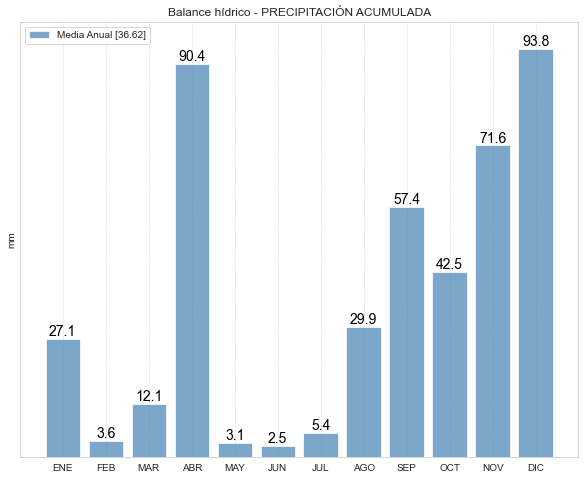

In [14]:
### grafico

# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

columnas = list(df_PREC_2019_mad.iloc[0, 2:-1])
meses = list(df_PREC_2019_mad.columns.values)[2:-1]
media_anual = list(df_PREC_2019_mad.iloc[0, -1:])  ## para que quede visual el valor medio anual, aunque estén desglosadas las barras de los meses

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

hbars = ax.bar(meses, columnas, color = "steelblue", alpha=0.7, align='center',label=f"Media Anual {media_anual}")
ax.set_ylabel("mm")
plt.yticks([])
ax.bar_label(hbars, fmt='%.1f',
             padding=0, color='k', fontsize=14)
ax.set_ylim(top=100)  # adjusto el eje de las y para que quepan los valores (lluvias llegan hasta casi 94, he puesto limite de 100)
ax.set_title("Balance hídrico - PRECIPITACIÓN ACUMULADA");
plt.legend(loc="upper left");


### 1.b.  Balance Hídrico - HUMEDAD DEL SUELO

#### Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...

In [15]:
## HUMEDAD 2019 Comunidades Autónomas - 25mm
df_AD25_2019_cc_aa = pd.read_csv(csv_folder + "\AD25_2019_ComunidadesAutonomas.csv", encoding="latin1", sep= ";")
print(np.shape(df_AD25_2019_cc_aa))
df_AD25_2019_cc_aa.head()

(19, 14)


Parámetro  \
0  % Humedad del suelo sobre una capacidad de 25 mm   
1  % Humedad del suelo sobre una capacidad de 25 mm   
2  % Humedad del suelo sobre una capacidad de 25 mm   
3  % Humedad del suelo sobre una capacidad de 25 mm   
4  % Humedad del suelo sobre una capacidad de 25 mm   

                            región  enero  febrero  marzo  abril  mayo  junio  \
0           PRINCIPADO DE ASTURIAS  100.0     48.4   28.0   49.6  20.4   42.0   
1   COMUNIDAD AUTÓNOMA DE BALEARES   54.0     12.0    9.6   15.6   7.6    0.4   
2  COMUNIDAD AUTÓNOMA DE CANTABRIA  100.0     41.2   32.4   46.4  33.6   22.0   
3         CIUDAD AUTÓNOMA DE CEUTA  100.0     24.4   30.4   48.8   0.8    0.8   
4   COMUNIDAD AUTÓNOMA DE LA RIOJA   95.6     27.2   10.8   46.0  24.0    6.0   

   julio  agosto  septiembre  octubre  noviembre  diciembre  
0   28.8    28.8        34.0     92.0      100.0       74.4  
1    1.2    24.8        12.0     57.6       65.6       30.8  
2   57.2    46.8        32.0     82.8      100.0       73.2  
3    0.8     0.4         0.4     35.6       87.6       55.2  
4   28.4    16.0        27.6     62.0       98.8       68.0

In [16]:
## Balance hídrico - AD25 - HUMEDAD: humedad del suelo expresada como porcentaje de Agua Disponible para las plantas 
# considerando una reserva de Agua Disponible Total igual a 25mm
## Unidades de medida: %

## me quedo con Madrid

df_AD25_2019_mad = df_AD25_2019_cc_aa[df_AD25_2019_cc_aa["región"] == "COMUNIDAD DE MADRID"]
df_AD25_2019_mad


Parámetro               región  \
5  % Humedad del suelo sobre una capacidad de 25 mm  COMUNIDAD DE MADRID   

   enero  febrero  marzo  abril  mayo  junio  julio  agosto  septiembre  \
5   76.4     14.8    3.2   40.4   0.8    0.4    0.4    28.4        20.8   

   octubre  noviembre  diciembre  
5     53.6       99.2       74.4

In [17]:
## HUMEDAD 2019 Comunidades Autónomas - 75mm
df_AD75_2019_cc_aa = pd.read_csv(csv_folder + "\AD75_2019_ComunidadesAutonomas.csv", encoding="latin1", sep= ";")
print(np.shape(df_AD75_2019_cc_aa))
df_AD75_2019_cc_aa.head()

(19, 14)


Parámetro  \
0  % Humedad del suelo sobre una capacidad de 75 mm   
1  % Humedad del suelo sobre una capacidad de 75 mm   
2  % Humedad del suelo sobre una capacidad de 75 mm   
3  % Humedad del suelo sobre una capacidad de 75 mm   
4  % Humedad del suelo sobre una capacidad de 75 mm   

                            región  enero  febrero  marzo  abril  mayo  junio  \
0           PRINCIPADO DE ASTURIAS  100.0     77.6   63.1   76.8  54.1   61.2   
1   COMUNIDAD AUTÓNOMA DE BALEARES   74.0     44.0   23.6   22.5  12.9    1.7   
2  COMUNIDAD AUTÓNOMA DE CANTABRIA  100.0     72.7   66.9   76.1  60.3   46.3   
3         CIUDAD AUTÓNOMA DE CEUTA   98.3     57.1   32.4   56.4   9.9    1.5   
4   COMUNIDAD AUTÓNOMA DE LA RIOJA   90.5     60.5   33.5   62.9  42.1   17.9   

   julio  agosto  septiembre  octubre  noviembre  diciembre  
0   36.8    30.4        45.7     96.3      100.0       90.4  
1    1.2    16.5        32.7     78.8       84.3       66.1  
2   56.5    50.4        62.3     93.2      100.0       90.0  
3    0.8     0.7         0.7     22.1       94.9       82.0  
4   22.3    13.5        33.3     53.6       94.1       84.9

In [18]:
## Balance hídrico - AD75 - HUMEDAD: humedad del suelo expresada como porcentaje de Agua Disponible para las plantas 
# considerando una reserva de Agua Disponible Total igual a 75mm
## Unidades de medida: %

## me quedo con Madrid

df_AD75_2019_mad = df_AD75_2019_cc_aa[df_AD75_2019_cc_aa["región"] == "COMUNIDAD DE MADRID"]
df_AD75_2019_mad


Parámetro               región  \
5  % Humedad del suelo sobre una capacidad de 75 mm  COMUNIDAD DE MADRID   

   enero  febrero  marzo  abril  mayo  junio  julio  agosto  septiembre  \
5   78.4     45.1   19.1   64.3   8.7    0.8    0.5    21.2        33.9   

   octubre  noviembre  diciembre  
5     45.3       78.9       90.3

In [19]:
### junto las 2 humedades
humedades = pd.concat([df_AD25_2019_mad, df_AD75_2019_mad])
humedades.reset_index(drop=True)


Parámetro               región  \
0  % Humedad del suelo sobre una capacidad de 25 mm  COMUNIDAD DE MADRID   
1  % Humedad del suelo sobre una capacidad de 75 mm  COMUNIDAD DE MADRID   

   enero  febrero  marzo  abril  mayo  junio  julio  agosto  septiembre  \
0   76.4     14.8    3.2   40.4   0.8    0.4    0.4    28.4        20.8   
1   78.4     45.1   19.1   64.3   8.7    0.8    0.5    21.2        33.9   

   octubre  noviembre  diciembre  
0     53.6       99.2       74.4  
1     45.3       78.9       90.3

In [20]:
### Ahora añado al final la columna con la media de los valores (anual)
humedades.loc[2:,"anual"] = round(humedades.mean(axis=1),2)
humedades

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Parámetro               región  \
5  % Humedad del suelo sobre una capacidad de 25 mm  COMUNIDAD DE MADRID   
5  % Humedad del suelo sobre una capacidad de 75 mm  COMUNIDAD DE MADRID   

   enero  febrero  marzo  abril  mayo  junio  julio  agosto  septiembre  \
5   76.4     14.8    3.2   40.4   0.8    0.4    0.4    28.4        20.8   
5   78.4     45.1   19.1   64.3   8.7    0.8    0.5    21.2        33.9   

   octubre  noviembre  diciembre  anual  
5     53.6       99.2       74.4  34.40  
5     45.3       78.9       90.3  40.54

In [21]:
humedades.describe()

enero    febrero      marzo      abril      mayo     junio  \
count   2.000000   2.000000   2.000000   2.000000  2.000000  2.000000   
mean   77.400000  29.950000  11.150000  52.350000  4.750000  0.600000   
std     1.414214  21.425335  11.242998  16.899852  5.586144  0.282843   
min    76.400000  14.800000   3.200000  40.400000  0.800000  0.400000   
25%    76.900000  22.375000   7.175000  46.375000  2.775000  0.500000   
50%    77.400000  29.950000  11.150000  52.350000  4.750000  0.600000   
75%    77.900000  37.525000  15.125000  58.325000  6.725000  0.700000   
max    78.400000  45.100000  19.100000  64.300000  8.700000  0.800000   

          julio     agosto  septiembre    octubre  noviembre  diciembre  \
count  2.000000   2.000000    2.000000   2.000000   2.000000   2.000000   
mean   0.450000  24.800000   27.350000  49.450000  89.050000  82.350000   
std    0.070711   5.091169    9.263099   5.868986  14.354268  11.242998   
min    0.400000  21.200000   20.800000  45.300000  78.900000  74.400000   
25%    0.425000  23.000000   24.075000  47.375000  83.975000  78.375000   
50%    0.450000  24.800000   27.350000  49.450000  89.050000  82.350000   
75%    0.475000  26.600000   30.625000  51.525000  94.125000  86.325000   
max    0.500000  28.400000   33.900000  53.600000  99.200000  90.300000   

           anual  
count   2.000000  
mean   37.470000  
std     4.341636  
min    34.400000  
25%    35.935000  
50%    37.470000  
75%    39.005000  
max    40.540000

In [22]:
##guardo el dataframe
humedades.to_csv("humedades.csv", index=False)

#### Gráfico

In [23]:
## Renombro los meses para que salgan mejor en los gráficos
humedades.columns = ["Parámetro", "región", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC", "media anual"]
pd.DataFrame(humedades)

Parámetro               región  \
5  % Humedad del suelo sobre una capacidad de 25 mm  COMUNIDAD DE MADRID   
5  % Humedad del suelo sobre una capacidad de 75 mm  COMUNIDAD DE MADRID   

    ENE   FEB   MAR   ABR  MAY  JUN  JUL   AGO   SEP   OCT   NOV   DIC  \
5  76.4  14.8   3.2  40.4  0.8  0.4  0.4  28.4  20.8  53.6  99.2  74.4   
5  78.4  45.1  19.1  64.3  8.7  0.8  0.5  21.2  33.9  45.3  78.9  90.3   

   media anual  
5        34.40  
5        40.54

In [24]:
##para definir el eje y de mi gráfico, los meses
AD25 = list(df_PREC_2019_mad.columns.values)[2:-1]
AD25

['ENE',
 'FEB',
 'MAR',
 'ABR',
 'MAY',
 'JUN',
 'JUL',
 'AGO',
 'SEP',
 'OCT',
 'NOV',
 'DIC']

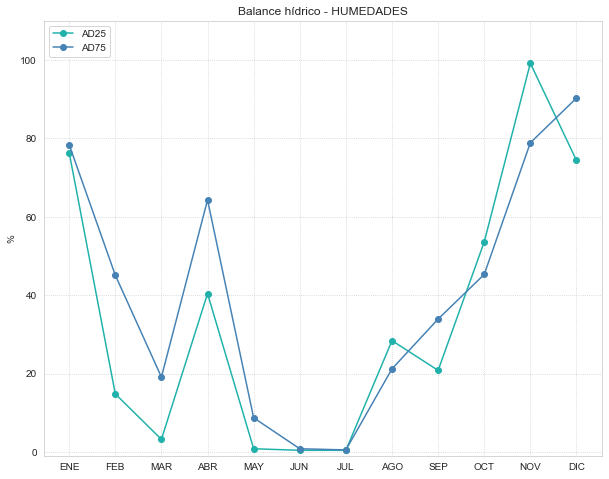

In [25]:
## gráfico de las humedades del suelo expresadas como porentaje de agua disponible para las plantas 
## considerando una reserva de agua disponible total igual a 25mm y a 75mm

# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(humedades.columns.values)[2:-1]
AD25 = list(humedades.iloc[0, 2:-1])
AD75 = list(humedades.iloc[1, 2:-1])

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("%")
ax.set_title("Balance hídrico - HUMEDADES");

plt.plot(meses, AD25, color='lightseagreen', marker='o', label="AD25")
plt.plot(meses, AD75, color='steelblue', marker='o', label="AD75")

plt.ylim(-1,110);
plt.legend(loc="upper left");

### 1.c.  Balance Hídrico - EVAPOTRANSPIRACION

#### Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...

In [26]:
## EVAPOTRANSPIRACION 2019 Comunidades Autónomas
df_ETO_2019_cc_aa = pd.read_csv(csv_folder + "\ETO_2019_ComunidadesAutonomas.csv", encoding="latin1", sep= ";")
print(np.shape(df_ETO_2019_cc_aa))
df_ETO_2019_cc_aa.head()

(19, 15)


Parámetro                           región  enero  \
0  Evapotranspiración de referencia           PRINCIPADO DE ASTURIAS   17.8   
1  Evapotranspiración de referencia   COMUNIDAD AUTÓNOMA DE BALEARES   45.0   
2  Evapotranspiración de referencia  COMUNIDAD AUTÓNOMA DE CANTABRIA   19.3   
3  Evapotranspiración de referencia         CIUDAD AUTÓNOMA DE CEUTA   60.9   
4  Evapotranspiración de referencia   COMUNIDAD AUTÓNOMA DE LA RIOJA   27.8   

   febrero  marzo  abril   mayo  junio  julio  agosto  septiembre  octubre  \
0     39.7   58.7   66.9   96.1   89.0  106.2    93.6        70.8     47.3   
1     45.4   76.0   90.9  128.1  156.9  181.8   154.4        99.4     71.7   
2     40.4   55.4   63.5   84.6   93.7  105.0    93.5        66.8     49.1   
3     59.6   86.7   95.6  126.1  131.3  135.2   134.1        85.8     82.0   
4     39.7   69.2   70.6  106.8  150.9  155.5   138.0        89.8     62.0   

   noviembre  diciembre   anual  
0       21.7       21.6   729.4  
1       49.0       39.1  1137.7  
2       23.0       23.5   717.8  
3       64.2       53.3  1114.8  
4       25.9       26.2   962.4

In [27]:

# borro la columna "anual", no me interesa ya que es una suma, no una media.
df_ETO_2019_cc_aa.drop("anual", inplace=True, axis=1)
df_ETO_2019_cc_aa.head()

Parámetro                           región  enero  \
0  Evapotranspiración de referencia           PRINCIPADO DE ASTURIAS   17.8   
1  Evapotranspiración de referencia   COMUNIDAD AUTÓNOMA DE BALEARES   45.0   
2  Evapotranspiración de referencia  COMUNIDAD AUTÓNOMA DE CANTABRIA   19.3   
3  Evapotranspiración de referencia         CIUDAD AUTÓNOMA DE CEUTA   60.9   
4  Evapotranspiración de referencia   COMUNIDAD AUTÓNOMA DE LA RIOJA   27.8   

   febrero  marzo  abril   mayo  junio  julio  agosto  septiembre  octubre  \
0     39.7   58.7   66.9   96.1   89.0  106.2    93.6        70.8     47.3   
1     45.4   76.0   90.9  128.1  156.9  181.8   154.4        99.4     71.7   
2     40.4   55.4   63.5   84.6   93.7  105.0    93.5        66.8     49.1   
3     59.6   86.7   95.6  126.1  131.3  135.2   134.1        85.8     82.0   
4     39.7   69.2   70.6  106.8  150.9  155.5   138.0        89.8     62.0   

   noviembre  diciembre  
0       21.7       21.6  
1       49.0       39.1  
2       23.0       23.5  
3       64.2       53.3  
4       25.9       26.2

In [28]:
##Lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo

df_ETO_2019_cc_aa.loc[2:,"media anual"] = round(df_ETO_2019_cc_aa.mean(axis=1),2)
df_ETO_2019_cc_aa.head()

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Parámetro                           región  enero  \
0  Evapotranspiración de referencia           PRINCIPADO DE ASTURIAS   17.8   
1  Evapotranspiración de referencia   COMUNIDAD AUTÓNOMA DE BALEARES   45.0   
2  Evapotranspiración de referencia  COMUNIDAD AUTÓNOMA DE CANTABRIA   19.3   
3  Evapotranspiración de referencia         CIUDAD AUTÓNOMA DE CEUTA   60.9   
4  Evapotranspiración de referencia   COMUNIDAD AUTÓNOMA DE LA RIOJA   27.8   

   febrero  marzo  abril   mayo  junio  julio  agosto  septiembre  octubre  \
0     39.7   58.7   66.9   96.1   89.0  106.2    93.6        70.8     47.3   
1     45.4   76.0   90.9  128.1  156.9  181.8   154.4        99.4     71.7   
2     40.4   55.4   63.5   84.6   93.7  105.0    93.5        66.8     49.1   
3     59.6   86.7   95.6  126.1  131.3  135.2   134.1        85.8     82.0   
4     39.7   69.2   70.6  106.8  150.9  155.5   138.0        89.8     62.0   

   noviembre  diciembre  media anual  
0       21.7       21.6          NaN  
1       49.0       39.1          NaN  
2       23.0       23.5        59.82  
3       64.2       53.3        92.90  
4       25.9       26.2        80.20

In [29]:
## Balance hídrico - EVAPOTRANSPIRACION: evapotranspiración de una superficie de referencia que ocurre sin restriciones de agua
## Es una evapotranspiración potencial. La superficie de referencia es un cultivo hipotético de pasto verde, bien regada, de altura uniforme, 
## creciendo activamente y dando sombra totalmente al suelo
## Unidades de medida: mm

## me quedo con Madrid

df_ETO_2019_mad = df_ETO_2019_cc_aa[df_ETO_2019_cc_aa["región"] == "COMUNIDAD DE MADRID"]
df_ETO_2019_mad


Parámetro               región  enero  febrero  \
5  Evapotranspiración de referencia  COMUNIDAD DE MADRID   32.0     45.7   

   marzo  abril   mayo  junio  julio  agosto  septiembre  octubre  noviembre  \
5   90.4   80.9  161.4  204.2  225.2   188.9       120.2     70.9       30.6   

   diciembre  media anual  
5       23.6       106.17

In [30]:
##guardo el dataframe
df_ETO_2019_mad.to_csv("df_ETO_2019_mad.csv", index=False)

#### Gráfico

In [31]:
## Renombro los meses para que salgan mejor en los gráficos
df_ETO_2019_mad.columns = ["Parámetro", "región", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC", "media anual"]
pd.DataFrame(df_ETO_2019_mad)

Parámetro               región   ENE   FEB   MAR  \
5  Evapotranspiración de referencia  COMUNIDAD DE MADRID  32.0  45.7  90.4   

    ABR    MAY    JUN    JUL    AGO    SEP   OCT   NOV   DIC  media anual  
5  80.9  161.4  204.2  225.2  188.9  120.2  70.9  30.6  23.6       106.17

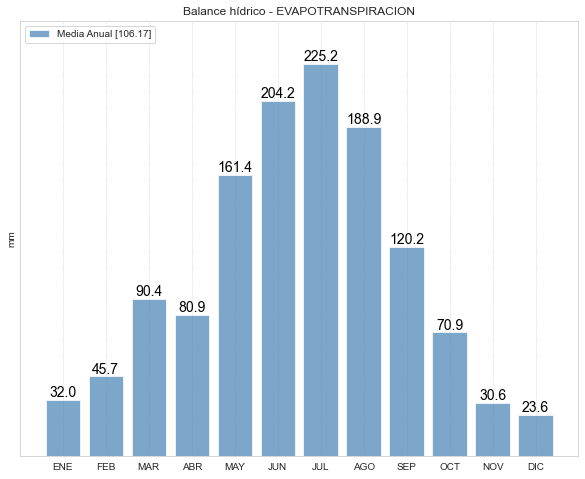

In [32]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

valores = list(df_ETO_2019_mad.iloc[0, 2:-1])
meses = list(df_ETO_2019_mad.columns.values)[2:-1]
media_anual = list(df_ETO_2019_mad.iloc[0,-1:])  ##para que salga en la etiqueta el valor medio, aunque el gráfico muestre los meses desglosados

fig = plt.figure(figsize=(10,8))
ax = plt.axes()


bars = ax.bar( meses, valores, color = "steelblue", alpha= 0.7, align='center', label=f"Media Anual {media_anual}")
ax.set_ylabel("mm")
plt.yticks([])
ax.bar_label(bars, fmt='%.1f',
             padding=0, color='k', fontsize=14)
ax.set_ylim(top=250)  # adjusto el eje de las x para que quepan los valores 
ax.set_title("Balance hídrico - EVAPOTRANSPIRACION");
plt.legend(loc="upper left");


# ----------------------------------------------------------------------------------------------------------------------------
## 2.Datos Atmosféricos - Mensuales climatologico
### Para la Comunidad de Madrid, considerando el año 2019 , por meses


### 2.0 LEYENDA:

2.1 Indicativos estaciones metereológicas:
- Todas las estaciones de España
- Estaciones relativas a la Comunidad de Madrid

2.2 Precipitaciones:     ---> he guardado el dataframe, se llama "precip_all.csv"
- P_MES_   Precipitación total mensual/anual (mm)
- P_MAX_   Precipitación máxima diaria del mes/año y fecha (mm)
- NP_001_   Nº de días de precipitación apreciable (≥ 0,1 mm) en el mes/año
- NP_010_   Nº de días de precipitación mayor o igual que 1mm en el mes/año
- NP_100_   Nº de días de precipitación mayor o igual que 10mm en el mes/año
- NP_300_   Nº de días de precipitación mayor o igual que 30mm en el mes/año

2.3 Ocurrencia de metéoros:     ---> he guardado el dataframe, se llama "meteor_all.csv"
- N_LLU_   Nº de días de lluvia en el mes/año
- N_NIE_   Nº de días de nieve en el mes/año
- N_GRA_   Nº de días de granizo en el mes/año
- N_TOR_   Nº de días de tormenta en el mes/año
- N_FOG_   Nº de días de niebla en el mes/año
- N_DES_   Nº de días despejados en el mes/año
- N_NUB_   Nº de días nubosos en el mes/año
- N_CUB_   Nº de días cubiertos en el mes/año

2.4 Humedad:
- HR   Humedad relativa media mensual/anual (%)     ---> he guardado el dataframe, se llama "HR_2019_mad.csv"
- E_   Tensión de vapor media mensual/anual (décimas hPa)     ---> he guardado el dataframe, se llama "E_2019_mad.csv"

2.5 Insolación:
- INSO_   Media mensual/anual de la insolación diaria (horas)     ---> he guardado el dataframe, se llama "INSO_2019_mad.csv"
- P_SOL_   Porcentaje medio mensual de la insolación diaria frente a la insolación teórica. (%)     ---> he guardado el dataframe, se llama "P_SOL_2019_mad.csv"

2.6 Temperaturas:     ---> he guardado el dataframe, se llama "temper_all.csv"
- TM_MES_   Temperatura media mensual/anual (°C)
- TM_MAX_   Temperatura media mensual/anual de las máximas (°C)
- TM_MIN_   Temperatura media mensual/anual de las mínimas (°C)
- TA_MAX_   Temperatura máxima absoluta del mes/año y fecha (°C)
- TA_MIN_   Temperatura mínima absoluta del mes/año y fecha (°C)
- TS_MIN_   Temperatura mínima más alta del mes/año (°C)
- TI_MAX_   Temperatura máxima más baja del mes/año (°C)
- NT_30_   Nº de días mes/año de temperatura máxima mayor o igual que 30°C
- NT_00_   Nº de días mes/año de temperatura mínima menor o igual que 0°C

2.7 Viento :      ---> he guardado el dataframe, se llama "viento_all.csv"
- NW_55_   Nº de días de velocidad del viento mayor o igual a 55 Km/h en el mes/año (Nº DIAS)
- NW_91_   Nº de días de velocidad del viento mayor o igual a 91 Km/h en el mes/año (Nº DIAS)


## 2.1 Indicativos estaciones metereológicas

#### Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...

In [33]:
### Antes me saco el df "Maestro climatologico", para sacarme los indicativos relativos a MADRID  --> Maestro_Climatologico_2019.csv
indicativos = pd.read_csv(csv_folder + "\\Maestro_Climatologico_2019.csv", encoding="latin1", sep= ";")
print(np.shape(indicativos))
indicativos.head()

(92, 8)


INDICATIVO                            NOMBRE PROVINCIA  MUNICIPIO  ALTITUD  \
0       1387                          A CORUÑA  A CORUÑA   A CORUÑA       58   
1      1387E                  A CORUÑA/ALVEDRO  A CORUÑA  CULLEREDO       98   
2       1428  SANTIAGO DE COMPOSTELA/LABACOLLA  A CORUÑA     O PINO      370   
3       8175               ALBACETE/LOS LLANOS  ALBACETE   ALBACETE      702   
4      8178D                     ALBACETE,OBS.  ALBACETE   ALBACETE      676   

   LONGITUD  LATITUD   DATUM  
0    825172   432157  ETRS89  
1    822192   431825  ETRS89  
2    824382   425317  ETRS89  
3    151232   385715  ETRS89  
4    151442   390020  ETRS89

In [34]:
#me quedo con Madrid
indicativos_mad = indicativos[indicativos["PROVINCIA"] == "MADRID"]
indicativos_mad

##guardo el dataframe, luego me servirá para hacer un mapa con las estaciones
indicativos_mad.to_csv("indicativos_mad.csv", index=False)


In [35]:
## me quedo solo con las columnas "INDICATIVO" y "NOMBRE", o sea las 2 primeras sin contar el índice
## este df lo MERGEARÉ por la columna "INDICATIVO" a cada uno de los siguientes que saque, con "inner" join, 
# para quedarme SOLO con los indicativos de madrid
## Y para que sea igual, la renombro de "INDICATIVO" a "Indicativo"
ind_mad= pd.DataFrame(indicativos_mad.iloc[:, :2])
ind_mad.rename(columns={"INDICATIVO":"Indicativo"}, inplace= True)
ind_mad

Indicativo                 NOMBRE
51      3191E   COLMENAR VIEJO/FAMET
52       3129         MADRID/BARAJAS
53       3196  MADRID/CUATRO VIENTOS
54       3200          MADRID/GETAFE
55       3195          MADRID,RETIRO
56       3175        MADRID/TORREJÓN
57       2462     NAVACERRADA,PUERTO

## 2.2 Mensuales climatologico 2019 - Precipitaciones

#### Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...

In [36]:
## Mensuales climatologico 2019 - Precipitaciones
##  P_MES_   Precipitación total mensual/anual (mm)

### cargo el df entero:
P_MES_2019 = pd.read_csv(csv_folder + "\\P_MES_2019.csv", encoding="latin1", sep= ";")


### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
P_MES_2019_mad = pd.merge(ind_mad, P_MES_2019, how= "inner", on=["Indicativo"])
P_MES_2019_mad


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   34.7      2.2   16.3   97.0   0.8   
1       3129         MADRID/BARAJAS   18.2      0.5   12.7   81.5   0.0   
2       3196  MADRID/CUATRO VIENTOS   19.3      0.7    7.5   71.7   0.5   
3       3200          MADRID/GETAFE   14.0      1.8    9.1   70.4   1.1   
4       3195          MADRID,RETIRO   18.6      1.0    9.8   83.2   0.1   
5       3175        MADRID/TORREJÓN   14.6      0.5   10.2   75.2   0.0   
6       2462     NAVACERRADA,PUERTO  153.3     14.2   44.0  153.4   5.6   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre   anual  
0    2.1    2.0    13.2        42.5     30.0       60.1      112.4   413.3  
1    2.4   17.1    44.4        37.9     33.1       30.7       57.7   336.2  
2    0.7    9.6    52.3        47.9     39.1       38.2       81.6   369.1  
3    1.0    2.5    33.2        31.3     40.3       39.9      101.6   346.2  
4    2.0    8.6    58.4        33.1     42.6       44.0       90.1   391.5  
5    2.1    9.6    15.7        45.9     26.8       29.4       52.9   282.9  
6    8.3   11.2    45.6        71.6    103.6      313.5      229.1  1153.4

In [37]:
# borro la columna "anual", no me interesa, es una suma y yo quiero una media
P_MES_2019_mad.drop("anual", inplace=True, axis=1)
P_MES_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   34.7      2.2   16.3   97.0   0.8   
1       3129         MADRID/BARAJAS   18.2      0.5   12.7   81.5   0.0   
2       3196  MADRID/CUATRO VIENTOS   19.3      0.7    7.5   71.7   0.5   
3       3200          MADRID/GETAFE   14.0      1.8    9.1   70.4   1.1   
4       3195          MADRID,RETIRO   18.6      1.0    9.8   83.2   0.1   
5       3175        MADRID/TORREJÓN   14.6      0.5   10.2   75.2   0.0   
6       2462     NAVACERRADA,PUERTO  153.3     14.2   44.0  153.4   5.6   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    2.1    2.0    13.2        42.5     30.0       60.1      112.4  
1    2.4   17.1    44.4        37.9     33.1       30.7       57.7  
2    0.7    9.6    52.3        47.9     39.1       38.2       81.6  
3    1.0    2.5    33.2        31.3     40.3       39.9      101.6  
4    2.0    8.6    58.4        33.1     42.6       44.0       90.1  
5    2.1    9.6    15.7        45.9     26.8       29.4       52.9  
6    8.3   11.2    45.6        71.6    103.6      313.5      229.1

In [38]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

P_MES_2019_mad.loc[:,"media anual"] = round(P_MES_2019_mad.mean(axis=1),2)
P_MES_2019_mad.head()

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   34.7      2.2   16.3   97.0   0.8   
1       3129         MADRID/BARAJAS   18.2      0.5   12.7   81.5   0.0   
2       3196  MADRID/CUATRO VIENTOS   19.3      0.7    7.5   71.7   0.5   
3       3200          MADRID/GETAFE   14.0      1.8    9.1   70.4   1.1   
4       3195          MADRID,RETIRO   18.6      1.0    9.8   83.2   0.1   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    2.1    2.0    13.2        42.5     30.0       60.1      112.4   
1    2.4   17.1    44.4        37.9     33.1       30.7       57.7   
2    0.7    9.6    52.3        47.9     39.1       38.2       81.6   
3    1.0    2.5    33.2        31.3     40.3       39.9      101.6   
4    2.0    8.6    58.4        33.1     42.6       44.0       90.1   

   media anual  
0        34.44  
1        28.02  
2        30.76  
3        28.85  
4        32.62

In [39]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
P_MES_2019_mad["Tipo"] = "P_MES"
P_MES_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   34.7      2.2   16.3   97.0   0.8   
1       3129         MADRID/BARAJAS   18.2      0.5   12.7   81.5   0.0   
2       3196  MADRID/CUATRO VIENTOS   19.3      0.7    7.5   71.7   0.5   
3       3200          MADRID/GETAFE   14.0      1.8    9.1   70.4   1.1   
4       3195          MADRID,RETIRO   18.6      1.0    9.8   83.2   0.1   
5       3175        MADRID/TORREJÓN   14.6      0.5   10.2   75.2   0.0   
6       2462     NAVACERRADA,PUERTO  153.3     14.2   44.0  153.4   5.6   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    2.1    2.0    13.2        42.5     30.0       60.1      112.4   
1    2.4   17.1    44.4        37.9     33.1       30.7       57.7   
2    0.7    9.6    52.3        47.9     39.1       38.2       81.6   
3    1.0    2.5    33.2        31.3     40.3       39.9      101.6   
4    2.0    8.6    58.4        33.1     42.6       44.0       90.1   
5    2.1    9.6    15.7        45.9     26.8       29.4       52.9   
6    8.3   11.2    45.6        71.6    103.6      313.5      229.1   

   media anual   Tipo  
0        34.44  P_MES  
1        28.02  P_MES  
2        30.76  P_MES  
3        28.85  P_MES  
4        32.62  P_MES  
5        23.58  P_MES  
6        96.12  P_MES

In [40]:
## estudio los datos:
P_MES_2019_mad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   7 non-null      object 
 1   NOMBRE       7 non-null      object 
 2   enero        7 non-null      float64
 3   febrero      7 non-null      float64
 4   marzo        7 non-null      float64
 5   abril        7 non-null      float64
 6   mayo         7 non-null      float64
 7   junio        7 non-null      float64
 8   julio        7 non-null      float64
 9   agosto       7 non-null      float64
 10  septiembre   7 non-null      float64
 11  octubre      7 non-null      float64
 12  noviembre    7 non-null      float64
 13  diciembre    7 non-null      float64
 14  media anual  7 non-null      float64
 15  Tipo         7 non-null      object 
dtypes: float64(13), object(3)
memory usage: 952.0+ bytes


In [41]:
P_MES_2019_mad.describe()

enero    febrero      marzo       abril      mayo     junio  \
count    7.000000   7.000000   7.000000    7.000000  7.000000  7.000000   
mean    38.957143   2.985714  15.657143   90.342857  1.157143  2.657143   
std     50.892398   4.988463  12.819888   29.224183  2.004044  2.567007   
min     14.000000   0.500000   7.500000   70.400000  0.000000  0.700000   
25%     16.400000   0.600000   9.450000   73.450000  0.050000  1.500000   
50%     18.600000   1.000000  10.200000   81.500000  0.500000  2.100000   
75%     27.000000   2.000000  14.500000   90.100000  0.950000  2.250000   
max    153.300000  14.200000  44.000000  153.400000  5.600000  8.300000   

           julio     agosto  septiembre     octubre   noviembre   diciembre  \
count   7.000000   7.000000    7.000000    7.000000    7.000000    7.000000   
mean    8.657143  37.542857   44.314286   45.071429   79.400000  103.628571   
std     5.192256  17.574969   13.536670   26.439977  103.728685   59.407118   
min     2.000000  13.200000   31.300000   26.800000   29.400000   52.900000   
25%     5.550000  24.450000   35.500000   31.550000   34.450000   69.650000   
50%     9.600000  44.400000   42.500000   39.100000   39.900000   90.100000   
75%    10.400000  48.950000   46.900000   41.450000   52.050000  107.000000   
max    17.100000  58.400000   71.600000  103.600000  313.500000  229.100000   

       media anual  
count     7.000000  
mean     39.198571  
std      25.341577  
min      23.580000  
25%      28.435000  
50%      30.760000  
75%      33.530000  
max      96.120000

In [42]:
## Mensuales climatologico 2019 - Precipitaciones
##  P_MAX_   Precipitación máxima diaria del mes/año y fecha (mm)

### cargo el df entero:
P_MAX_2019 = pd.read_csv(csv_folder + "\\P_MAX_2019.csv", encoding="latin1", sep= ";")


### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
P_MAX_2019_mad = pd.merge(ind_mad, P_MAX_2019, how= "inner", on=["Indicativo"])
P_MAX_2019_mad

### NOTA: tendré que pasarle un REGEX luego para limpiar los datos


Indicativo                 NOMBRE     enero  febrero     marzo     abril  \
0      3191E   COLMENAR VIEJO/FAMET  10.8(30)  2.0(01)  13.2(06)  27.5(24)   
1       3129         MADRID/BARAJAS   7.4(31)  0.5(01)  12.1(06)  27.9(24)   
2       3196  MADRID/CUATRO VIENTOS   7.2(31)  0.7(01)   6.9(06)  27.9(24)   
3       3200          MADRID/GETAFE   5.3(19)  1.8(01)   8.7(06)  25.0(24)   
4       3195          MADRID,RETIRO   8.2(31)  1.0(01)   8.2(06)  28.5(24)   
5       3175        MADRID/TORREJÓN   5.6(31)  0.5(01)   8.2(06)  27.8(24)   
6       2462     NAVACERRADA,PUERTO  41.4(22)  8.2(01)  27.3(06)  25.1(17)   

      mayo    junio     julio    agosto septiembre   octubre noviembre  \
0  0.3(16)  2.1(06)   1.4(31)   9.5(26)   20.0(20)   9.4(19)  21.7(22)   
1  0.0(--)  2.4(06)  10.4(02)  33.3(26)   14.1(14)  12.1(19)   7.3(30)   
2  0.5(16)  0.7(06)   5.0(08)  45.9(26)   26.2(20)  19.0(19)   6.0(30)   
3  1.1(16)  1.0(06)   2.0(23)  29.7(26)   18.4(14)  11.5(12)   6.8(30)   
4  0.1(16)  2.0(06)   6.2(21)  26.9(26)   13.7(14)  18.4(19)   8.8(22)   
5  0.0(--)  2.1(06)   7.5(02)  12.2(26)   27.6(15)   9.0(22)   9.3(30)   
6  2.0(16)  6.1(04)   3.4(08)  25.4(26)   20.0(20)  18.5(19)  66.0(12)   

  diciembre         anual  
0  70.7(19)  70.7(19/dic)  
1  26.0(19)  33.3(26/ago)  
2  34.5(01)  45.9(26/ago)  
3  35.2(19)  35.2(19/dic)  
4  38.4(19)  38.4(19/dic)  
5  25.3(19)  27.8(24/abr)  
6  76.0(19)  76.0(19/dic)

In [43]:
# borro la columna "anual", no me interesa
P_MAX_2019_mad.drop("anual", inplace=True, axis=1)
P_MAX_2019_mad

Indicativo                 NOMBRE     enero  febrero     marzo     abril  \
0      3191E   COLMENAR VIEJO/FAMET  10.8(30)  2.0(01)  13.2(06)  27.5(24)   
1       3129         MADRID/BARAJAS   7.4(31)  0.5(01)  12.1(06)  27.9(24)   
2       3196  MADRID/CUATRO VIENTOS   7.2(31)  0.7(01)   6.9(06)  27.9(24)   
3       3200          MADRID/GETAFE   5.3(19)  1.8(01)   8.7(06)  25.0(24)   
4       3195          MADRID,RETIRO   8.2(31)  1.0(01)   8.2(06)  28.5(24)   
5       3175        MADRID/TORREJÓN   5.6(31)  0.5(01)   8.2(06)  27.8(24)   
6       2462     NAVACERRADA,PUERTO  41.4(22)  8.2(01)  27.3(06)  25.1(17)   

      mayo    junio     julio    agosto septiembre   octubre noviembre  \
0  0.3(16)  2.1(06)   1.4(31)   9.5(26)   20.0(20)   9.4(19)  21.7(22)   
1  0.0(--)  2.4(06)  10.4(02)  33.3(26)   14.1(14)  12.1(19)   7.3(30)   
2  0.5(16)  0.7(06)   5.0(08)  45.9(26)   26.2(20)  19.0(19)   6.0(30)   
3  1.1(16)  1.0(06)   2.0(23)  29.7(26)   18.4(14)  11.5(12)   6.8(30)   
4  0.1(16)  2.0(06)   6.2(21)  26.9(26)   13.7(14)  18.4(19)   8.8(22)   
5  0.0(--)  2.1(06)   7.5(02)  12.2(26)   27.6(15)   9.0(22)   9.3(30)   
6  2.0(16)  6.1(04)   3.4(08)  25.4(26)   20.0(20)  18.5(19)  66.0(12)   

  diciembre  
0  70.7(19)  
1  26.0(19)  
2  34.5(01)  
3  35.2(19)  
4  38.4(19)  
5  25.3(19)  
6  76.0(19)

In [44]:
P_MAX_2019_mad.info()  ## veo que son todos object, tengo que borrar lo de entre paréntesis y transformar todo a float
  ##tengo que volver a hacerlo después de haberles pasado el regex y cambiado el type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Indicativo  7 non-null      object
 1   NOMBRE      7 non-null      object
 2   enero       7 non-null      object
 3   febrero     7 non-null      object
 4   marzo       7 non-null      object
 5   abril       7 non-null      object
 6   mayo        7 non-null      object
 7   junio       7 non-null      object
 8   julio       7 non-null      object
 9   agosto      7 non-null      object
 10  septiembre  7 non-null      object
 11  octubre     7 non-null      object
 12  noviembre   7 non-null      object
 13  diciembre   7 non-null      object
dtypes: object(14)
memory usage: 840.0+ bytes


In [45]:
P_MAX_2019_mad.describe()  ##tengo que volver a hacerlo después de haberles pasado el regex y cambiado el type

Indicativo                NOMBRE     enero  febrero    marzo     abril  \
count           7                     7         7        7        7         7   
unique          7                     7         7        6        6         6   
top         3191E  COLMENAR VIEJO/FAMET  10.8(30)  0.5(01)  8.2(06)  27.9(24)   
freq            1                     1         1        2        2         2   

           mayo    junio    julio   agosto septiembre  octubre noviembre  \
count         7        7        7        7          7        7         7   
unique        6        6        7        7          6        7         7   
top     0.0(--)  2.1(06)  1.4(31)  9.5(26)   20.0(20)  9.4(19)  21.7(22)   
freq          2        2        1        1          2        1         1   

       diciembre  
count          7  
unique         7  
top     70.7(19)  
freq           1

In [46]:
###limpio los datos: quito lo que está entre paréntesis, que se refiere al día del mes de máximas precipitaciones

P_MAX_2019_mad = P_MAX_2019_mad.replace({r"\(..\)": ""}, regex=True)
P_MAX_2019_mad


Indicativo                 NOMBRE enero febrero marzo abril mayo junio  \
0      3191E   COLMENAR VIEJO/FAMET  10.8     2.0  13.2  27.5  0.3   2.1   
1       3129         MADRID/BARAJAS   7.4     0.5  12.1  27.9  0.0   2.4   
2       3196  MADRID/CUATRO VIENTOS   7.2     0.7   6.9  27.9  0.5   0.7   
3       3200          MADRID/GETAFE   5.3     1.8   8.7  25.0  1.1   1.0   
4       3195          MADRID,RETIRO   8.2     1.0   8.2  28.5  0.1   2.0   
5       3175        MADRID/TORREJÓN   5.6     0.5   8.2  27.8  0.0   2.1   
6       2462     NAVACERRADA,PUERTO  41.4     8.2  27.3  25.1  2.0   6.1   

  julio agosto septiembre octubre noviembre diciembre  
0   1.4    9.5       20.0     9.4      21.7      70.7  
1  10.4   33.3       14.1    12.1       7.3      26.0  
2   5.0   45.9       26.2    19.0       6.0      34.5  
3   2.0   29.7       18.4    11.5       6.8      35.2  
4   6.2   26.9       13.7    18.4       8.8      38.4  
5   7.5   12.2       27.6     9.0       9.3      25.3  
6   3.4   25.4       20.0    18.5      66.0      76.0

In [47]:
# ahora transformo los datos a numéricos

P_MAX_2019_mad = P_MAX_2019_mad.apply(pd.to_numeric, errors='ignore')

In [48]:
P_MAX_2019_mad.info()  ##ok, ya todos los numeros ahora son float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Indicativo  7 non-null      object 
 1   NOMBRE      7 non-null      object 
 2   enero       7 non-null      float64
 3   febrero     7 non-null      float64
 4   marzo       7 non-null      float64
 5   abril       7 non-null      float64
 6   mayo        7 non-null      float64
 7   junio       7 non-null      float64
 8   julio       7 non-null      float64
 9   agosto      7 non-null      float64
 10  septiembre  7 non-null      float64
 11  octubre     7 non-null      float64
 12  noviembre   7 non-null      float64
 13  diciembre   7 non-null      float64
dtypes: float64(12), object(2)
memory usage: 840.0+ bytes


In [49]:
P_MAX_2019_mad.describe() 

enero  febrero      marzo      abril      mayo     junio  \
count   7.000000  7.00000   7.000000   7.000000  7.000000  7.000000   
mean   12.271429  2.10000  12.085714  27.100000  0.571429  2.342857   
std    12.972884  2.75681   7.086002   1.431782  0.738725  1.772811   
min     5.300000  0.50000   6.900000  25.000000  0.000000  0.700000   
25%     6.400000  0.60000   8.200000  26.300000  0.050000  1.500000   
50%     7.400000  1.00000   8.700000  27.800000  0.300000  2.100000   
75%     9.500000  1.90000  12.650000  27.900000  0.800000  2.250000   
max    41.400000  8.20000  27.300000  28.500000  2.000000  6.100000   

           julio     agosto  septiembre    octubre  noviembre  diciembre  
count   7.000000   7.000000    7.000000   7.000000   7.000000   7.000000  
mean    5.128571  26.128571   20.000000  13.985714  17.985714  43.728571  
std     3.195160  12.428021    5.373701   4.483833  21.840133  20.853114  
min     1.400000   9.500000   13.700000   9.000000   6.000000  25.300000  
25%     2.700000  18.800000   16.250000  10.450000   7.050000  30.250000  
50%     5.000000  26.900000   20.000000  12.100000   8.800000  35.200000  
75%     6.850000  31.500000   23.100000  18.450000  15.500000  54.550000  
max    10.400000  45.900000   27.600000  19.000000  66.000000  76.000000

In [50]:
##Ahora que tengo valores numéricos,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo

P_MAX_2019_mad.loc[:,"media anual"] = round(P_MAX_2019_mad.mean(axis=1),2)
P_MAX_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   10.8      2.0   13.2   27.5   0.3   
1       3129         MADRID/BARAJAS    7.4      0.5   12.1   27.9   0.0   
2       3196  MADRID/CUATRO VIENTOS    7.2      0.7    6.9   27.9   0.5   
3       3200          MADRID/GETAFE    5.3      1.8    8.7   25.0   1.1   
4       3195          MADRID,RETIRO    8.2      1.0    8.2   28.5   0.1   
5       3175        MADRID/TORREJÓN    5.6      0.5    8.2   27.8   0.0   
6       2462     NAVACERRADA,PUERTO   41.4      8.2   27.3   25.1   2.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    2.1    1.4     9.5        20.0      9.4       21.7       70.7   
1    2.4   10.4    33.3        14.1     12.1        7.3       26.0   
2    0.7    5.0    45.9        26.2     19.0        6.0       34.5   
3    1.0    2.0    29.7        18.4     11.5        6.8       35.2   
4    2.0    6.2    26.9        13.7     18.4        8.8       38.4   
5    2.1    7.5    12.2        27.6      9.0        9.3       25.3   
6    6.1    3.4    25.4        20.0     18.5       66.0       76.0   

   media anual  
0        15.72  
1        12.79  
2        15.04  
3        12.21  
4        13.37  
5        11.26  
6        26.62

In [51]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
P_MAX_2019_mad["Tipo"] = "P_MAX"
P_MAX_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   10.8      2.0   13.2   27.5   0.3   
1       3129         MADRID/BARAJAS    7.4      0.5   12.1   27.9   0.0   
2       3196  MADRID/CUATRO VIENTOS    7.2      0.7    6.9   27.9   0.5   
3       3200          MADRID/GETAFE    5.3      1.8    8.7   25.0   1.1   
4       3195          MADRID,RETIRO    8.2      1.0    8.2   28.5   0.1   
5       3175        MADRID/TORREJÓN    5.6      0.5    8.2   27.8   0.0   
6       2462     NAVACERRADA,PUERTO   41.4      8.2   27.3   25.1   2.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    2.1    1.4     9.5        20.0      9.4       21.7       70.7   
1    2.4   10.4    33.3        14.1     12.1        7.3       26.0   
2    0.7    5.0    45.9        26.2     19.0        6.0       34.5   
3    1.0    2.0    29.7        18.4     11.5        6.8       35.2   
4    2.0    6.2    26.9        13.7     18.4        8.8       38.4   
5    2.1    7.5    12.2        27.6      9.0        9.3       25.3   
6    6.1    3.4    25.4        20.0     18.5       66.0       76.0   

   media anual   Tipo  
0        15.72  P_MAX  
1        12.79  P_MAX  
2        15.04  P_MAX  
3        12.21  P_MAX  
4        13.37  P_MAX  
5        11.26  P_MAX  
6        26.62  P_MAX

In [52]:
## Mensuales climatologico 2019 - Precipitaciones
## NP_001_   Nº de días de precipitación apreciable (≥ 0,1 mm) en el mes/año

### cargo el df entero:
NP_001_2019 = pd.read_csv(csv_folder + "\\NP_001_2019.csv", encoding="latin1", sep= ";")


### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
NP_001_2019_mad = pd.merge(ind_mad, NP_001_2019, how= "inner", on=["Indicativo"])
NP_001_2019_mad


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      5      2.0    3.0   15.0   3.0   
1       3129         MADRID/BARAJAS      4      1.0    2.0   12.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      4      1.0    2.0   15.0   1.0   
3       3200          MADRID/GETAFE      3      1.0    2.0   15.0   1.0   
4       3195          MADRID,RETIRO      4      1.0    2.0   14.0   1.0   
5       3175        MADRID/TORREJÓN      4      1.0    2.0   11.0   0.0   
6       2462     NAVACERRADA,PUERTO      9      2.0    6.0   17.0   6.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0    1.0    4.0     4.0         7.0      9.0         20       13.0   86.0  
1    1.0    5.0     4.0         5.0      9.0         14       12.0   69.0  
2    1.0    6.0     3.0         6.0      9.0         17       10.0   75.0  
3    1.0    4.0     3.0         5.0      9.0         16       11.0   71.0  
4    1.0    3.0     6.0         5.0     10.0         17       12.0   76.0  
5    1.0    4.0     2.0         6.0      9.0         14       12.0   66.0  
6    4.0    7.0     6.0         9.0     11.0         27       15.0  119.0

In [53]:
# borro la columna "anual", no me interesa, ademas es una suma y yo quiero una media
NP_001_2019_mad.drop("anual", inplace=True, axis=1)
NP_001_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      5      2.0    3.0   15.0   3.0   
1       3129         MADRID/BARAJAS      4      1.0    2.0   12.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      4      1.0    2.0   15.0   1.0   
3       3200          MADRID/GETAFE      3      1.0    2.0   15.0   1.0   
4       3195          MADRID,RETIRO      4      1.0    2.0   14.0   1.0   
5       3175        MADRID/TORREJÓN      4      1.0    2.0   11.0   0.0   
6       2462     NAVACERRADA,PUERTO      9      2.0    6.0   17.0   6.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    1.0    4.0     4.0         7.0      9.0         20       13.0  
1    1.0    5.0     4.0         5.0      9.0         14       12.0  
2    1.0    6.0     3.0         6.0      9.0         17       10.0  
3    1.0    4.0     3.0         5.0      9.0         16       11.0  
4    1.0    3.0     6.0         5.0     10.0         17       12.0  
5    1.0    4.0     2.0         6.0      9.0         14       12.0  
6    4.0    7.0     6.0         9.0     11.0         27       15.0

In [54]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

NP_001_2019_mad.loc[:,"media anual"] = round(NP_001_2019_mad.mean(axis=1),2)
NP_001_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      5      2.0    3.0   15.0   3.0   
1       3129         MADRID/BARAJAS      4      1.0    2.0   12.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      4      1.0    2.0   15.0   1.0   
3       3200          MADRID/GETAFE      3      1.0    2.0   15.0   1.0   
4       3195          MADRID,RETIRO      4      1.0    2.0   14.0   1.0   
5       3175        MADRID/TORREJÓN      4      1.0    2.0   11.0   0.0   
6       2462     NAVACERRADA,PUERTO      9      2.0    6.0   17.0   6.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    1.0    4.0     4.0         7.0      9.0         20       13.0   
1    1.0    5.0     4.0         5.0      9.0         14       12.0   
2    1.0    6.0     3.0         6.0      9.0         17       10.0   
3    1.0    4.0     3.0         5.0      9.0         16       11.0   
4    1.0    3.0     6.0         5.0     10.0         17       12.0   
5    1.0    4.0     2.0         6.0      9.0         14       12.0   
6    4.0    7.0     6.0         9.0     11.0         27       15.0   

   media anual  
0         7.17  
1         5.75  
2         6.25  
3         5.92  
4         6.33  
5         5.50  
6         9.92

In [55]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
NP_001_2019_mad["Tipo"] = "NP_001"
NP_001_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      5      2.0    3.0   15.0   3.0   
1       3129         MADRID/BARAJAS      4      1.0    2.0   12.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      4      1.0    2.0   15.0   1.0   
3       3200          MADRID/GETAFE      3      1.0    2.0   15.0   1.0   
4       3195          MADRID,RETIRO      4      1.0    2.0   14.0   1.0   
5       3175        MADRID/TORREJÓN      4      1.0    2.0   11.0   0.0   
6       2462     NAVACERRADA,PUERTO      9      2.0    6.0   17.0   6.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    1.0    4.0     4.0         7.0      9.0         20       13.0   
1    1.0    5.0     4.0         5.0      9.0         14       12.0   
2    1.0    6.0     3.0         6.0      9.0         17       10.0   
3    1.0    4.0     3.0         5.0      9.0         16       11.0   
4    1.0    3.0     6.0         5.0     10.0         17       12.0   
5    1.0    4.0     2.0         6.0      9.0         14       12.0   
6    4.0    7.0     6.0         9.0     11.0         27       15.0   

   media anual    Tipo  
0         7.17  NP_001  
1         5.75  NP_001  
2         6.25  NP_001  
3         5.92  NP_001  
4         6.33  NP_001  
5         5.50  NP_001  
6         9.92  NP_001

In [56]:
NP_001_2019_mad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   7 non-null      object 
 1   NOMBRE       7 non-null      object 
 2   enero        7 non-null      int64  
 3   febrero      7 non-null      float64
 4   marzo        7 non-null      float64
 5   abril        7 non-null      float64
 6   mayo         7 non-null      float64
 7   junio        7 non-null      float64
 8   julio        7 non-null      float64
 9   agosto       7 non-null      float64
 10  septiembre   7 non-null      float64
 11  octubre      7 non-null      float64
 12  noviembre    7 non-null      int64  
 13  diciembre    7 non-null      float64
 14  media anual  7 non-null      float64
 15  Tipo         7 non-null      object 
dtypes: float64(11), int64(2), object(3)
memory usage: 952.0+ bytes


In [57]:
## Mensuales climatologico 2019 - Precipitaciones
## NP_010_   Nº de días de precipitación mayor o igual que 1mm en el mes/año

### cargo el df entero:
NP_010_2019 = pd.read_csv(csv_folder + "\\NP_010_2019.csv", encoding="latin1", sep= ";")


### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
NP_010_2019_mad = pd.merge(ind_mad, NP_010_2019, how= "inner", on=["Indicativo"])
NP_010_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      5      1.0    2.0   14.0   0.0   
1       3129         MADRID/BARAJAS      3      0.0    1.0    9.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      3      0.0    1.0   10.0   0.0   
3       3200          MADRID/GETAFE      3      1.0    1.0   11.0   1.0   
4       3195          MADRID,RETIRO      3      1.0    2.0   10.0   0.0   
5       3175        MADRID/TORREJÓN      3      0.0    2.0   10.0   0.0   
6       2462     NAVACERRADA,PUERTO      8      2.0    5.0   16.0   3.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0    1.0    1.0     3.0         6.0      6.0         14        7.0   60.0  
1    1.0    3.0     2.0         5.0      7.0         10        5.0   46.0  
2    0.0    3.0     3.0         4.0      6.0          9        8.0   47.0  
3    1.0    1.0     2.0         4.0      6.0         10        6.0   47.0  
4    1.0    2.0     4.0         5.0      6.0         12        9.0   55.0  
5    1.0    1.0     2.0         5.0      6.0          8        6.0   44.0  
6    2.0    3.0     5.0         8.0     10.0         24       13.0   99.0

In [58]:
# borro la columna "anual", no me interesa, al igual que antes es una suma y yo quiero la media
NP_010_2019_mad.drop("anual", inplace=True, axis=1)
NP_010_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      5      1.0    2.0   14.0   0.0   
1       3129         MADRID/BARAJAS      3      0.0    1.0    9.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      3      0.0    1.0   10.0   0.0   
3       3200          MADRID/GETAFE      3      1.0    1.0   11.0   1.0   
4       3195          MADRID,RETIRO      3      1.0    2.0   10.0   0.0   
5       3175        MADRID/TORREJÓN      3      0.0    2.0   10.0   0.0   
6       2462     NAVACERRADA,PUERTO      8      2.0    5.0   16.0   3.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    1.0    1.0     3.0         6.0      6.0         14        7.0  
1    1.0    3.0     2.0         5.0      7.0         10        5.0  
2    0.0    3.0     3.0         4.0      6.0          9        8.0  
3    1.0    1.0     2.0         4.0      6.0         10        6.0  
4    1.0    2.0     4.0         5.0      6.0         12        9.0  
5    1.0    1.0     2.0         5.0      6.0          8        6.0  
6    2.0    3.0     5.0         8.0     10.0         24       13.0

In [59]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

NP_010_2019_mad.loc[:,"media anual"] = round(NP_010_2019_mad.mean(axis=1),2)
NP_010_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      5      1.0    2.0   14.0   0.0   
1       3129         MADRID/BARAJAS      3      0.0    1.0    9.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      3      0.0    1.0   10.0   0.0   
3       3200          MADRID/GETAFE      3      1.0    1.0   11.0   1.0   
4       3195          MADRID,RETIRO      3      1.0    2.0   10.0   0.0   
5       3175        MADRID/TORREJÓN      3      0.0    2.0   10.0   0.0   
6       2462     NAVACERRADA,PUERTO      8      2.0    5.0   16.0   3.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    1.0    1.0     3.0         6.0      6.0         14        7.0   
1    1.0    3.0     2.0         5.0      7.0         10        5.0   
2    0.0    3.0     3.0         4.0      6.0          9        8.0   
3    1.0    1.0     2.0         4.0      6.0         10        6.0   
4    1.0    2.0     4.0         5.0      6.0         12        9.0   
5    1.0    1.0     2.0         5.0      6.0          8        6.0   
6    2.0    3.0     5.0         8.0     10.0         24       13.0   

   media anual  
0         5.00  
1         3.83  
2         3.92  
3         3.92  
4         4.58  
5         3.67  
6         8.25

In [60]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
NP_010_2019_mad["Tipo"] = "NP_010"
NP_010_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      5      1.0    2.0   14.0   0.0   
1       3129         MADRID/BARAJAS      3      0.0    1.0    9.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      3      0.0    1.0   10.0   0.0   
3       3200          MADRID/GETAFE      3      1.0    1.0   11.0   1.0   
4       3195          MADRID,RETIRO      3      1.0    2.0   10.0   0.0   
5       3175        MADRID/TORREJÓN      3      0.0    2.0   10.0   0.0   
6       2462     NAVACERRADA,PUERTO      8      2.0    5.0   16.0   3.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    1.0    1.0     3.0         6.0      6.0         14        7.0   
1    1.0    3.0     2.0         5.0      7.0         10        5.0   
2    0.0    3.0     3.0         4.0      6.0          9        8.0   
3    1.0    1.0     2.0         4.0      6.0         10        6.0   
4    1.0    2.0     4.0         5.0      6.0         12        9.0   
5    1.0    1.0     2.0         5.0      6.0          8        6.0   
6    2.0    3.0     5.0         8.0     10.0         24       13.0   

   media anual    Tipo  
0         5.00  NP_010  
1         3.83  NP_010  
2         3.92  NP_010  
3         3.92  NP_010  
4         4.58  NP_010  
5         3.67  NP_010  
6         8.25  NP_010

In [61]:
NP_010_2019_mad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   7 non-null      object 
 1   NOMBRE       7 non-null      object 
 2   enero        7 non-null      int64  
 3   febrero      7 non-null      float64
 4   marzo        7 non-null      float64
 5   abril        7 non-null      float64
 6   mayo         7 non-null      float64
 7   junio        7 non-null      float64
 8   julio        7 non-null      float64
 9   agosto       7 non-null      float64
 10  septiembre   7 non-null      float64
 11  octubre      7 non-null      float64
 12  noviembre    7 non-null      int64  
 13  diciembre    7 non-null      float64
 14  media anual  7 non-null      float64
 15  Tipo         7 non-null      object 
dtypes: float64(11), int64(2), object(3)
memory usage: 952.0+ bytes


In [62]:
## Mensuales climatologico 2019 - Precipitaciones
## NP_100_   Nº de días de precipitación mayor o igual que 10mm en el mes/año

### cargo el df entero:
NP_100_2019 = pd.read_csv(csv_folder + "\\NP_100_2019.csv", encoding="latin1", sep= ";")


### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
NP_100_2019_mad = pd.merge(ind_mad, NP_100_2019, how= "inner", on=["Indicativo"])
NP_100_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      2      0.0    1.0    2.0   0.0   
1       3129         MADRID/BARAJAS      0      0.0    1.0    4.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      0      0.0    0.0    2.0   0.0   
3       3200          MADRID/GETAFE      0      0.0    0.0    2.0   0.0   
4       3195          MADRID,RETIRO      0      0.0    0.0    2.0   0.0   
5       3175        MADRID/TORREJÓN      0      0.0    0.0    2.0   0.0   
6       2462     NAVACERRADA,PUERTO      6      0.0    2.0    6.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0    0.0    0.0     0.0         1.0      0.0          1        2.0    9.0  
1    0.0    1.0     2.0         2.0      1.0          0        2.0   13.0  
2    0.0    0.0     1.0         2.0      2.0          0        2.0    9.0  
3    0.0    0.0     1.0         1.0      3.0          0        3.0   10.0  
4    0.0    0.0     3.0         1.0      2.0          0        3.0   11.0  
5    0.0    0.0     1.0         1.0      0.0          0        1.0    5.0  
6    0.0    0.0     2.0         3.0      5.0         10        7.0   41.0

In [63]:
# borro la columna "anual", no me interesa, es una suma y yo quiero una media
NP_100_2019_mad.drop("anual", inplace=True, axis=1)
NP_100_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      2      0.0    1.0    2.0   0.0   
1       3129         MADRID/BARAJAS      0      0.0    1.0    4.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      0      0.0    0.0    2.0   0.0   
3       3200          MADRID/GETAFE      0      0.0    0.0    2.0   0.0   
4       3195          MADRID,RETIRO      0      0.0    0.0    2.0   0.0   
5       3175        MADRID/TORREJÓN      0      0.0    0.0    2.0   0.0   
6       2462     NAVACERRADA,PUERTO      6      0.0    2.0    6.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    0.0    0.0     0.0         1.0      0.0          1        2.0  
1    0.0    1.0     2.0         2.0      1.0          0        2.0  
2    0.0    0.0     1.0         2.0      2.0          0        2.0  
3    0.0    0.0     1.0         1.0      3.0          0        3.0  
4    0.0    0.0     3.0         1.0      2.0          0        3.0  
5    0.0    0.0     1.0         1.0      0.0          0        1.0  
6    0.0    0.0     2.0         3.0      5.0         10        7.0

In [64]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

NP_100_2019_mad.loc[:,"media anual"] = round(NP_100_2019_mad.mean(axis=1),2)
NP_100_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      2      0.0    1.0    2.0   0.0   
1       3129         MADRID/BARAJAS      0      0.0    1.0    4.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      0      0.0    0.0    2.0   0.0   
3       3200          MADRID/GETAFE      0      0.0    0.0    2.0   0.0   
4       3195          MADRID,RETIRO      0      0.0    0.0    2.0   0.0   
5       3175        MADRID/TORREJÓN      0      0.0    0.0    2.0   0.0   
6       2462     NAVACERRADA,PUERTO      6      0.0    2.0    6.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    0.0     0.0         1.0      0.0          1        2.0   
1    0.0    1.0     2.0         2.0      1.0          0        2.0   
2    0.0    0.0     1.0         2.0      2.0          0        2.0   
3    0.0    0.0     1.0         1.0      3.0          0        3.0   
4    0.0    0.0     3.0         1.0      2.0          0        3.0   
5    0.0    0.0     1.0         1.0      0.0          0        1.0   
6    0.0    0.0     2.0         3.0      5.0         10        7.0   

   media anual  
0         0.75  
1         1.08  
2         0.75  
3         0.83  
4         0.92  
5         0.42  
6         3.42

In [65]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
NP_100_2019_mad["Tipo"] = "NP_100"
NP_100_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      2      0.0    1.0    2.0   0.0   
1       3129         MADRID/BARAJAS      0      0.0    1.0    4.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      0      0.0    0.0    2.0   0.0   
3       3200          MADRID/GETAFE      0      0.0    0.0    2.0   0.0   
4       3195          MADRID,RETIRO      0      0.0    0.0    2.0   0.0   
5       3175        MADRID/TORREJÓN      0      0.0    0.0    2.0   0.0   
6       2462     NAVACERRADA,PUERTO      6      0.0    2.0    6.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    0.0     0.0         1.0      0.0          1        2.0   
1    0.0    1.0     2.0         2.0      1.0          0        2.0   
2    0.0    0.0     1.0         2.0      2.0          0        2.0   
3    0.0    0.0     1.0         1.0      3.0          0        3.0   
4    0.0    0.0     3.0         1.0      2.0          0        3.0   
5    0.0    0.0     1.0         1.0      0.0          0        1.0   
6    0.0    0.0     2.0         3.0      5.0         10        7.0   

   media anual    Tipo  
0         0.75  NP_100  
1         1.08  NP_100  
2         0.75  NP_100  
3         0.83  NP_100  
4         0.92  NP_100  
5         0.42  NP_100  
6         3.42  NP_100

In [66]:
NP_100_2019_mad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   7 non-null      object 
 1   NOMBRE       7 non-null      object 
 2   enero        7 non-null      int64  
 3   febrero      7 non-null      float64
 4   marzo        7 non-null      float64
 5   abril        7 non-null      float64
 6   mayo         7 non-null      float64
 7   junio        7 non-null      float64
 8   julio        7 non-null      float64
 9   agosto       7 non-null      float64
 10  septiembre   7 non-null      float64
 11  octubre      7 non-null      float64
 12  noviembre    7 non-null      int64  
 13  diciembre    7 non-null      float64
 14  media anual  7 non-null      float64
 15  Tipo         7 non-null      object 
dtypes: float64(11), int64(2), object(3)
memory usage: 952.0+ bytes


In [67]:
## Mensuales climatologico 2019 - Precipitaciones
## NP_300_   Nº de días de precipitación mayor o igual que 30mm en el mes/año

### cargo el df entero:
NP_300_2019 = pd.read_csv(csv_folder + "\\NP_300_2019.csv", encoding="latin1", sep= ";")


### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
NP_300_2019_mad = pd.merge(ind_mad, NP_300_2019, how= "inner", on=["Indicativo"])
NP_300_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      0      0.0    0.0    0.0   0.0   
1       3129         MADRID/BARAJAS      0      0.0    0.0    0.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      0      0.0    0.0    0.0   0.0   
3       3200          MADRID/GETAFE      0      0.0    0.0    0.0   0.0   
4       3195          MADRID,RETIRO      0      0.0    0.0    0.0   0.0   
5       3175        MADRID/TORREJÓN      0      0.0    0.0    0.0   0.0   
6       2462     NAVACERRADA,PUERTO      2      0.0    0.0    0.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0    0.0    0.0     0.0         0.0      0.0          0        1.0    1.0  
1    0.0    0.0     1.0         0.0      0.0          0        0.0    1.0  
2    0.0    0.0     1.0         0.0      0.0          0        1.0    2.0  
3    0.0    0.0     0.0         0.0      0.0          0        2.0    2.0  
4    0.0    0.0     0.0         0.0      0.0          0        1.0    1.0  
5    0.0    0.0     0.0         0.0      0.0          0        0.0    0.0  
6    0.0    0.0     0.0         0.0      0.0          1        2.0    5.0

In [68]:
# borro la columna "anual", no me interesa
NP_300_2019_mad.drop("anual", inplace=True, axis=1)
NP_300_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      0      0.0    0.0    0.0   0.0   
1       3129         MADRID/BARAJAS      0      0.0    0.0    0.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      0      0.0    0.0    0.0   0.0   
3       3200          MADRID/GETAFE      0      0.0    0.0    0.0   0.0   
4       3195          MADRID,RETIRO      0      0.0    0.0    0.0   0.0   
5       3175        MADRID/TORREJÓN      0      0.0    0.0    0.0   0.0   
6       2462     NAVACERRADA,PUERTO      2      0.0    0.0    0.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    0.0    0.0     0.0         0.0      0.0          0        1.0  
1    0.0    0.0     1.0         0.0      0.0          0        0.0  
2    0.0    0.0     1.0         0.0      0.0          0        1.0  
3    0.0    0.0     0.0         0.0      0.0          0        2.0  
4    0.0    0.0     0.0         0.0      0.0          0        1.0  
5    0.0    0.0     0.0         0.0      0.0          0        0.0  
6    0.0    0.0     0.0         0.0      0.0          1        2.0

In [69]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

NP_300_2019_mad.loc[:,"media anual"] = round(NP_300_2019_mad.mean(axis=1),2)
NP_300_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      0      0.0    0.0    0.0   0.0   
1       3129         MADRID/BARAJAS      0      0.0    0.0    0.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      0      0.0    0.0    0.0   0.0   
3       3200          MADRID/GETAFE      0      0.0    0.0    0.0   0.0   
4       3195          MADRID,RETIRO      0      0.0    0.0    0.0   0.0   
5       3175        MADRID/TORREJÓN      0      0.0    0.0    0.0   0.0   
6       2462     NAVACERRADA,PUERTO      2      0.0    0.0    0.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    0.0     0.0         0.0      0.0          0        1.0   
1    0.0    0.0     1.0         0.0      0.0          0        0.0   
2    0.0    0.0     1.0         0.0      0.0          0        1.0   
3    0.0    0.0     0.0         0.0      0.0          0        2.0   
4    0.0    0.0     0.0         0.0      0.0          0        1.0   
5    0.0    0.0     0.0         0.0      0.0          0        0.0   
6    0.0    0.0     0.0         0.0      0.0          1        2.0   

   media anual  
0         0.08  
1         0.08  
2         0.17  
3         0.17  
4         0.08  
5         0.00  
6         0.42

In [70]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
NP_300_2019_mad["Tipo"] = "NP_300"
NP_300_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET      0      0.0    0.0    0.0   0.0   
1       3129         MADRID/BARAJAS      0      0.0    0.0    0.0   0.0   
2       3196  MADRID/CUATRO VIENTOS      0      0.0    0.0    0.0   0.0   
3       3200          MADRID/GETAFE      0      0.0    0.0    0.0   0.0   
4       3195          MADRID,RETIRO      0      0.0    0.0    0.0   0.0   
5       3175        MADRID/TORREJÓN      0      0.0    0.0    0.0   0.0   
6       2462     NAVACERRADA,PUERTO      2      0.0    0.0    0.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    0.0     0.0         0.0      0.0          0        1.0   
1    0.0    0.0     1.0         0.0      0.0          0        0.0   
2    0.0    0.0     1.0         0.0      0.0          0        1.0   
3    0.0    0.0     0.0         0.0      0.0          0        2.0   
4    0.0    0.0     0.0         0.0      0.0          0        1.0   
5    0.0    0.0     0.0         0.0      0.0          0        0.0   
6    0.0    0.0     0.0         0.0      0.0          1        2.0   

   media anual    Tipo  
0         0.08  NP_300  
1         0.08  NP_300  
2         0.17  NP_300  
3         0.17  NP_300  
4         0.08  NP_300  
5         0.00  NP_300  
6         0.42  NP_300

In [71]:
NP_300_2019_mad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   7 non-null      object 
 1   NOMBRE       7 non-null      object 
 2   enero        7 non-null      int64  
 3   febrero      7 non-null      float64
 4   marzo        7 non-null      float64
 5   abril        7 non-null      float64
 6   mayo         7 non-null      float64
 7   junio        7 non-null      float64
 8   julio        7 non-null      float64
 9   agosto       7 non-null      float64
 10  septiembre   7 non-null      float64
 11  octubre      7 non-null      float64
 12  noviembre    7 non-null      int64  
 13  diciembre    7 non-null      float64
 14  media anual  7 non-null      float64
 15  Tipo         7 non-null      object 
dtypes: float64(11), int64(2), object(3)
memory usage: 952.0+ bytes


In [72]:
##ahora concateno todos los df de precipitaciones y saco un único df
# P_MES_2019_mad  ---->mm
# P_MAX_2019_mad ---->mm
# NP_001_2019_mad ---->nº dias
# NP_010_2019_mad ---->nº dias
# NP_100_2019_mad ---->nº dias
# NP_300_2019_mad ---->nº dias

precip_all = pd.concat([P_MES_2019_mad,P_MAX_2019_mad, NP_001_2019_mad,NP_010_2019_mad, NP_100_2019_mad, NP_300_2019_mad])
precip_all.reset_index(drop=True)



Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0       3191E   COLMENAR VIEJO/FAMET   34.7      2.2   16.3   97.0   0.8   
1        3129         MADRID/BARAJAS   18.2      0.5   12.7   81.5   0.0   
2        3196  MADRID/CUATRO VIENTOS   19.3      0.7    7.5   71.7   0.5   
3        3200          MADRID/GETAFE   14.0      1.8    9.1   70.4   1.1   
4        3195          MADRID,RETIRO   18.6      1.0    9.8   83.2   0.1   
5        3175        MADRID/TORREJÓN   14.6      0.5   10.2   75.2   0.0   
6        2462     NAVACERRADA,PUERTO  153.3     14.2   44.0  153.4   5.6   
7       3191E   COLMENAR VIEJO/FAMET   10.8      2.0   13.2   27.5   0.3   
8        3129         MADRID/BARAJAS    7.4      0.5   12.1   27.9   0.0   
9        3196  MADRID/CUATRO VIENTOS    7.2      0.7    6.9   27.9   0.5   
10       3200          MADRID/GETAFE    5.3      1.8    8.7   25.0   1.1   
11       3195          MADRID,RETIRO    8.2      1.0    8.2   28.5   0.1   
12       3175        MADRID/TORREJÓN    5.6      0.5    8.2   27.8   0.0   
13       2462     NAVACERRADA,PUERTO   41.4      8.2   27.3   25.1   2.0   
14      3191E   COLMENAR VIEJO/FAMET    5.0      2.0    3.0   15.0   3.0   
15       3129         MADRID/BARAJAS    4.0      1.0    2.0   12.0   0.0   
16       3196  MADRID/CUATRO VIENTOS    4.0      1.0    2.0   15.0   1.0   
17       3200          MADRID/GETAFE    3.0      1.0    2.0   15.0   1.0   
18       3195          MADRID,RETIRO    4.0      1.0    2.0   14.0   1.0   
19       3175        MADRID/TORREJÓN    4.0      1.0    2.0   11.0   0.0   
20       2462     NAVACERRADA,PUERTO    9.0      2.0    6.0   17.0   6.0   
21      3191E   COLMENAR VIEJO/FAMET    5.0      1.0    2.0   14.0   0.0   
22       3129         MADRID/BARAJAS    3.0      0.0    1.0    9.0   0.0   
23       3196  MADRID/CUATRO VIENTOS    3.0      0.0    1.0   10.0   0.0   
24       3200          MADRID/GETAFE    3.0      1.0    1.0   11.0   1.0   
25       3195          MADRID,RETIRO    3.0      1.0    2.0   10.0   0.0   
26       3175        MADRID/TORREJÓN    3.0      0.0    2.0   10.0   0.0   
27       2462     NAVACERRADA,PUERTO    8.0      2.0    5.0   16.0   3.0   
28      3191E   COLMENAR VIEJO/FAMET    2.0      0.0    1.0    2.0   0.0   
29       3129         MADRID/BARAJAS    0.0      0.0    1.0    4.0   0.0   
30       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0    2.0   0.0   
31       3200          MADRID/GETAFE    0.0      0.0    0.0    2.0   0.0   
32       3195          MADRID,RETIRO    0.0      0.0    0.0    2.0   0.0   
33       3175        MADRID/TORREJÓN    0.0      0.0    0.0    2.0   0.0   
34       2462     NAVACERRADA,PUERTO    6.0      0.0    2.0    6.0   0.0   
35      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0    0.0   0.0   
36       3129         MADRID/BARAJAS    0.0      0.0    0.0    0.0   0.0   
37       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0    0.0   0.0   
38       3200          MADRID/GETAFE    0.0      0.0    0.0    0.0   0.0   
39       3195          MADRID,RETIRO    0.0      0.0    0.0    0.0   0.0   
40       3175        MADRID/TORREJÓN    0.0      0.0    0.0    0.0   0.0   
41       2462     NAVACERRADA,PUERTO    2.0      0.0    0.0    0.0   0.0   

    junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0     2.1    2.0    13.2        42.5     30.0       60.1      112.4   
1     2.4   17.1    44.4        37.9     33.1       30.7       57.7   
2     0.7    9.6    52.3        47.9     39.1       38.2       81.6   
3     1.0    2.5    33.2        31.3     40.3       39.9      101.6   
4     2.0    8.6    58.4        33.1     42.6       44.0       90.1   
5     2.1    9.6    15.7        45.9     26.8       29.4       52.9   
6     8.3   11.2    45.6        71.6    103.6      313.5      229.1   
7     2.1    1.4     9.5        20.0      9.4       21.7       70.7   
8     2.4   10.4    33.3        14.1     12.1        7.3       26.0   
9     0.7    5.0    45.9

In [73]:
## Renombro los meses para que salgan mejor en los gráficos
precip_all.columns = ["Indicativo", "NOMBRE", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC", "media anual", "Tipo"]
pd.DataFrame(precip_all).head()

Indicativo                 NOMBRE   ENE  FEB   MAR   ABR  MAY  JUN   JUL  \
0      3191E   COLMENAR VIEJO/FAMET  34.7  2.2  16.3  97.0  0.8  2.1   2.0   
1       3129         MADRID/BARAJAS  18.2  0.5  12.7  81.5  0.0  2.4  17.1   
2       3196  MADRID/CUATRO VIENTOS  19.3  0.7   7.5  71.7  0.5  0.7   9.6   
3       3200          MADRID/GETAFE  14.0  1.8   9.1  70.4  1.1  1.0   2.5   
4       3195          MADRID,RETIRO  18.6  1.0   9.8  83.2  0.1  2.0   8.6   

    AGO   SEP   OCT   NOV    DIC  media anual   Tipo  
0  13.2  42.5  30.0  60.1  112.4        34.44  P_MES  
1  44.4  37.9  33.1  30.7   57.7        28.02  P_MES  
2  52.3  47.9  39.1  38.2   81.6        30.76  P_MES  
3  33.2  31.3  40.3  39.9  101.6        28.85  P_MES  
4  58.4  33.1  42.6  44.0   90.1        32.62  P_MES

In [74]:
##guardo el dataframe
precip_all.to_csv("precip_all.csv", index=False)

In [75]:
precip_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   42 non-null     object 
 1   NOMBRE       42 non-null     object 
 2   ENE          42 non-null     float64
 3   FEB          42 non-null     float64
 4   MAR          42 non-null     float64
 5   ABR          42 non-null     float64
 6   MAY          42 non-null     float64
 7   JUN          42 non-null     float64
 8   JUL          42 non-null     float64
 9   AGO          42 non-null     float64
 10  SEP          42 non-null     float64
 11  OCT          42 non-null     float64
 12  NOV          42 non-null     float64
 13  DIC          42 non-null     float64
 14  media anual  42 non-null     float64
 15  Tipo         42 non-null     object 
dtypes: float64(13), object(3)
memory usage: 5.6+ KB


### Gráficos varios

#### gráfico P_MES

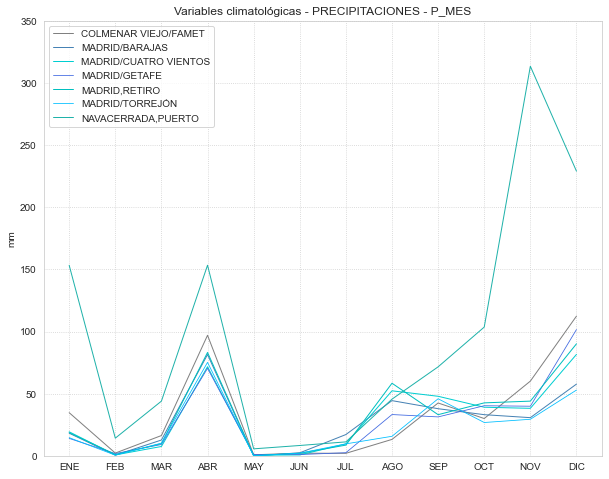

In [76]:
# P_MES_2019_mad  ---->mm  

# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(precip_all.columns.values)[2:-2]
y0 = list(precip_all.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
y1 = list(precip_all.iloc[1, 2:-2])  #MADRID/BARAJAS
y2 = list(precip_all.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
y3 = list(precip_all.iloc[3, 2:-2])  #MADRID/GETAFE	
y4 = list(precip_all.iloc[4, 2:-2])  #MADRID,RETIRO
y5 = list(precip_all.iloc[5, 2:-2])  #MADRID/TORREJÓN
y6 = list(precip_all.iloc[6, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("mm")
ax.set_title("Variables climatológicas - PRECIPITACIONES - P_MES");

plt.plot(meses, y0, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, y1, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, y2, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, y3, color='royalblue', linewidth= 0.8,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, y4, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, y5, color='deepskyblue', linewidth= 0.8,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, y6, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,350);
plt.legend(loc="upper left");

In [77]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
precip_P_MES = precip_all[precip_all["Tipo"]== "P_MES"]
P_MES = list(precip_P_MES.mean())
P_MES[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico


C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[38.95714285714286,
 2.9857142857142853,
 15.657142857142858,
 90.34285714285714,
 1.157142857142857,
 2.6571428571428575,
 8.657142857142858,
 37.542857142857144,
 44.314285714285724,
 45.07142857142857,
 79.39999999999999,
 103.62857142857142]

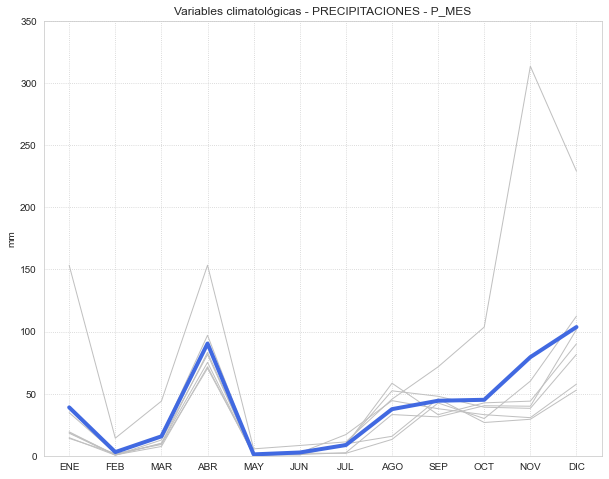

In [78]:
#### Para la presentación me quedo solo con éste gráfico, simplemente haciendo notar que, de todas las estaciones metereologicas
### de MAdrid, Navacerrada es la que tiene algunos valores más pronunciados
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(precip_all.columns.values)[2:-2]
y0 = list(precip_all.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
y1 = list(precip_all.iloc[1, 2:-2])  #MADRID/BARAJAS
y2 = list(precip_all.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
y3 = list(precip_all.iloc[3, 2:-2])  #MADRID/GETAFE	
y4 = list(precip_all.iloc[4, 2:-2])  #MADRID,RETIRO
y5 = list(precip_all.iloc[5, 2:-2])  #MADRID/TORREJÓN
y6 = list(precip_all.iloc[6, 2:-2])  #NAVACERRADA,PUERTO
ymedia = P_MES[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("mm")
ax.set_title("Variables climatológicas - PRECIPITACIONES - P_MES");

plt.plot(meses, y0, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y1, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y2, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y3, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y4, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, y5, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y6, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(0,350);

#### gráfico P_MAX

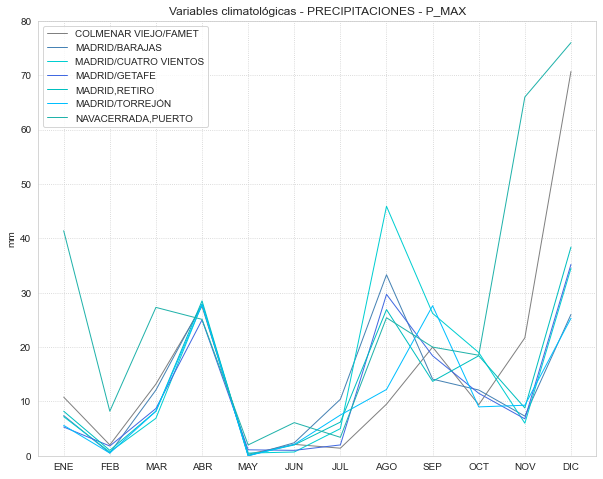

In [79]:
### gráfico P_MAX

# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(precip_all.columns.values)[2:-2]
y7 = list(precip_all.iloc[7, 2:-2])  #COLMENAR VIEJO/FAMET
y8 = list(precip_all.iloc[8, 2:-2])  #MADRID/BARAJAS
y9 = list(precip_all.iloc[9, 2:-2])  #MADRID/CUATRO VIENTOS
y10 = list(precip_all.iloc[10, 2:-2])  #MADRID/GETAFE	
y11 = list(precip_all.iloc[11, 2:-2])  #MADRID,RETIRO
y12 = list(precip_all.iloc[12, 2:-2])  #MADRID/TORREJÓN
y13 = list(precip_all.iloc[13, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("mm")
ax.set_title("Variables climatológicas - PRECIPITACIONES - P_MAX");

plt.plot(meses, y7, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, y8, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, y9, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, y10, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, y11, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, y12, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, y13, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,80);
plt.legend(loc="upper left");

In [80]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
precip_P_MAX = precip_all[precip_all["Tipo"]== "P_MAX"]
P_MAX = list(precip_P_MAX.mean())
P_MAX[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[12.271428571428572,
 2.1,
 12.085714285714285,
 27.1,
 0.5714285714285714,
 2.3428571428571425,
 5.128571428571428,
 26.128571428571426,
 20.0,
 13.985714285714286,
 17.985714285714284,
 43.728571428571435]

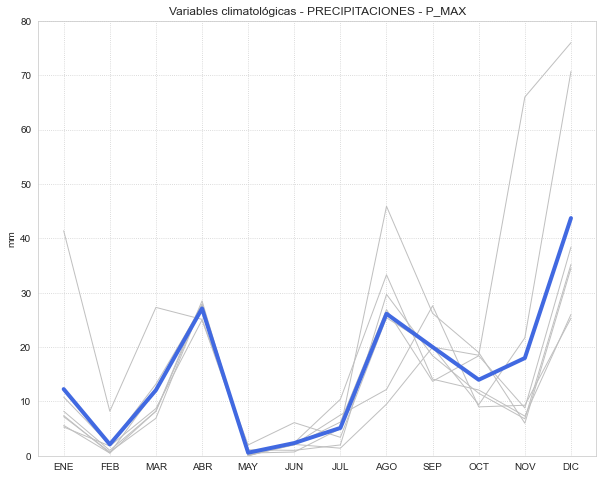

In [81]:
#### Para la presentación me quedo solo con éste gráfico, simplemente haiendo notar que, de todas las estaciones metereologicas
### de MAdrid, Navacerrada es la que tiene algunos valores más pronunciados
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(precip_all.columns.values)[2:-2]
y7 = list(precip_all.iloc[7, 2:-2])  #COLMENAR VIEJO/FAMET
y8 = list(precip_all.iloc[8, 2:-2])  #MADRID/BARAJAS
y9 = list(precip_all.iloc[9, 2:-2])  #MADRID/CUATRO VIENTOS
y10 = list(precip_all.iloc[10, 2:-2])  #MADRID/GETAFE	
y11 = list(precip_all.iloc[11, 2:-2])  #MADRID,RETIRO
y12 = list(precip_all.iloc[12, 2:-2])  #MADRID/TORREJÓN
y13 = list(precip_all.iloc[13, 2:-2])  #NAVACERRADA,PUERTO
ymedia = P_MAX[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("mm")
ax.set_title("Variables climatológicas - PRECIPITACIONES - P_MAX");

plt.plot(meses, y7, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y8, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y9, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y10, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y11, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, y12, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y13, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(0,80);

#### gráfico NP_001

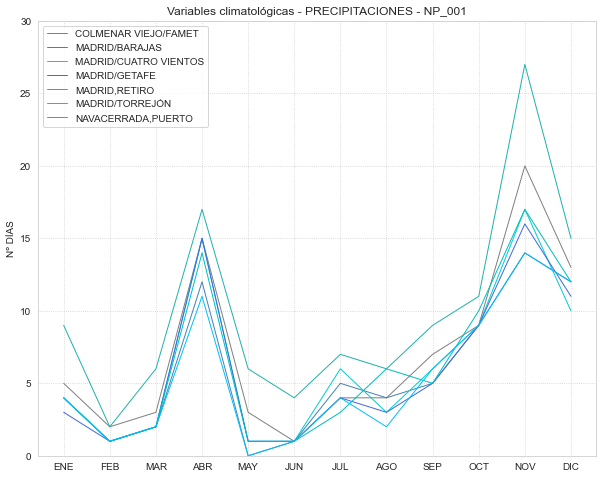

In [82]:
### gráfico NP_001_2019_mad

# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(precip_all.columns.values)[2:-2]
y14 = list(precip_all.iloc[14, 2:-2])  #COLMENAR VIEJO/FAMET
y15 = list(precip_all.iloc[15, 2:-2])  #MADRID/BARAJAS
y16 = list(precip_all.iloc[16, 2:-2])  #MADRID/CUATRO VIENTOS
y17 = list(precip_all.iloc[17, 2:-2])  #MADRID/GETAFE	
y18 = list(precip_all.iloc[18, 2:-2])  #MADRID,RETIRO
y19 = list(precip_all.iloc[19, 2:-2])  #MADRID/TORREJÓN
y20 = list(precip_all.iloc[20, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

# fig,ax = plt.subplots()
ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables climatológicas - PRECIPITACIONES - NP_001");

plt.plot(meses, y14, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, y15, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, y16, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, y17, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, y18, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, y19, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, y20, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,30);
plt.legend(loc="upper left");

In [83]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
precip_NP_001 = precip_all[precip_all["Tipo"]== "NP_001"]
NP_001 = list(precip_NP_001.mean())
NP_001[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[4.714285714285714,
 1.2857142857142858,
 2.7142857142857144,
 14.142857142857142,
 1.7142857142857142,
 1.4285714285714286,
 4.714285714285714,
 4.0,
 6.142857142857143,
 9.428571428571429,
 17.857142857142858,
 12.142857142857142]

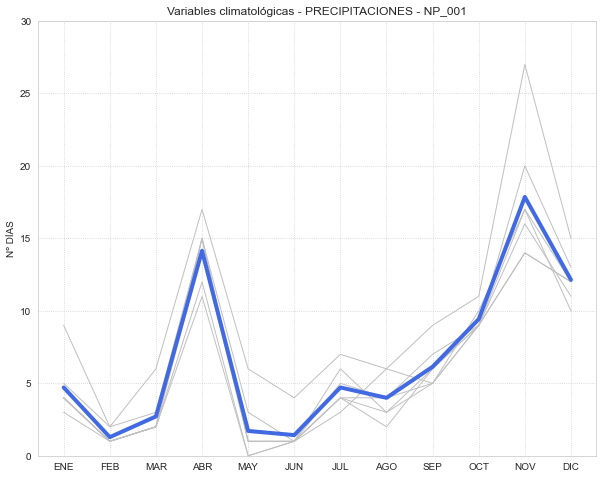

In [84]:
#### Para la presentación me quedo solo con éste gráfico, simplemente haiendo notar que, de todas las estaciones metereologicas
### de MAdrid, Navacerrada es la que tiene algunos valores más pronunciados
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(precip_all.columns.values)[2:-2]
y14 = list(precip_all.iloc[14, 2:-2])  #COLMENAR VIEJO/FAMET
y15 = list(precip_all.iloc[15, 2:-2])  #MADRID/BARAJAS
y16 = list(precip_all.iloc[16, 2:-2])  #MADRID/CUATRO VIENTOS
y17 = list(precip_all.iloc[17, 2:-2])  #MADRID/GETAFE	
y18 = list(precip_all.iloc[18, 2:-2])  #MADRID,RETIRO
y19 = list(precip_all.iloc[19, 2:-2])  #MADRID/TORREJÓN
y20 = list(precip_all.iloc[20, 2:-2])  #NAVACERRADA,PUERTO
ymedia = NP_001[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables climatológicas - PRECIPITACIONES - NP_001");

plt.plot(meses, y14, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y15, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y16, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y17, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y18, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, y19, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y20, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(0,30);

#### gráfico NP_010

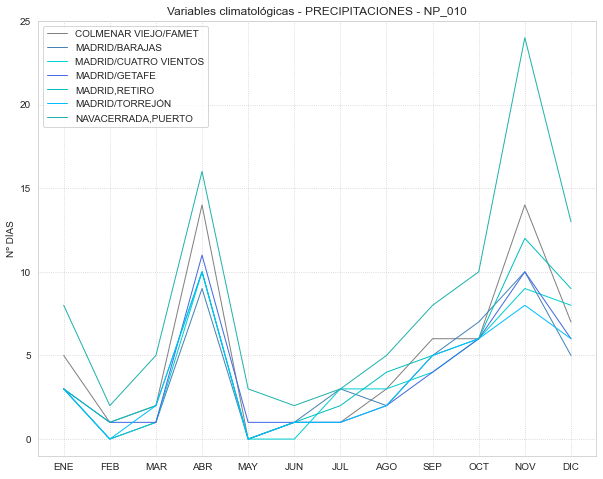

In [85]:
### gráfico NP_010_2019_mad

# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(precip_all.columns.values)[2:-2]
y21 = list(precip_all.iloc[21, 2:-2])  #COLMENAR VIEJO/FAMET
y22 = list(precip_all.iloc[22, 2:-2])  #MADRID/BARAJAS
y23 = list(precip_all.iloc[23, 2:-2])  #MADRID/CUATRO VIENTOS
y24 = list(precip_all.iloc[24, 2:-2])  #MADRID/GETAFE	
y25 = list(precip_all.iloc[25, 2:-2])  #MADRID,RETIRO
y26 = list(precip_all.iloc[26, 2:-2])  #MADRID/TORREJÓN
y27 = list(precip_all.iloc[27, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

# fig,ax = plt.subplots()
ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables climatológicas - PRECIPITACIONES - NP_010");

plt.plot(meses, y21, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, y22, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, y23, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, y24, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, y25, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, y26, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, y27, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(-1,25);
plt.legend(loc="upper left");

In [86]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
precip_NP_010 = precip_all[precip_all["Tipo"]== "NP_010"]
NP_010 = list(precip_NP_010.mean())
NP_010[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[4.0,
 0.7142857142857143,
 2.0,
 11.428571428571429,
 0.5714285714285714,
 1.0,
 2.0,
 3.0,
 5.285714285714286,
 6.714285714285714,
 12.428571428571429,
 7.714285714285714]

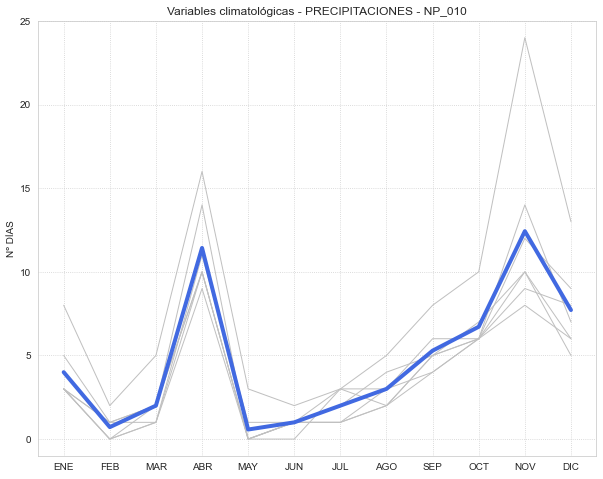

In [87]:
#### Para la presentación me quedo solo con éste gráfico, simplemente haiendo notar que, de todas las estaciones metereologicas
### de MAdrid, Navacerrada es la que tiene algunos valores más pronunciados
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(precip_all.columns.values)[2:-2]
y21 = list(precip_all.iloc[21, 2:-2])  #COLMENAR VIEJO/FAMET
y22 = list(precip_all.iloc[22, 2:-2])  #MADRID/BARAJAS
y23 = list(precip_all.iloc[23, 2:-2])  #MADRID/CUATRO VIENTOS
y24 = list(precip_all.iloc[24, 2:-2])  #MADRID/GETAFE	
y25 = list(precip_all.iloc[25, 2:-2])  #MADRID,RETIRO
y26 = list(precip_all.iloc[26, 2:-2])  #MADRID/TORREJÓN
y27 = list(precip_all.iloc[27, 2:-2])  #NAVACERRADA,PUERTO
ymedia = NP_010[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables climatológicas - PRECIPITACIONES - NP_010");

plt.plot(meses, y21, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y22, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y23, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y24, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y25, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, y26, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y27, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-', label="Valor Medio")


plt.ylim(-1,25);


#### gráfico NP_100

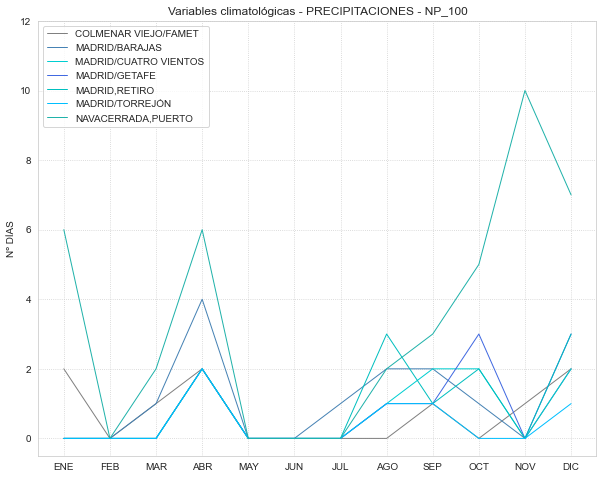

In [88]:
### gráfico NP_100_2019_mad

# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(precip_all.columns.values)[2:-2]
y28 = list(precip_all.iloc[28, 2:-2])  #COLMENAR VIEJO/FAMET
y29 = list(precip_all.iloc[29, 2:-2])  #MADRID/BARAJAS
y30 = list(precip_all.iloc[30, 2:-2])  #MADRID/CUATRO VIENTOS
y31 = list(precip_all.iloc[31, 2:-2])  #MADRID/GETAFE	
y32 = list(precip_all.iloc[32, 2:-2])  #MADRID,RETIRO
y33 = list(precip_all.iloc[33, 2:-2])  #MADRID/TORREJÓN
y34 = list(precip_all.iloc[34, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

# fig,ax = plt.subplots()
ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables climatológicas - PRECIPITACIONES - NP_100");

plt.plot(meses, y28, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, y29, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, y30, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, y31, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, y32, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, y33, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, y34, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(-0.5,12);
plt.legend(loc="upper left");

In [89]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
precip_NP_100 = precip_all[precip_all["Tipo"]== "NP_100"]
NP_100 = list(precip_NP_100.mean())
NP_100[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[1.1428571428571428,
 0.0,
 0.5714285714285714,
 2.857142857142857,
 0.0,
 0.0,
 0.14285714285714285,
 1.4285714285714286,
 1.5714285714285714,
 1.8571428571428572,
 1.5714285714285714,
 2.857142857142857]

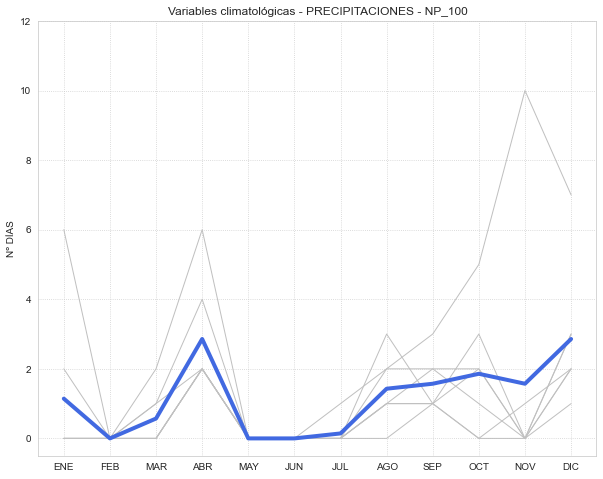

In [90]:
#### Para la presentación me quedo solo con éste gráfico, simplemente haiendo notar que, de todas las estaciones metereologicas
### de MAdrid, Navacerrada es la que tiene algunos valores más pronunciados
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(precip_all.columns.values)[2:-2]
y28 = list(precip_all.iloc[28, 2:-2])  #COLMENAR VIEJO/FAMET
y29 = list(precip_all.iloc[29, 2:-2])  #MADRID/BARAJAS
y30 = list(precip_all.iloc[30, 2:-2])  #MADRID/CUATRO VIENTOS
y31 = list(precip_all.iloc[31, 2:-2])  #MADRID/GETAFE	
y32 = list(precip_all.iloc[32, 2:-2])  #MADRID,RETIRO
y33 = list(precip_all.iloc[33, 2:-2])  #MADRID/TORREJÓN
y34 = list(precip_all.iloc[34, 2:-2])  #NAVACERRADA,PUERTO
ymedia = NP_100[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables climatológicas - PRECIPITACIONES - NP_100");

plt.plot(meses, y28, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y29, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y30, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y31, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y32, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, y33, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y34, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(-0.5,12);

#### gráfico NP_300

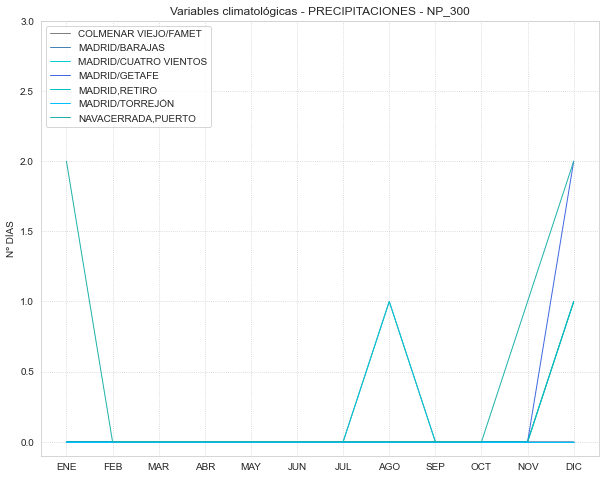

In [91]:
### gráfico NP_300_2019_mad

# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(precip_all.columns.values)[2:-2]
y35 = list(precip_all.iloc[35, 2:-2])  #COLMENAR VIEJO/FAMET
y36 = list(precip_all.iloc[36, 2:-2])  #MADRID/BARAJAS
y37 = list(precip_all.iloc[37, 2:-2])  #MADRID/CUATRO VIENTOS
y38 = list(precip_all.iloc[38, 2:-2])  #MADRID/GETAFE	
y39 = list(precip_all.iloc[39, 2:-2])  #MADRID,RETIRO
y40 = list(precip_all.iloc[40, 2:-2])  #MADRID/TORREJÓN
y41 = list(precip_all.iloc[41, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables climatológicas - PRECIPITACIONES - NP_300");

plt.plot(meses, y35, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, y36, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, y37, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, y38, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, y39, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, y40, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, y41, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(-0.1,3);
plt.legend(loc="upper left");

In [92]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
precip_NP_300 = precip_all[precip_all["Tipo"]== "NP_300"]
NP_300 = list(precip_NP_300.mean())
NP_300[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[0.2857142857142857,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2857142857142857,
 0.0,
 0.0,
 0.14285714285714285,
 1.0]

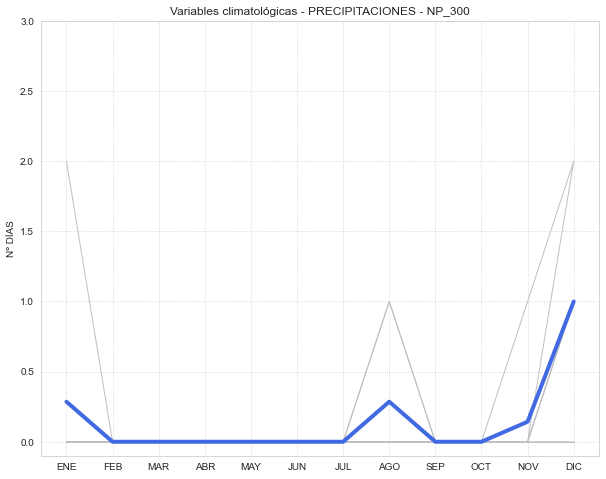

In [93]:
#### Para la presentación me quedo solo con éste gráfico, simplemente haiendo notar que, de todas las estaciones metereologicas
### de MAdrid, Navacerrada es la que tiene algunos valores más pronunciados
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(precip_all.columns.values)[2:-2]
y35 = list(precip_all.iloc[35, 2:-2])  #COLMENAR VIEJO/FAMET
y36 = list(precip_all.iloc[36, 2:-2])  #MADRID/BARAJAS
y37 = list(precip_all.iloc[37, 2:-2])  #MADRID/CUATRO VIENTOS
y38 = list(precip_all.iloc[38, 2:-2])  #MADRID/GETAFE	
y39 = list(precip_all.iloc[39, 2:-2])  #MADRID,RETIRO
y40 = list(precip_all.iloc[40, 2:-2])  #MADRID/TORREJÓN
y41 = list(precip_all.iloc[41, 2:-2])  #NAVACERRADA,PUERTO
ymedia = NP_300[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables climatológicas - PRECIPITACIONES - NP_300");

plt.plot(meses, y35, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y36, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y37, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y38, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y39, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, y40, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, y41, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(-0.1,3);

## 2.3 Mensuales climatologico 2019 - Ocurrencia de metéoros

#### Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...

In [94]:
## Mensuales climatologico 2019 - Ocurrencia de metéoros
## N_LLU_   Nº de días de lluvia en el mes/año

### cargo el df entero:
N_LLU_2019 = pd.read_csv(csv_folder + "\\N_LLU_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
N_LLU_2019_mad = pd.merge(ind_mad, N_LLU_2019, how= "inner", on=["Indicativo"])
N_LLU_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    4.0      0.0    3.0     13   3.0   
1       3129         MADRID/BARAJAS    4.0      1.0    2.0     12   3.0   
2       3196  MADRID/CUATRO VIENTOS    5.0      1.0    2.0     12   1.0   
3       3200          MADRID/GETAFE    4.0      1.0    3.0     15   3.0   
4       3195          MADRID,RETIRO    5.0      1.0    2.0     13   1.0   
5       3175        MADRID/TORREJÓN    4.0      1.0    3.0     11   2.0   
6       2462     NAVACERRADA,PUERTO    2.0      1.0    3.0      7   5.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0    1.0    4.0     7.0         7.0       10       21.0       13.0   86.0  
1    1.0    5.0     4.0         4.0        9       16.0       12.0   73.0  
2    1.0    6.0     3.0         6.0       12       19.0       13.0   81.0  
3    1.0    6.0     4.0         5.0       10       18.0       12.0   82.0  
4    1.0    3.0     4.0         5.0       10       17.0       12.0   74.0  
5    1.0    4.0     2.0         7.0       10       16.0       13.0   74.0  
6    4.0    9.0     7.0        11.0        8       11.0        9.0   77.0

In [95]:
# borro la columna "anual", no me interesa, es una suma y yo quiero una media
N_LLU_2019_mad.drop("anual", inplace=True, axis=1)
N_LLU_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    4.0      0.0    3.0     13   3.0   
1       3129         MADRID/BARAJAS    4.0      1.0    2.0     12   3.0   
2       3196  MADRID/CUATRO VIENTOS    5.0      1.0    2.0     12   1.0   
3       3200          MADRID/GETAFE    4.0      1.0    3.0     15   3.0   
4       3195          MADRID,RETIRO    5.0      1.0    2.0     13   1.0   
5       3175        MADRID/TORREJÓN    4.0      1.0    3.0     11   2.0   
6       2462     NAVACERRADA,PUERTO    2.0      1.0    3.0      7   5.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    1.0    4.0     7.0         7.0       10       21.0       13.0  
1    1.0    5.0     4.0         4.0        9       16.0       12.0  
2    1.0    6.0     3.0         6.0       12       19.0       13.0  
3    1.0    6.0     4.0         5.0       10       18.0       12.0  
4    1.0    3.0     4.0         5.0       10       17.0       12.0  
5    1.0    4.0     2.0         7.0       10       16.0       13.0  
6    4.0    9.0     7.0        11.0        8       11.0        9.0

In [96]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

N_LLU_2019_mad.loc[:,"media anual"] = round(N_LLU_2019_mad.mean(axis=1),2)
N_LLU_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    4.0      0.0    3.0     13   3.0   
1       3129         MADRID/BARAJAS    4.0      1.0    2.0     12   3.0   
2       3196  MADRID/CUATRO VIENTOS    5.0      1.0    2.0     12   1.0   
3       3200          MADRID/GETAFE    4.0      1.0    3.0     15   3.0   
4       3195          MADRID,RETIRO    5.0      1.0    2.0     13   1.0   
5       3175        MADRID/TORREJÓN    4.0      1.0    3.0     11   2.0   
6       2462     NAVACERRADA,PUERTO    2.0      1.0    3.0      7   5.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    1.0    4.0     7.0         7.0       10       21.0       13.0   
1    1.0    5.0     4.0         4.0        9       16.0       12.0   
2    1.0    6.0     3.0         6.0       12       19.0       13.0   
3    1.0    6.0     4.0         5.0       10       18.0       12.0   
4    1.0    3.0     4.0         5.0       10       17.0       12.0   
5    1.0    4.0     2.0         7.0       10       16.0       13.0   
6    4.0    9.0     7.0        11.0        8       11.0        9.0   

   media anual  
0         7.17  
1         6.08  
2         6.75  
3         6.83  
4         6.17  
5         6.17  
6         6.42

In [97]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
N_LLU_2019_mad["Tipo"] = "N_LLU"
N_LLU_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    4.0      0.0    3.0     13   3.0   
1       3129         MADRID/BARAJAS    4.0      1.0    2.0     12   3.0   
2       3196  MADRID/CUATRO VIENTOS    5.0      1.0    2.0     12   1.0   
3       3200          MADRID/GETAFE    4.0      1.0    3.0     15   3.0   
4       3195          MADRID,RETIRO    5.0      1.0    2.0     13   1.0   
5       3175        MADRID/TORREJÓN    4.0      1.0    3.0     11   2.0   
6       2462     NAVACERRADA,PUERTO    2.0      1.0    3.0      7   5.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    1.0    4.0     7.0         7.0       10       21.0       13.0   
1    1.0    5.0     4.0         4.0        9       16.0       12.0   
2    1.0    6.0     3.0         6.0       12       19.0       13.0   
3    1.0    6.0     4.0         5.0       10       18.0       12.0   
4    1.0    3.0     4.0         5.0       10       17.0       12.0   
5    1.0    4.0     2.0         7.0       10       16.0       13.0   
6    4.0    9.0     7.0        11.0        8       11.0        9.0   

   media anual   Tipo  
0         7.17  N_LLU  
1         6.08  N_LLU  
2         6.75  N_LLU  
3         6.83  N_LLU  
4         6.17  N_LLU  
5         6.17  N_LLU  
6         6.42  N_LLU

In [98]:
## estudio los datos:
N_LLU_2019_mad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   7 non-null      object 
 1   NOMBRE       7 non-null      object 
 2   enero        7 non-null      float64
 3   febrero      7 non-null      float64
 4   marzo        7 non-null      float64
 5   abril        7 non-null      int64  
 6   mayo         7 non-null      float64
 7   junio        7 non-null      float64
 8   julio        7 non-null      float64
 9   agosto       7 non-null      float64
 10  septiembre   7 non-null      float64
 11  octubre      7 non-null      int64  
 12  noviembre    7 non-null      float64
 13  diciembre    7 non-null      float64
 14  media anual  7 non-null      float64
 15  Tipo         7 non-null      object 
dtypes: float64(11), int64(2), object(3)
memory usage: 952.0+ bytes


In [99]:
N_LLU_2019_mad.describe()

enero   febrero     marzo      abril      mayo     junio     julio  \
count    7.0  7.000000  7.000000   7.000000  7.000000  7.000000  7.000000   
mean     4.0  0.857143  2.571429  11.857143  2.571429  1.428571  5.285714   
std      1.0  0.377964  0.534522   2.478479  1.397276  1.133893  1.976047   
min      2.0  0.000000  2.000000   7.000000  1.000000  1.000000  3.000000   
25%      4.0  1.000000  2.000000  11.500000  1.500000  1.000000  4.000000   
50%      4.0  1.000000  3.000000  12.000000  3.000000  1.000000  5.000000   
75%      4.5  1.000000  3.000000  13.000000  3.000000  1.000000  6.000000   
max      5.0  1.000000  3.000000  15.000000  5.000000  4.000000  9.000000   

         agosto  septiembre    octubre  noviembre  diciembre  media anual  
count  7.000000    7.000000   7.000000   7.000000   7.000000     7.000000  
mean   4.428571    6.428571   9.857143  16.857143  12.000000     6.512857  
std    1.902379    2.299068   1.214986   3.132016   1.414214     0.412259  
min    2.000000    4.000000   8.000000  11.000000   9.000000     6.080000  
25%    3.500000    5.000000   9.500000  16.000000  12.000000     6.170000  
50%    4.000000    6.000000  10.000000  17.000000  12.000000     6.420000  
75%    5.500000    7.000000  10.000000  18.500000  13.000000     6.790000  
max    7.000000   11.000000  12.000000  21.000000  13.000000     7.170000

In [100]:
## Mensuales climatologico 2019 - Ocurrencia de metéoros
## N_NIE_   Nº de días de nieve en el mes/año

### cargo el df entero:
N_NIE_2019 = pd.read_csv(csv_folder + "\\N_NIE_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
N_NIE_2019_mad = pd.merge(ind_mad, N_NIE_2019, how= "inner", on=["Indicativo"])
N_NIE_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    1.0      2.0    0.0      1   0.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      0   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0      0   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0      0   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0      0   0.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    0.0      0   0.0   
6       2462     NAVACERRADA,PUERTO    9.0      2.0    5.0     13   3.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0    0.0    0.0     0.0         0.0        0        0.0        0.0    4.0  
1    0.0    0.0     0.0         0.0        0        0.0        0.0    0.0  
2    0.0    0.0     0.0         0.0        0        0.0        0.0    0.0  
3    0.0    0.0     0.0         0.0        0        0.0        0.0    0.0  
4    0.0    0.0     0.0         0.0        0        0.0        0.0    0.0  
5    0.0    0.0     0.0         0.0        0        0.0        0.0    0.0  
6    1.0    0.0     0.0         0.0        5       17.0        9.0   64.0

In [101]:
# borro la columna "anual", no me interesa
N_NIE_2019_mad.drop("anual", inplace=True, axis=1)
N_NIE_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    1.0      2.0    0.0      1   0.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      0   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0      0   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0      0   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0      0   0.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    0.0      0   0.0   
6       2462     NAVACERRADA,PUERTO    9.0      2.0    5.0     13   3.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    0.0    0.0     0.0         0.0        0        0.0        0.0  
1    0.0    0.0     0.0         0.0        0        0.0        0.0  
2    0.0    0.0     0.0         0.0        0        0.0        0.0  
3    0.0    0.0     0.0         0.0        0        0.0        0.0  
4    0.0    0.0     0.0         0.0        0        0.0        0.0  
5    0.0    0.0     0.0         0.0        0        0.0        0.0  
6    1.0    0.0     0.0         0.0        5       17.0        9.0

In [102]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

N_NIE_2019_mad.loc[:,"media anual"] = round(N_NIE_2019_mad.mean(axis=1),2)
N_NIE_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    1.0      2.0    0.0      1   0.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      0   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0      0   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0      0   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0      0   0.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    0.0      0   0.0   
6       2462     NAVACERRADA,PUERTO    9.0      2.0    5.0     13   3.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    0.0     0.0         0.0        0        0.0        0.0   
1    0.0    0.0     0.0         0.0        0        0.0        0.0   
2    0.0    0.0     0.0         0.0        0        0.0        0.0   
3    0.0    0.0     0.0         0.0        0        0.0        0.0   
4    0.0    0.0     0.0         0.0        0        0.0        0.0   
5    0.0    0.0     0.0         0.0        0        0.0        0.0   
6    1.0    0.0     0.0         0.0        5       17.0        9.0   

   media anual  
0         0.33  
1         0.00  
2         0.00  
3         0.00  
4         0.00  
5         0.00  
6         5.33

In [103]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
N_NIE_2019_mad["Tipo"] = "N_NIE"
N_NIE_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    1.0      2.0    0.0      1   0.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      0   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0      0   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0      0   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0      0   0.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    0.0      0   0.0   
6       2462     NAVACERRADA,PUERTO    9.0      2.0    5.0     13   3.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    0.0     0.0         0.0        0        0.0        0.0   
1    0.0    0.0     0.0         0.0        0        0.0        0.0   
2    0.0    0.0     0.0         0.0        0        0.0        0.0   
3    0.0    0.0     0.0         0.0        0        0.0        0.0   
4    0.0    0.0     0.0         0.0        0        0.0        0.0   
5    0.0    0.0     0.0         0.0        0        0.0        0.0   
6    1.0    0.0     0.0         0.0        5       17.0        9.0   

   media anual   Tipo  
0         0.33  N_NIE  
1         0.00  N_NIE  
2         0.00  N_NIE  
3         0.00  N_NIE  
4         0.00  N_NIE  
5         0.00  N_NIE  
6         5.33  N_NIE

In [104]:
## estudio los datos:
N_NIE_2019_mad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   7 non-null      object 
 1   NOMBRE       7 non-null      object 
 2   enero        7 non-null      float64
 3   febrero      7 non-null      float64
 4   marzo        7 non-null      float64
 5   abril        7 non-null      int64  
 6   mayo         7 non-null      float64
 7   junio        7 non-null      float64
 8   julio        7 non-null      float64
 9   agosto       7 non-null      float64
 10  septiembre   7 non-null      float64
 11  octubre      7 non-null      int64  
 12  noviembre    7 non-null      float64
 13  diciembre    7 non-null      float64
 14  media anual  7 non-null      float64
 15  Tipo         7 non-null      object 
dtypes: float64(11), int64(2), object(3)
memory usage: 952.0+ bytes


In [105]:
N_NIE_2019_mad.describe()

enero   febrero     marzo     abril      mayo     junio  julio  \
count  7.000000  7.000000  7.000000   7.00000  7.000000  7.000000    7.0   
mean   1.428571  0.571429  0.714286   2.00000  0.428571  0.142857    0.0   
std    3.359422  0.975900  1.889822   4.86484  1.133893  0.377964    0.0   
min    0.000000  0.000000  0.000000   0.00000  0.000000  0.000000    0.0   
25%    0.000000  0.000000  0.000000   0.00000  0.000000  0.000000    0.0   
50%    0.000000  0.000000  0.000000   0.00000  0.000000  0.000000    0.0   
75%    0.500000  1.000000  0.000000   0.50000  0.000000  0.000000    0.0   
max    9.000000  2.000000  5.000000  13.00000  3.000000  1.000000    0.0   

       agosto  septiembre   octubre  noviembre  diciembre  media anual  
count     7.0         7.0  7.000000   7.000000   7.000000     7.000000  
mean      0.0         0.0  0.714286   2.428571   1.285714     0.808571  
std       0.0         0.0  1.889822   6.425396   3.401680     1.997552  
min       0.0         0.0  0.000000   0.000000   0.000000     0.000000  
25%       0.0         0.0  0.000000   0.000000   0.000000     0.000000  
50%       0.0         0.0  0.000000   0.000000   0.000000     0.000000  
75%       0.0         0.0  0.000000   0.000000   0.000000     0.165000  
max       0.0         0.0  5.000000  17.000000   9.000000     5.330000

In [106]:
## Mensuales climatologico 2019 - Ocurrencia de metéoros
## N_GRA_   Nº de días de granizo en el mes/año

### cargo el df entero:
N_GRA_2019 = pd.read_csv(csv_folder + "\\N_GRA_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
N_GRA_2019_mad = pd.merge(ind_mad, N_GRA_2019, how= "inner", on=["Indicativo"])
N_GRA_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0      2   0.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      0   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0      2   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0      1   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0      1   0.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    0.0      0   0.0   
6       2462     NAVACERRADA,PUERTO    0.0      1.0    0.0      1   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0    0.0    0.0     0.0         0.0        0        0.0        0.0    2.0  
1    0.0    0.0     0.0         1.0        0        0.0        0.0    1.0  
2    0.0    0.0     1.0         0.0        0        0.0        0.0    3.0  
3    0.0    0.0     2.0         0.0        0        0.0        0.0    3.0  
4    0.0    0.0     2.0         0.0        0        0.0        0.0    3.0  
5    0.0    0.0     0.0         0.0        0        0.0        0.0    0.0  
6    1.0    0.0     2.0         1.0        0        1.0        0.0    7.0

In [107]:
# borro la columna "anual", no me interesa
N_GRA_2019_mad.drop("anual", inplace=True, axis=1)
N_GRA_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0      2   0.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      0   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0      2   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0      1   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0      1   0.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    0.0      0   0.0   
6       2462     NAVACERRADA,PUERTO    0.0      1.0    0.0      1   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    0.0    0.0     0.0         0.0        0        0.0        0.0  
1    0.0    0.0     0.0         1.0        0        0.0        0.0  
2    0.0    0.0     1.0         0.0        0        0.0        0.0  
3    0.0    0.0     2.0         0.0        0        0.0        0.0  
4    0.0    0.0     2.0         0.0        0        0.0        0.0  
5    0.0    0.0     0.0         0.0        0        0.0        0.0  
6    1.0    0.0     2.0         1.0        0        1.0        0.0

In [108]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

N_GRA_2019_mad.loc[:,"media anual"] = round(N_GRA_2019_mad.mean(axis=1),2)
N_GRA_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0      2   0.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      0   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0      2   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0      1   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0      1   0.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    0.0      0   0.0   
6       2462     NAVACERRADA,PUERTO    0.0      1.0    0.0      1   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    0.0     0.0         0.0        0        0.0        0.0   
1    0.0    0.0     0.0         1.0        0        0.0        0.0   
2    0.0    0.0     1.0         0.0        0        0.0        0.0   
3    0.0    0.0     2.0         0.0        0        0.0        0.0   
4    0.0    0.0     2.0         0.0        0        0.0        0.0   
5    0.0    0.0     0.0         0.0        0        0.0        0.0   
6    1.0    0.0     2.0         1.0        0        1.0        0.0   

   media anual  
0         0.17  
1         0.08  
2         0.25  
3         0.25  
4         0.25  
5         0.00  
6         0.58

In [109]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
N_GRA_2019_mad["Tipo"] = "N_GRA"
N_GRA_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0      2   0.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      0   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0      2   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0      1   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0      1   0.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    0.0      0   0.0   
6       2462     NAVACERRADA,PUERTO    0.0      1.0    0.0      1   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    0.0     0.0         0.0        0        0.0        0.0   
1    0.0    0.0     0.0         1.0        0        0.0        0.0   
2    0.0    0.0     1.0         0.0        0        0.0        0.0   
3    0.0    0.0     2.0         0.0        0        0.0        0.0   
4    0.0    0.0     2.0         0.0        0        0.0        0.0   
5    0.0    0.0     0.0         0.0        0        0.0        0.0   
6    1.0    0.0     2.0         1.0        0        1.0        0.0   

   media anual   Tipo  
0         0.17  N_GRA  
1         0.08  N_GRA  
2         0.25  N_GRA  
3         0.25  N_GRA  
4         0.25  N_GRA  
5         0.00  N_GRA  
6         0.58  N_GRA

In [110]:
## estudio los datos:
N_GRA_2019_mad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   7 non-null      object 
 1   NOMBRE       7 non-null      object 
 2   enero        7 non-null      float64
 3   febrero      7 non-null      float64
 4   marzo        7 non-null      float64
 5   abril        7 non-null      int64  
 6   mayo         7 non-null      float64
 7   junio        7 non-null      float64
 8   julio        7 non-null      float64
 9   agosto       7 non-null      float64
 10  septiembre   7 non-null      float64
 11  octubre      7 non-null      int64  
 12  noviembre    7 non-null      float64
 13  diciembre    7 non-null      float64
 14  media anual  7 non-null      float64
 15  Tipo         7 non-null      object 
dtypes: float64(11), int64(2), object(3)
memory usage: 952.0+ bytes


In [111]:
N_GRA_2019_mad.describe()

enero   febrero  marzo     abril  mayo     junio  julio  agosto  \
count    7.0  7.000000    7.0  7.000000   7.0  7.000000    7.0     7.0   
mean     0.0  0.142857    0.0  1.000000   0.0  0.142857    0.0     1.0   
std      0.0  0.377964    0.0  0.816497   0.0  0.377964    0.0     1.0   
min      0.0  0.000000    0.0  0.000000   0.0  0.000000    0.0     0.0   
25%      0.0  0.000000    0.0  0.500000   0.0  0.000000    0.0     0.0   
50%      0.0  0.000000    0.0  1.000000   0.0  0.000000    0.0     1.0   
75%      0.0  0.000000    0.0  1.500000   0.0  0.000000    0.0     2.0   
max      0.0  1.000000    0.0  2.000000   0.0  1.000000    0.0     2.0   

       septiembre  octubre  noviembre  diciembre  media anual  
count    7.000000      7.0   7.000000        7.0     7.000000  
mean     0.285714      0.0   0.142857        0.0     0.225714  
std      0.487950      0.0   0.377964        0.0     0.183744  
min      0.000000      0.0   0.000000        0.0     0.000000  
25%      0.000000      0.0   0.000000        0.0     0.125000  
50%      0.000000      0.0   0.000000        0.0     0.250000  
75%      0.500000      0.0   0.000000        0.0     0.250000  
max      1.000000      0.0   1.000000        0.0     0.580000

In [112]:
## Mensuales climatologico 2019 - Ocurrencia de metéoros
## N_TOR_   Nº de días de tormenta en el mes/año

### cargo el df entero:
N_TOR_2019 = pd.read_csv(csv_folder + "\\N_TOR_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
N_TOR_2019_mad = pd.merge(ind_mad, N_TOR_2019, how= "inner", on=["Indicativo"])
N_TOR_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0      3   0.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      2   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    1.0      3   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    1.0      2   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    1.0      2   0.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    1.0      2   0.0   
6       2462     NAVACERRADA,PUERTO    1.0      0.0    0.0      1   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0    0.0    4.0     1.0         3.0        1        0.0        0.0   12.0  
1    0.0    4.0     1.0         2.0        1        0.0        0.0   10.0  
2    0.0    3.0     2.0         3.0        1        0.0        0.0   13.0  
3    0.0    5.0     3.0         2.0        1        0.0        0.0   14.0  
4    0.0    5.0     3.0         2.0        0        0.0        0.0   13.0  
5    0.0    3.0     2.0         2.0        1        0.0        0.0   11.0  
6    0.0    2.0     3.0         3.0        1        1.0        0.0   12.0

In [113]:
# borro la columna "anual", no me interesa
N_TOR_2019_mad.drop("anual", inplace=True, axis=1)
N_TOR_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0      3   0.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      2   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    1.0      3   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    1.0      2   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    1.0      2   0.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    1.0      2   0.0   
6       2462     NAVACERRADA,PUERTO    1.0      0.0    0.0      1   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    0.0    4.0     1.0         3.0        1        0.0        0.0  
1    0.0    4.0     1.0         2.0        1        0.0        0.0  
2    0.0    3.0     2.0         3.0        1        0.0        0.0  
3    0.0    5.0     3.0         2.0        1        0.0        0.0  
4    0.0    5.0     3.0         2.0        0        0.0        0.0  
5    0.0    3.0     2.0         2.0        1        0.0        0.0  
6    0.0    2.0     3.0         3.0        1        1.0        0.0

In [114]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

N_TOR_2019_mad.loc[:,"media anual"] = round(N_TOR_2019_mad.mean(axis=1),2)
N_TOR_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0      3   0.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      2   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    1.0      3   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    1.0      2   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    1.0      2   0.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    1.0      2   0.0   
6       2462     NAVACERRADA,PUERTO    1.0      0.0    0.0      1   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    4.0     1.0         3.0        1        0.0        0.0   
1    0.0    4.0     1.0         2.0        1        0.0        0.0   
2    0.0    3.0     2.0         3.0        1        0.0        0.0   
3    0.0    5.0     3.0         2.0        1        0.0        0.0   
4    0.0    5.0     3.0         2.0        0        0.0        0.0   
5    0.0    3.0     2.0         2.0        1        0.0        0.0   
6    0.0    2.0     3.0         3.0        1        1.0        0.0   

   media anual  
0         1.00  
1         0.83  
2         1.08  
3         1.17  
4         1.08  
5         0.92  
6         1.00

In [115]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
N_TOR_2019_mad["Tipo"] = "N_TOR"
N_TOR_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0      3   0.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      2   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    1.0      3   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    1.0      2   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    1.0      2   0.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    1.0      2   0.0   
6       2462     NAVACERRADA,PUERTO    1.0      0.0    0.0      1   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    4.0     1.0         3.0        1        0.0        0.0   
1    0.0    4.0     1.0         2.0        1        0.0        0.0   
2    0.0    3.0     2.0         3.0        1        0.0        0.0   
3    0.0    5.0     3.0         2.0        1        0.0        0.0   
4    0.0    5.0     3.0         2.0        0        0.0        0.0   
5    0.0    3.0     2.0         2.0        1        0.0        0.0   
6    0.0    2.0     3.0         3.0        1        1.0        0.0   

   media anual   Tipo  
0         1.00  N_TOR  
1         0.83  N_TOR  
2         1.08  N_TOR  
3         1.17  N_TOR  
4         1.08  N_TOR  
5         0.92  N_TOR  
6         1.00  N_TOR

In [116]:
## estudio los datos:
N_TOR_2019_mad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   7 non-null      object 
 1   NOMBRE       7 non-null      object 
 2   enero        7 non-null      float64
 3   febrero      7 non-null      float64
 4   marzo        7 non-null      float64
 5   abril        7 non-null      int64  
 6   mayo         7 non-null      float64
 7   junio        7 non-null      float64
 8   julio        7 non-null      float64
 9   agosto       7 non-null      float64
 10  septiembre   7 non-null      float64
 11  octubre      7 non-null      int64  
 12  noviembre    7 non-null      float64
 13  diciembre    7 non-null      float64
 14  media anual  7 non-null      float64
 15  Tipo         7 non-null      object 
dtypes: float64(11), int64(2), object(3)
memory usage: 952.0+ bytes


In [117]:
N_TOR_2019_mad.describe()

enero  febrero     marzo     abril  mayo  junio     julio    agosto  \
count  7.000000      7.0  7.000000  7.000000   7.0    7.0  7.000000  7.000000   
mean   0.142857      0.0  0.571429  2.142857   0.0    0.0  3.714286  2.142857   
std    0.377964      0.0  0.534522  0.690066   0.0    0.0  1.112697  0.899735   
min    0.000000      0.0  0.000000  1.000000   0.0    0.0  2.000000  1.000000   
25%    0.000000      0.0  0.000000  2.000000   0.0    0.0  3.000000  1.500000   
50%    0.000000      0.0  1.000000  2.000000   0.0    0.0  4.000000  2.000000   
75%    0.000000      0.0  1.000000  2.500000   0.0    0.0  4.500000  3.000000   
max    1.000000      0.0  1.000000  3.000000   0.0    0.0  5.000000  3.000000   

       septiembre   octubre  noviembre  diciembre  media anual  
count    7.000000  7.000000   7.000000        7.0     7.000000  
mean     2.428571  0.857143   0.142857        0.0     1.011429  
std      0.534522  0.377964   0.377964        0.0     0.112610  
min      2.000000  0.000000   0.000000        0.0     0.830000  
25%      2.000000  1.000000   0.000000        0.0     0.960000  
50%      2.000000  1.000000   0.000000        0.0     1.000000  
75%      3.000000  1.000000   0.000000        0.0     1.080000  
max      3.000000  1.000000   1.000000        0.0     1.170000

In [118]:
## Mensuales climatologico 2019 - Ocurrencia de metéoros
## N_FOG_   Nº de días de niebla en el mes/año

### cargo el df entero:
N_FOG_2019 = pd.read_csv(csv_folder + "\\N_FOG_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
N_FOG_2019_mad = pd.merge(ind_mad, N_FOG_2019, how= "inner", on=["Indicativo"])
N_FOG_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    2.0      2.0    1.0      3   1.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      0   0.0   
2       3196  MADRID/CUATRO VIENTOS    1.0      1.0    0.0      0   0.0   
3       3200          MADRID/GETAFE    0.0      1.0    0.0      0   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0      0   0.0   
5       3175        MADRID/TORREJÓN    2.0      0.0    0.0      0   0.0   
6       2462     NAVACERRADA,PUERTO   18.0      4.0    7.0     16   7.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0    0.0    0.0     0.0         0.0        3        9.0        8.0   29.0  
1    0.0    0.0     0.0         2.0        1        0.0        4.0    7.0  
2    0.0    0.0     0.0         0.0        0        0.0        4.0    6.0  
3    0.0    0.0     0.0         1.0        3        0.0        6.0   11.0  
4    0.0    0.0     0.0         0.0        0        0.0        2.0    2.0  
5    0.0    0.0     0.0         0.0        0        0.0        5.0    7.0  
6    4.0    3.0     4.0        10.0       14       30.0       16.0  133.0

In [119]:
# borro la columna "anual", no me interesa
N_FOG_2019_mad.drop("anual", inplace=True, axis=1)
N_FOG_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    2.0      2.0    1.0      3   1.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      0   0.0   
2       3196  MADRID/CUATRO VIENTOS    1.0      1.0    0.0      0   0.0   
3       3200          MADRID/GETAFE    0.0      1.0    0.0      0   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0      0   0.0   
5       3175        MADRID/TORREJÓN    2.0      0.0    0.0      0   0.0   
6       2462     NAVACERRADA,PUERTO   18.0      4.0    7.0     16   7.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    0.0    0.0     0.0         0.0        3        9.0        8.0  
1    0.0    0.0     0.0         2.0        1        0.0        4.0  
2    0.0    0.0     0.0         0.0        0        0.0        4.0  
3    0.0    0.0     0.0         1.0        3        0.0        6.0  
4    0.0    0.0     0.0         0.0        0        0.0        2.0  
5    0.0    0.0     0.0         0.0        0        0.0        5.0  
6    4.0    3.0     4.0        10.0       14       30.0       16.0

In [120]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

N_FOG_2019_mad.loc[:,"media anual"] = round(N_FOG_2019_mad.mean(axis=1),2)
N_FOG_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    2.0      2.0    1.0      3   1.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      0   0.0   
2       3196  MADRID/CUATRO VIENTOS    1.0      1.0    0.0      0   0.0   
3       3200          MADRID/GETAFE    0.0      1.0    0.0      0   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0      0   0.0   
5       3175        MADRID/TORREJÓN    2.0      0.0    0.0      0   0.0   
6       2462     NAVACERRADA,PUERTO   18.0      4.0    7.0     16   7.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    0.0     0.0         0.0        3        9.0        8.0   
1    0.0    0.0     0.0         2.0        1        0.0        4.0   
2    0.0    0.0     0.0         0.0        0        0.0        4.0   
3    0.0    0.0     0.0         1.0        3        0.0        6.0   
4    0.0    0.0     0.0         0.0        0        0.0        2.0   
5    0.0    0.0     0.0         0.0        0        0.0        5.0   
6    4.0    3.0     4.0        10.0       14       30.0       16.0   

   media anual  
0         2.42  
1         0.58  
2         0.50  
3         0.92  
4         0.17  
5         0.58  
6        11.08

In [121]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
N_FOG_2019_mad["Tipo"] = "N_FOG"
N_FOG_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    2.0      2.0    1.0      3   1.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0      0   0.0   
2       3196  MADRID/CUATRO VIENTOS    1.0      1.0    0.0      0   0.0   
3       3200          MADRID/GETAFE    0.0      1.0    0.0      0   0.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0      0   0.0   
5       3175        MADRID/TORREJÓN    2.0      0.0    0.0      0   0.0   
6       2462     NAVACERRADA,PUERTO   18.0      4.0    7.0     16   7.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    0.0     0.0         0.0        3        9.0        8.0   
1    0.0    0.0     0.0         2.0        1        0.0        4.0   
2    0.0    0.0     0.0         0.0        0        0.0        4.0   
3    0.0    0.0     0.0         1.0        3        0.0        6.0   
4    0.0    0.0     0.0         0.0        0        0.0        2.0   
5    0.0    0.0     0.0         0.0        0        0.0        5.0   
6    4.0    3.0     4.0        10.0       14       30.0       16.0   

   media anual   Tipo  
0         2.42  N_FOG  
1         0.58  N_FOG  
2         0.50  N_FOG  
3         0.92  N_FOG  
4         0.17  N_FOG  
5         0.58  N_FOG  
6        11.08  N_FOG

In [122]:
## estudio los datos:
N_FOG_2019_mad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   7 non-null      object 
 1   NOMBRE       7 non-null      object 
 2   enero        7 non-null      float64
 3   febrero      7 non-null      float64
 4   marzo        7 non-null      float64
 5   abril        7 non-null      int64  
 6   mayo         7 non-null      float64
 7   junio        7 non-null      float64
 8   julio        7 non-null      float64
 9   agosto       7 non-null      float64
 10  septiembre   7 non-null      float64
 11  octubre      7 non-null      int64  
 12  noviembre    7 non-null      float64
 13  diciembre    7 non-null      float64
 14  media anual  7 non-null      float64
 15  Tipo         7 non-null      object 
dtypes: float64(11), int64(2), object(3)
memory usage: 952.0+ bytes


In [123]:
N_FOG_2019_mad.describe()

enero   febrero     marzo      abril      mayo     junio     julio  \
count   7.000000  7.000000  7.000000   7.000000  7.000000  7.000000  7.000000   
mean    3.285714  1.142857  1.142857   2.714286  1.142857  0.571429  0.428571   
std     6.550173  1.463850  2.609506   5.964179  2.609506  1.511858  1.133893   
min     0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
25%     0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
50%     1.000000  1.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
75%     2.000000  1.500000  0.500000   1.500000  0.500000  0.000000  0.000000   
max    18.000000  4.000000  7.000000  16.000000  7.000000  4.000000  3.000000   

         agosto  septiembre    octubre  noviembre  diciembre  media anual  
count  7.000000    7.000000   7.000000   7.000000   7.000000     7.000000  
mean   0.571429    1.857143   3.000000   5.571429   6.428571     2.321429  
std    1.511858    3.670993   5.033223  11.282097   4.613644     3.930600  
min    0.000000    0.000000   0.000000   0.000000   2.000000     0.170000  
25%    0.000000    0.000000   0.000000   0.000000   4.000000     0.540000  
50%    0.000000    0.000000   1.000000   0.000000   5.000000     0.580000  
75%    0.000000    1.500000   3.000000   4.500000   7.000000     1.670000  
max    4.000000   10.000000  14.000000  30.000000  16.000000    11.080000

In [124]:
## Mensuales climatologico 2019 - Ocurrencia de metéoros
## N_DES_   Nº de días despejados en el mes/año

### cargo el df entero:
N_DES_2019 = pd.read_csv(csv_folder + "\\N_DES_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
N_DES_2019_mad = pd.merge(ind_mad, N_DES_2019, how= "inner", on=["Indicativo"])
N_DES_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   15.0     14.0   15.0    4.0   9.0   
1       3129         MADRID/BARAJAS   16.0     18.0   11.0    4.0   9.0   
2       3196  MADRID/CUATRO VIENTOS   15.0     14.0   14.0    2.0   8.0   
3       3200          MADRID/GETAFE   11.0     14.0   13.0    2.0   8.0   
4       3195          MADRID,RETIRO   14.0     18.0   13.0    4.0   9.0   
5       3175        MADRID/TORREJÓN   13.0     15.0   12.0    4.0   6.0   
6       2462     NAVACERRADA,PUERTO    9.0     10.0    9.0    1.0   8.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0   12.0   11.0    13.0         9.0      7.0        1.0        7.0  117.0  
1   12.0   12.0    18.0         9.0     10.0        1.0        5.0  125.0  
2   10.0   12.0    13.0         9.0      6.0        0.0        3.0  106.0  
3    8.0   10.0    14.0         8.0      6.0        0.0        3.0   97.0  
4   14.0   11.0    16.0        11.0      8.0        0.0        NaN    NaN  
5   10.0   11.0    12.0         9.0      5.0        0.0        4.0  101.0  
6    6.0    9.0     8.0        10.0      3.0        0.0        4.0   77.0

In [125]:
# borro la columna "anual", no me interesa
N_DES_2019_mad.drop("anual", inplace=True, axis=1)
N_DES_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   15.0     14.0   15.0    4.0   9.0   
1       3129         MADRID/BARAJAS   16.0     18.0   11.0    4.0   9.0   
2       3196  MADRID/CUATRO VIENTOS   15.0     14.0   14.0    2.0   8.0   
3       3200          MADRID/GETAFE   11.0     14.0   13.0    2.0   8.0   
4       3195          MADRID,RETIRO   14.0     18.0   13.0    4.0   9.0   
5       3175        MADRID/TORREJÓN   13.0     15.0   12.0    4.0   6.0   
6       2462     NAVACERRADA,PUERTO    9.0     10.0    9.0    1.0   8.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0   12.0   11.0    13.0         9.0      7.0        1.0        7.0  
1   12.0   12.0    18.0         9.0     10.0        1.0        5.0  
2   10.0   12.0    13.0         9.0      6.0        0.0        3.0  
3    8.0   10.0    14.0         8.0      6.0        0.0        3.0  
4   14.0   11.0    16.0        11.0      8.0        0.0        NaN  
5   10.0   11.0    12.0         9.0      5.0        0.0        4.0  
6    6.0    9.0     8.0        10.0      3.0        0.0        4.0

In [126]:
## estudio los datos:
N_DES_2019_mad.info()   ## veo que en diciembre hay un NaN, lo rellenaré con el valor medio de la columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Indicativo  7 non-null      object 
 1   NOMBRE      7 non-null      object 
 2   enero       7 non-null      float64
 3   febrero     7 non-null      float64
 4   marzo       7 non-null      float64
 5   abril       7 non-null      float64
 6   mayo        7 non-null      float64
 7   junio       7 non-null      float64
 8   julio       7 non-null      float64
 9   agosto      7 non-null      float64
 10  septiembre  7 non-null      float64
 11  octubre     7 non-null      float64
 12  noviembre   7 non-null      float64
 13  diciembre   6 non-null      float64
dtypes: float64(12), object(2)
memory usage: 840.0+ bytes


In [127]:
N_DES_2019_mad.describe()  ## veo que el valor medio de diciembre es 4.3, le asignaré este valor al NaN

enero    febrero      marzo     abril      mayo      junio  \
count   7.000000   7.000000   7.000000  7.000000  7.000000   7.000000   
mean   13.285714  14.714286  12.428571  3.000000  8.142857  10.285714   
std     2.497618   2.751623   1.988060  1.290994  1.069045   2.690371   
min     9.000000  10.000000   9.000000  1.000000  6.000000   6.000000   
25%    12.000000  14.000000  11.500000  2.000000  8.000000   9.000000   
50%    14.000000  14.000000  13.000000  4.000000  8.000000  10.000000   
75%    15.000000  16.500000  13.500000  4.000000  9.000000  12.000000   
max    16.000000  18.000000  15.000000  4.000000  9.000000  14.000000   

           julio     agosto  septiembre    octubre  noviembre  diciembre  
count   7.000000   7.000000    7.000000   7.000000   7.000000   6.000000  
mean   10.857143  13.428571    9.285714   6.428571   0.285714   4.333333  
std     1.069045   3.154739    0.951190   2.225395   0.487950   1.505545  
min     9.000000   8.000000    8.000000   3.000000   0.000000   3.000000  
25%    10.500000  12.500000    9.000000   5.500000   0.000000   3.250000  
50%    11.000000  13.000000    9.000000   6.000000   0.000000   4.000000  
75%    11.500000  15.000000    9.500000   7.500000   0.500000   4.750000  
max    12.000000  18.000000   11.000000  10.000000   1.000000   7.000000

In [128]:
N_DES_2019_mad.fillna(4.3, inplace=True)  ## veo que se me ha rellenado así que bien. Solo era un valor y lo he podido hacer con bastante seguridad de no "falsear" los datos
N_DES_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   15.0     14.0   15.0    4.0   9.0   
1       3129         MADRID/BARAJAS   16.0     18.0   11.0    4.0   9.0   
2       3196  MADRID/CUATRO VIENTOS   15.0     14.0   14.0    2.0   8.0   
3       3200          MADRID/GETAFE   11.0     14.0   13.0    2.0   8.0   
4       3195          MADRID,RETIRO   14.0     18.0   13.0    4.0   9.0   
5       3175        MADRID/TORREJÓN   13.0     15.0   12.0    4.0   6.0   
6       2462     NAVACERRADA,PUERTO    9.0     10.0    9.0    1.0   8.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0   12.0   11.0    13.0         9.0      7.0        1.0        7.0  
1   12.0   12.0    18.0         9.0     10.0        1.0        5.0  
2   10.0   12.0    13.0         9.0      6.0        0.0        3.0  
3    8.0   10.0    14.0         8.0      6.0        0.0        3.0  
4   14.0   11.0    16.0        11.0      8.0        0.0        4.3  
5   10.0   11.0    12.0         9.0      5.0        0.0        4.0  
6    6.0    9.0     8.0        10.0      3.0        0.0        4.0

In [129]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

N_DES_2019_mad.loc[:,"media anual"] = round(N_DES_2019_mad.mean(axis=1),2)
N_DES_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   15.0     14.0   15.0    4.0   9.0   
1       3129         MADRID/BARAJAS   16.0     18.0   11.0    4.0   9.0   
2       3196  MADRID/CUATRO VIENTOS   15.0     14.0   14.0    2.0   8.0   
3       3200          MADRID/GETAFE   11.0     14.0   13.0    2.0   8.0   
4       3195          MADRID,RETIRO   14.0     18.0   13.0    4.0   9.0   
5       3175        MADRID/TORREJÓN   13.0     15.0   12.0    4.0   6.0   
6       2462     NAVACERRADA,PUERTO    9.0     10.0    9.0    1.0   8.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   12.0   11.0    13.0         9.0      7.0        1.0        7.0   
1   12.0   12.0    18.0         9.0     10.0        1.0        5.0   
2   10.0   12.0    13.0         9.0      6.0        0.0        3.0   
3    8.0   10.0    14.0         8.0      6.0        0.0        3.0   
4   14.0   11.0    16.0        11.0      8.0        0.0        4.3   
5   10.0   11.0    12.0         9.0      5.0        0.0        4.0   
6    6.0    9.0     8.0        10.0      3.0        0.0        4.0   

   media anual  
0         9.75  
1        10.42  
2         8.83  
3         8.08  
4        10.19  
5         8.42  
6         6.42

In [130]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
N_DES_2019_mad["Tipo"] = "N_DES"
N_DES_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   15.0     14.0   15.0    4.0   9.0   
1       3129         MADRID/BARAJAS   16.0     18.0   11.0    4.0   9.0   
2       3196  MADRID/CUATRO VIENTOS   15.0     14.0   14.0    2.0   8.0   
3       3200          MADRID/GETAFE   11.0     14.0   13.0    2.0   8.0   
4       3195          MADRID,RETIRO   14.0     18.0   13.0    4.0   9.0   
5       3175        MADRID/TORREJÓN   13.0     15.0   12.0    4.0   6.0   
6       2462     NAVACERRADA,PUERTO    9.0     10.0    9.0    1.0   8.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   12.0   11.0    13.0         9.0      7.0        1.0        7.0   
1   12.0   12.0    18.0         9.0     10.0        1.0        5.0   
2   10.0   12.0    13.0         9.0      6.0        0.0        3.0   
3    8.0   10.0    14.0         8.0      6.0        0.0        3.0   
4   14.0   11.0    16.0        11.0      8.0        0.0        4.3   
5   10.0   11.0    12.0         9.0      5.0        0.0        4.0   
6    6.0    9.0     8.0        10.0      3.0        0.0        4.0   

   media anual   Tipo  
0         9.75  N_DES  
1        10.42  N_DES  
2         8.83  N_DES  
3         8.08  N_DES  
4        10.19  N_DES  
5         8.42  N_DES  
6         6.42  N_DES

In [131]:
## Mensuales climatologico 2019 - Ocurrencia de metéoros
##  N_NUB_   Nº de días nubosos en el mes/año

### cargo el df entero:
N_NUB_2019 = pd.read_csv(csv_folder + "\\N_NUB_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
N_NUB_2019_mad = pd.merge(ind_mad, N_NUB_2019, how= "inner", on=["Indicativo"])
N_NUB_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   12.0     14.0   14.0   14.0  19.0   
1       3129         MADRID/BARAJAS   12.0      9.0   19.0   18.0  20.0   
2       3196  MADRID/CUATRO VIENTOS   11.0     13.0   15.0   18.0  19.0   
3       3200          MADRID/GETAFE   15.0     13.0   16.0   19.0  22.0   
4       3195          MADRID,RETIRO   13.0      9.0   17.0   17.0  21.0   
5       3175        MADRID/TORREJÓN   14.0     13.0   17.0   17.0  22.0   
6       2462     NAVACERRADA,PUERTO   10.0     12.0   18.0   10.0  15.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0   17.0   20.0    16.0        16.0     20.0       18.0       14.0  194.0  
1   17.0   19.0    12.0        18.0     14.0       17.0       15.0  190.0  
2   19.0   19.0    16.0        17.0     20.0       21.0       17.0  205.0  
3   21.0   21.0    16.0        19.0     21.0       19.0       18.0  220.0  
4   15.0   20.0    13.0        16.0     19.0       18.0        NaN    NaN  
5   19.0   20.0    18.0        17.0     23.0       17.0       18.0  215.0  
6   22.0   20.0    20.0        11.0     16.0        1.0       13.0  168.0

In [132]:
# borro la columna "anual", no me interesa
N_NUB_2019_mad.drop("anual", inplace=True, axis=1)
N_NUB_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   12.0     14.0   14.0   14.0  19.0   
1       3129         MADRID/BARAJAS   12.0      9.0   19.0   18.0  20.0   
2       3196  MADRID/CUATRO VIENTOS   11.0     13.0   15.0   18.0  19.0   
3       3200          MADRID/GETAFE   15.0     13.0   16.0   19.0  22.0   
4       3195          MADRID,RETIRO   13.0      9.0   17.0   17.0  21.0   
5       3175        MADRID/TORREJÓN   14.0     13.0   17.0   17.0  22.0   
6       2462     NAVACERRADA,PUERTO   10.0     12.0   18.0   10.0  15.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0   17.0   20.0    16.0        16.0     20.0       18.0       14.0  
1   17.0   19.0    12.0        18.0     14.0       17.0       15.0  
2   19.0   19.0    16.0        17.0     20.0       21.0       17.0  
3   21.0   21.0    16.0        19.0     21.0       19.0       18.0  
4   15.0   20.0    13.0        16.0     19.0       18.0        NaN  
5   19.0   20.0    18.0        17.0     23.0       17.0       18.0  
6   22.0   20.0    20.0        11.0     16.0        1.0       13.0

In [133]:
## estudio los datos:
N_NUB_2019_mad.info()   ## veo que aquí tambien en diciembre hay un NaN, lo rellenaré con el valor medio de la columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Indicativo  7 non-null      object 
 1   NOMBRE      7 non-null      object 
 2   enero       7 non-null      float64
 3   febrero     7 non-null      float64
 4   marzo       7 non-null      float64
 5   abril       7 non-null      float64
 6   mayo        7 non-null      float64
 7   junio       7 non-null      float64
 8   julio       7 non-null      float64
 9   agosto      7 non-null      float64
 10  septiembre  7 non-null      float64
 11  octubre     7 non-null      float64
 12  noviembre   7 non-null      float64
 13  diciembre   6 non-null      float64
dtypes: float64(12), object(2)
memory usage: 840.0+ bytes


In [134]:
N_NUB_2019_mad.describe()  ### valor medio de diciembre: 15.83

enero    febrero      marzo      abril       mayo      junio  \
count   7.000000   7.000000   7.000000   7.000000   7.000000   7.000000   
mean   12.428571  11.857143  16.571429  16.142857  19.714286  18.571429   
std     1.718249   2.035401   1.718249   3.132016   2.429972   2.439750   
min    10.000000   9.000000  14.000000  10.000000  15.000000  15.000000   
25%    11.500000  10.500000  15.500000  15.500000  19.000000  17.000000   
50%    12.000000  13.000000  17.000000  17.000000  20.000000  19.000000   
75%    13.500000  13.000000  17.500000  18.000000  21.500000  20.000000   
max    15.000000  14.000000  19.000000  19.000000  22.000000  22.000000   

           julio     agosto  septiembre   octubre  noviembre  diciembre  
count   7.000000   7.000000    7.000000   7.00000   7.000000   6.000000  
mean   19.857143  15.857143   16.285714  19.00000  15.857143  15.833333  
std     0.690066   2.734262    2.563480   3.05505   6.693992   2.136976  
min    19.000000  12.000000   11.000000  14.00000   1.000000  13.000000  
25%    19.500000  14.500000   16.000000  17.50000  17.000000  14.250000  
50%    20.000000  16.000000   17.000000  20.00000  18.000000  16.000000  
75%    20.000000  17.000000   17.500000  20.50000  18.500000  17.750000  
max    21.000000  20.000000   19.000000  23.00000  21.000000  18.000000

In [135]:
N_NUB_2019_mad.fillna(15.83, inplace=True)  ## veo que se me ha rellenado así que bien. Solo era un valor y lo he podido hacer con bastante seguridad de no "falsear" los datos
N_NUB_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   12.0     14.0   14.0   14.0  19.0   
1       3129         MADRID/BARAJAS   12.0      9.0   19.0   18.0  20.0   
2       3196  MADRID/CUATRO VIENTOS   11.0     13.0   15.0   18.0  19.0   
3       3200          MADRID/GETAFE   15.0     13.0   16.0   19.0  22.0   
4       3195          MADRID,RETIRO   13.0      9.0   17.0   17.0  21.0   
5       3175        MADRID/TORREJÓN   14.0     13.0   17.0   17.0  22.0   
6       2462     NAVACERRADA,PUERTO   10.0     12.0   18.0   10.0  15.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0   17.0   20.0    16.0        16.0     20.0       18.0      14.00  
1   17.0   19.0    12.0        18.0     14.0       17.0      15.00  
2   19.0   19.0    16.0        17.0     20.0       21.0      17.00  
3   21.0   21.0    16.0        19.0     21.0       19.0      18.00  
4   15.0   20.0    13.0        16.0     19.0       18.0      15.83  
5   19.0   20.0    18.0        17.0     23.0       17.0      18.00  
6   22.0   20.0    20.0        11.0     16.0        1.0      13.00

In [136]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

N_NUB_2019_mad.loc[:,"media anual"] = round(N_NUB_2019_mad.mean(axis=1),2)
N_NUB_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   12.0     14.0   14.0   14.0  19.0   
1       3129         MADRID/BARAJAS   12.0      9.0   19.0   18.0  20.0   
2       3196  MADRID/CUATRO VIENTOS   11.0     13.0   15.0   18.0  19.0   
3       3200          MADRID/GETAFE   15.0     13.0   16.0   19.0  22.0   
4       3195          MADRID,RETIRO   13.0      9.0   17.0   17.0  21.0   
5       3175        MADRID/TORREJÓN   14.0     13.0   17.0   17.0  22.0   
6       2462     NAVACERRADA,PUERTO   10.0     12.0   18.0   10.0  15.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   17.0   20.0    16.0        16.0     20.0       18.0      14.00   
1   17.0   19.0    12.0        18.0     14.0       17.0      15.00   
2   19.0   19.0    16.0        17.0     20.0       21.0      17.00   
3   21.0   21.0    16.0        19.0     21.0       19.0      18.00   
4   15.0   20.0    13.0        16.0     19.0       18.0      15.83   
5   19.0   20.0    18.0        17.0     23.0       17.0      18.00   
6   22.0   20.0    20.0        11.0     16.0        1.0      13.00   

   media anual  
0        16.17  
1        15.83  
2        17.08  
3        18.33  
4        16.15  
5        17.92  
6        14.00

In [137]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
N_NUB_2019_mad["Tipo"] = "N_NUB"
N_NUB_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   12.0     14.0   14.0   14.0  19.0   
1       3129         MADRID/BARAJAS   12.0      9.0   19.0   18.0  20.0   
2       3196  MADRID/CUATRO VIENTOS   11.0     13.0   15.0   18.0  19.0   
3       3200          MADRID/GETAFE   15.0     13.0   16.0   19.0  22.0   
4       3195          MADRID,RETIRO   13.0      9.0   17.0   17.0  21.0   
5       3175        MADRID/TORREJÓN   14.0     13.0   17.0   17.0  22.0   
6       2462     NAVACERRADA,PUERTO   10.0     12.0   18.0   10.0  15.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   17.0   20.0    16.0        16.0     20.0       18.0      14.00   
1   17.0   19.0    12.0        18.0     14.0       17.0      15.00   
2   19.0   19.0    16.0        17.0     20.0       21.0      17.00   
3   21.0   21.0    16.0        19.0     21.0       19.0      18.00   
4   15.0   20.0    13.0        16.0     19.0       18.0      15.83   
5   19.0   20.0    18.0        17.0     23.0       17.0      18.00   
6   22.0   20.0    20.0        11.0     16.0        1.0      13.00   

   media anual   Tipo  
0        16.17  N_NUB  
1        15.83  N_NUB  
2        17.08  N_NUB  
3        18.33  N_NUB  
4        16.15  N_NUB  
5        17.92  N_NUB  
6        14.00  N_NUB

In [138]:
## Mensuales climatologico 2019 - Ocurrencia de metéoros
##  N_CUB_   Nº de días cubiertos en el mes/año

### cargo el df entero:
N_CUB_2019 = pd.read_csv(csv_folder + "\\N_CUB_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
N_CUB_2019_mad = pd.merge(ind_mad, N_CUB_2019, how= "inner", on=["Indicativo"])
N_CUB_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    4.0      0.0    2.0   12.0   3.0   
1       3129         MADRID/BARAJAS    3.0      1.0    1.0    8.0   2.0   
2       3196  MADRID/CUATRO VIENTOS    5.0      1.0    2.0   10.0   4.0   
3       3200          MADRID/GETAFE    5.0      1.0    2.0    9.0   1.0   
4       3195          MADRID,RETIRO    4.0      1.0    1.0    9.0   1.0   
5       3175        MADRID/TORREJÓN    4.0      0.0    2.0    9.0   3.0   
6       2462     NAVACERRADA,PUERTO   12.0      6.0    4.0   19.0   8.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0    1.0    0.0     2.0         5.0      4.0       11.0       10.0   54.0  
1    1.0    0.0     1.0         3.0      7.0       12.0       11.0   50.0  
2    1.0    0.0     2.0         4.0      5.0        9.0       11.0   54.0  
3    1.0    0.0     1.0         3.0      4.0       11.0       10.0   48.0  
4    1.0    0.0     2.0         3.0      4.0       12.0        NaN    NaN  
5    1.0    0.0     1.0         4.0      3.0       13.0        9.0   49.0  
6    2.0    2.0     3.0         9.0     12.0       29.0       14.0  120.0

In [139]:
# borro la columna "anual", no me interesa
N_CUB_2019_mad.drop("anual", inplace=True, axis=1)
N_CUB_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    4.0      0.0    2.0   12.0   3.0   
1       3129         MADRID/BARAJAS    3.0      1.0    1.0    8.0   2.0   
2       3196  MADRID/CUATRO VIENTOS    5.0      1.0    2.0   10.0   4.0   
3       3200          MADRID/GETAFE    5.0      1.0    2.0    9.0   1.0   
4       3195          MADRID,RETIRO    4.0      1.0    1.0    9.0   1.0   
5       3175        MADRID/TORREJÓN    4.0      0.0    2.0    9.0   3.0   
6       2462     NAVACERRADA,PUERTO   12.0      6.0    4.0   19.0   8.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    1.0    0.0     2.0         5.0      4.0       11.0       10.0  
1    1.0    0.0     1.0         3.0      7.0       12.0       11.0  
2    1.0    0.0     2.0         4.0      5.0        9.0       11.0  
3    1.0    0.0     1.0         3.0      4.0       11.0       10.0  
4    1.0    0.0     2.0         3.0      4.0       12.0        NaN  
5    1.0    0.0     1.0         4.0      3.0       13.0        9.0  
6    2.0    2.0     3.0         9.0     12.0       29.0       14.0

In [140]:
## estudio los datos:
N_CUB_2019_mad.info()   ## veo que aquí tambien en diciembre hay un NaN, lo rellenaré con el valor medio de la columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Indicativo  7 non-null      object 
 1   NOMBRE      7 non-null      object 
 2   enero       7 non-null      float64
 3   febrero     7 non-null      float64
 4   marzo       7 non-null      float64
 5   abril       7 non-null      float64
 6   mayo        7 non-null      float64
 7   junio       7 non-null      float64
 8   julio       7 non-null      float64
 9   agosto      7 non-null      float64
 10  septiembre  7 non-null      float64
 11  octubre     7 non-null      float64
 12  noviembre   7 non-null      float64
 13  diciembre   6 non-null      float64
dtypes: float64(12), object(2)
memory usage: 840.0+ bytes


In [141]:
N_CUB_2019_mad.describe()  ### valor medio de diciembre: 10.83

enero   febrero  marzo      abril      mayo     junio     julio  \
count   7.000000  7.000000    7.0   7.000000  7.000000  7.000000  7.000000   
mean    5.285714  1.428571    2.0  10.857143  3.142857  1.142857  0.285714   
std     3.039424  2.070197    1.0   3.804759  2.410295  0.377964  0.755929   
min     3.000000  0.000000    1.0   8.000000  1.000000  1.000000  0.000000   
25%     4.000000  0.500000    1.5   9.000000  1.500000  1.000000  0.000000   
50%     4.000000  1.000000    2.0   9.000000  3.000000  1.000000  0.000000   
75%     5.000000  1.000000    2.0  11.000000  3.500000  1.000000  0.000000   
max    12.000000  6.000000    4.0  19.000000  8.000000  2.000000  2.000000   

         agosto  septiembre    octubre  noviembre  diciembre  
count  7.000000    7.000000   7.000000   7.000000   6.000000  
mean   1.714286    4.428571   5.571429  13.857143  10.833333  
std    0.755929    2.149197   3.101459   6.792853   1.722401  
min    1.000000    3.000000   3.000000   9.000000   9.000000  
25%    1.000000    3.000000   4.000000  11.000000  10.000000  
50%    2.000000    4.000000   4.000000  12.000000  10.500000  
75%    2.000000    4.500000   6.000000  12.500000  11.000000  
max    3.000000    9.000000  12.000000  29.000000  14.000000

In [142]:
N_CUB_2019_mad.fillna(10.83, inplace=True)  ## veo que se me ha rellenado así que bien. Solo era un valor y lo he podido hacer con bastante seguridad de no "falsear" los datos
N_CUB_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    4.0      0.0    2.0   12.0   3.0   
1       3129         MADRID/BARAJAS    3.0      1.0    1.0    8.0   2.0   
2       3196  MADRID/CUATRO VIENTOS    5.0      1.0    2.0   10.0   4.0   
3       3200          MADRID/GETAFE    5.0      1.0    2.0    9.0   1.0   
4       3195          MADRID,RETIRO    4.0      1.0    1.0    9.0   1.0   
5       3175        MADRID/TORREJÓN    4.0      0.0    2.0    9.0   3.0   
6       2462     NAVACERRADA,PUERTO   12.0      6.0    4.0   19.0   8.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    1.0    0.0     2.0         5.0      4.0       11.0      10.00  
1    1.0    0.0     1.0         3.0      7.0       12.0      11.00  
2    1.0    0.0     2.0         4.0      5.0        9.0      11.00  
3    1.0    0.0     1.0         3.0      4.0       11.0      10.00  
4    1.0    0.0     2.0         3.0      4.0       12.0      10.83  
5    1.0    0.0     1.0         4.0      3.0       13.0       9.00  
6    2.0    2.0     3.0         9.0     12.0       29.0      14.00

In [143]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

N_CUB_2019_mad.loc[:,"media anual"] = round(N_CUB_2019_mad.mean(axis=1),2)
N_CUB_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    4.0      0.0    2.0   12.0   3.0   
1       3129         MADRID/BARAJAS    3.0      1.0    1.0    8.0   2.0   
2       3196  MADRID/CUATRO VIENTOS    5.0      1.0    2.0   10.0   4.0   
3       3200          MADRID/GETAFE    5.0      1.0    2.0    9.0   1.0   
4       3195          MADRID,RETIRO    4.0      1.0    1.0    9.0   1.0   
5       3175        MADRID/TORREJÓN    4.0      0.0    2.0    9.0   3.0   
6       2462     NAVACERRADA,PUERTO   12.0      6.0    4.0   19.0   8.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    1.0    0.0     2.0         5.0      4.0       11.0      10.00   
1    1.0    0.0     1.0         3.0      7.0       12.0      11.00   
2    1.0    0.0     2.0         4.0      5.0        9.0      11.00   
3    1.0    0.0     1.0         3.0      4.0       11.0      10.00   
4    1.0    0.0     2.0         3.0      4.0       12.0      10.83   
5    1.0    0.0     1.0         4.0      3.0       13.0       9.00   
6    2.0    2.0     3.0         9.0     12.0       29.0      14.00   

   media anual  
0         4.50  
1         4.17  
2         4.50  
3         4.00  
4         4.07  
5         4.08  
6        10.00

In [144]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
N_CUB_2019_mad["Tipo"] = "N_CUB"
N_CUB_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    4.0      0.0    2.0   12.0   3.0   
1       3129         MADRID/BARAJAS    3.0      1.0    1.0    8.0   2.0   
2       3196  MADRID/CUATRO VIENTOS    5.0      1.0    2.0   10.0   4.0   
3       3200          MADRID/GETAFE    5.0      1.0    2.0    9.0   1.0   
4       3195          MADRID,RETIRO    4.0      1.0    1.0    9.0   1.0   
5       3175        MADRID/TORREJÓN    4.0      0.0    2.0    9.0   3.0   
6       2462     NAVACERRADA,PUERTO   12.0      6.0    4.0   19.0   8.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    1.0    0.0     2.0         5.0      4.0       11.0      10.00   
1    1.0    0.0     1.0         3.0      7.0       12.0      11.00   
2    1.0    0.0     2.0         4.0      5.0        9.0      11.00   
3    1.0    0.0     1.0         3.0      4.0       11.0      10.00   
4    1.0    0.0     2.0         3.0      4.0       12.0      10.83   
5    1.0    0.0     1.0         4.0      3.0       13.0       9.00   
6    2.0    2.0     3.0         9.0     12.0       29.0      14.00   

   media anual   Tipo  
0         4.50  N_CUB  
1         4.17  N_CUB  
2         4.50  N_CUB  
3         4.00  N_CUB  
4         4.07  N_CUB  
5         4.08  N_CUB  
6        10.00  N_CUB

In [145]:
##ahora concateno todos los df de ocurrencias de meteoros y saco un único df
# N_LLU_2019_mad  ---->nº dias
# N_NIE_2019_mad ---->nº dias
# N_GRA_2019_mad ---->nº dias
# N_TOR_2019_mad ---->nº dias
# N_FOG_2019_mad ---->nº dias
# N_DES_2019_mad ---->nº dias
# N_NUB_2019_mad ---->nº dias
# N_CUB_2019_mad ---->nº dias

meteor_all = pd.concat([N_LLU_2019_mad,N_NIE_2019_mad, N_GRA_2019_mad,N_TOR_2019_mad, N_FOG_2019_mad, N_DES_2019_mad, N_NUB_2019_mad, N_CUB_2019_mad])
meteor_all.reset_index(drop=True)

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0       3191E   COLMENAR VIEJO/FAMET    4.0      0.0    3.0   13.0   3.0   
1        3129         MADRID/BARAJAS    4.0      1.0    2.0   12.0   3.0   
2        3196  MADRID/CUATRO VIENTOS    5.0      1.0    2.0   12.0   1.0   
3        3200          MADRID/GETAFE    4.0      1.0    3.0   15.0   3.0   
4        3195          MADRID,RETIRO    5.0      1.0    2.0   13.0   1.0   
5        3175        MADRID/TORREJÓN    4.0      1.0    3.0   11.0   2.0   
6        2462     NAVACERRADA,PUERTO    2.0      1.0    3.0    7.0   5.0   
7       3191E   COLMENAR VIEJO/FAMET    1.0      2.0    0.0    1.0   0.0   
8        3129         MADRID/BARAJAS    0.0      0.0    0.0    0.0   0.0   
9        3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0    0.0   0.0   
10       3200          MADRID/GETAFE    0.0      0.0    0.0    0.0   0.0   
11       3195          MADRID,RETIRO    0.0      0.0    0.0    0.0   0.0   
12       3175        MADRID/TORREJÓN    0.0      0.0    0.0    0.0   0.0   
13       2462     NAVACERRADA,PUERTO    9.0      2.0    5.0   13.0   3.0   
14      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0    2.0   0.0   
15       3129         MADRID/BARAJAS    0.0      0.0    0.0    0.0   0.0   
16       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0    2.0   0.0   
17       3200          MADRID/GETAFE    0.0      0.0    0.0    1.0   0.0   
18       3195          MADRID,RETIRO    0.0      0.0    0.0    1.0   0.0   
19       3175        MADRID/TORREJÓN    0.0      0.0    0.0    0.0   0.0   
20       2462     NAVACERRADA,PUERTO    0.0      1.0    0.0    1.0   0.0   
21      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0    3.0   0.0   
22       3129         MADRID/BARAJAS    0.0      0.0    0.0    2.0   0.0   
23       3196  MADRID/CUATRO VIENTOS    0.0      0.0    1.0    3.0   0.0   
24       3200          MADRID/GETAFE    0.0      0.0    1.0    2.0   0.0   
25       3195          MADRID,RETIRO    0.0      0.0    1.0    2.0   0.0   
26       3175        MADRID/TORREJÓN    0.0      0.0    1.0    2.0   0.0   
27       2462     NAVACERRADA,PUERTO    1.0      0.0    0.0    1.0   0.0   
28      3191E   COLMENAR VIEJO/FAMET    2.0      2.0    1.0    3.0   1.0   
29       3129         MADRID/BARAJAS    0.0      0.0    0.0    0.0   0.0   
30       3196  MADRID/CUATRO VIENTOS    1.0      1.0    0.0    0.0   0.0   
31       3200          MADRID/GETAFE    0.0      1.0    0.0    0.0   0.0   
32       3195          MADRID,RETIRO    0.0      0.0    0.0    0.0   0.0   
33       3175        MADRID/TORREJÓN    2.0      0.0    0.0    0.0   0.0   
34       2462     NAVACERRADA,PUERTO   18.0      4.0    7.0   16.0   7.0   
35      3191E   COLMENAR VIEJO/FAMET   15.0     14.0   15.0    4.0   9.0   
36       3129         MADRID/BARAJAS   16.0     18.0   11.0    4.0   9.0   
37       3196  MADRID/CUATRO VIENTOS   15.0     14.0   14.0    2.0   8.0   
38       3200          MADRID/GETAFE   11.0     14.0   13.0    2.0   8.0   
39       3195          MADRID,RETIRO   14.0     18.0   13.0    4.0   9.0   
40       3175        MADRID/TORREJÓN   13.0     15.0   12.0    4.0   6.0   
41       2462     NAVACERRADA,PUERTO    9.0     10.0    9.0    1.0   8.0   
42      3191E   COLMENAR VIEJO/FAMET   12.0     14.0   14.0   14.0  19.0   
43       3129         MADRID/BARAJAS   12.0      9.0   19.0   18.0  20.0   
44       3196  MADRID/CUATRO VIENTOS   11.0     13.0   15.0   18.0  19.0   
45       3200          MADRID/GETAFE   15.0     13.0   16.0   19.0  22.0   
46       3195          MADRID,RETIRO   13.0      9.0   17.0   17.0  21.0   
47       3175        MADRID/TORREJÓN   14.0     13.0   17.0   17.0  22.0   
48       2462     NAVACERRADA,PUERTO   10.0     12.0   18.0   10.0  15.0   
49      3191E   COLMENAR VIEJO/FAMET    4.0      0.0    2.0   12.0   3.0   
50       3129         MADRID/BARAJAS    3.0      1.0    1.0    8.0   2.0   
51       3196  MADRID/CUATRO VIENTOS    5.0      1.

In [146]:
## Renombro los meses para que salgan mejor en los gráficos
meteor_all.columns = ["Indicativo", "NOMBRE", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC", "media anual", "Tipo"]
pd.DataFrame(meteor_all).head()

Indicativo                 NOMBRE  ENE  FEB  MAR   ABR  MAY  JUN  JUL  AGO  \
0      3191E   COLMENAR VIEJO/FAMET  4.0  0.0  3.0  13.0  3.0  1.0  4.0  7.0   
1       3129         MADRID/BARAJAS  4.0  1.0  2.0  12.0  3.0  1.0  5.0  4.0   
2       3196  MADRID/CUATRO VIENTOS  5.0  1.0  2.0  12.0  1.0  1.0  6.0  3.0   
3       3200          MADRID/GETAFE  4.0  1.0  3.0  15.0  3.0  1.0  6.0  4.0   
4       3195          MADRID,RETIRO  5.0  1.0  2.0  13.0  1.0  1.0  3.0  4.0   

   SEP   OCT   NOV   DIC  media anual   Tipo  
0  7.0  10.0  21.0  13.0         7.17  N_LLU  
1  4.0   9.0  16.0  12.0         6.08  N_LLU  
2  6.0  12.0  19.0  13.0         6.75  N_LLU  
3  5.0  10.0  18.0  12.0         6.83  N_LLU  
4  5.0  10.0  17.0  12.0         6.17  N_LLU

In [147]:
##guardo el dataframe
meteor_all.to_csv("meteor_all.csv", index=False)

In [148]:
meteor_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   56 non-null     object 
 1   NOMBRE       56 non-null     object 
 2   ENE          56 non-null     float64
 3   FEB          56 non-null     float64
 4   MAR          56 non-null     float64
 5   ABR          56 non-null     float64
 6   MAY          56 non-null     float64
 7   JUN          56 non-null     float64
 8   JUL          56 non-null     float64
 9   AGO          56 non-null     float64
 10  SEP          56 non-null     float64
 11  OCT          56 non-null     float64
 12  NOV          56 non-null     float64
 13  DIC          56 non-null     float64
 14  media anual  56 non-null     float64
 15  Tipo         56 non-null     object 
dtypes: float64(13), object(3)
memory usage: 7.4+ KB


### Gráficos varios

#### gráfico N_LLU

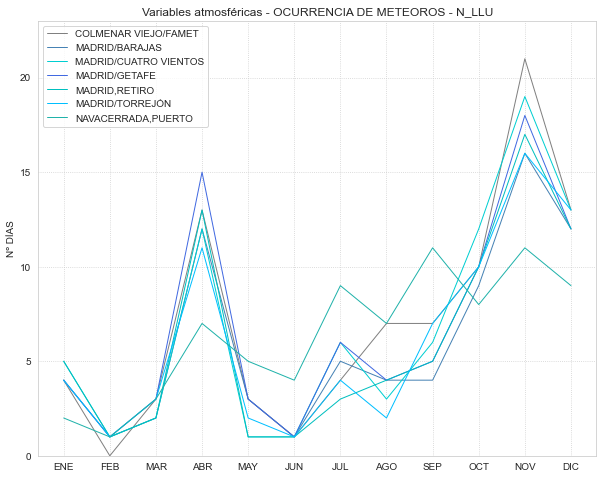

In [149]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z0 = list(meteor_all.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
z1 = list(meteor_all.iloc[1, 2:-2])  #MADRID/BARAJAS
z2 = list(meteor_all.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
z3 = list(meteor_all.iloc[3, 2:-2])  #MADRID/GETAFE	
z4 = list(meteor_all.iloc[4, 2:-2])  #MADRID,RETIRO
z5 = list(meteor_all.iloc[5, 2:-2])  #MADRID/TORREJÓN
z6 = list(meteor_all.iloc[6, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_LLU");

plt.plot(meses, z0, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, z1, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, z2, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, z3, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, z4, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, z5, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, z6, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,23);
plt.legend(loc="upper left");

In [150]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
ocurr_N_LLU = meteor_all[meteor_all["Tipo"]== "N_LLU"]
N_LLU = list(ocurr_N_LLU.mean())
N_LLU[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[4.0,
 0.8571428571428571,
 2.5714285714285716,
 11.857142857142858,
 2.5714285714285716,
 1.4285714285714286,
 5.285714285714286,
 4.428571428571429,
 6.428571428571429,
 9.857142857142858,
 16.857142857142858,
 12.0]

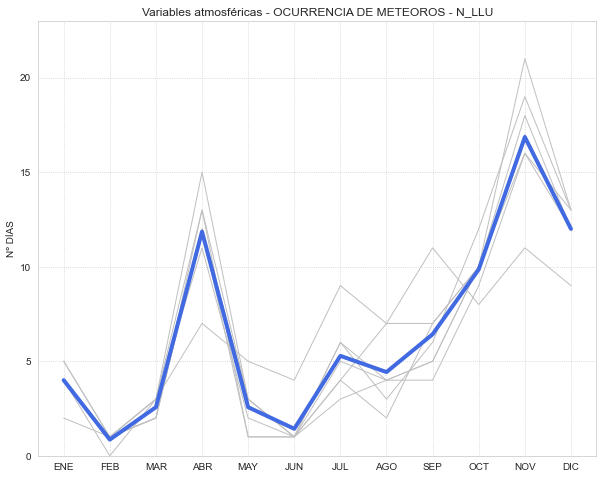

In [151]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z0 = list(meteor_all.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
z1 = list(meteor_all.iloc[1, 2:-2])  #MADRID/BARAJAS
z2 = list(meteor_all.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
z3 = list(meteor_all.iloc[3, 2:-2])  #MADRID/GETAFE	
z4 = list(meteor_all.iloc[4, 2:-2])  #MADRID,RETIRO
z5 = list(meteor_all.iloc[5, 2:-2])  #MADRID/TORREJÓN
z6 = list(meteor_all.iloc[6, 2:-2])  #NAVACERRADA,PUERTO
ymedia = N_LLU[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_LLU");

plt.plot(meses, z0, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z1, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z2, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z3, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z4, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, z5, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z6, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(0,23);

#### gráfico N_NIE

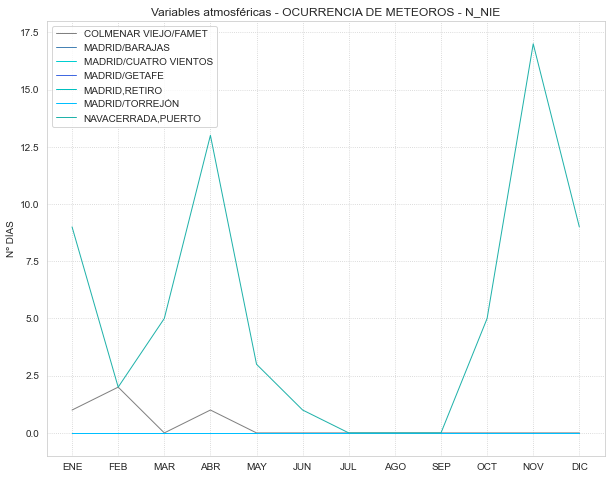

In [152]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z7 = list(meteor_all.iloc[7, 2:-2])  #COLMENAR VIEJO/FAMET
z8 = list(meteor_all.iloc[8, 2:-2])  #MADRID/BARAJAS
z9 = list(meteor_all.iloc[9, 2:-2])  #MADRID/CUATRO VIENTOS
z10 = list(meteor_all.iloc[10, 2:-2])  #MADRID/GETAFE	
z11 = list(meteor_all.iloc[11, 2:-2])  #MADRID,RETIRO
z12 = list(meteor_all.iloc[12, 2:-2])  #MADRID/TORREJÓN
z13 = list(meteor_all.iloc[13, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_NIE");

plt.plot(meses, z7, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, z8, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, z9, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, z10, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, z11, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, z12, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, z13, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(-1,18);
plt.legend(loc="upper left");

In [153]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
ocurr_N_NIE = meteor_all[meteor_all["Tipo"]== "N_NIE"]
N_NIE = list(ocurr_N_NIE.mean())
N_NIE[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[1.4285714285714286,
 0.5714285714285714,
 0.7142857142857143,
 2.0,
 0.42857142857142855,
 0.14285714285714285,
 0.0,
 0.0,
 0.0,
 0.7142857142857143,
 2.4285714285714284,
 1.2857142857142858]

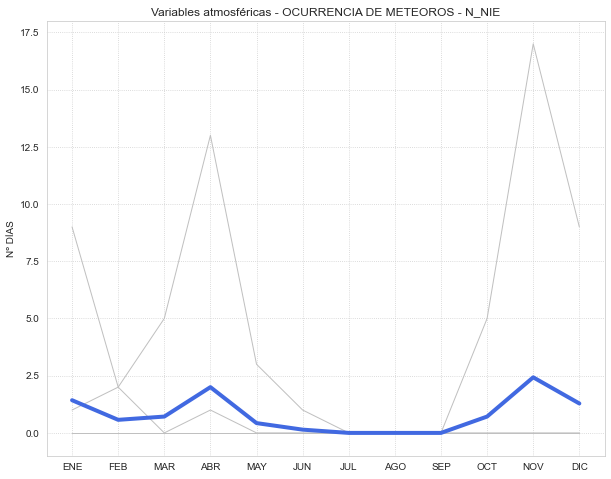

In [154]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z7 = list(meteor_all.iloc[7, 2:-2])  #COLMENAR VIEJO/FAMET
z8 = list(meteor_all.iloc[8, 2:-2])  #MADRID/BARAJAS
z9 = list(meteor_all.iloc[9, 2:-2])  #MADRID/CUATRO VIENTOS
z10 = list(meteor_all.iloc[10, 2:-2])  #MADRID/GETAFE	
z11 = list(meteor_all.iloc[11, 2:-2])  #MADRID,RETIRO
z12 = list(meteor_all.iloc[12, 2:-2])  #MADRID/TORREJÓN
z13 = list(meteor_all.iloc[13, 2:-2])  #NAVACERRADA,PUERTO
ymedia = N_NIE[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_NIE");

plt.plot(meses, z7, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z8, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z9, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z10, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z11, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, z12, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z13, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(-1,18);

#### gráfico N_GRA

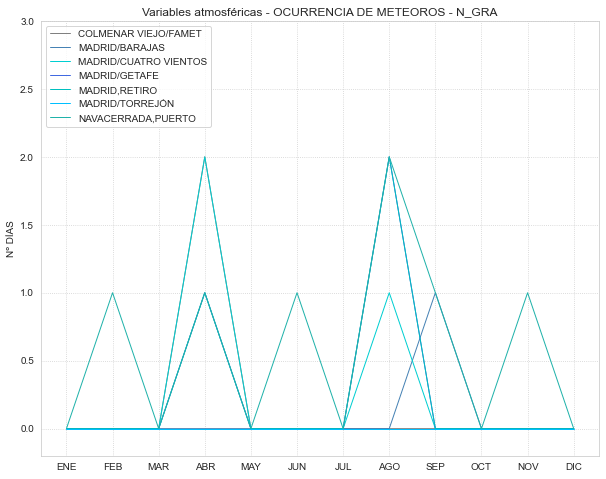

In [155]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z14 = list(meteor_all.iloc[14, 2:-2])  #COLMENAR VIEJO/FAMET
z15 = list(meteor_all.iloc[15, 2:-2])  #MADRID/BARAJAS
z16 = list(meteor_all.iloc[16, 2:-2])  #MADRID/CUATRO VIENTOS
z17 = list(meteor_all.iloc[17, 2:-2])  #MADRID/GETAFE	
z18 = list(meteor_all.iloc[18, 2:-2])  #MADRID,RETIRO
z19 = list(meteor_all.iloc[19, 2:-2])  #MADRID/TORREJÓN
z20 = list(meteor_all.iloc[20, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_GRA");

plt.plot(meses, z14, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, z15, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, z16, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, z17, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, z18, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, z19, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, z20, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(-0.2,3);
plt.legend(loc="upper left");

In [156]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
ocurr_N_GRA = meteor_all[meteor_all["Tipo"]== "N_GRA"]
N_GRA = list(ocurr_N_GRA.mean())
N_GRA[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[0.0,
 0.14285714285714285,
 0.0,
 1.0,
 0.0,
 0.14285714285714285,
 0.0,
 1.0,
 0.2857142857142857,
 0.0,
 0.14285714285714285,
 0.0]

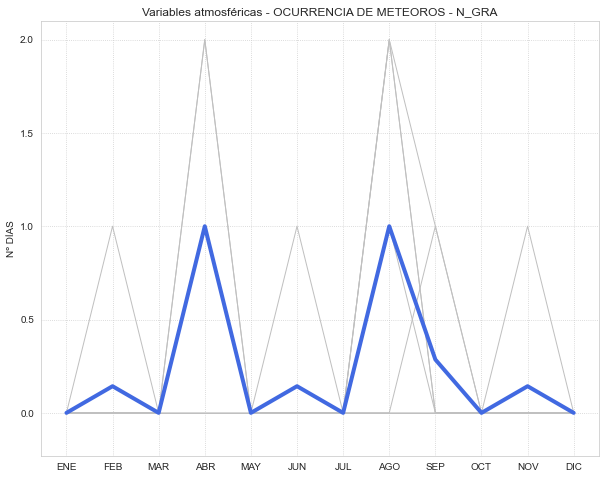

In [157]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z14 = list(meteor_all.iloc[14, 2:-2])  #COLMENAR VIEJO/FAMET
z15 = list(meteor_all.iloc[15, 2:-2])  #MADRID/BARAJAS
z16 = list(meteor_all.iloc[16, 2:-2])  #MADRID/CUATRO VIENTOS
z17 = list(meteor_all.iloc[17, 2:-2])  #MADRID/GETAFE	
z18 = list(meteor_all.iloc[18, 2:-2])  #MADRID,RETIRO
z19 = list(meteor_all.iloc[19, 2:-2])  #MADRID/TORREJÓN
z20 = list(meteor_all.iloc[20, 2:-2])  #NAVACERRADA,PUERTO
ymedia = N_GRA[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_GRA");

plt.plot(meses, z14, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z15, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z16, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z17, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z18, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, z19, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z20, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(-0.23);

#### gráfico N_TOR

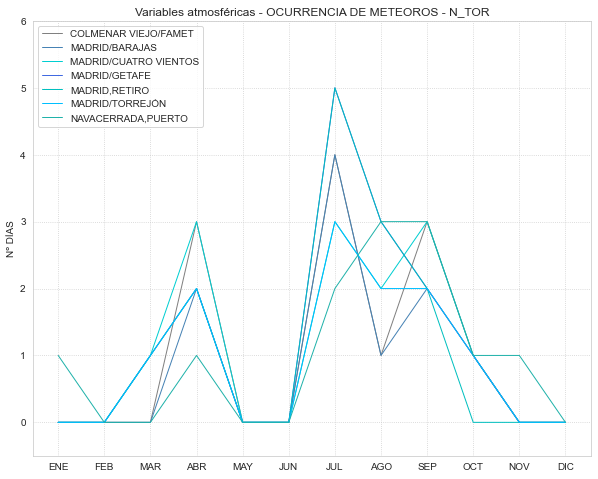

In [158]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z21= list(meteor_all.iloc[21, 2:-2])  #COLMENAR VIEJO/FAMET
z22 = list(meteor_all.iloc[22, 2:-2])  #MADRID/BARAJAS
z23 = list(meteor_all.iloc[23, 2:-2])  #MADRID/CUATRO VIENTOS
z24 = list(meteor_all.iloc[24, 2:-2])  #MADRID/GETAFE	
z25 = list(meteor_all.iloc[25, 2:-2])  #MADRID,RETIRO
z26 = list(meteor_all.iloc[26, 2:-2])  #MADRID/TORREJÓN
z27 = list(meteor_all.iloc[27, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_TOR");

plt.plot(meses, z21, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, z22, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, z23, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, z24, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, z25, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, z26, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, z27, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(-0.5,6);
plt.legend(loc="upper left");

In [159]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
ocurr_N_TOR = meteor_all[meteor_all["Tipo"]== "N_TOR"]
N_TOR = list(ocurr_N_TOR.mean())
N_TOR[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[0.14285714285714285,
 0.0,
 0.5714285714285714,
 2.142857142857143,
 0.0,
 0.0,
 3.7142857142857144,
 2.142857142857143,
 2.4285714285714284,
 0.8571428571428571,
 0.14285714285714285,
 0.0]

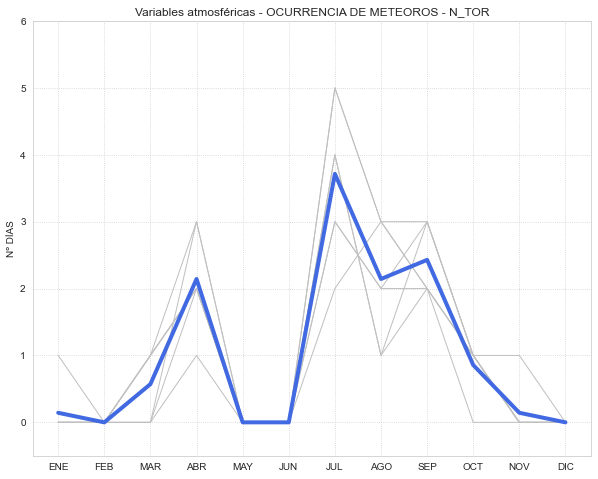

In [160]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z21= list(meteor_all.iloc[21, 2:-2])  #COLMENAR VIEJO/FAMET
z22 = list(meteor_all.iloc[22, 2:-2])  #MADRID/BARAJAS
z23 = list(meteor_all.iloc[23, 2:-2])  #MADRID/CUATRO VIENTOS
z24 = list(meteor_all.iloc[24, 2:-2])  #MADRID/GETAFE	
z25 = list(meteor_all.iloc[25, 2:-2])  #MADRID,RETIRO
z26 = list(meteor_all.iloc[26, 2:-2])  #MADRID/TORREJÓN
z27 = list(meteor_all.iloc[27, 2:-2])  #NAVACERRADA,PUERTO
ymedia = N_TOR[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_TOR");

plt.plot(meses, z21, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z22, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z23, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z24, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z25, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, z26, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z27, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(-0.5,6);

#### gráfico N_FOG

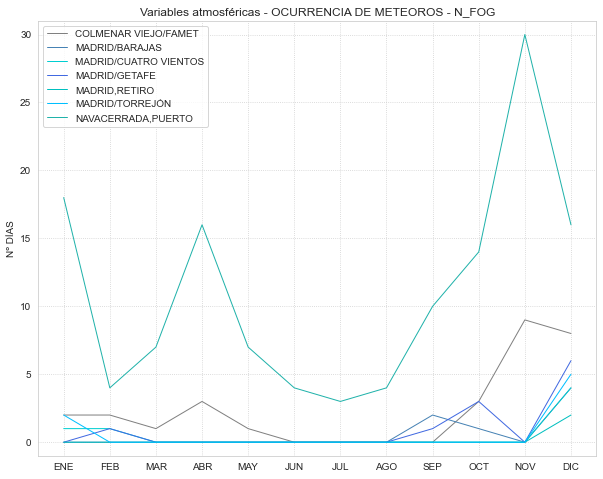

In [161]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z28= list(meteor_all.iloc[28, 2:-2])  #COLMENAR VIEJO/FAMET
z29 = list(meteor_all.iloc[29, 2:-2])  #MADRID/BARAJAS
z30 = list(meteor_all.iloc[30, 2:-2])  #MADRID/CUATRO VIENTOS
z31 = list(meteor_all.iloc[31, 2:-2])  #MADRID/GETAFE	
z32 = list(meteor_all.iloc[32, 2:-2])  #MADRID,RETIRO
z33 = list(meteor_all.iloc[33, 2:-2])  #MADRID/TORREJÓN
z34 = list(meteor_all.iloc[34, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_FOG");

plt.plot(meses, z28, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, z29, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, z30, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, z31, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, z32, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, z33, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, z34, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(-1,31);
plt.legend(loc="upper left");

In [162]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
ocurr_N_FOG = meteor_all[meteor_all["Tipo"]== "N_FOG"]
N_FOG = list(ocurr_N_FOG.mean())
N_FOG[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[3.2857142857142856,
 1.1428571428571428,
 1.1428571428571428,
 2.7142857142857144,
 1.1428571428571428,
 0.5714285714285714,
 0.42857142857142855,
 0.5714285714285714,
 1.8571428571428572,
 3.0,
 5.571428571428571,
 6.428571428571429]

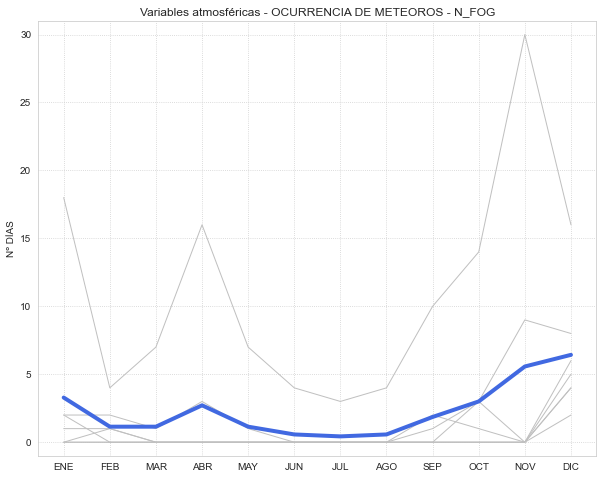

In [163]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z28= list(meteor_all.iloc[28, 2:-2])  #COLMENAR VIEJO/FAMET
z29 = list(meteor_all.iloc[29, 2:-2])  #MADRID/BARAJAS
z30 = list(meteor_all.iloc[30, 2:-2])  #MADRID/CUATRO VIENTOS
z31 = list(meteor_all.iloc[31, 2:-2])  #MADRID/GETAFE	
z32 = list(meteor_all.iloc[32, 2:-2])  #MADRID,RETIRO
z33 = list(meteor_all.iloc[33, 2:-2])  #MADRID/TORREJÓN
z34 = list(meteor_all.iloc[34, 2:-2])  #NAVACERRADA,PUERTO
ymedia = N_FOG[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_FOG");

plt.plot(meses, z28, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z29, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z30, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z31, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z32, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, z33, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z34, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(-1,31);

#### gráfico N_DES

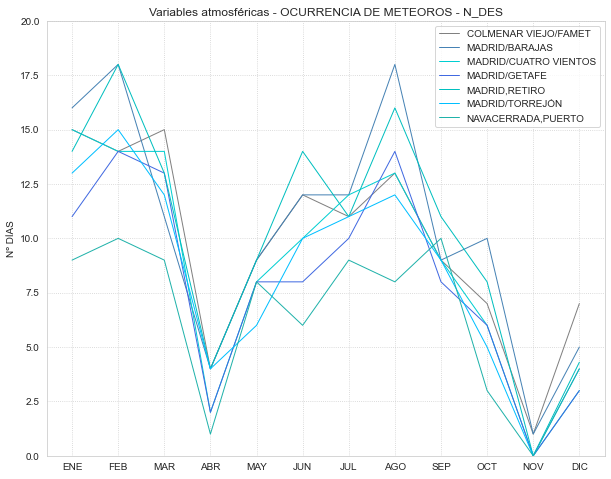

In [164]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z35 = list(meteor_all.iloc[35, 2:-2])  #COLMENAR VIEJO/FAMET
z36 = list(meteor_all.iloc[36, 2:-2])  #MADRID/BARAJAS
z37 = list(meteor_all.iloc[37, 2:-2])  #MADRID/CUATRO VIENTOS
z38 = list(meteor_all.iloc[38, 2:-2])  #MADRID/GETAFE	
z39 = list(meteor_all.iloc[39, 2:-2])  #MADRID,RETIRO
z40 = list(meteor_all.iloc[40, 2:-2])  #MADRID/TORREJÓN
z41 = list(meteor_all.iloc[41, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_DES");

plt.plot(meses, z35, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, z36, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, z37, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, z38, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, z39, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, z40, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, z41, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,20);
plt.legend(loc="upper right");

In [165]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
ocurr_N_DES = meteor_all[meteor_all["Tipo"]== "N_DES"]
N_DES = list(ocurr_N_DES.mean())
N_DES[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[13.285714285714286,
 14.714285714285714,
 12.428571428571429,
 3.0,
 8.142857142857142,
 10.285714285714286,
 10.857142857142858,
 13.428571428571429,
 9.285714285714286,
 6.428571428571429,
 0.2857142857142857,
 4.328571428571428]

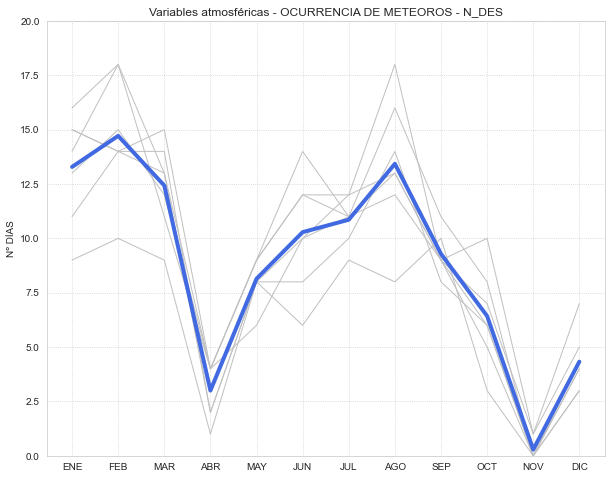

In [166]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z35 = list(meteor_all.iloc[35, 2:-2])  #COLMENAR VIEJO/FAMET
z36 = list(meteor_all.iloc[36, 2:-2])  #MADRID/BARAJAS
z37 = list(meteor_all.iloc[37, 2:-2])  #MADRID/CUATRO VIENTOS
z38 = list(meteor_all.iloc[38, 2:-2])  #MADRID/GETAFE	
z39 = list(meteor_all.iloc[39, 2:-2])  #MADRID,RETIRO
z40 = list(meteor_all.iloc[40, 2:-2])  #MADRID/TORREJÓN
z41 = list(meteor_all.iloc[41, 2:-2])  #NAVACERRADA,PUERTO
ymedia = N_DES[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_DES");

plt.plot(meses, z35, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z36, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z37, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z38, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z39, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, z40, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z41, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(0,20);

#### gráfico N_NUB

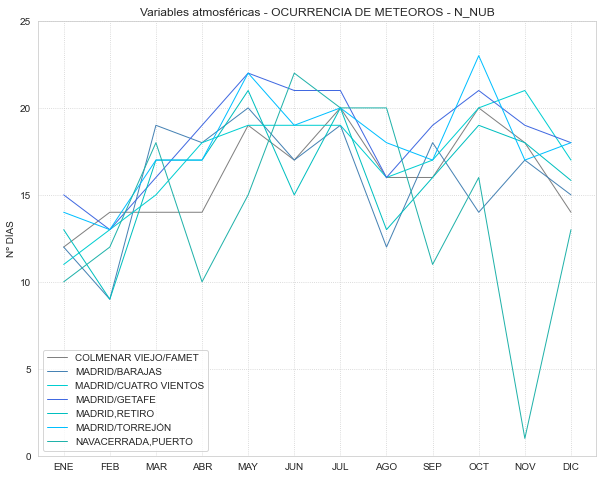

In [167]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z42= list(meteor_all.iloc[42, 2:-2])  #COLMENAR VIEJO/FAMET
z43 = list(meteor_all.iloc[43, 2:-2])  #MADRID/BARAJAS
z44 = list(meteor_all.iloc[44, 2:-2])  #MADRID/CUATRO VIENTOS
z45 = list(meteor_all.iloc[45, 2:-2])  #MADRID/GETAFE	
z46 = list(meteor_all.iloc[46, 2:-2])  #MADRID,RETIRO
z47 = list(meteor_all.iloc[47, 2:-2])  #MADRID/TORREJÓN
z48 = list(meteor_all.iloc[48, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_NUB");

plt.plot(meses, z42, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, z43, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, z44, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, z45, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, z46, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, z47, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, z48, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,25);
plt.legend(loc="lower left");

In [168]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
ocurr_N_NUB = meteor_all[meteor_all["Tipo"]== "N_NUB"]
N_NUB = list(ocurr_N_NUB.mean())
N_NUB[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[12.428571428571429,
 11.857142857142858,
 16.571428571428573,
 16.142857142857142,
 19.714285714285715,
 18.571428571428573,
 19.857142857142858,
 15.857142857142858,
 16.285714285714285,
 19.0,
 15.857142857142858,
 15.832857142857142]

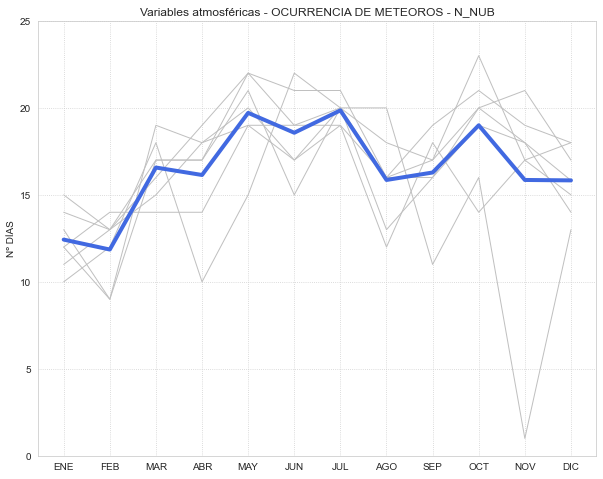

In [169]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z42= list(meteor_all.iloc[42, 2:-2])  #COLMENAR VIEJO/FAMET
z43 = list(meteor_all.iloc[43, 2:-2])  #MADRID/BARAJAS
z44 = list(meteor_all.iloc[44, 2:-2])  #MADRID/CUATRO VIENTOS
z45 = list(meteor_all.iloc[45, 2:-2])  #MADRID/GETAFE	
z46 = list(meteor_all.iloc[46, 2:-2])  #MADRID,RETIRO
z47 = list(meteor_all.iloc[47, 2:-2])  #MADRID/TORREJÓN
z48 = list(meteor_all.iloc[48, 2:-2])  #NAVACERRADA,PUERTO
ymedia = N_NUB[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_NUB");

plt.plot(meses, z42, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z43, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z44, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z45, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z46, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, z47, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z48, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(0,25);

#### gráfico N_CUB

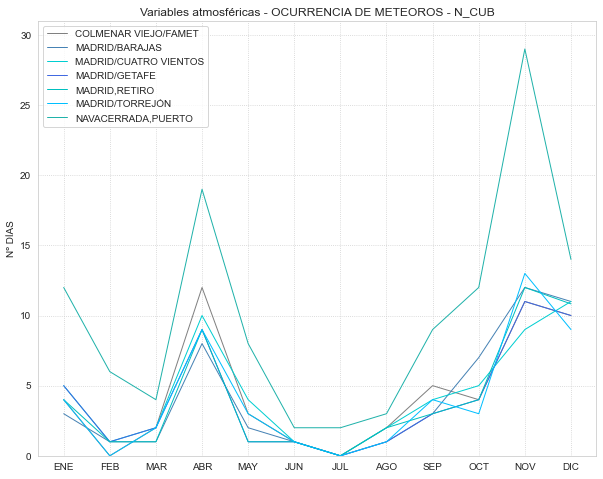

In [170]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z49= list(meteor_all.iloc[49, 2:-2])  #COLMENAR VIEJO/FAMET
z50 = list(meteor_all.iloc[50, 2:-2])  #MADRID/BARAJAS
z51 = list(meteor_all.iloc[51, 2:-2])  #MADRID/CUATRO VIENTOS
z52 = list(meteor_all.iloc[52, 2:-2])  #MADRID/GETAFE	
z53 = list(meteor_all.iloc[53, 2:-2])  #MADRID,RETIRO
z54 = list(meteor_all.iloc[54, 2:-2])  #MADRID/TORREJÓN
z55 = list(meteor_all.iloc[55, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_CUB");

plt.plot(meses, z49, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, z50, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, z51, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, z52, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, z53, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, z54, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, z55, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,31);
plt.legend(loc="upper left");

In [171]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
ocurr_N_CUB = meteor_all[meteor_all["Tipo"]== "N_CUB"]
N_CUB = list(ocurr_N_CUB.mean())
N_CUB[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[5.285714285714286,
 1.4285714285714286,
 2.0,
 10.857142857142858,
 3.142857142857143,
 1.1428571428571428,
 0.2857142857142857,
 1.7142857142857142,
 4.428571428571429,
 5.571428571428571,
 13.857142857142858,
 10.832857142857142]

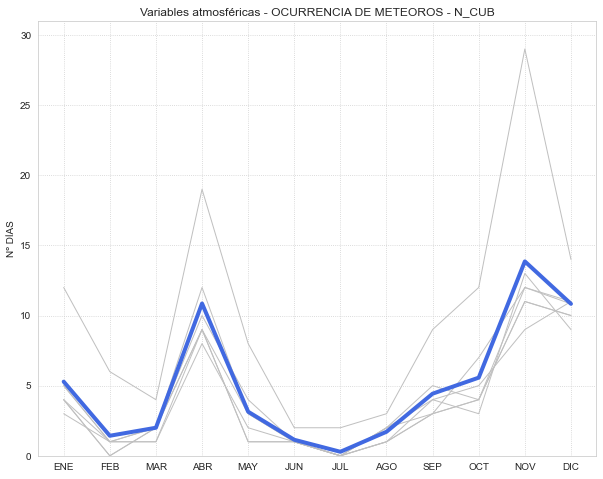

In [172]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(meteor_all.columns.values)[2:-2]
z49= list(meteor_all.iloc[49, 2:-2])  #COLMENAR VIEJO/FAMET
z50 = list(meteor_all.iloc[50, 2:-2])  #MADRID/BARAJAS
z51 = list(meteor_all.iloc[51, 2:-2])  #MADRID/CUATRO VIENTOS
z52 = list(meteor_all.iloc[52, 2:-2])  #MADRID/GETAFE	
z53 = list(meteor_all.iloc[53, 2:-2])  #MADRID,RETIRO
z54 = list(meteor_all.iloc[54, 2:-2])  #MADRID/TORREJÓN
z55 = list(meteor_all.iloc[55, 2:-2])  #NAVACERRADA,PUERTO
ymedia = N_CUB[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - OCURRENCIA DE METEOROS - N_CUB");

plt.plot(meses, z49, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z50, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z51, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z52, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z53, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, z54, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, z55, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(0,31);

## 2.4 Mensuales climatologico 2019 - Humedad: 

#### Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...

In [173]:
## Mensuales climatologico 2019 - Humedad
##  HR   Humedad relativa media mensual/anual (%)

### cargo el df entero:
HR_2019 = pd.read_csv(csv_folder + "\\HR_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
HR_2019_mad = pd.merge(ind_mad, HR_2019, how= "inner", on=["Indicativo"])
HR_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   62.0     58.0   48.0   64.0  45.0   
1       3129         MADRID/BARAJAS   64.0     59.0   47.0   56.0  37.0   
2       3196  MADRID/CUATRO VIENTOS   64.0     57.0   47.0   58.0  40.0   
3       3200          MADRID/GETAFE   63.0      NaN   45.0   58.0  40.0   
4       3195          MADRID,RETIRO    NaN      NaN   47.0   57.0  45.0   
5       3175        MADRID/TORREJÓN   67.0     59.0   48.0   61.0  39.0   
6       2462     NAVACERRADA,PUERTO   68.0     61.0   60.0   80.0  54.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0   36.0   35.0    40.0        51.0     64.0        NaN       76.0    NaN  
1   28.0   28.0    33.0        50.0     62.0        NaN       78.0    NaN  
2   33.0   31.0     NaN        52.0      NaN        NaN       77.0    NaN  
3   32.0   31.0     NaN        49.0     61.0        NaN       78.0    NaN  
4   40.0    NaN    35.0        43.0      NaN       67.0       67.0    NaN  
5   29.0   29.0    35.0        52.0     66.0       77.0       82.0   54.0  
6   45.0   41.0    44.0        60.0     74.0       99.0        NaN    NaN

In [174]:
## borro la columna "anual", no me interesa. Esta sí tendria valores medio pero al haber NaN no los hace , asi qeu la tendré que volver a poner como con el resto
HR_2019_mad.drop("anual", inplace=True, axis=1)
HR_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   62.0     58.0   48.0   64.0  45.0   
1       3129         MADRID/BARAJAS   64.0     59.0   47.0   56.0  37.0   
2       3196  MADRID/CUATRO VIENTOS   64.0     57.0   47.0   58.0  40.0   
3       3200          MADRID/GETAFE   63.0      NaN   45.0   58.0  40.0   
4       3195          MADRID,RETIRO    NaN      NaN   47.0   57.0  45.0   
5       3175        MADRID/TORREJÓN   67.0     59.0   48.0   61.0  39.0   
6       2462     NAVACERRADA,PUERTO   68.0     61.0   60.0   80.0  54.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0   36.0   35.0    40.0        51.0     64.0        NaN       76.0  
1   28.0   28.0    33.0        50.0     62.0        NaN       78.0  
2   33.0   31.0     NaN        52.0      NaN        NaN       77.0  
3   32.0   31.0     NaN        49.0     61.0        NaN       78.0  
4   40.0    NaN    35.0        43.0      NaN       67.0       67.0  
5   29.0   29.0    35.0        52.0     66.0       77.0       82.0  
6   45.0   41.0    44.0        60.0     74.0       99.0        NaN

In [175]:
HR_2019_mad.info()  ## hay varios Nan, los llenaré con valores medio de cada columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Indicativo  7 non-null      object 
 1   NOMBRE      7 non-null      object 
 2   enero       6 non-null      float64
 3   febrero     5 non-null      float64
 4   marzo       7 non-null      float64
 5   abril       7 non-null      float64
 6   mayo        7 non-null      float64
 7   junio       7 non-null      float64
 8   julio       6 non-null      float64
 9   agosto      5 non-null      float64
 10  septiembre  7 non-null      float64
 11  octubre     5 non-null      float64
 12  noviembre   3 non-null      float64
 13  diciembre   6 non-null      float64
dtypes: float64(12), object(2)
memory usage: 840.0+ bytes


In [176]:
HR_2019_mad.describe()
###Medias filas:
## enero  64.6
## febrero  58.8
## julio    32.5
## octubre    65.4
## noviembre    81.0
## diciembre   76.3

enero   febrero      marzo      abril       mayo      junio  \
count   6.000000   5.00000   7.000000   7.000000   7.000000   7.000000   
mean   64.666667  58.80000  48.857143  62.000000  42.857143  34.714286   
std     2.338090   1.48324   5.014265   8.386497   5.756983   6.102302   
min    62.000000  57.00000  45.000000  56.000000  37.000000  28.000000   
25%    63.250000  58.00000  47.000000  57.500000  39.500000  30.500000   
50%    64.000000  59.00000  47.000000  58.000000  40.000000  33.000000   
75%    66.250000  59.00000  48.000000  62.500000  45.000000  38.000000   
max    68.000000  61.00000  60.000000  80.000000  54.000000  45.000000   

           julio     agosto  septiembre    octubre  noviembre  diciembre  
count   6.000000   5.000000    7.000000   5.000000   3.000000   6.000000  
mean   32.500000  37.400000   51.000000  65.400000  81.000000  76.333333  
std     4.806246   4.505552    5.033223   5.176872  16.370706   5.006662  
min    28.000000  33.000000   43.000000  61.000000  67.000000  67.000000  
25%    29.500000  35.000000   49.500000  62.000000  72.000000  76.250000  
50%    31.000000  35.000000   51.000000  64.000000  77.000000  77.500000  
75%    34.000000  40.000000   52.000000  66.000000  88.000000  78.000000  
max    41.000000  44.000000   60.000000  74.000000  99.000000  82.000000

In [177]:
HR_2019_mad["enero"].fillna(64.6, inplace=True)  
HR_2019_mad

HR_2019_mad["febrero"].fillna(58.8, inplace=True)  
HR_2019_mad

HR_2019_mad["julio"].fillna(32.5, inplace=True)  
HR_2019_mad

HR_2019_mad["agosto"].fillna(37.4, inplace=True)  
HR_2019_mad

HR_2019_mad["octubre"].fillna(65.4, inplace=True)  
HR_2019_mad

HR_2019_mad["noviembre"].fillna(81.0, inplace=True)  
HR_2019_mad

HR_2019_mad["diciembre"].fillna(76.3, inplace=True)  
HR_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   62.0     58.0   48.0   64.0  45.0   
1       3129         MADRID/BARAJAS   64.0     59.0   47.0   56.0  37.0   
2       3196  MADRID/CUATRO VIENTOS   64.0     57.0   47.0   58.0  40.0   
3       3200          MADRID/GETAFE   63.0     58.8   45.0   58.0  40.0   
4       3195          MADRID,RETIRO   64.6     58.8   47.0   57.0  45.0   
5       3175        MADRID/TORREJÓN   67.0     59.0   48.0   61.0  39.0   
6       2462     NAVACERRADA,PUERTO   68.0     61.0   60.0   80.0  54.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0   36.0   35.0    40.0        51.0     64.0       81.0       76.0  
1   28.0   28.0    33.0        50.0     62.0       81.0       78.0  
2   33.0   31.0    37.4        52.0     65.4       81.0       77.0  
3   32.0   31.0    37.4        49.0     61.0       81.0       78.0  
4   40.0   32.5    35.0        43.0     65.4       67.0       67.0  
5   29.0   29.0    35.0        52.0     66.0       77.0       82.0  
6   45.0   41.0    44.0        60.0     74.0       99.0       76.3

In [178]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

HR_2019_mad.loc[:,"media anual"] = round(HR_2019_mad.mean(axis=1),2)
HR_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   62.0     58.0   48.0   64.0  45.0   
1       3129         MADRID/BARAJAS   64.0     59.0   47.0   56.0  37.0   
2       3196  MADRID/CUATRO VIENTOS   64.0     57.0   47.0   58.0  40.0   
3       3200          MADRID/GETAFE   63.0     58.8   45.0   58.0  40.0   
4       3195          MADRID,RETIRO   64.6     58.8   47.0   57.0  45.0   
5       3175        MADRID/TORREJÓN   67.0     59.0   48.0   61.0  39.0   
6       2462     NAVACERRADA,PUERTO   68.0     61.0   60.0   80.0  54.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   36.0   35.0    40.0        51.0     64.0       81.0       76.0   
1   28.0   28.0    33.0        50.0     62.0       81.0       78.0   
2   33.0   31.0    37.4        52.0     65.4       81.0       77.0   
3   32.0   31.0    37.4        49.0     61.0       81.0       78.0   
4   40.0   32.5    35.0        43.0     65.4       67.0       67.0   
5   29.0   29.0    35.0        52.0     66.0       77.0       82.0   
6   45.0   41.0    44.0        60.0     74.0       99.0       76.3   

   media anual  
0        55.00  
1        51.92  
2        53.57  
3        52.85  
4        51.86  
5        53.67  
6        63.52

In [179]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
HR_2019_mad["Tipo"] = "HR"
HR_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   62.0     58.0   48.0   64.0  45.0   
1       3129         MADRID/BARAJAS   64.0     59.0   47.0   56.0  37.0   
2       3196  MADRID/CUATRO VIENTOS   64.0     57.0   47.0   58.0  40.0   
3       3200          MADRID/GETAFE   63.0     58.8   45.0   58.0  40.0   
4       3195          MADRID,RETIRO   64.6     58.8   47.0   57.0  45.0   
5       3175        MADRID/TORREJÓN   67.0     59.0   48.0   61.0  39.0   
6       2462     NAVACERRADA,PUERTO   68.0     61.0   60.0   80.0  54.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   36.0   35.0    40.0        51.0     64.0       81.0       76.0   
1   28.0   28.0    33.0        50.0     62.0       81.0       78.0   
2   33.0   31.0    37.4        52.0     65.4       81.0       77.0   
3   32.0   31.0    37.4        49.0     61.0       81.0       78.0   
4   40.0   32.5    35.0        43.0     65.4       67.0       67.0   
5   29.0   29.0    35.0        52.0     66.0       77.0       82.0   
6   45.0   41.0    44.0        60.0     74.0       99.0       76.3   

   media anual Tipo  
0        55.00   HR  
1        51.92   HR  
2        53.57   HR  
3        52.85   HR  
4        51.86   HR  
5        53.67   HR  
6        63.52   HR

In [180]:
## Renombro los meses para que salgan mejor en los gráficos
HR_2019_mad.columns = ["Indicativo", "NOMBRE", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC", "media anual", "Tipo"]
pd.DataFrame(HR_2019_mad)

Indicativo                 NOMBRE   ENE   FEB   MAR   ABR   MAY   JUN   JUL  \
0      3191E   COLMENAR VIEJO/FAMET  62.0  58.0  48.0  64.0  45.0  36.0  35.0   
1       3129         MADRID/BARAJAS  64.0  59.0  47.0  56.0  37.0  28.0  28.0   
2       3196  MADRID/CUATRO VIENTOS  64.0  57.0  47.0  58.0  40.0  33.0  31.0   
3       3200          MADRID/GETAFE  63.0  58.8  45.0  58.0  40.0  32.0  31.0   
4       3195          MADRID,RETIRO  64.6  58.8  47.0  57.0  45.0  40.0  32.5   
5       3175        MADRID/TORREJÓN  67.0  59.0  48.0  61.0  39.0  29.0  29.0   
6       2462     NAVACERRADA,PUERTO  68.0  61.0  60.0  80.0  54.0  45.0  41.0   

    AGO   SEP   OCT   NOV   DIC  media anual Tipo  
0  40.0  51.0  64.0  81.0  76.0        55.00   HR  
1  33.0  50.0  62.0  81.0  78.0        51.92   HR  
2  37.4  52.0  65.4  81.0  77.0        53.57   HR  
3  37.4  49.0  61.0  81.0  78.0        52.85   HR  
4  35.0  43.0  65.4  67.0  67.0        51.86   HR  
5  35.0  52.0  66.0  77.0  82.0        53.67   HR  
6  44.0  60.0  74.0  99.0  76.3        63.52   HR

In [181]:
##guardo el dataframe
HR_2019_mad.to_csv("HR_2019_mad.csv", index=False)

#### Grafico HR

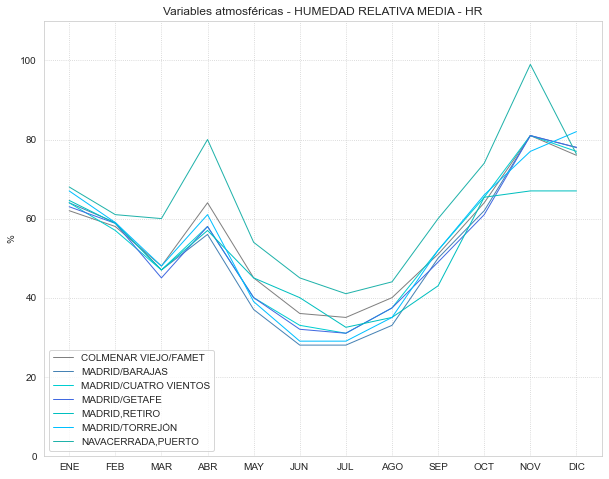

In [182]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(HR_2019_mad.columns.values)[2:-2]
j0= list(HR_2019_mad.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
j1 = list(HR_2019_mad.iloc[1, 2:-2])  #MADRID/BARAJAS
j2 = list(HR_2019_mad.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
j3 = list(HR_2019_mad.iloc[3, 2:-2])  #MADRID/GETAFE	
j4 = list(HR_2019_mad.iloc[4, 2:-2])  #MADRID,RETIRO
j5 = list(HR_2019_mad.iloc[5, 2:-2])  #MADRID/TORREJÓN
j6 = list(HR_2019_mad.iloc[6, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("%")
ax.set_title("Variables atmosféricas - HUMEDAD RELATIVA MEDIA - HR");

plt.plot(meses, j0, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, j1, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, j2, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, j3, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, j4, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, j5, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, j6, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,110);
plt.legend(loc="lower left");

In [183]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
humed_HR = HR_2019_mad[HR_2019_mad["Tipo"]== "HR"]
HR = list(humed_HR.mean())
HR[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[64.65714285714286,
 58.800000000000004,
 48.857142857142854,
 62.0,
 42.857142857142854,
 34.714285714285715,
 32.5,
 37.4,
 51.0,
 65.4,
 81.0,
 76.32857142857142]

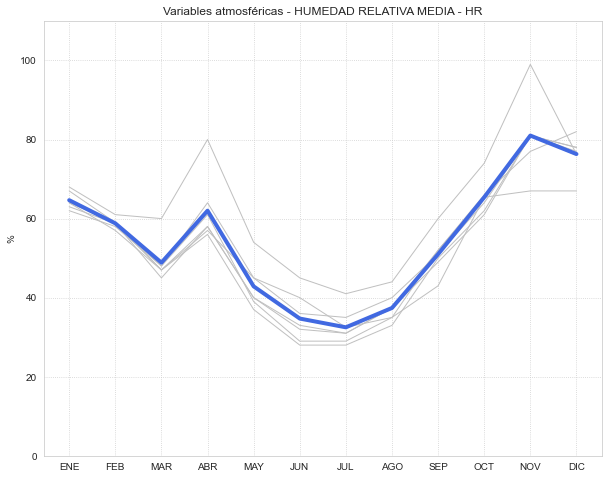

In [184]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(HR_2019_mad.columns.values)[2:-2]
j0= list(HR_2019_mad.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
j1 = list(HR_2019_mad.iloc[1, 2:-2])  #MADRID/BARAJAS
j2 = list(HR_2019_mad.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
j3 = list(HR_2019_mad.iloc[3, 2:-2])  #MADRID/GETAFE	
j4 = list(HR_2019_mad.iloc[4, 2:-2])  #MADRID,RETIRO
j5 = list(HR_2019_mad.iloc[5, 2:-2])  #MADRID/TORREJÓN
j6 = list(HR_2019_mad.iloc[6, 2:-2])  #NAVACERRADA,PUERTO
ymedia = HR[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("%")
ax.set_title("Variables atmosféricas - HUMEDAD RELATIVA MEDIA - HR");

plt.plot(meses, j0, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, j1, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, j2, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, j3, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, j4, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, j5, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, j6, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(0,110);

#### Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...

In [185]:
## Mensuales climatologico 2019 - Humedad
##  E_   Tensión de vapor media mensual/anual (décimas hPa)

### cargo el df entero:
E_2019 = pd.read_csv(csv_folder + "\\E_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
E_2019_mad = pd.merge(ind_mad, E_2019, how= "inner", on=["Indicativo"])
E_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril   mayo  \
0      3191E   COLMENAR VIEJO/FAMET   60.0     62.0   61.0   78.0   87.0   
1       3129         MADRID/BARAJAS   59.0     61.0   63.0   82.0   84.0   
2       3196  MADRID/CUATRO VIENTOS   64.0     66.0   66.0   84.0   91.0   
3       3200          MADRID/GETAFE   63.0      NaN   64.0   85.0   92.0   
4       3195          MADRID,RETIRO   57.0     61.0   69.0   82.0  101.0   
5       3175        MADRID/TORREJÓN   60.0     61.0   63.0   86.0   85.0   
6       2462     NAVACERRADA,PUERTO   40.0     45.0   48.0   62.0   66.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0   92.0  117.0   122.0       114.0    107.0        NaN       79.0    NaN  
1   88.0  111.0   113.0       123.0    112.0       91.0       87.0   90.0  
2  101.0  118.0   125.0       128.0    117.0       92.0       88.0   95.0  
3   96.0  122.0     NaN       126.0    115.0        NaN       90.0    NaN  
4  126.0    NaN   118.0       107.0    104.0       83.0       75.0    NaN  
5   89.0  113.0   115.0       128.0    118.0       98.0       89.0   92.0  
6   73.0   91.0    89.0        90.0     85.0       66.0        NaN    NaN

In [186]:
## borro la columna "anual", no me interesa. Esta sí tendria valores medio pero al haber NaN no los hace , asi qeu la tendré que volver a poner como con el resto
E_2019_mad.drop("anual", inplace=True, axis=1)
E_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril   mayo  \
0      3191E   COLMENAR VIEJO/FAMET   60.0     62.0   61.0   78.0   87.0   
1       3129         MADRID/BARAJAS   59.0     61.0   63.0   82.0   84.0   
2       3196  MADRID/CUATRO VIENTOS   64.0     66.0   66.0   84.0   91.0   
3       3200          MADRID/GETAFE   63.0      NaN   64.0   85.0   92.0   
4       3195          MADRID,RETIRO   57.0     61.0   69.0   82.0  101.0   
5       3175        MADRID/TORREJÓN   60.0     61.0   63.0   86.0   85.0   
6       2462     NAVACERRADA,PUERTO   40.0     45.0   48.0   62.0   66.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0   92.0  117.0   122.0       114.0    107.0        NaN       79.0  
1   88.0  111.0   113.0       123.0    112.0       91.0       87.0  
2  101.0  118.0   125.0       128.0    117.0       92.0       88.0  
3   96.0  122.0     NaN       126.0    115.0        NaN       90.0  
4  126.0    NaN   118.0       107.0    104.0       83.0       75.0  
5   89.0  113.0   115.0       128.0    118.0       98.0       89.0  
6   73.0   91.0    89.0        90.0     85.0       66.0        NaN

In [187]:
E_2019_mad.info()     ## hay varios Nan, los llenaré con valores medio de cada columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Indicativo  7 non-null      object 
 1   NOMBRE      7 non-null      object 
 2   enero       7 non-null      float64
 3   febrero     6 non-null      float64
 4   marzo       7 non-null      float64
 5   abril       7 non-null      float64
 6   mayo        7 non-null      float64
 7   junio       7 non-null      float64
 8   julio       6 non-null      float64
 9   agosto      6 non-null      float64
 10  septiembre  7 non-null      float64
 11  octubre     7 non-null      float64
 12  noviembre   5 non-null      float64
 13  diciembre   6 non-null      float64
dtypes: float64(12), object(2)
memory usage: 840.0+ bytes


In [188]:
E_2019_mad.describe() 
###Medias filas:
## febrero  59.3
## julio    112.0
## agosto    113.6
## noviembre    86.0
## diciembre   84.6

enero    febrero      marzo      abril        mayo       junio  \
count   7.000000   6.000000   7.000000   7.000000    7.000000    7.000000   
mean   57.571429  59.333333  62.000000  79.857143   86.571429   95.000000   
std     8.100558   7.284687   6.683313   8.295151   10.721585   16.206994   
min    40.000000  45.000000  48.000000  62.000000   66.000000   73.000000   
25%    58.000000  61.000000  62.000000  80.000000   84.500000   88.500000   
50%    60.000000  61.000000  63.000000  82.000000   87.000000   92.000000   
75%    61.500000  61.750000  65.000000  84.500000   91.500000   98.500000   
max    64.000000  66.000000  69.000000  86.000000  101.000000  126.000000   

            julio      agosto  septiembre     octubre  noviembre  diciembre  
count    6.000000    6.000000    7.000000    7.000000   5.000000   6.000000  
mean   112.000000  113.666667  116.571429  108.285714  86.000000  84.666667  
std     10.990905   12.863385   14.116859   11.484980  12.389512   6.153590  
min     91.000000   89.000000   90.000000   85.000000  66.000000  75.000000  
25%    111.500000  113.500000  110.500000  105.500000  83.000000  81.000000  
50%    115.000000  116.500000  123.000000  112.000000  91.000000  87.500000  
75%    117.750000  121.000000  127.000000  116.000000  92.000000  88.750000  
max    122.000000  125.000000  128.000000  118.000000  98.000000  90.000000

In [189]:
E_2019_mad["febrero"].fillna(59.3, inplace=True) 
E_2019_mad

E_2019_mad["julio"].fillna(112.0, inplace=True)  
E_2019_mad

E_2019_mad["agosto"].fillna(113.6, inplace=True)  
E_2019_mad

E_2019_mad["noviembre"].fillna(86.0, inplace=True)  
E_2019_mad

E_2019_mad["diciembre"].fillna(84.6, inplace=True)  
E_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril   mayo  \
0      3191E   COLMENAR VIEJO/FAMET   60.0     62.0   61.0   78.0   87.0   
1       3129         MADRID/BARAJAS   59.0     61.0   63.0   82.0   84.0   
2       3196  MADRID/CUATRO VIENTOS   64.0     66.0   66.0   84.0   91.0   
3       3200          MADRID/GETAFE   63.0     59.3   64.0   85.0   92.0   
4       3195          MADRID,RETIRO   57.0     61.0   69.0   82.0  101.0   
5       3175        MADRID/TORREJÓN   60.0     61.0   63.0   86.0   85.0   
6       2462     NAVACERRADA,PUERTO   40.0     45.0   48.0   62.0   66.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0   92.0  117.0   122.0       114.0    107.0       86.0       79.0  
1   88.0  111.0   113.0       123.0    112.0       91.0       87.0  
2  101.0  118.0   125.0       128.0    117.0       92.0       88.0  
3   96.0  122.0   113.6       126.0    115.0       86.0       90.0  
4  126.0  112.0   118.0       107.0    104.0       83.0       75.0  
5   89.0  113.0   115.0       128.0    118.0       98.0       89.0  
6   73.0   91.0    89.0        90.0     85.0       66.0       84.6

In [190]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

E_2019_mad.loc[:,"media anual"] = round(E_2019_mad.mean(axis=1),2)
E_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril   mayo  \
0      3191E   COLMENAR VIEJO/FAMET   60.0     62.0   61.0   78.0   87.0   
1       3129         MADRID/BARAJAS   59.0     61.0   63.0   82.0   84.0   
2       3196  MADRID/CUATRO VIENTOS   64.0     66.0   66.0   84.0   91.0   
3       3200          MADRID/GETAFE   63.0     59.3   64.0   85.0   92.0   
4       3195          MADRID,RETIRO   57.0     61.0   69.0   82.0  101.0   
5       3175        MADRID/TORREJÓN   60.0     61.0   63.0   86.0   85.0   
6       2462     NAVACERRADA,PUERTO   40.0     45.0   48.0   62.0   66.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   92.0  117.0   122.0       114.0    107.0       86.0       79.0   
1   88.0  111.0   113.0       123.0    112.0       91.0       87.0   
2  101.0  118.0   125.0       128.0    117.0       92.0       88.0   
3   96.0  122.0   113.6       126.0    115.0       86.0       90.0   
4  126.0  112.0   118.0       107.0    104.0       83.0       75.0   
5   89.0  113.0   115.0       128.0    118.0       98.0       89.0   
6   73.0   91.0    89.0        90.0     85.0       66.0       84.6   

   media anual  
0        88.75  
1        89.50  
2        95.00  
3        92.66  
4        91.25  
5        92.08  
6        69.97

In [191]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
E_2019_mad["Tipo"] = "E"
E_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril   mayo  \
0      3191E   COLMENAR VIEJO/FAMET   60.0     62.0   61.0   78.0   87.0   
1       3129         MADRID/BARAJAS   59.0     61.0   63.0   82.0   84.0   
2       3196  MADRID/CUATRO VIENTOS   64.0     66.0   66.0   84.0   91.0   
3       3200          MADRID/GETAFE   63.0     59.3   64.0   85.0   92.0   
4       3195          MADRID,RETIRO   57.0     61.0   69.0   82.0  101.0   
5       3175        MADRID/TORREJÓN   60.0     61.0   63.0   86.0   85.0   
6       2462     NAVACERRADA,PUERTO   40.0     45.0   48.0   62.0   66.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   92.0  117.0   122.0       114.0    107.0       86.0       79.0   
1   88.0  111.0   113.0       123.0    112.0       91.0       87.0   
2  101.0  118.0   125.0       128.0    117.0       92.0       88.0   
3   96.0  122.0   113.6       126.0    115.0       86.0       90.0   
4  126.0  112.0   118.0       107.0    104.0       83.0       75.0   
5   89.0  113.0   115.0       128.0    118.0       98.0       89.0   
6   73.0   91.0    89.0        90.0     85.0       66.0       84.6   

   media anual Tipo  
0        88.75    E  
1        89.50    E  
2        95.00    E  
3        92.66    E  
4        91.25    E  
5        92.08    E  
6        69.97    E

In [192]:
## Renombro los meses para que salgan mejor en los gráficos
E_2019_mad.columns = ["Indicativo", "NOMBRE", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC", "media anual", "Tipo"]
pd.DataFrame(E_2019_mad)

Indicativo                 NOMBRE   ENE   FEB   MAR   ABR    MAY    JUN  \
0      3191E   COLMENAR VIEJO/FAMET  60.0  62.0  61.0  78.0   87.0   92.0   
1       3129         MADRID/BARAJAS  59.0  61.0  63.0  82.0   84.0   88.0   
2       3196  MADRID/CUATRO VIENTOS  64.0  66.0  66.0  84.0   91.0  101.0   
3       3200          MADRID/GETAFE  63.0  59.3  64.0  85.0   92.0   96.0   
4       3195          MADRID,RETIRO  57.0  61.0  69.0  82.0  101.0  126.0   
5       3175        MADRID/TORREJÓN  60.0  61.0  63.0  86.0   85.0   89.0   
6       2462     NAVACERRADA,PUERTO  40.0  45.0  48.0  62.0   66.0   73.0   

     JUL    AGO    SEP    OCT   NOV   DIC  media anual Tipo  
0  117.0  122.0  114.0  107.0  86.0  79.0        88.75    E  
1  111.0  113.0  123.0  112.0  91.0  87.0        89.50    E  
2  118.0  125.0  128.0  117.0  92.0  88.0        95.00    E  
3  122.0  113.6  126.0  115.0  86.0  90.0        92.66    E  
4  112.0  118.0  107.0  104.0  83.0  75.0        91.25    E  
5  113.0  115.0  128.0  118.0  98.0  89.0        92.08    E  
6   91.0   89.0   90.0   85.0  66.0  84.6        69.97    E

In [193]:
##guardo el dataframe
E_2019_mad.to_csv("E_2019_mad.csv", index=False)

#### Grafico E

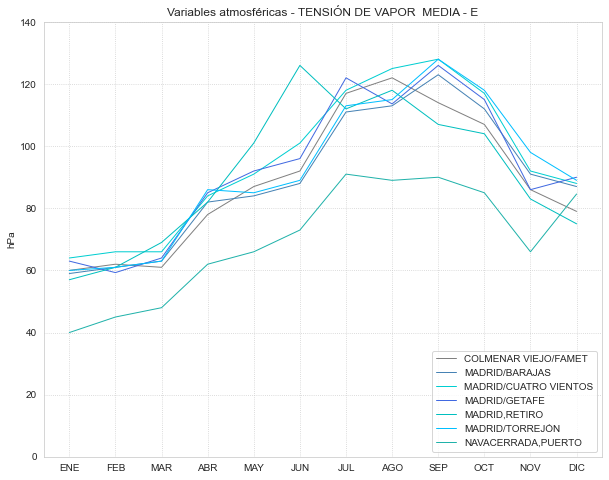

In [194]:
### E_   Tensión de vapor media mensual/anual (décimas hPa)

# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(E_2019_mad.columns.values)[2:-2]
k0= list(E_2019_mad.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
k1 = list(E_2019_mad.iloc[1, 2:-2])  #MADRID/BARAJAS
k2 = list(E_2019_mad.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
k3 = list(E_2019_mad.iloc[3, 2:-2])  #MADRID/GETAFE	
k4 = list(E_2019_mad.iloc[4, 2:-2])  #MADRID,RETIRO
k5 = list(E_2019_mad.iloc[5, 2:-2])  #MADRID/TORREJÓN
k6 = list(E_2019_mad.iloc[6, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("hPa")
ax.set_title("Variables atmosféricas - TENSIÓN DE VAPOR  MEDIA - E");

plt.plot(meses, k0, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, k1, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, k2, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, k3, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, k4, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, k5, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, k6, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,140);
plt.legend(loc="lower right");

In [195]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
humed_E = E_2019_mad[E_2019_mad["Tipo"]== "E"]
E = list(humed_E.mean())
E[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[57.57142857142857,
 59.32857142857143,
 62.0,
 79.85714285714286,
 86.57142857142857,
 95.0,
 112.0,
 113.65714285714286,
 116.57142857142857,
 108.28571428571429,
 86.0,
 84.65714285714286]

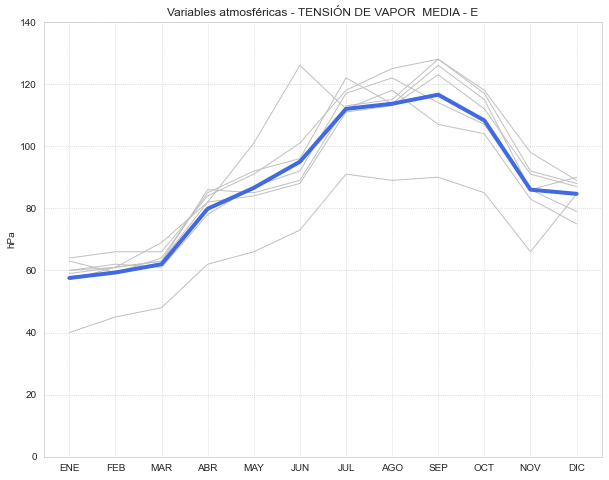

In [196]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(E_2019_mad.columns.values)[2:-2]
k0= list(E_2019_mad.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
k1 = list(E_2019_mad.iloc[1, 2:-2])  #MADRID/BARAJAS
k2 = list(E_2019_mad.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
k3 = list(E_2019_mad.iloc[3, 2:-2])  #MADRID/GETAFE	
k4 = list(E_2019_mad.iloc[4, 2:-2])  #MADRID,RETIRO
k5 = list(E_2019_mad.iloc[5, 2:-2])  #MADRID/TORREJÓN
k6 = list(E_2019_mad.iloc[6, 2:-2])  #NAVACERRADA,PUERTO
ymedia = E[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("hPa")
ax.set_title("Variables atmosféricas - TENSIÓN DE VAPOR  MEDIA - E");

plt.plot(meses, k0, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, k1, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, k2, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, k3, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, k4, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, k5, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, k6, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(0,140);

## 2.5 Mensuales climatologico 2019 - Insolación

#### Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...

In [197]:
## Mensuales climatologico 2019 - Insolación
##  INSO_   Media mensual/anual de la insolación diaria (horas)
### de aquí solo tengo 6 estaciones climáticas, la de retiro no está

### cargo el df entero:
INSO_2019 = pd.read_csv(csv_folder + "\\INSO_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
INSO_2019_mad = pd.merge(ind_mad, INSO_2019, how= "inner", on=["Indicativo"])
INSO_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    6.5      8.3    9.4    6.5  10.6   
1       3129         MADRID/BARAJAS    6.7      8.7    9.7    6.3  11.2   
2       3196  MADRID/CUATRO VIENTOS    7.3      9.1    9.3    7.3  11.9   
3       3200          MADRID/GETAFE    7.1      9.0    9.5    7.4  11.5   
4       3175        MADRID/TORREJÓN    7.2      9.2    8.9    NaN  11.8   
5       2462     NAVACERRADA,PUERTO    4.3      7.3    8.5    4.8   9.4   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0   11.7   11.3    10.5         7.9      6.6        3.7        4.3    8.1  
1   12.0   11.7     NaN         8.5      7.2        3.9        4.0    NaN  
2   12.3   12.1    11.3         8.4      7.5        4.7        4.6    8.8  
3   12.1   12.0    11.5         8.7      7.6        4.6        4.4    8.8  
4   12.7   12.3    11.3         8.2      7.2        4.5        3.4    NaN  
5   11.1   11.2    10.3         7.5      5.7        0.6        3.8    7.0

In [198]:
# borro la columna "anual", no me sirve por los NaN que hay, luego la tendré que rehacer como con el resto de gráficas
INSO_2019_mad.drop("anual", inplace=True, axis=1)
INSO_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    6.5      8.3    9.4    6.5  10.6   
1       3129         MADRID/BARAJAS    6.7      8.7    9.7    6.3  11.2   
2       3196  MADRID/CUATRO VIENTOS    7.3      9.1    9.3    7.3  11.9   
3       3200          MADRID/GETAFE    7.1      9.0    9.5    7.4  11.5   
4       3175        MADRID/TORREJÓN    7.2      9.2    8.9    NaN  11.8   
5       2462     NAVACERRADA,PUERTO    4.3      7.3    8.5    4.8   9.4   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0   11.7   11.3    10.5         7.9      6.6        3.7        4.3  
1   12.0   11.7     NaN         8.5      7.2        3.9        4.0  
2   12.3   12.1    11.3         8.4      7.5        4.7        4.6  
3   12.1   12.0    11.5         8.7      7.6        4.6        4.4  
4   12.7   12.3    11.3         8.2      7.2        4.5        3.4  
5   11.1   11.2    10.3         7.5      5.7        0.6        3.8

In [199]:
INSO_2019_mad.info()  ##veo que hay un par de NaNm los rellenaré con valores medios de cada columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Indicativo  6 non-null      object 
 1   NOMBRE      6 non-null      object 
 2   enero       6 non-null      float64
 3   febrero     6 non-null      float64
 4   marzo       6 non-null      float64
 5   abril       5 non-null      float64
 6   mayo        6 non-null      float64
 7   junio       6 non-null      float64
 8   julio       6 non-null      float64
 9   agosto      5 non-null      float64
 10  septiembre  6 non-null      float64
 11  octubre     6 non-null      float64
 12  noviembre   6 non-null      float64
 13  diciembre   6 non-null      float64
dtypes: float64(12), object(2)
memory usage: 720.0+ bytes


In [200]:
INSO_2019_mad.describe()
###Medias filas:
## abril  6.4
## agosto  10.9

enero   febrero     marzo     abril       mayo      junio  \
count  6.000000  6.000000  6.000000  5.000000   6.000000   6.000000   
mean   6.516667  8.600000  9.216667  6.460000  11.066667  11.983333   
std    1.128568  0.715542  0.440076  1.045466   0.941630   0.545588   
min    4.300000  7.300000  8.500000  4.800000   9.400000  11.100000   
25%    6.550000  8.400000  9.000000  6.300000  10.750000  11.775000   
50%    6.900000  8.850000  9.350000  6.500000  11.350000  12.050000   
75%    7.175000  9.075000  9.475000  7.300000  11.725000  12.250000   
max    7.300000  9.200000  9.700000  7.400000  11.900000  12.700000   

           julio    agosto  septiembre   octubre  noviembre  diciembre  
count   6.000000   5.00000    6.000000  6.000000   6.000000   6.000000  
mean   11.766667  10.98000    8.200000  6.966667   3.666667   4.083333  
std     0.445720   0.54037    0.438178  0.711805   1.555206   0.440076  
min    11.200000  10.30000    7.500000  5.700000   0.600000   3.400000  
25%    11.400000  10.50000    7.975000  6.750000   3.750000   3.850000  
50%    11.850000  11.30000    8.300000  7.200000   4.200000   4.150000  
75%    12.075000  11.30000    8.475000  7.425000   4.575000   4.375000  
max    12.300000  11.50000    8.700000  7.600000   4.700000   4.600000

In [201]:
INSO_2019_mad["abril"].fillna(6.4, inplace=True)  ## veo que se me ha rellenado así que bien
INSO_2019_mad

INSO_2019_mad["agosto"].fillna(10.9, inplace=True)  
INSO_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    6.5      8.3    9.4    6.5  10.6   
1       3129         MADRID/BARAJAS    6.7      8.7    9.7    6.3  11.2   
2       3196  MADRID/CUATRO VIENTOS    7.3      9.1    9.3    7.3  11.9   
3       3200          MADRID/GETAFE    7.1      9.0    9.5    7.4  11.5   
4       3175        MADRID/TORREJÓN    7.2      9.2    8.9    6.4  11.8   
5       2462     NAVACERRADA,PUERTO    4.3      7.3    8.5    4.8   9.4   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0   11.7   11.3    10.5         7.9      6.6        3.7        4.3  
1   12.0   11.7    10.9         8.5      7.2        3.9        4.0  
2   12.3   12.1    11.3         8.4      7.5        4.7        4.6  
3   12.1   12.0    11.5         8.7      7.6        4.6        4.4  
4   12.7   12.3    11.3         8.2      7.2        4.5        3.4  
5   11.1   11.2    10.3         7.5      5.7        0.6        3.8

In [202]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

INSO_2019_mad.loc[:,"media anual"] = round(INSO_2019_mad.mean(axis=1),2)
INSO_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    6.5      8.3    9.4    6.5  10.6   
1       3129         MADRID/BARAJAS    6.7      8.7    9.7    6.3  11.2   
2       3196  MADRID/CUATRO VIENTOS    7.3      9.1    9.3    7.3  11.9   
3       3200          MADRID/GETAFE    7.1      9.0    9.5    7.4  11.5   
4       3175        MADRID/TORREJÓN    7.2      9.2    8.9    6.4  11.8   
5       2462     NAVACERRADA,PUERTO    4.3      7.3    8.5    4.8   9.4   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   11.7   11.3    10.5         7.9      6.6        3.7        4.3   
1   12.0   11.7    10.9         8.5      7.2        3.9        4.0   
2   12.3   12.1    11.3         8.4      7.5        4.7        4.6   
3   12.1   12.0    11.5         8.7      7.6        4.6        4.4   
4   12.7   12.3    11.3         8.2      7.2        4.5        3.4   
5   11.1   11.2    10.3         7.5      5.7        0.6        3.8   

   media anual  
0         8.11  
1         8.40  
2         8.82  
3         8.78  
4         8.59  
5         7.04

In [203]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
INSO_2019_mad["Tipo"] = "INSO"
INSO_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    6.5      8.3    9.4    6.5  10.6   
1       3129         MADRID/BARAJAS    6.7      8.7    9.7    6.3  11.2   
2       3196  MADRID/CUATRO VIENTOS    7.3      9.1    9.3    7.3  11.9   
3       3200          MADRID/GETAFE    7.1      9.0    9.5    7.4  11.5   
4       3175        MADRID/TORREJÓN    7.2      9.2    8.9    6.4  11.8   
5       2462     NAVACERRADA,PUERTO    4.3      7.3    8.5    4.8   9.4   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   11.7   11.3    10.5         7.9      6.6        3.7        4.3   
1   12.0   11.7    10.9         8.5      7.2        3.9        4.0   
2   12.3   12.1    11.3         8.4      7.5        4.7        4.6   
3   12.1   12.0    11.5         8.7      7.6        4.6        4.4   
4   12.7   12.3    11.3         8.2      7.2        4.5        3.4   
5   11.1   11.2    10.3         7.5      5.7        0.6        3.8   

   media anual  Tipo  
0         8.11  INSO  
1         8.40  INSO  
2         8.82  INSO  
3         8.78  INSO  
4         8.59  INSO  
5         7.04  INSO

In [204]:
## Renombro los meses para que salgan mejor en los gráficos
INSO_2019_mad.columns = ["Indicativo", "NOMBRE", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC", "media anual", "Tipo"]
pd.DataFrame(INSO_2019_mad)

Indicativo                 NOMBRE  ENE  FEB  MAR  ABR   MAY   JUN   JUL  \
0      3191E   COLMENAR VIEJO/FAMET  6.5  8.3  9.4  6.5  10.6  11.7  11.3   
1       3129         MADRID/BARAJAS  6.7  8.7  9.7  6.3  11.2  12.0  11.7   
2       3196  MADRID/CUATRO VIENTOS  7.3  9.1  9.3  7.3  11.9  12.3  12.1   
3       3200          MADRID/GETAFE  7.1  9.0  9.5  7.4  11.5  12.1  12.0   
4       3175        MADRID/TORREJÓN  7.2  9.2  8.9  6.4  11.8  12.7  12.3   
5       2462     NAVACERRADA,PUERTO  4.3  7.3  8.5  4.8   9.4  11.1  11.2   

    AGO  SEP  OCT  NOV  DIC  media anual  Tipo  
0  10.5  7.9  6.6  3.7  4.3         8.11  INSO  
1  10.9  8.5  7.2  3.9  4.0         8.40  INSO  
2  11.3  8.4  7.5  4.7  4.6         8.82  INSO  
3  11.5  8.7  7.6  4.6  4.4         8.78  INSO  
4  11.3  8.2  7.2  4.5  3.4         8.59  INSO  
5  10.3  7.5  5.7  0.6  3.8         7.04  INSO

In [205]:
##guardo el dataframe
INSO_2019_mad.to_csv("INSO_2019_mad.csv", index=False)

#### Grafico INSO

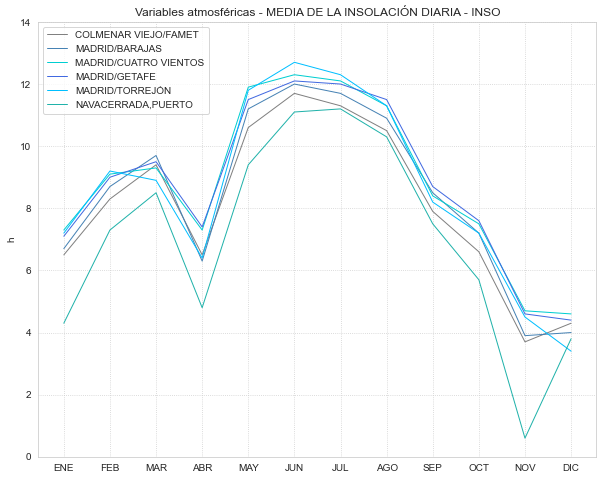

In [206]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(INSO_2019_mad.columns.values)[2:-2]
q0= list(INSO_2019_mad.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
q1 = list(INSO_2019_mad.iloc[1, 2:-2])  #MADRID/BARAJAS
q2 = list(INSO_2019_mad.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
q3 = list(INSO_2019_mad.iloc[3, 2:-2])  #MADRID/GETAFE	
q4 = list(INSO_2019_mad.iloc[4, 2:-2])  #MADRID/TORREJÓN
q5 = list(INSO_2019_mad.iloc[5, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("h")
ax.set_title("Variables atmosféricas - MEDIA DE LA INSOLACIÓN DIARIA - INSO");

plt.plot(meses, q0, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, q1, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, q2, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, q3, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, q4, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, q5, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,14);
plt.legend(loc="upper left");

In [207]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
insol_INSO = INSO_2019_mad[INSO_2019_mad["Tipo"]== "INSO"]
INSO = list(insol_INSO.mean())
INSO[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[6.516666666666667,
 8.6,
 9.216666666666667,
 6.449999999999999,
 11.066666666666668,
 11.983333333333333,
 11.766666666666667,
 10.966666666666667,
 8.200000000000001,
 6.966666666666668,
 3.6666666666666665,
 4.083333333333333]

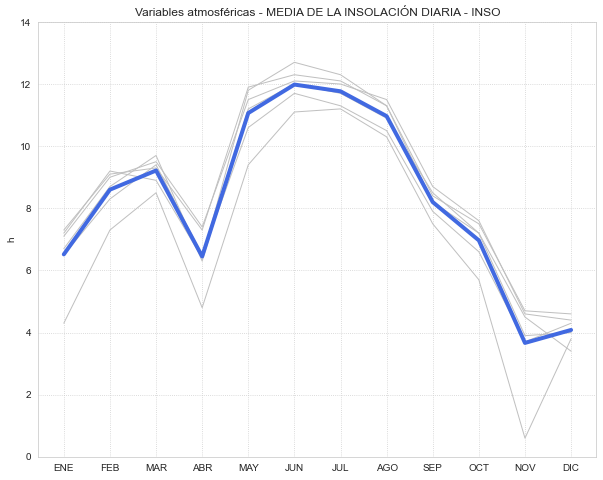

In [208]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(INSO_2019_mad.columns.values)[2:-2]
q0 = list(INSO_2019_mad.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
q1 = list(INSO_2019_mad.iloc[1, 2:-2])  #MADRID/BARAJAS
q2 = list(INSO_2019_mad.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
q3 = list(INSO_2019_mad.iloc[3, 2:-2])  #MADRID/GETAFE	
q4 = list(INSO_2019_mad.iloc[4, 2:-2])  #MADRID/TORREJÓN
q5 = list(INSO_2019_mad.iloc[5, 2:-2])  #NAVACERRADA,PUERTO
ymedia = INSO[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("h")
ax.set_title("Variables atmosféricas - MEDIA DE LA INSOLACIÓN DIARIA - INSO");

plt.plot(meses, q0, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, q1, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, q2, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, q3, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, q4, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, q5, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(0,14);

#### Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...

In [209]:
## Mensuales climatologico 2019 - Insolación
##  P_SOL_   Porcentaje medio mensual de la insolación diaria frente a la insolación teórica. (%)

### cargo el df entero:
P_SOL_2019 = pd.read_csv(csv_folder + "\\P_SOL_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
P_SOL_2019_mad = pd.merge(ind_mad, P_SOL_2019, how= "inner", on=["Indicativo"])
P_SOL_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   68.0     78.0   79.0   49.0  73.0   
1       3129         MADRID/BARAJAS   70.0     82.0   81.0   48.0  77.0   
2       3196  MADRID/CUATRO VIENTOS   75.0     85.0   78.0   55.0  82.0   
3       3200          MADRID/GETAFE   74.0     84.0   79.0   55.0  80.0   
4       3175        MADRID/TORREJÓN   75.0     86.0   75.0    NaN  81.0   
5       2462     NAVACERRADA,PUERTO   46.0     68.0   71.0   36.0  65.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0   77.0   77.0    76.0        63.0     59.0       37.0       46.0   65.0  
1   80.0   80.0     NaN        68.0     64.0       39.0       42.0    NaN  
2   82.0   82.0    82.0        68.0     67.0       47.0       50.0   71.0  
3   81.0   81.0    84.0        70.0     68.0       46.0       48.0   71.0  
4   84.0   83.0    82.0        66.0     64.0       45.0       37.0    NaN  
5   74.0   76.0    74.0        61.0     51.0        7.0       41.0   56.0

In [210]:
# borro la columna "anual", no me sirve porque tiene algun NAN y no hace bien la media, la tendré que hacer yo luego
P_SOL_2019_mad.drop("anual", inplace=True, axis=1)
P_SOL_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   68.0     78.0   79.0   49.0  73.0   
1       3129         MADRID/BARAJAS   70.0     82.0   81.0   48.0  77.0   
2       3196  MADRID/CUATRO VIENTOS   75.0     85.0   78.0   55.0  82.0   
3       3200          MADRID/GETAFE   74.0     84.0   79.0   55.0  80.0   
4       3175        MADRID/TORREJÓN   75.0     86.0   75.0    NaN  81.0   
5       2462     NAVACERRADA,PUERTO   46.0     68.0   71.0   36.0  65.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0   77.0   77.0    76.0        63.0     59.0       37.0       46.0  
1   80.0   80.0     NaN        68.0     64.0       39.0       42.0  
2   82.0   82.0    82.0        68.0     67.0       47.0       50.0  
3   81.0   81.0    84.0        70.0     68.0       46.0       48.0  
4   84.0   83.0    82.0        66.0     64.0       45.0       37.0  
5   74.0   76.0    74.0        61.0     51.0        7.0       41.0

In [211]:
P_SOL_2019_mad.info()  ## aquí tambien hay 2 nans, los lleno con el valor medio de cada columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Indicativo  6 non-null      object 
 1   NOMBRE      6 non-null      object 
 2   enero       6 non-null      float64
 3   febrero     6 non-null      float64
 4   marzo       6 non-null      float64
 5   abril       5 non-null      float64
 6   mayo        6 non-null      float64
 7   junio       6 non-null      float64
 8   julio       6 non-null      float64
 9   agosto      5 non-null      float64
 10  septiembre  6 non-null      float64
 11  octubre     6 non-null      float64
 12  noviembre   6 non-null      float64
 13  diciembre   6 non-null      float64
dtypes: float64(12), object(2)
memory usage: 720.0+ bytes


In [212]:
P_SOL_2019_mad.describe()
###Medias filas:
## abril  48.6
## agosto  79.6

enero    febrero      marzo      abril       mayo      junio  \
count   6.000000   6.000000   6.000000   5.000000   6.000000   6.000000   
mean   68.000000  80.500000  77.166667  48.600000  76.333333  79.666667   
std    11.153475   6.745369   3.600926   7.765307   6.439462   3.614784   
min    46.000000  68.000000  71.000000  36.000000  65.000000  74.000000   
25%    68.500000  79.000000  75.750000  48.000000  74.000000  77.750000   
50%    72.000000  83.000000  78.500000  49.000000  78.500000  80.500000   
75%    74.750000  84.750000  79.000000  55.000000  80.750000  81.750000   
max    75.000000  86.000000  81.000000  55.000000  82.000000  84.000000   

           julio     agosto  septiembre    octubre  noviembre  diciembre  
count   6.000000   5.000000    6.000000   6.000000   6.000000   6.000000  
mean   79.833333  79.600000   66.000000  62.166667  36.833333  44.000000  
std     2.786874   4.335897    3.405877   6.306082  15.158056   4.857983  
min    76.000000  74.000000   61.000000  51.000000   7.000000  37.000000  
25%    77.750000  76.000000   63.750000  60.250000  37.500000  41.250000  
50%    80.500000  82.000000   67.000000  64.000000  42.000000  44.000000  
75%    81.750000  82.000000   68.000000  66.250000  45.750000  47.500000  
max    83.000000  84.000000   70.000000  68.000000  47.000000  50.000000

In [213]:
P_SOL_2019_mad["abril"].fillna(48.6, inplace=True)  ## veo que se me ha rellenado así que bien
P_SOL_2019_mad

P_SOL_2019_mad["agosto"].fillna(79.6, inplace=True)  
P_SOL_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   68.0     78.0   79.0   49.0  73.0   
1       3129         MADRID/BARAJAS   70.0     82.0   81.0   48.0  77.0   
2       3196  MADRID/CUATRO VIENTOS   75.0     85.0   78.0   55.0  82.0   
3       3200          MADRID/GETAFE   74.0     84.0   79.0   55.0  80.0   
4       3175        MADRID/TORREJÓN   75.0     86.0   75.0   48.6  81.0   
5       2462     NAVACERRADA,PUERTO   46.0     68.0   71.0   36.0  65.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0   77.0   77.0    76.0        63.0     59.0       37.0       46.0  
1   80.0   80.0    79.6        68.0     64.0       39.0       42.0  
2   82.0   82.0    82.0        68.0     67.0       47.0       50.0  
3   81.0   81.0    84.0        70.0     68.0       46.0       48.0  
4   84.0   83.0    82.0        66.0     64.0       45.0       37.0  
5   74.0   76.0    74.0        61.0     51.0        7.0       41.0

In [214]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio anual

P_SOL_2019_mad.loc[:,"media anual"] = round(P_SOL_2019_mad.mean(axis=1),2)
P_SOL_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   68.0     78.0   79.0   49.0  73.0   
1       3129         MADRID/BARAJAS   70.0     82.0   81.0   48.0  77.0   
2       3196  MADRID/CUATRO VIENTOS   75.0     85.0   78.0   55.0  82.0   
3       3200          MADRID/GETAFE   74.0     84.0   79.0   55.0  80.0   
4       3175        MADRID/TORREJÓN   75.0     86.0   75.0   48.6  81.0   
5       2462     NAVACERRADA,PUERTO   46.0     68.0   71.0   36.0  65.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   77.0   77.0    76.0        63.0     59.0       37.0       46.0   
1   80.0   80.0    79.6        68.0     64.0       39.0       42.0   
2   82.0   82.0    82.0        68.0     67.0       47.0       50.0   
3   81.0   81.0    84.0        70.0     68.0       46.0       48.0   
4   84.0   83.0    82.0        66.0     64.0       45.0       37.0   
5   74.0   76.0    74.0        61.0     51.0        7.0       41.0   

   media anual  
0        65.17  
1        67.55  
2        71.08  
3        70.83  
4        68.88  
5        55.83

In [215]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
P_SOL_2019_mad["Tipo"] = "P_SOL"
P_SOL_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   68.0     78.0   79.0   49.0  73.0   
1       3129         MADRID/BARAJAS   70.0     82.0   81.0   48.0  77.0   
2       3196  MADRID/CUATRO VIENTOS   75.0     85.0   78.0   55.0  82.0   
3       3200          MADRID/GETAFE   74.0     84.0   79.0   55.0  80.0   
4       3175        MADRID/TORREJÓN   75.0     86.0   75.0   48.6  81.0   
5       2462     NAVACERRADA,PUERTO   46.0     68.0   71.0   36.0  65.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   77.0   77.0    76.0        63.0     59.0       37.0       46.0   
1   80.0   80.0    79.6        68.0     64.0       39.0       42.0   
2   82.0   82.0    82.0        68.0     67.0       47.0       50.0   
3   81.0   81.0    84.0        70.0     68.0       46.0       48.0   
4   84.0   83.0    82.0        66.0     64.0       45.0       37.0   
5   74.0   76.0    74.0        61.0     51.0        7.0       41.0   

   media anual   Tipo  
0        65.17  P_SOL  
1        67.55  P_SOL  
2        71.08  P_SOL  
3        70.83  P_SOL  
4        68.88  P_SOL  
5        55.83  P_SOL

In [216]:
## Renombro los meses para que salgan mejor en los gráficos
P_SOL_2019_mad.columns = ["Indicativo", "NOMBRE", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC", "media anual", "Tipo"]
pd.DataFrame(P_SOL_2019_mad)

Indicativo                 NOMBRE   ENE   FEB   MAR   ABR   MAY   JUN   JUL  \
0      3191E   COLMENAR VIEJO/FAMET  68.0  78.0  79.0  49.0  73.0  77.0  77.0   
1       3129         MADRID/BARAJAS  70.0  82.0  81.0  48.0  77.0  80.0  80.0   
2       3196  MADRID/CUATRO VIENTOS  75.0  85.0  78.0  55.0  82.0  82.0  82.0   
3       3200          MADRID/GETAFE  74.0  84.0  79.0  55.0  80.0  81.0  81.0   
4       3175        MADRID/TORREJÓN  75.0  86.0  75.0  48.6  81.0  84.0  83.0   
5       2462     NAVACERRADA,PUERTO  46.0  68.0  71.0  36.0  65.0  74.0  76.0   

    AGO   SEP   OCT   NOV   DIC  media anual   Tipo  
0  76.0  63.0  59.0  37.0  46.0        65.17  P_SOL  
1  79.6  68.0  64.0  39.0  42.0        67.55  P_SOL  
2  82.0  68.0  67.0  47.0  50.0        71.08  P_SOL  
3  84.0  70.0  68.0  46.0  48.0        70.83  P_SOL  
4  82.0  66.0  64.0  45.0  37.0        68.88  P_SOL  
5  74.0  61.0  51.0   7.0  41.0        55.83  P_SOL

In [217]:
##guardo el dataframe
P_SOL_2019_mad.to_csv("P_SOL_2019_mad.csv", index=False)

#### Grafico P_SOL

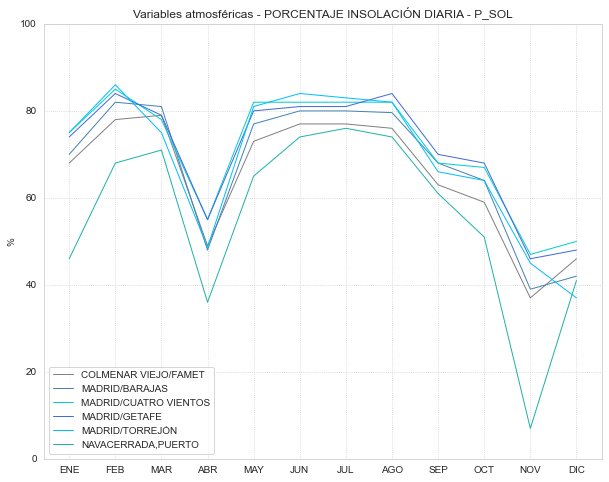

In [218]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(P_SOL_2019_mad.columns.values)[2:-2]
r0= list(P_SOL_2019_mad.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
r1 = list(P_SOL_2019_mad.iloc[1, 2:-2])  #MADRID/BARAJAS
r2 = list(P_SOL_2019_mad.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
r3 = list(P_SOL_2019_mad.iloc[3, 2:-2])  #MADRID/GETAFE	
r4 = list(P_SOL_2019_mad.iloc[4, 2:-2])  #MADRID/TORREJÓN
r5 = list(P_SOL_2019_mad.iloc[5, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("%")
ax.set_title("Variables atmosféricas - PORCENTAJE INSOLACIÓN DIARIA - P_SOL");

plt.plot(meses, r0, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, r1, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, r2, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, r3, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, r4, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, r5, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,100);
plt.legend(loc="lower left");

In [219]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
insol_P_SOL = P_SOL_2019_mad[P_SOL_2019_mad["Tipo"]== "P_SOL"]
P_SOL = list(insol_P_SOL.mean())
P_SOL[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[68.0,
 80.5,
 77.16666666666667,
 48.6,
 76.33333333333333,
 79.66666666666667,
 79.83333333333333,
 79.60000000000001,
 66.0,
 62.166666666666664,
 36.833333333333336,
 44.0]

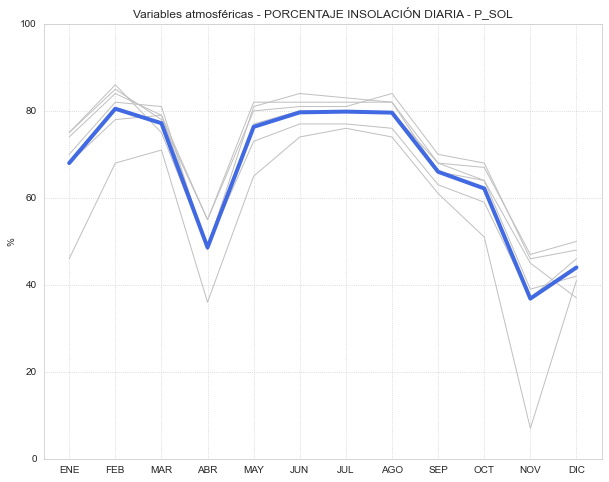

In [220]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(P_SOL_2019_mad.columns.values)[2:-2]
r0= list(P_SOL_2019_mad.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
r1 = list(P_SOL_2019_mad.iloc[1, 2:-2])  #MADRID/BARAJAS
r2 = list(P_SOL_2019_mad.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
r3 = list(P_SOL_2019_mad.iloc[3, 2:-2])  #MADRID/GETAFE	
r4 = list(P_SOL_2019_mad.iloc[4, 2:-2])  #MADRID/TORREJÓN
r5 = list(P_SOL_2019_mad.iloc[5, 2:-2])  #NAVACERRADA,PUERTO
ymedia = P_SOL[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("%")
ax.set_title("Variables atmosféricas - PORCENTAJE INSOLACIÓN DIARIA - P_SOL");

plt.plot(meses, r0, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, r1, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, r2, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, r3, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, r4, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, r5, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(0,100);

## 2.6 Mensuales climatologico 2019 - Temperaturas

#### Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...

In [221]:
## Mensuales climatologico 2019 - Temperaturas
##  TM_MES_   Temperatura media mensual/anual (°C)

### cargo el df entero:
TM_MES_2019 = pd.read_csv(csv_folder + "\\TM_MES_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
TM_MES_2019_mad = pd.merge(ind_mad, TM_MES_2019, how= "inner", on=["Indicativo"])
TM_MES_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    6.4      8.4   10.4    9.9  15.9   
1       3129         MADRID/BARAJAS    5.7      7.8   11.2   12.5  18.3   
2       3196  MADRID/CUATRO VIENTOS    6.8      9.2   12.2   12.6  18.7   
3       3200          MADRID/GETAFE    6.5      9.2   12.4   12.7  19.2   
4       3195          MADRID,RETIRO    6.5      9.4   12.4   12.6  18.9   
5       3175        MADRID/TORREJÓN    5.4      7.8   10.9   11.9  17.6   
6       2462     NAVACERRADA,PUERTO    1.2      3.4    4.7    3.3   9.8   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0   20.7   25.3    23.9        19.6     14.8        7.3        7.9   14.2  
1   23.1   27.5    25.8        21.1     16.1       10.2        8.5   15.7  
2   23.4   27.6    26.1        21.5     16.4        9.8        9.0   16.1  
3   23.8   28.1    26.4        21.9     16.7       10.3        9.0   16.4  
4   23.7   28.0    26.1        21.2     16.2        9.6        8.8   16.1  
5   22.5   27.2    25.5        21.2     15.8        9.8        8.1   15.3  
6   14.0   18.7    17.8        13.8      9.7        0.9        3.7    8.4

In [222]:
TM_MES_2019_mad.describe()

enero   febrero      marzo      abril       mayo      junio  \
count  7.000000  7.000000   7.000000   7.000000   7.000000   7.000000   
mean   5.500000  7.885714  10.600000  10.785714  16.914286  21.600000   
std    1.959592  2.087605   2.718455   3.445978   3.326374   3.514731   
min    1.200000  3.400000   4.700000   3.300000   9.800000  14.000000   
25%    5.550000  7.800000  10.650000  10.900000  16.750000  21.600000   
50%    6.400000  8.400000  11.200000  12.500000  18.300000  23.100000   
75%    6.500000  9.200000  12.300000  12.600000  18.800000  23.550000   
max    6.800000  9.400000  12.400000  12.700000  19.200000  23.800000   

           julio     agosto  septiembre    octubre  noviembre  diciembre  \
count   7.000000   7.000000    7.000000   7.000000   7.000000   7.000000   
mean   26.057143  24.514286   20.042857  15.100000   8.271429   7.857143   
std     3.376812   3.073233    2.844209   2.456284   3.404759   1.882248   
min    18.700000  17.800000   13.800000   9.700000   0.900000   3.700000   
25%    26.250000  24.700000   20.350000  15.300000   8.450000   8.000000   
50%    27.500000  25.800000   21.200000  16.100000   9.800000   8.500000   
75%    27.800000  26.100000   21.350000  16.300000  10.000000   8.900000   
max    28.100000  26.400000   21.900000  16.700000  10.300000   9.000000   

           anual  
count   7.000000  
mean   14.600000  
std     2.829605  
min     8.400000  
25%    14.750000  
50%    15.700000  
75%    16.100000  
max    16.400000

In [223]:
## FINALMENTE NO LA BORRO
# # borro la columna "anual", no me interesa
# TM_MES_2019_mad.drop("anual", inplace=True, axis=1)
# TM_MES_2019_mad

In [224]:
##renombro columna
TM_MES_2019_mad.rename(columns={"anual":"media anual"}, inplace= True)
TM_MES_2019_mad


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    6.4      8.4   10.4    9.9  15.9   
1       3129         MADRID/BARAJAS    5.7      7.8   11.2   12.5  18.3   
2       3196  MADRID/CUATRO VIENTOS    6.8      9.2   12.2   12.6  18.7   
3       3200          MADRID/GETAFE    6.5      9.2   12.4   12.7  19.2   
4       3195          MADRID,RETIRO    6.5      9.4   12.4   12.6  18.9   
5       3175        MADRID/TORREJÓN    5.4      7.8   10.9   11.9  17.6   
6       2462     NAVACERRADA,PUERTO    1.2      3.4    4.7    3.3   9.8   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   20.7   25.3    23.9        19.6     14.8        7.3        7.9   
1   23.1   27.5    25.8        21.1     16.1       10.2        8.5   
2   23.4   27.6    26.1        21.5     16.4        9.8        9.0   
3   23.8   28.1    26.4        21.9     16.7       10.3        9.0   
4   23.7   28.0    26.1        21.2     16.2        9.6        8.8   
5   22.5   27.2    25.5        21.2     15.8        9.8        8.1   
6   14.0   18.7    17.8        13.8      9.7        0.9        3.7   

   media anual  
0         14.2  
1         15.7  
2         16.1  
3         16.4  
4         16.1  
5         15.3  
6          8.4

In [225]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
TM_MES_2019_mad["Tipo"] = "TM_MES"
TM_MES_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    6.4      8.4   10.4    9.9  15.9   
1       3129         MADRID/BARAJAS    5.7      7.8   11.2   12.5  18.3   
2       3196  MADRID/CUATRO VIENTOS    6.8      9.2   12.2   12.6  18.7   
3       3200          MADRID/GETAFE    6.5      9.2   12.4   12.7  19.2   
4       3195          MADRID,RETIRO    6.5      9.4   12.4   12.6  18.9   
5       3175        MADRID/TORREJÓN    5.4      7.8   10.9   11.9  17.6   
6       2462     NAVACERRADA,PUERTO    1.2      3.4    4.7    3.3   9.8   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   20.7   25.3    23.9        19.6     14.8        7.3        7.9   
1   23.1   27.5    25.8        21.1     16.1       10.2        8.5   
2   23.4   27.6    26.1        21.5     16.4        9.8        9.0   
3   23.8   28.1    26.4        21.9     16.7       10.3        9.0   
4   23.7   28.0    26.1        21.2     16.2        9.6        8.8   
5   22.5   27.2    25.5        21.2     15.8        9.8        8.1   
6   14.0   18.7    17.8        13.8      9.7        0.9        3.7   

   media anual    Tipo  
0         14.2  TM_MES  
1         15.7  TM_MES  
2         16.1  TM_MES  
3         16.4  TM_MES  
4         16.1  TM_MES  
5         15.3  TM_MES  
6          8.4  TM_MES

In [226]:
TM_MES_2019_mad.describe()

enero   febrero      marzo      abril       mayo      junio  \
count  7.000000  7.000000   7.000000   7.000000   7.000000   7.000000   
mean   5.500000  7.885714  10.600000  10.785714  16.914286  21.600000   
std    1.959592  2.087605   2.718455   3.445978   3.326374   3.514731   
min    1.200000  3.400000   4.700000   3.300000   9.800000  14.000000   
25%    5.550000  7.800000  10.650000  10.900000  16.750000  21.600000   
50%    6.400000  8.400000  11.200000  12.500000  18.300000  23.100000   
75%    6.500000  9.200000  12.300000  12.600000  18.800000  23.550000   
max    6.800000  9.400000  12.400000  12.700000  19.200000  23.800000   

           julio     agosto  septiembre    octubre  noviembre  diciembre  \
count   7.000000   7.000000    7.000000   7.000000   7.000000   7.000000   
mean   26.057143  24.514286   20.042857  15.100000   8.271429   7.857143   
std     3.376812   3.073233    2.844209   2.456284   3.404759   1.882248   
min    18.700000  17.800000   13.800000   9.700000   0.900000   3.700000   
25%    26.250000  24.700000   20.350000  15.300000   8.450000   8.000000   
50%    27.500000  25.800000   21.200000  16.100000   9.800000   8.500000   
75%    27.800000  26.100000   21.350000  16.300000  10.000000   8.900000   
max    28.100000  26.400000   21.900000  16.700000  10.300000   9.000000   

       media anual  
count     7.000000  
mean     14.600000  
std       2.829605  
min       8.400000  
25%      14.750000  
50%      15.700000  
75%      16.100000  
max      16.400000

In [227]:
## Mensuales climatologico 2019 - Temperaturas
##  TM_MAX_   Temperatura media mensual/anual de las máximas (°C)

### cargo el df entero:
TM_MAX_2019 = pd.read_csv(csv_folder + "\\TM_MAX_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
TM_MAX_2019_mad = pd.merge(ind_mad, TM_MAX_2019, how= "inner", on=["Indicativo"])
TM_MAX_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   10.5     12.9   15.7   14.6  22.5   
1       3129         MADRID/BARAJAS   12.7     16.1   19.3   18.5  26.6   
2       3196  MADRID/CUATRO VIENTOS   12.6     15.5   18.6   18.1  25.9   
3       3200          MADRID/GETAFE   12.6     15.9   18.9   18.1  26.4   
4       3195          MADRID,RETIRO   11.1     14.6   18.1   17.7  25.7   
5       3175        MADRID/TORREJÓN   12.8     16.3   19.2   18.0  26.2   
6       2462     NAVACERRADA,PUERTO    4.6      7.2    9.5    7.2  15.1   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0   26.8   31.4    29.8        24.8     19.2       10.3       11.2   19.1  
1   31.2   35.5    33.7        27.9     22.6       13.8       13.0   22.6  
2   30.3   34.5    32.9        27.5     22.1       13.3       13.1   22.0  
3   30.6   34.8    33.0        27.7     22.2       13.5       13.0   22.2  
4   30.3   34.6    32.4        26.7     20.7       12.6       12.0   21.4  
5   31.3   35.6    33.8        27.9     22.4       13.9       13.0   22.5  
6   19.5   24.7    23.6        18.4     13.5        3.1        6.4   12.7

In [228]:
#FINLMENTE NO LA BORRO
# # borro la columna "anual", no me interesa
# TM_MAX_2019_mad.drop("anual", inplace=True, axis=1)
# TM_MAX_2019_mad

In [229]:
##renombro columna
TM_MAX_2019_mad.rename(columns={"anual":"media anual"}, inplace= True)
TM_MAX_2019_mad


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   10.5     12.9   15.7   14.6  22.5   
1       3129         MADRID/BARAJAS   12.7     16.1   19.3   18.5  26.6   
2       3196  MADRID/CUATRO VIENTOS   12.6     15.5   18.6   18.1  25.9   
3       3200          MADRID/GETAFE   12.6     15.9   18.9   18.1  26.4   
4       3195          MADRID,RETIRO   11.1     14.6   18.1   17.7  25.7   
5       3175        MADRID/TORREJÓN   12.8     16.3   19.2   18.0  26.2   
6       2462     NAVACERRADA,PUERTO    4.6      7.2    9.5    7.2  15.1   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   26.8   31.4    29.8        24.8     19.2       10.3       11.2   
1   31.2   35.5    33.7        27.9     22.6       13.8       13.0   
2   30.3   34.5    32.9        27.5     22.1       13.3       13.1   
3   30.6   34.8    33.0        27.7     22.2       13.5       13.0   
4   30.3   34.6    32.4        26.7     20.7       12.6       12.0   
5   31.3   35.6    33.8        27.9     22.4       13.9       13.0   
6   19.5   24.7    23.6        18.4     13.5        3.1        6.4   

   media anual  
0         19.1  
1         22.6  
2         22.0  
3         22.2  
4         21.4  
5         22.5  
6         12.7

In [230]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
TM_MAX_2019_mad["Tipo"] = "TM_MAX"
TM_MAX_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   10.5     12.9   15.7   14.6  22.5   
1       3129         MADRID/BARAJAS   12.7     16.1   19.3   18.5  26.6   
2       3196  MADRID/CUATRO VIENTOS   12.6     15.5   18.6   18.1  25.9   
3       3200          MADRID/GETAFE   12.6     15.9   18.9   18.1  26.4   
4       3195          MADRID,RETIRO   11.1     14.6   18.1   17.7  25.7   
5       3175        MADRID/TORREJÓN   12.8     16.3   19.2   18.0  26.2   
6       2462     NAVACERRADA,PUERTO    4.6      7.2    9.5    7.2  15.1   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   26.8   31.4    29.8        24.8     19.2       10.3       11.2   
1   31.2   35.5    33.7        27.9     22.6       13.8       13.0   
2   30.3   34.5    32.9        27.5     22.1       13.3       13.1   
3   30.6   34.8    33.0        27.7     22.2       13.5       13.0   
4   30.3   34.6    32.4        26.7     20.7       12.6       12.0   
5   31.3   35.6    33.8        27.9     22.4       13.9       13.0   
6   19.5   24.7    23.6        18.4     13.5        3.1        6.4   

   media anual    Tipo  
0         19.1  TM_MAX  
1         22.6  TM_MAX  
2         22.0  TM_MAX  
3         22.2  TM_MAX  
4         21.4  TM_MAX  
5         22.5  TM_MAX  
6         12.7  TM_MAX

In [231]:
## Mensuales climatologico 2019 - Temperaturas
##  TM_MIN_   Temperatura media mensual/anual de las mínimas (°C)

### cargo el df entero:
TM_MIN_2019 = pd.read_csv(csv_folder + "\\TM_MIN_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
TM_MIN_2019_mad = pd.merge(ind_mad, TM_MIN_2019, how= "inner", on=["Indicativo"])
TM_MIN_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    2.3      3.8    5.0    5.1   9.3   
1       3129         MADRID/BARAJAS   -1.4     -0.4    3.1    6.4  10.0   
2       3196  MADRID/CUATRO VIENTOS    1.1      2.9    5.7    7.1  11.5   
3       3200          MADRID/GETAFE    0.5      2.5    5.9    7.4  12.1   
4       3195          MADRID,RETIRO    2.0      4.1    6.7    7.4  12.0   
5       3175        MADRID/TORREJÓN   -1.9     -0.7    2.5    5.7   9.0   
6       2462     NAVACERRADA,PUERTO   -2.3     -0.5   -0.1   -0.6   4.4   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0   14.6   19.0    17.9        14.3     10.3        4.3        4.6    9.2  
1   14.9   19.5    17.8        14.1      9.6        6.6        3.9    8.7  
2   16.4   20.7    19.3        15.4     10.7        6.3        4.8   10.2  
3   17.0   21.3    19.8        16.0     11.3        6.9        5.0   10.5  
4   17.1   21.4    19.7        15.7     11.6        6.6        5.6   10.8  
5   13.6   18.8    17.2        14.3      9.2        5.7        3.2    8.1  
6    8.3   12.7    11.9         9.2      5.9       -1.5        1.0    4.0

In [232]:
#FINLMENTE NO LA BORRO
# # borro la columna "anual", no me interesa
# TM_MIN_2019_mad.drop("anual", inplace=True, axis=1)
# TM_MIN_2019_mad

In [233]:
##renombro columna
TM_MIN_2019_mad.rename(columns={"anual":"media anual"}, inplace= True)
TM_MIN_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    2.3      3.8    5.0    5.1   9.3   
1       3129         MADRID/BARAJAS   -1.4     -0.4    3.1    6.4  10.0   
2       3196  MADRID/CUATRO VIENTOS    1.1      2.9    5.7    7.1  11.5   
3       3200          MADRID/GETAFE    0.5      2.5    5.9    7.4  12.1   
4       3195          MADRID,RETIRO    2.0      4.1    6.7    7.4  12.0   
5       3175        MADRID/TORREJÓN   -1.9     -0.7    2.5    5.7   9.0   
6       2462     NAVACERRADA,PUERTO   -2.3     -0.5   -0.1   -0.6   4.4   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   14.6   19.0    17.9        14.3     10.3        4.3        4.6   
1   14.9   19.5    17.8        14.1      9.6        6.6        3.9   
2   16.4   20.7    19.3        15.4     10.7        6.3        4.8   
3   17.0   21.3    19.8        16.0     11.3        6.9        5.0   
4   17.1   21.4    19.7        15.7     11.6        6.6        5.6   
5   13.6   18.8    17.2        14.3      9.2        5.7        3.2   
6    8.3   12.7    11.9         9.2      5.9       -1.5        1.0   

   media anual  
0          9.2  
1          8.7  
2         10.2  
3         10.5  
4         10.8  
5          8.1  
6          4.0

In [234]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
TM_MIN_2019_mad["Tipo"] = "TM_MIN"
TM_MIN_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    2.3      3.8    5.0    5.1   9.3   
1       3129         MADRID/BARAJAS   -1.4     -0.4    3.1    6.4  10.0   
2       3196  MADRID/CUATRO VIENTOS    1.1      2.9    5.7    7.1  11.5   
3       3200          MADRID/GETAFE    0.5      2.5    5.9    7.4  12.1   
4       3195          MADRID,RETIRO    2.0      4.1    6.7    7.4  12.0   
5       3175        MADRID/TORREJÓN   -1.9     -0.7    2.5    5.7   9.0   
6       2462     NAVACERRADA,PUERTO   -2.3     -0.5   -0.1   -0.6   4.4   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   14.6   19.0    17.9        14.3     10.3        4.3        4.6   
1   14.9   19.5    17.8        14.1      9.6        6.6        3.9   
2   16.4   20.7    19.3        15.4     10.7        6.3        4.8   
3   17.0   21.3    19.8        16.0     11.3        6.9        5.0   
4   17.1   21.4    19.7        15.7     11.6        6.6        5.6   
5   13.6   18.8    17.2        14.3      9.2        5.7        3.2   
6    8.3   12.7    11.9         9.2      5.9       -1.5        1.0   

   media anual    Tipo  
0          9.2  TM_MIN  
1          8.7  TM_MIN  
2         10.2  TM_MIN  
3         10.5  TM_MIN  
4         10.8  TM_MIN  
5          8.1  TM_MIN  
6          4.0  TM_MIN

In [235]:
## Mensuales climatologico 2019 - Temperaturas
##  TA_MAX_   Temperatura máxima absoluta del mes/año y fecha (°C)

### cargo el df entero:
TA_MAX_2019 = pd.read_csv(csv_folder + "\\TA_MAX_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
TA_MAX_2019_mad = pd.merge(ind_mad, TA_MAX_2019, how= "inner", on=["Indicativo"])
TA_MAX_2019_mad

### NOTA: tendré que pasarle un REGEX para limpiar los datos

Indicativo                 NOMBRE     enero   febrero     marzo     abril  \
0      3191E   COLMENAR VIEJO/FAMET  16.0(07)  18.0(27)  21.5(16)  23.0(30)   
1       3129         MADRID/BARAJAS  16.3(24)  21.3(26)  25.3(16)  27.1(30)   
2       3196  MADRID/CUATRO VIENTOS  16.9(25)  20.6(26)  24.9(16)  29.5(28)   
3       3200          MADRID/GETAFE  17.0(24)  21.0(26)  25.0(16)  26.8(30)   
4       3195          MADRID,RETIRO  15.2(25)  19.8(26)  23.9(16)  26.0(30)   
5       3175        MADRID/TORREJÓN  17.8(07)  22.0(26)  25.7(16)  26.9(30)   
6       2462     NAVACERRADA,PUERTO  12.7(15)  13.8(24)  15.5(15)  17.0(30)   

       mayo     junio     julio    agosto septiembre   octubre noviembre  \
0  30.0(15)  37.0(28)  36.6(12)  34.1(17)   31.5(03)  26.7(08)  18.0(01)   
1  33.9(15)  41.2(28)  40.3(12)  37.6(17)   34.4(04)  30.1(08)  21.6(01)   
2  32.6(15)  40.5(28)  39.2(12)  36.6(17)   34.5(01)  29.6(08)  20.1(01)   
3  34.0(15)  41.0(28)  39.4(12)  37.4(17)   34.2(01)  30.0(08)  20.4(01)   
4  33.5(15)  40.7(28)  38.8(12)  37.2(17)   32.7(04)  28.0(08)  19.3(01)   
5  33.0(15)  41.9(28)  39.9(12)  38.0(17)   34.7(01)  29.9(08)  21.7(01)   
6  23.5(31)  32.0(29)  31.3(12)  28.5(17)   23.2(04)  22.4(08)  10.6(01)   

  diciembre         anual  
0  17.4(28)  37.0(28/jun)  
1  17.6(26)  41.2(28/jun)  
2  16.8(25)  40.5(28/jun)  
3  17.4(21)  41.0(28/jun)  
4  16.0(21)  40.7(28/jun)  
5  17.2(25)  41.9(28/jun)  
6  16.2(28)  32.0(29/jun)

In [236]:
### LA BORRO poruque tiene lo que ha sido el dia mas cálido, mientras que yo quiero una media
# # borro la columna "anual", no me interesa
TA_MAX_2019_mad.drop("anual", inplace=True, axis=1)
TA_MAX_2019_mad

Indicativo                 NOMBRE     enero   febrero     marzo     abril  \
0      3191E   COLMENAR VIEJO/FAMET  16.0(07)  18.0(27)  21.5(16)  23.0(30)   
1       3129         MADRID/BARAJAS  16.3(24)  21.3(26)  25.3(16)  27.1(30)   
2       3196  MADRID/CUATRO VIENTOS  16.9(25)  20.6(26)  24.9(16)  29.5(28)   
3       3200          MADRID/GETAFE  17.0(24)  21.0(26)  25.0(16)  26.8(30)   
4       3195          MADRID,RETIRO  15.2(25)  19.8(26)  23.9(16)  26.0(30)   
5       3175        MADRID/TORREJÓN  17.8(07)  22.0(26)  25.7(16)  26.9(30)   
6       2462     NAVACERRADA,PUERTO  12.7(15)  13.8(24)  15.5(15)  17.0(30)   

       mayo     junio     julio    agosto septiembre   octubre noviembre  \
0  30.0(15)  37.0(28)  36.6(12)  34.1(17)   31.5(03)  26.7(08)  18.0(01)   
1  33.9(15)  41.2(28)  40.3(12)  37.6(17)   34.4(04)  30.1(08)  21.6(01)   
2  32.6(15)  40.5(28)  39.2(12)  36.6(17)   34.5(01)  29.6(08)  20.1(01)   
3  34.0(15)  41.0(28)  39.4(12)  37.4(17)   34.2(01)  30.0(08)  20.4(01)   
4  33.5(15)  40.7(28)  38.8(12)  37.2(17)   32.7(04)  28.0(08)  19.3(01)   
5  33.0(15)  41.9(28)  39.9(12)  38.0(17)   34.7(01)  29.9(08)  21.7(01)   
6  23.5(31)  32.0(29)  31.3(12)  28.5(17)   23.2(04)  22.4(08)  10.6(01)   

  diciembre  
0  17.4(28)  
1  17.6(26)  
2  16.8(25)  
3  17.4(21)  
4  16.0(21)  
5  17.2(25)  
6  16.2(28)

In [237]:
TA_MAX_2019_mad.info()  ##son todos object, quiero pasarlos a número y limpiarlos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Indicativo  7 non-null      object
 1   NOMBRE      7 non-null      object
 2   enero       7 non-null      object
 3   febrero     7 non-null      object
 4   marzo       7 non-null      object
 5   abril       7 non-null      object
 6   mayo        7 non-null      object
 7   junio       7 non-null      object
 8   julio       7 non-null      object
 9   agosto      7 non-null      object
 10  septiembre  7 non-null      object
 11  octubre     7 non-null      object
 12  noviembre   7 non-null      object
 13  diciembre   7 non-null      object
dtypes: object(14)
memory usage: 840.0+ bytes


In [238]:
###limpio los datos: quito lo que está entre paréntesis, que se refiere al día del mes de máximas precipitaciones

TA_MAX_2019_mad = TA_MAX_2019_mad.replace({r"\(..\)": ""}, regex=True)
TA_MAX_2019_mad


Indicativo                 NOMBRE enero febrero marzo abril  mayo junio  \
0      3191E   COLMENAR VIEJO/FAMET  16.0    18.0  21.5  23.0  30.0  37.0   
1       3129         MADRID/BARAJAS  16.3    21.3  25.3  27.1  33.9  41.2   
2       3196  MADRID/CUATRO VIENTOS  16.9    20.6  24.9  29.5  32.6  40.5   
3       3200          MADRID/GETAFE  17.0    21.0  25.0  26.8  34.0  41.0   
4       3195          MADRID,RETIRO  15.2    19.8  23.9  26.0  33.5  40.7   
5       3175        MADRID/TORREJÓN  17.8    22.0  25.7  26.9  33.0  41.9   
6       2462     NAVACERRADA,PUERTO  12.7    13.8  15.5  17.0  23.5  32.0   

  julio agosto septiembre octubre noviembre diciembre  
0  36.6   34.1       31.5    26.7      18.0      17.4  
1  40.3   37.6       34.4    30.1      21.6      17.6  
2  39.2   36.6       34.5    29.6      20.1      16.8  
3  39.4   37.4       34.2    30.0      20.4      17.4  
4  38.8   37.2       32.7    28.0      19.3      16.0  
5  39.9   38.0       34.7    29.9      21.7      17.2  
6  31.3   28.5       23.2    22.4      10.6      16.2

In [239]:
# ahora transformo los datos a numéricos
TA_MAX_2019_mad = TA_MAX_2019_mad.apply(pd.to_numeric, errors='ignore')

In [240]:
TA_MAX_2019_mad.info() ##veo que son todos numeros ahora, bien

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Indicativo  7 non-null      object 
 1   NOMBRE      7 non-null      object 
 2   enero       7 non-null      float64
 3   febrero     7 non-null      float64
 4   marzo       7 non-null      float64
 5   abril       7 non-null      float64
 6   mayo        7 non-null      float64
 7   junio       7 non-null      float64
 8   julio       7 non-null      float64
 9   agosto      7 non-null      float64
 10  septiembre  7 non-null      float64
 11  octubre     7 non-null      float64
 12  noviembre   7 non-null      float64
 13  diciembre   7 non-null      float64
dtypes: float64(12), object(2)
memory usage: 840.0+ bytes


In [241]:
##Ahora que tengo valores numéricos,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo

TA_MAX_2019_mad.loc[:,"media anual"] = round(TA_MAX_2019_mad.mean(axis=1),2)
TA_MAX_2019_mad.head()

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   16.0     18.0   21.5   23.0  30.0   
1       3129         MADRID/BARAJAS   16.3     21.3   25.3   27.1  33.9   
2       3196  MADRID/CUATRO VIENTOS   16.9     20.6   24.9   29.5  32.6   
3       3200          MADRID/GETAFE   17.0     21.0   25.0   26.8  34.0   
4       3195          MADRID,RETIRO   15.2     19.8   23.9   26.0  33.5   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   37.0   36.6    34.1        31.5     26.7       18.0       17.4   
1   41.2   40.3    37.6        34.4     30.1       21.6       17.6   
2   40.5   39.2    36.6        34.5     29.6       20.1       16.8   
3   41.0   39.4    37.4        34.2     30.0       20.4       17.4   
4   40.7   38.8    37.2        32.7     28.0       19.3       16.0   

   media anual  
0        25.82  
1        28.89  
2        28.48  
3        28.63  
4        27.59

In [242]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
TA_MAX_2019_mad["Tipo"] = "TA_MAX"
TA_MAX_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   16.0     18.0   21.5   23.0  30.0   
1       3129         MADRID/BARAJAS   16.3     21.3   25.3   27.1  33.9   
2       3196  MADRID/CUATRO VIENTOS   16.9     20.6   24.9   29.5  32.6   
3       3200          MADRID/GETAFE   17.0     21.0   25.0   26.8  34.0   
4       3195          MADRID,RETIRO   15.2     19.8   23.9   26.0  33.5   
5       3175        MADRID/TORREJÓN   17.8     22.0   25.7   26.9  33.0   
6       2462     NAVACERRADA,PUERTO   12.7     13.8   15.5   17.0  23.5   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   37.0   36.6    34.1        31.5     26.7       18.0       17.4   
1   41.2   40.3    37.6        34.4     30.1       21.6       17.6   
2   40.5   39.2    36.6        34.5     29.6       20.1       16.8   
3   41.0   39.4    37.4        34.2     30.0       20.4       17.4   
4   40.7   38.8    37.2        32.7     28.0       19.3       16.0   
5   41.9   39.9    38.0        34.7     29.9       21.7       17.2   
6   32.0   31.3    28.5        23.2     22.4       10.6       16.2   

   media anual    Tipo  
0        25.82  TA_MAX  
1        28.89  TA_MAX  
2        28.48  TA_MAX  
3        28.63  TA_MAX  
4        27.59  TA_MAX  
5        29.06  TA_MAX  
6        20.56  TA_MAX

In [243]:
## Mensuales climatologico 2019 - Temperaturas
##  TA_MIN_   Temperatura mínima absoluta del mes/año y fecha (°C)

### cargo el df entero:
TA_MIN_2019 = pd.read_csv(csv_folder + "\\TA_MIN_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
TA_MIN_2019_mad = pd.merge(ind_mad, TA_MIN_2019, how= "inner", on=["Indicativo"])
TA_MIN_2019_mad

### NOTA: tendré que pasarle un REGEX o algo para limpiar los datos

Indicativo                 NOMBRE      enero   febrero     marzo     abril  \
0      3191E   COLMENAR VIEJO/FAMET   -2.5(11)  -2.0(04)   0.5(18)  -0.6(04)   
1       3129         MADRID/BARAJAS   -5.7(06)  -4.5(04)  -0.3(22)   0.8(04)   
2       3196  MADRID/CUATRO VIENTOS   -3.4(11)  -2.8(04)   1.6(07)   1.0(04)   
3       3200          MADRID/GETAFE   -3.0(11)  -2.2(04)   1.6(07)   3.0(04)   
4       3195          MADRID,RETIRO   -1.8(11)  -1.4(04)   3.2(07)   2.5(04)   
5       3175        MADRID/TORREJÓN   -5.9(06)  -4.4(04)  -1.1(22)   0.9(13)   
6       2462     NAVACERRADA,PUERTO  -10.3(11)  -8.9(03)  -5.7(20)  -7.4(04)   

       mayo     junio     julio    agosto septiembre   octubre noviembre  \
0   3.1(04)   6.5(07)  11.5(28)  11.5(13)    8.5(06)   3.7(21)  -0.2(16)   
1   4.2(04)   5.6(12)  14.6(28)  14.0(12)    9.7(29)   3.6(21)  -2.4(19)   
2   6.4(04)   9.2(07)  16.0(09)  14.5(26)   11.9(23)   5.0(21)   0.4(19)   
3   7.2(04)  10.2(12)  16.2(28)  15.0(13)   12.6(23)   5.4(21)   0.4(19)   
4   7.2(04)   9.0(07)  16.2(28)  15.0(27)   12.0(23)   6.3(21)   0.7(19)   
5   3.3(04)   5.2(12)  13.8(28)  13.4(14)   10.2(29)   3.1(21)  -2.7(19)   
6  -2.8(18)  -1.0(07)   4.5(30)   4.6(12)    1.5(10)  -1.1(21)  -6.2(16)   

  diciembre          anual  
0  -0.5(09)   -2.5(11/ene)  
1  -2.3(29)   -5.7(06/ene)  
2   1.5(30)   -3.4(11/ene)  
3   0.0(28)   -3.0(11/ene)  
4   2.3(31)   -1.8(11/ene)  
5  -2.8(28)   -5.9(06/ene)  
6  -3.1(23)  -10.3(11/ene)

In [244]:
## LA BORRO poruque tiene lo que ha sido el dia mas frio, mientras que yo quiero una media
# borro la columna "anual", no me interesa
TA_MIN_2019_mad.drop("anual", inplace=True, axis=1)
TA_MIN_2019_mad

Indicativo                 NOMBRE      enero   febrero     marzo     abril  \
0      3191E   COLMENAR VIEJO/FAMET   -2.5(11)  -2.0(04)   0.5(18)  -0.6(04)   
1       3129         MADRID/BARAJAS   -5.7(06)  -4.5(04)  -0.3(22)   0.8(04)   
2       3196  MADRID/CUATRO VIENTOS   -3.4(11)  -2.8(04)   1.6(07)   1.0(04)   
3       3200          MADRID/GETAFE   -3.0(11)  -2.2(04)   1.6(07)   3.0(04)   
4       3195          MADRID,RETIRO   -1.8(11)  -1.4(04)   3.2(07)   2.5(04)   
5       3175        MADRID/TORREJÓN   -5.9(06)  -4.4(04)  -1.1(22)   0.9(13)   
6       2462     NAVACERRADA,PUERTO  -10.3(11)  -8.9(03)  -5.7(20)  -7.4(04)   

       mayo     junio     julio    agosto septiembre   octubre noviembre  \
0   3.1(04)   6.5(07)  11.5(28)  11.5(13)    8.5(06)   3.7(21)  -0.2(16)   
1   4.2(04)   5.6(12)  14.6(28)  14.0(12)    9.7(29)   3.6(21)  -2.4(19)   
2   6.4(04)   9.2(07)  16.0(09)  14.5(26)   11.9(23)   5.0(21)   0.4(19)   
3   7.2(04)  10.2(12)  16.2(28)  15.0(13)   12.6(23)   5.4(21)   0.4(19)   
4   7.2(04)   9.0(07)  16.2(28)  15.0(27)   12.0(23)   6.3(21)   0.7(19)   
5   3.3(04)   5.2(12)  13.8(28)  13.4(14)   10.2(29)   3.1(21)  -2.7(19)   
6  -2.8(18)  -1.0(07)   4.5(30)   4.6(12)    1.5(10)  -1.1(21)  -6.2(16)   

  diciembre  
0  -0.5(09)  
1  -2.3(29)  
2   1.5(30)  
3   0.0(28)  
4   2.3(31)  
5  -2.8(28)  
6  -3.1(23)

In [245]:
TA_MIN_2019_mad.info()  ## veo que tengo que transformar los datos a número, pero antes limpiarlos con regex y quitar lo que está entre paréntesis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Indicativo  7 non-null      object
 1   NOMBRE      7 non-null      object
 2   enero       7 non-null      object
 3   febrero     7 non-null      object
 4   marzo       7 non-null      object
 5   abril       7 non-null      object
 6   mayo        7 non-null      object
 7   junio       7 non-null      object
 8   julio       7 non-null      object
 9   agosto      7 non-null      object
 10  septiembre  7 non-null      object
 11  octubre     7 non-null      object
 12  noviembre   7 non-null      object
 13  diciembre   7 non-null      object
dtypes: object(14)
memory usage: 840.0+ bytes


In [246]:
###limpio los datos: quito lo que está entre paréntesis, que se refiere al día del mes de máximas precipitaciones
TA_MIN_2019_mad = TA_MIN_2019_mad.replace({r"\(..\)": ""}, regex=True)
TA_MIN_2019_mad

Indicativo                 NOMBRE  enero febrero marzo abril  mayo junio  \
0      3191E   COLMENAR VIEJO/FAMET   -2.5    -2.0   0.5  -0.6   3.1   6.5   
1       3129         MADRID/BARAJAS   -5.7    -4.5  -0.3   0.8   4.2   5.6   
2       3196  MADRID/CUATRO VIENTOS   -3.4    -2.8   1.6   1.0   6.4   9.2   
3       3200          MADRID/GETAFE   -3.0    -2.2   1.6   3.0   7.2  10.2   
4       3195          MADRID,RETIRO   -1.8    -1.4   3.2   2.5   7.2   9.0   
5       3175        MADRID/TORREJÓN   -5.9    -4.4  -1.1   0.9   3.3   5.2   
6       2462     NAVACERRADA,PUERTO  -10.3    -8.9  -5.7  -7.4  -2.8  -1.0   

  julio agosto septiembre octubre noviembre diciembre  
0  11.5   11.5        8.5     3.7      -0.2      -0.5  
1  14.6   14.0        9.7     3.6      -2.4      -2.3  
2  16.0   14.5       11.9     5.0       0.4       1.5  
3  16.2   15.0       12.6     5.4       0.4       0.0  
4  16.2   15.0       12.0     6.3       0.7       2.3  
5  13.8   13.4       10.2     3.1      -2.7      -2.8  
6   4.5    4.6        1.5    -1.1      -6.2      -3.1

In [247]:
# ahora transformo los datos a numéricos
TA_MIN_2019_mad = TA_MIN_2019_mad.apply(pd.to_numeric, errors='ignore')

In [248]:
##Ahora que tengo valores numéricos,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo

TA_MIN_2019_mad.loc[:,"media anual"] = round(TA_MIN_2019_mad.mean(axis=1),2)
TA_MIN_2019_mad.head()

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   -2.5     -2.0    0.5   -0.6   3.1   
1       3129         MADRID/BARAJAS   -5.7     -4.5   -0.3    0.8   4.2   
2       3196  MADRID/CUATRO VIENTOS   -3.4     -2.8    1.6    1.0   6.4   
3       3200          MADRID/GETAFE   -3.0     -2.2    1.6    3.0   7.2   
4       3195          MADRID,RETIRO   -1.8     -1.4    3.2    2.5   7.2   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    6.5   11.5    11.5         8.5      3.7       -0.2       -0.5   
1    5.6   14.6    14.0         9.7      3.6       -2.4       -2.3   
2    9.2   16.0    14.5        11.9      5.0        0.4        1.5   
3   10.2   16.2    15.0        12.6      5.4        0.4        0.0   
4    9.0   16.2    15.0        12.0      6.3        0.7        2.3   

   media anual  
0         3.29  
1         3.11  
2         5.11  
3         5.53  
4         5.93

In [249]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
TA_MIN_2019_mad["Tipo"] = "TA_MIN"
TA_MIN_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET   -2.5     -2.0    0.5   -0.6   3.1   
1       3129         MADRID/BARAJAS   -5.7     -4.5   -0.3    0.8   4.2   
2       3196  MADRID/CUATRO VIENTOS   -3.4     -2.8    1.6    1.0   6.4   
3       3200          MADRID/GETAFE   -3.0     -2.2    1.6    3.0   7.2   
4       3195          MADRID,RETIRO   -1.8     -1.4    3.2    2.5   7.2   
5       3175        MADRID/TORREJÓN   -5.9     -4.4   -1.1    0.9   3.3   
6       2462     NAVACERRADA,PUERTO  -10.3     -8.9   -5.7   -7.4  -2.8   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    6.5   11.5    11.5         8.5      3.7       -0.2       -0.5   
1    5.6   14.6    14.0         9.7      3.6       -2.4       -2.3   
2    9.2   16.0    14.5        11.9      5.0        0.4        1.5   
3   10.2   16.2    15.0        12.6      5.4        0.4        0.0   
4    9.0   16.2    15.0        12.0      6.3        0.7        2.3   
5    5.2   13.8    13.4        10.2      3.1       -2.7       -2.8   
6   -1.0    4.5     4.6         1.5     -1.1       -6.2       -3.1   

   media anual    Tipo  
0         3.29  TA_MIN  
1         3.11  TA_MIN  
2         5.11  TA_MIN  
3         5.53  TA_MIN  
4         5.93  TA_MIN  
5         2.75  TA_MIN  
6        -2.99  TA_MIN

In [250]:
## Mensuales climatologico 2019 - Temperaturas
##  TS_MIN_   Temperatura mínima más alta del mes/año (°C)

### cargo el df entero:
TS_MIN_2019 = pd.read_csv(csv_folder + "\\TS_MIN_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
TS_MIN_2019_mad = pd.merge(ind_mad, TS_MIN_2019, how= "inner", on=["Indicativo"])
TS_MIN_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    7.0      8.8   10.5   12.0  17.1   
1       3129         MADRID/BARAJAS    7.8      5.5    8.8   10.1  15.5   
2       3196  MADRID/CUATRO VIENTOS    7.6      5.4    8.8   12.6  17.0   
3       3200          MADRID/GETAFE    6.6      5.4   10.0   13.2  16.6   
4       3195          MADRID,RETIRO    8.7      8.1   10.0   13.5  17.0   
5       3175        MADRID/TORREJÓN    7.0      4.7    8.6   10.6  13.7   
6       2462     NAVACERRADA,PUERTO    2.7      4.0    6.3    7.6  11.5   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0   23.8   23.5    21.8        18.8     15.9       13.0        9.5   23.8  
1   22.0   23.9    23.4        17.8     15.8       14.5       11.6   23.9  
2   25.0   24.5    22.3        19.6     15.9       14.1       11.0   25.0  
3   24.8   24.6    23.4        20.2     16.2       14.6       11.2   24.8  
4   25.0   24.4    22.4        20.5     16.0       14.3       10.7   25.0  
5   21.6   22.4    21.6        17.8     16.0       14.1       10.9   22.4  
6   19.3   19.9    16.2        14.7     13.2        8.3        7.8   19.9

In [251]:
# borro la columna "anual", no me interesa, ya que no era una media sino que me mostaba el valor mas alto de cada fila
TS_MIN_2019_mad.drop("anual", inplace=True, axis=1)
TS_MIN_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    7.0      8.8   10.5   12.0  17.1   
1       3129         MADRID/BARAJAS    7.8      5.5    8.8   10.1  15.5   
2       3196  MADRID/CUATRO VIENTOS    7.6      5.4    8.8   12.6  17.0   
3       3200          MADRID/GETAFE    6.6      5.4   10.0   13.2  16.6   
4       3195          MADRID,RETIRO    8.7      8.1   10.0   13.5  17.0   
5       3175        MADRID/TORREJÓN    7.0      4.7    8.6   10.6  13.7   
6       2462     NAVACERRADA,PUERTO    2.7      4.0    6.3    7.6  11.5   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0   23.8   23.5    21.8        18.8     15.9       13.0        9.5  
1   22.0   23.9    23.4        17.8     15.8       14.5       11.6  
2   25.0   24.5    22.3        19.6     15.9       14.1       11.0  
3   24.8   24.6    23.4        20.2     16.2       14.6       11.2  
4   25.0   24.4    22.4        20.5     16.0       14.3       10.7  
5   21.6   22.4    21.6        17.8     16.0       14.1       10.9  
6   19.3   19.9    16.2        14.7     13.2        8.3        7.8

In [252]:
##Ahora lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo

TS_MIN_2019_mad.loc[:,"media anual"] = round(TS_MIN_2019_mad.mean(axis=1),2)
TS_MIN_2019_mad.head()

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    7.0      8.8   10.5   12.0  17.1   
1       3129         MADRID/BARAJAS    7.8      5.5    8.8   10.1  15.5   
2       3196  MADRID/CUATRO VIENTOS    7.6      5.4    8.8   12.6  17.0   
3       3200          MADRID/GETAFE    6.6      5.4   10.0   13.2  16.6   
4       3195          MADRID,RETIRO    8.7      8.1   10.0   13.5  17.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   23.8   23.5    21.8        18.8     15.9       13.0        9.5   
1   22.0   23.9    23.4        17.8     15.8       14.5       11.6   
2   25.0   24.5    22.3        19.6     15.9       14.1       11.0   
3   24.8   24.6    23.4        20.2     16.2       14.6       11.2   
4   25.0   24.4    22.4        20.5     16.0       14.3       10.7   

   media anual  
0        15.14  
1        14.73  
2        15.32  
3        15.57  
4        15.88

In [253]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
TS_MIN_2019_mad["Tipo"] = "TS_MIN"
TS_MIN_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    7.0      8.8   10.5   12.0  17.1   
1       3129         MADRID/BARAJAS    7.8      5.5    8.8   10.1  15.5   
2       3196  MADRID/CUATRO VIENTOS    7.6      5.4    8.8   12.6  17.0   
3       3200          MADRID/GETAFE    6.6      5.4   10.0   13.2  16.6   
4       3195          MADRID,RETIRO    8.7      8.1   10.0   13.5  17.0   
5       3175        MADRID/TORREJÓN    7.0      4.7    8.6   10.6  13.7   
6       2462     NAVACERRADA,PUERTO    2.7      4.0    6.3    7.6  11.5   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   23.8   23.5    21.8        18.8     15.9       13.0        9.5   
1   22.0   23.9    23.4        17.8     15.8       14.5       11.6   
2   25.0   24.5    22.3        19.6     15.9       14.1       11.0   
3   24.8   24.6    23.4        20.2     16.2       14.6       11.2   
4   25.0   24.4    22.4        20.5     16.0       14.3       10.7   
5   21.6   22.4    21.6        17.8     16.0       14.1       10.9   
6   19.3   19.9    16.2        14.7     13.2        8.3        7.8   

   media anual    Tipo  
0        15.14  TS_MIN  
1        14.73  TS_MIN  
2        15.32  TS_MIN  
3        15.57  TS_MIN  
4        15.88  TS_MIN  
5        14.08  TS_MIN  
6        10.96  TS_MIN

In [254]:
## Mensuales climatologico 2019 - Temperaturas
##  TI_MAX_   Temperatura máxima más baja del mes/año (°C)

### cargo el df entero:
TI_MAX_2019 = pd.read_csv(csv_folder + "\\TI_MAX_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
TI_MAX_2019_mad = pd.merge(ind_mad, TI_MAX_2019, how= "inner", on=["Indicativo"])
TI_MAX_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    1.2      5.7    9.2    5.5  15.0   
1       3129         MADRID/BARAJAS    5.1      8.7   12.8   10.8  19.5   
2       3196  MADRID/CUATRO VIENTOS    5.1      8.0   12.4   10.7  18.5   
3       3200          MADRID/GETAFE    5.4      9.6   12.4   11.0  19.8   
4       3195          MADRID,RETIRO    4.4      7.5   12.0   10.0  18.7   
5       3175        MADRID/TORREJÓN    5.0      7.9   12.5   10.8  18.5   
6       2462     NAVACERRADA,PUERTO   -3.6     -5.3    2.0   -0.4   4.8   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0   18.0   24.2    23.5        17.5      8.5        5.3        4.8    1.2  
1   22.2   28.8    28.0        21.3     11.6        8.8        6.6    5.1  
2   21.8   28.1    27.4        20.8     11.2        7.6        7.0    5.1  
3   22.4   27.5    27.6        20.8     11.0        8.2        7.0    5.4  
4   21.0   27.0    26.2        20.5     10.2        7.8        7.0    4.4  
5   21.7   29.1    27.9        20.8     11.1        8.3        6.5    5.0  
6    8.4   15.5    16.6         9.0      2.5       -3.8        0.0   -5.3

In [255]:
# borro la columna "anual", no me interesa, quiero una media, mientras que aquí me indica el mes mas frio de cada estacion metereologica
TI_MAX_2019_mad.drop("anual", inplace=True, axis=1)
TI_MAX_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    1.2      5.7    9.2    5.5  15.0   
1       3129         MADRID/BARAJAS    5.1      8.7   12.8   10.8  19.5   
2       3196  MADRID/CUATRO VIENTOS    5.1      8.0   12.4   10.7  18.5   
3       3200          MADRID/GETAFE    5.4      9.6   12.4   11.0  19.8   
4       3195          MADRID,RETIRO    4.4      7.5   12.0   10.0  18.7   
5       3175        MADRID/TORREJÓN    5.0      7.9   12.5   10.8  18.5   
6       2462     NAVACERRADA,PUERTO   -3.6     -5.3    2.0   -0.4   4.8   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0   18.0   24.2    23.5        17.5      8.5        5.3        4.8  
1   22.2   28.8    28.0        21.3     11.6        8.8        6.6  
2   21.8   28.1    27.4        20.8     11.2        7.6        7.0  
3   22.4   27.5    27.6        20.8     11.0        8.2        7.0  
4   21.0   27.0    26.2        20.5     10.2        7.8        7.0  
5   21.7   29.1    27.9        20.8     11.1        8.3        6.5  
6    8.4   15.5    16.6         9.0      2.5       -3.8        0.0

In [256]:
##Ahora,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo

TI_MAX_2019_mad.loc[:,"media anual"] = round(TI_MAX_2019_mad.mean(axis=1),2)
TI_MAX_2019_mad.head()

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    1.2      5.7    9.2    5.5  15.0   
1       3129         MADRID/BARAJAS    5.1      8.7   12.8   10.8  19.5   
2       3196  MADRID/CUATRO VIENTOS    5.1      8.0   12.4   10.7  18.5   
3       3200          MADRID/GETAFE    5.4      9.6   12.4   11.0  19.8   
4       3195          MADRID,RETIRO    4.4      7.5   12.0   10.0  18.7   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   18.0   24.2    23.5        17.5      8.5        5.3        4.8   
1   22.2   28.8    28.0        21.3     11.6        8.8        6.6   
2   21.8   28.1    27.4        20.8     11.2        7.6        7.0   
3   22.4   27.5    27.6        20.8     11.0        8.2        7.0   
4   21.0   27.0    26.2        20.5     10.2        7.8        7.0   

   media anual  
0        11.53  
1        15.35  
2        14.88  
3        15.22  
4        14.36

In [257]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
TI_MAX_2019_mad["Tipo"] = "TI_MAX"
TI_MAX_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    1.2      5.7    9.2    5.5  15.0   
1       3129         MADRID/BARAJAS    5.1      8.7   12.8   10.8  19.5   
2       3196  MADRID/CUATRO VIENTOS    5.1      8.0   12.4   10.7  18.5   
3       3200          MADRID/GETAFE    5.4      9.6   12.4   11.0  19.8   
4       3195          MADRID,RETIRO    4.4      7.5   12.0   10.0  18.7   
5       3175        MADRID/TORREJÓN    5.0      7.9   12.5   10.8  18.5   
6       2462     NAVACERRADA,PUERTO   -3.6     -5.3    2.0   -0.4   4.8   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   18.0   24.2    23.5        17.5      8.5        5.3        4.8   
1   22.2   28.8    28.0        21.3     11.6        8.8        6.6   
2   21.8   28.1    27.4        20.8     11.2        7.6        7.0   
3   22.4   27.5    27.6        20.8     11.0        8.2        7.0   
4   21.0   27.0    26.2        20.5     10.2        7.8        7.0   
5   21.7   29.1    27.9        20.8     11.1        8.3        6.5   
6    8.4   15.5    16.6         9.0      2.5       -3.8        0.0   

   media anual    Tipo  
0        11.53  TI_MAX  
1        15.35  TI_MAX  
2        14.88  TI_MAX  
3        15.22  TI_MAX  
4        14.36  TI_MAX  
5        15.01  TI_MAX  
6         3.81  TI_MAX

In [258]:
## Mensuales climatologico 2019 - Temperaturas
##  NT_30_   Nº de días mes/año de temperatura máxima mayor o igual que 30°C

### cargo el df entero:
NT_30_2019 = pd.read_csv(csv_folder + "\\NT_30_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
NT_30_2019_mad = pd.merge(ind_mad, NT_30_2019, how= "inner", on=["Indicativo"])
NT_30_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0    0.0   1.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0    0.0   7.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0    0.0   5.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0    0.0   6.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0    0.0   5.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    0.0    0.0   6.0   
6       2462     NAVACERRADA,PUERTO    0.0      0.0    0.0    0.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0    7.0   24.0    18.0         2.0      0.0        0.0        0.0   52.0  
1   16.0   29.0    28.0         9.0      1.0        0.0        0.0   90.0  
2   14.0   29.0    26.0         5.0      0.0        0.0        0.0   79.0  
3   16.0   29.0    27.0         8.0      1.0        0.0        0.0   87.0  
4   14.0   30.0    25.0         4.0      0.0        0.0        0.0   78.0  
5   17.0   29.0    28.0         8.0      0.0        0.0        0.0   88.0  
6    2.0    1.0     0.0         0.0      0.0        0.0        0.0    3.0

In [259]:
# borro la columna "anual", no me interesa, me suma los valores de todos los meses, cuando yo lo que quiero es una media
NT_30_2019_mad.drop("anual", inplace=True, axis=1)
NT_30_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0    0.0   1.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0    0.0   7.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0    0.0   5.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0    0.0   6.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0    0.0   5.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    0.0    0.0   6.0   
6       2462     NAVACERRADA,PUERTO    0.0      0.0    0.0    0.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    7.0   24.0    18.0         2.0      0.0        0.0        0.0  
1   16.0   29.0    28.0         9.0      1.0        0.0        0.0  
2   14.0   29.0    26.0         5.0      0.0        0.0        0.0  
3   16.0   29.0    27.0         8.0      1.0        0.0        0.0  
4   14.0   30.0    25.0         4.0      0.0        0.0        0.0  
5   17.0   29.0    28.0         8.0      0.0        0.0        0.0  
6    2.0    1.0     0.0         0.0      0.0        0.0        0.0

In [260]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio de días al año con temperatura >= 30ºC

NT_30_2019_mad.loc[:,"media anual"] = round(NT_30_2019_mad.mean(axis=1),2)
NT_30_2019_mad.head()

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0    0.0   1.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0    0.0   7.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0    0.0   5.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0    0.0   6.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0    0.0   5.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    7.0   24.0    18.0         2.0      0.0        0.0        0.0   
1   16.0   29.0    28.0         9.0      1.0        0.0        0.0   
2   14.0   29.0    26.0         5.0      0.0        0.0        0.0   
3   16.0   29.0    27.0         8.0      1.0        0.0        0.0   
4   14.0   30.0    25.0         4.0      0.0        0.0        0.0   

   media anual  
0         4.33  
1         7.50  
2         6.58  
3         7.25  
4         6.50

In [261]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
NT_30_2019_mad["Tipo"] = "NT_30"
NT_30_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0    0.0   1.0   
1       3129         MADRID/BARAJAS    0.0      0.0    0.0    0.0   7.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0    0.0   5.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0    0.0   6.0   
4       3195          MADRID,RETIRO    0.0      0.0    0.0    0.0   5.0   
5       3175        MADRID/TORREJÓN    0.0      0.0    0.0    0.0   6.0   
6       2462     NAVACERRADA,PUERTO    0.0      0.0    0.0    0.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    7.0   24.0    18.0         2.0      0.0        0.0        0.0   
1   16.0   29.0    28.0         9.0      1.0        0.0        0.0   
2   14.0   29.0    26.0         5.0      0.0        0.0        0.0   
3   16.0   29.0    27.0         8.0      1.0        0.0        0.0   
4   14.0   30.0    25.0         4.0      0.0        0.0        0.0   
5   17.0   29.0    28.0         8.0      0.0        0.0        0.0   
6    2.0    1.0     0.0         0.0      0.0        0.0        0.0   

   media anual   Tipo  
0         4.33  NT_30  
1         7.50  NT_30  
2         6.58  NT_30  
3         7.25  NT_30  
4         6.50  NT_30  
5         7.33  NT_30  
6         0.25  NT_30

In [262]:
## Mensuales climatologico 2019 - Temperaturas
##  NT_00_   Nº de días mes/año de temperatura mínima menor o igual que 0°C

### cargo el df entero:
NT_00_2019 = pd.read_csv(csv_folder + "\\NT_00_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
NT_00_2019_mad = pd.merge(ind_mad, NT_00_2019, how= "inner", on=["Indicativo"])
NT_00_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    7.0      3.0    0.0    2.0   0.0   
1       3129         MADRID/BARAJAS   22.0     17.0    2.0    0.0   0.0   
2       3196  MADRID/CUATRO VIENTOS   15.0      2.0    0.0    0.0   0.0   
3       3200          MADRID/GETAFE   18.0      2.0    0.0    0.0   0.0   
4       3195          MADRID,RETIRO    7.0      2.0    0.0    0.0   0.0   
5       3175        MADRID/TORREJÓN   24.0     21.0    6.0    0.0   0.0   
6       2462     NAVACERRADA,PUERTO   22.0     16.0   16.0   17.0   5.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0    0.0    0.0     0.0         0.0      0.0        1.0        2.0   15.0  
1    0.0    0.0     0.0         0.0      0.0        2.0        5.0   48.0  
2    0.0    0.0     0.0         0.0      0.0        0.0        0.0   17.0  
3    0.0    0.0     0.0         0.0      0.0        0.0        2.0   22.0  
4    0.0    0.0     0.0         0.0      0.0        0.0        0.0    9.0  
5    0.0    0.0     0.0         0.0      0.0        3.0        6.0   60.0  
6    1.0    0.0     0.0         0.0      7.0       21.0       16.0  121.0

In [263]:
# borro la columna "anual", no me interesa, me da la suma de los dias y yo quiero una media
NT_00_2019_mad.drop("anual", inplace=True, axis=1)
NT_00_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    7.0      3.0    0.0    2.0   0.0   
1       3129         MADRID/BARAJAS   22.0     17.0    2.0    0.0   0.0   
2       3196  MADRID/CUATRO VIENTOS   15.0      2.0    0.0    0.0   0.0   
3       3200          MADRID/GETAFE   18.0      2.0    0.0    0.0   0.0   
4       3195          MADRID,RETIRO    7.0      2.0    0.0    0.0   0.0   
5       3175        MADRID/TORREJÓN   24.0     21.0    6.0    0.0   0.0   
6       2462     NAVACERRADA,PUERTO   22.0     16.0   16.0   17.0   5.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    0.0    0.0     0.0         0.0      0.0        1.0        2.0  
1    0.0    0.0     0.0         0.0      0.0        2.0        5.0  
2    0.0    0.0     0.0         0.0      0.0        0.0        0.0  
3    0.0    0.0     0.0         0.0      0.0        0.0        2.0  
4    0.0    0.0     0.0         0.0      0.0        0.0        0.0  
5    0.0    0.0     0.0         0.0      0.0        3.0        6.0  
6    1.0    0.0     0.0         0.0      7.0       21.0       16.0

In [264]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio de días al año con temperatura >= 30ºC

NT_00_2019_mad.loc[:,"media anual"] = round(NT_00_2019_mad.mean(axis=1),2)
NT_00_2019_mad.head()

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    7.0      3.0    0.0    2.0   0.0   
1       3129         MADRID/BARAJAS   22.0     17.0    2.0    0.0   0.0   
2       3196  MADRID/CUATRO VIENTOS   15.0      2.0    0.0    0.0   0.0   
3       3200          MADRID/GETAFE   18.0      2.0    0.0    0.0   0.0   
4       3195          MADRID,RETIRO    7.0      2.0    0.0    0.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    0.0     0.0         0.0      0.0        1.0        2.0   
1    0.0    0.0     0.0         0.0      0.0        2.0        5.0   
2    0.0    0.0     0.0         0.0      0.0        0.0        0.0   
3    0.0    0.0     0.0         0.0      0.0        0.0        2.0   
4    0.0    0.0     0.0         0.0      0.0        0.0        0.0   

   media anual  
0         1.25  
1         4.00  
2         1.42  
3         1.83  
4         0.75

In [265]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
NT_00_2019_mad["Tipo"] = "NT_00"
NT_00_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    7.0      3.0    0.0    2.0   0.0   
1       3129         MADRID/BARAJAS   22.0     17.0    2.0    0.0   0.0   
2       3196  MADRID/CUATRO VIENTOS   15.0      2.0    0.0    0.0   0.0   
3       3200          MADRID/GETAFE   18.0      2.0    0.0    0.0   0.0   
4       3195          MADRID,RETIRO    7.0      2.0    0.0    0.0   0.0   
5       3175        MADRID/TORREJÓN   24.0     21.0    6.0    0.0   0.0   
6       2462     NAVACERRADA,PUERTO   22.0     16.0   16.0   17.0   5.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    0.0     0.0         0.0      0.0        1.0        2.0   
1    0.0    0.0     0.0         0.0      0.0        2.0        5.0   
2    0.0    0.0     0.0         0.0      0.0        0.0        0.0   
3    0.0    0.0     0.0         0.0      0.0        0.0        2.0   
4    0.0    0.0     0.0         0.0      0.0        0.0        0.0   
5    0.0    0.0     0.0         0.0      0.0        3.0        6.0   
6    1.0    0.0     0.0         0.0      7.0       21.0       16.0   

   media anual   Tipo  
0         1.25  NT_00  
1         4.00  NT_00  
2         1.42  NT_00  
3         1.83  NT_00  
4         0.75  NT_00  
5         5.00  NT_00  
6        10.08  NT_00

In [266]:
##ahora junto todos los df de temperaturas y saco un único df
# TM_MES_2019_mad  ---->(°C)
# TM_MAX_2019_mad ---->(°C)
# TM_MIN_2019_mad ---->(°C)
# TA_MAX_2019_mad ---->(°C)
# TA_MIN_2019_mad ---->(°C)
# TS_MIN_2019_mad ---->(°C)
# TI_MAX_2019_mad ---->(°C)
# NT_30_2019_mad ---->nº dias
# NT_00_2019_mad ---->nº dias

temper_all = pd.concat([TM_MES_2019_mad,TM_MAX_2019_mad, TM_MIN_2019_mad,TA_MAX_2019_mad, TA_MIN_2019_mad, TS_MIN_2019_mad, TI_MAX_2019_mad, NT_30_2019_mad, NT_00_2019_mad])
temper_all.reset_index(drop=True)

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0       3191E   COLMENAR VIEJO/FAMET    6.4      8.4   10.4    9.9  15.9   
1        3129         MADRID/BARAJAS    5.7      7.8   11.2   12.5  18.3   
2        3196  MADRID/CUATRO VIENTOS    6.8      9.2   12.2   12.6  18.7   
3        3200          MADRID/GETAFE    6.5      9.2   12.4   12.7  19.2   
4        3195          MADRID,RETIRO    6.5      9.4   12.4   12.6  18.9   
..        ...                    ...    ...      ...    ...    ...   ...   
58       3196  MADRID/CUATRO VIENTOS   15.0      2.0    0.0    0.0   0.0   
59       3200          MADRID/GETAFE   18.0      2.0    0.0    0.0   0.0   
60       3195          MADRID,RETIRO    7.0      2.0    0.0    0.0   0.0   
61       3175        MADRID/TORREJÓN   24.0     21.0    6.0    0.0   0.0   
62       2462     NAVACERRADA,PUERTO   22.0     16.0   16.0   17.0   5.0   

    junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    20.7   25.3    23.9        19.6     14.8        7.3        7.9   
1    23.1   27.5    25.8        21.1     16.1       10.2        8.5   
2    23.4   27.6    26.1        21.5     16.4        9.8        9.0   
3    23.8   28.1    26.4        21.9     16.7       10.3        9.0   
4    23.7   28.0    26.1        21.2     16.2        9.6        8.8   
..    ...    ...     ...         ...      ...        ...        ...   
58    0.0    0.0     0.0         0.0      0.0        0.0        0.0   
59    0.0    0.0     0.0         0.0      0.0        0.0        2.0   
60    0.0    0.0     0.0         0.0      0.0        0.0        0.0   
61    0.0    0.0     0.0         0.0      0.0        3.0        6.0   
62    1.0    0.0     0.0         0.0      7.0       21.0       16.0   

    media anual    Tipo  
0         14.20  TM_MES  
1         15.70  TM_MES  
2         16.10  TM_MES  
3         16.40  TM_MES  
4         16.10  TM_MES  
..          ...     ...  
58         1.42   NT_00  
59         1.83   NT_00  
60         0.75   NT_00  
61         5.00   NT_00  
62        10.08   NT_00  

[63 rows x 16 columns]

In [267]:
## Renombro los meses para que salgan mejor en los gráficos
temper_all.columns = ["Indicativo", "NOMBRE", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC","media anual", "Tipo"]
pd.DataFrame(temper_all).head()

Indicativo                 NOMBRE  ENE  FEB   MAR   ABR   MAY   JUN   JUL  \
0      3191E   COLMENAR VIEJO/FAMET  6.4  8.4  10.4   9.9  15.9  20.7  25.3   
1       3129         MADRID/BARAJAS  5.7  7.8  11.2  12.5  18.3  23.1  27.5   
2       3196  MADRID/CUATRO VIENTOS  6.8  9.2  12.2  12.6  18.7  23.4  27.6   
3       3200          MADRID/GETAFE  6.5  9.2  12.4  12.7  19.2  23.8  28.1   
4       3195          MADRID,RETIRO  6.5  9.4  12.4  12.6  18.9  23.7  28.0   

    AGO   SEP   OCT   NOV  DIC  media anual    Tipo  
0  23.9  19.6  14.8   7.3  7.9         14.2  TM_MES  
1  25.8  21.1  16.1  10.2  8.5         15.7  TM_MES  
2  26.1  21.5  16.4   9.8  9.0         16.1  TM_MES  
3  26.4  21.9  16.7  10.3  9.0         16.4  TM_MES  
4  26.1  21.2  16.2   9.6  8.8         16.1  TM_MES

In [268]:
##guardo el dataframe
temper_all.to_csv("temper_all.csv", index=False)

In [269]:
temper_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   63 non-null     object 
 1   NOMBRE       63 non-null     object 
 2   ENE          63 non-null     float64
 3   FEB          63 non-null     float64
 4   MAR          63 non-null     float64
 5   ABR          63 non-null     float64
 6   MAY          63 non-null     float64
 7   JUN          63 non-null     float64
 8   JUL          63 non-null     float64
 9   AGO          63 non-null     float64
 10  SEP          63 non-null     float64
 11  OCT          63 non-null     float64
 12  NOV          63 non-null     float64
 13  DIC          63 non-null     float64
 14  media anual  63 non-null     float64
 15  Tipo         63 non-null     object 
dtypes: float64(13), object(3)
memory usage: 8.4+ KB


In [270]:
temper_all.describe()

ENE        FEB        MAR        ABR        MAY        JUN  \
count  63.000000  63.000000  63.000000  63.000000  63.000000  63.000000   
mean    6.031746   6.709524   8.638095   8.884127  13.688889  18.350794   
std     7.561145   7.679355   8.027622   8.528438  10.087954  11.682063   
min   -10.300000  -8.900000  -5.700000  -7.400000  -2.800000  -1.000000   
25%     0.000000   0.000000   1.050000   0.400000   5.000000   9.100000   
50%     5.400000   5.500000   8.800000   7.600000  13.700000  19.300000   
75%    11.850000  11.250000  12.450000  12.950000  19.050000  24.300000   
max    24.000000  22.000000  25.700000  29.500000  34.000000  41.900000   

             JUL        AGO        SEP        OCT        NOV        DIC  \
count  63.000000  63.000000  63.000000  63.000000  63.000000  63.000000   
mean   22.533333  21.144444  15.998413  11.488889   7.255556   6.684127   
std    11.400283  10.792930  10.006103   9.098070   7.171601   5.879577   
min     0.000000   0.000000   0.000000  -1.100000  -6.200000  -3.100000   
25%    16.200000  15.600000   9.000000   3.350000   0.200000   1.250000   
50%    24.500000  23.400000  17.500000  11.100000   7.300000   6.500000   
75%    29.000000  27.950000  21.250000  16.200000  13.150000  11.100000   
max    40.300000  38.000000  34.700000  30.100000  21.700000  17.600000   

       media anual  
count    63.000000  
mean     12.283651  
std       8.085087  
min      -2.990000  
25%       5.730000  
50%      11.530000  
75%      15.990000  
max      29.060000

### Gráficos varios

#### gráfico TM_MES

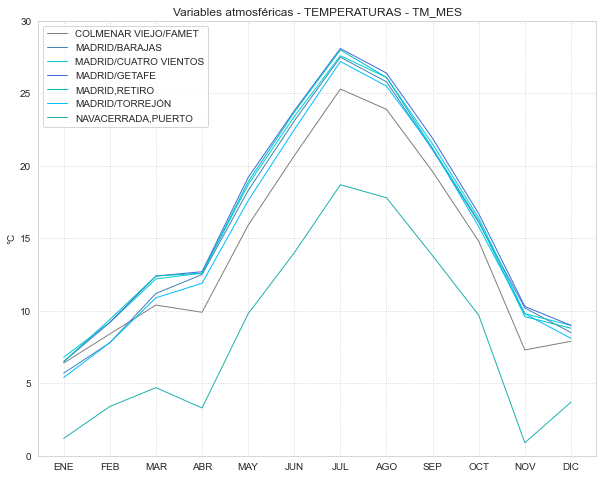

In [271]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t0 = list(temper_all.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
t1 = list(temper_all.iloc[1, 2:-2])  #MADRID/BARAJAS
t2 = list(temper_all.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
t3 = list(temper_all.iloc[3, 2:-2])  #MADRID/GETAFE	
t4 = list(temper_all.iloc[4, 2:-2])  #MADRID,RETIRO
t5 = list(temper_all.iloc[5, 2:-2])  #MADRID/TORREJÓN
t6 = list(temper_all.iloc[6, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("°C")
ax.set_title("Variables atmosféricas - TEMPERATURAS - TM_MES");

plt.plot(meses, t0, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, t1, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, t2, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, t3, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, t4, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, t5, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, t6, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,30);
plt.legend(loc="upper left");

In [272]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
temp_TM_MES = temper_all[temper_all["Tipo"]== "TM_MES"]
TM_MES = list(temp_TM_MES.mean())
TM_MES[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[5.500000000000001,
 7.885714285714284,
 10.6,
 10.785714285714286,
 16.914285714285715,
 21.599999999999998,
 26.057142857142853,
 24.514285714285716,
 20.042857142857144,
 15.1,
 8.27142857142857,
 7.8571428571428585]

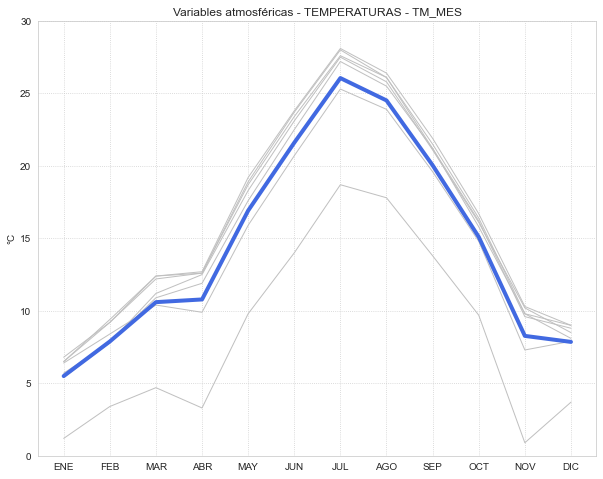

In [273]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t0 = list(temper_all.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
t1 = list(temper_all.iloc[1, 2:-2])  #MADRID/BARAJAS
t2 = list(temper_all.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
t3 = list(temper_all.iloc[3, 2:-2])  #MADRID/GETAFE	
t4 = list(temper_all.iloc[4, 2:-2])  #MADRID,RETIRO
t5 = list(temper_all.iloc[5, 2:-2])  #MADRID/TORREJÓN
t6 = list(temper_all.iloc[6, 2:-2])  #NAVACERRADA,PUERTO
ymedia = TM_MES[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("°C")
ax.set_title("Variables atmosféricas - TEMPERATURAS - TM_MES");

plt.plot(meses, t0, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t1, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t2, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t3, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t4, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, t5, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t6, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')


plt.ylim(0,30);


#### gráfico TM_MAX

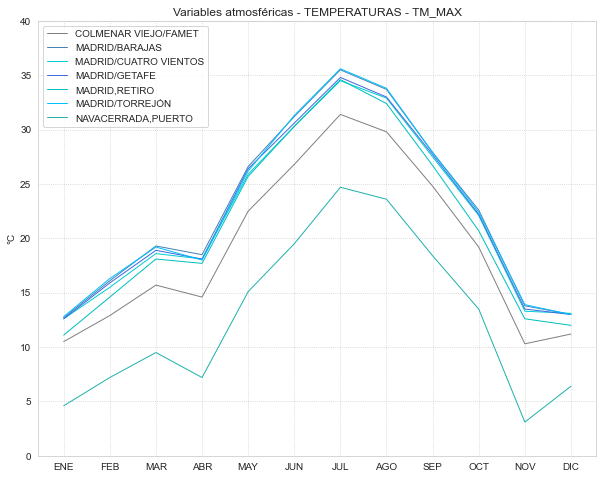

In [274]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t7 = list(temper_all.iloc[7, 2:-2])  #COLMENAR VIEJO/FAMET
t8 = list(temper_all.iloc[8, 2:-2])  #MADRID/BARAJAS
t9 = list(temper_all.iloc[9, 2:-2])  #MADRID/CUATRO VIENTOS
t10 = list(temper_all.iloc[10, 2:-2])  #MADRID/GETAFE	
t11 = list(temper_all.iloc[11, 2:-2])  #MADRID,RETIRO
t12 = list(temper_all.iloc[12, 2:-2])  #MADRID/TORREJÓN
t13 = list(temper_all.iloc[13, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("°C")
ax.set_title("Variables atmosféricas - TEMPERATURAS - TM_MAX");

plt.plot(meses, t7, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, t8, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, t9, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, t10, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, t11, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, t12, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, t13, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,40);
plt.legend(loc="upper left");

In [275]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
temp_TM_MAX = temper_all[temper_all["Tipo"]== "TM_MAX"]
TM_MAX = list(temp_TM_MAX.mean())
TM_MAX[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[10.985714285714284,
 14.071428571428571,
 17.04285714285714,
 16.028571428571432,
 24.057142857142857,
 28.571428571428577,
 33.01428571428571,
 31.314285714285717,
 25.842857142857145,
 20.385714285714283,
 11.5,
 11.671428571428573]

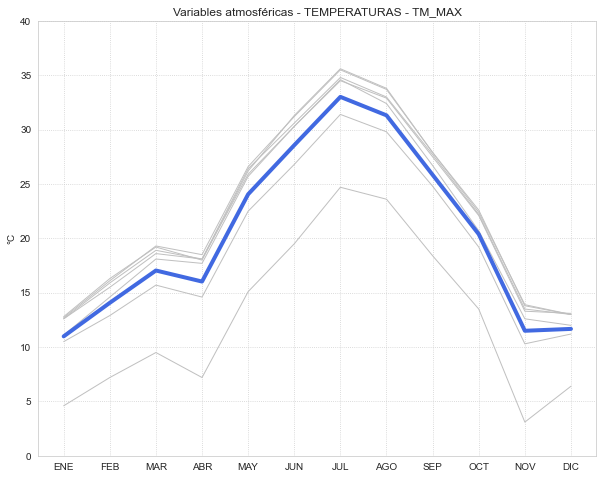

In [276]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t7 = list(temper_all.iloc[7, 2:-2])  #COLMENAR VIEJO/FAMET
t8 = list(temper_all.iloc[8, 2:-2])  #MADRID/BARAJAS
t9 = list(temper_all.iloc[9, 2:-2])  #MADRID/CUATRO VIENTOS
t10 = list(temper_all.iloc[10, 2:-2])  #MADRID/GETAFE	
t11 = list(temper_all.iloc[11, 2:-2])  #MADRID,RETIRO
t12 = list(temper_all.iloc[12, 2:-2])  #MADRID/TORREJÓN
t13 = list(temper_all.iloc[13, 2:-2])  #NAVACERRADA,PUERTO
ymedia = TM_MAX[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("°C")
ax.set_title("Variables atmosféricas - TEMPERATURAS - TM_MAX");

plt.plot(meses, t7, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t8, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t9, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t10, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t11, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, t12, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t13, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(0,40);

#### gráfico TM_MIN

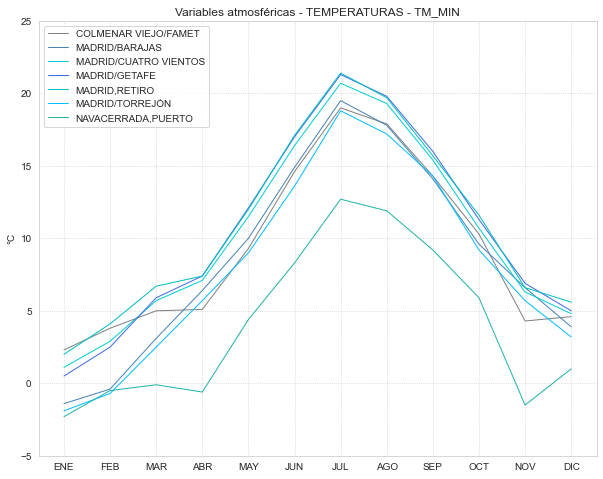

In [277]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t14 = list(temper_all.iloc[14, 2:-2])  #COLMENAR VIEJO/FAMET
t15 = list(temper_all.iloc[15, 2:-2])  #MADRID/BARAJAS
t16 = list(temper_all.iloc[16, 2:-2])  #MADRID/CUATRO VIENTOS
t17 = list(temper_all.iloc[17, 2:-2])  #MADRID/GETAFE	
t18 = list(temper_all.iloc[18, 2:-2])  #MADRID,RETIRO
t19 = list(temper_all.iloc[19, 2:-2])  #MADRID/TORREJÓN
t20 = list(temper_all.iloc[20, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("°C")
ax.set_title("Variables atmosféricas - TEMPERATURAS - TM_MIN");

plt.plot(meses, t14, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, t15, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, t16, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, t17, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, t18, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, t19, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, t20, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(-5,25);
plt.legend(loc="upper left");

In [278]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
temp_TM_MIN = temper_all[temper_all["Tipo"]== "TM_MIN"]
TM_MIN = list(temp_TM_MIN.mean())
TM_MIN[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[0.04285714285714289,
 1.6714285714285715,
 4.114285714285715,
 5.5,
 9.757142857142856,
 14.557142857142855,
 19.057142857142857,
 17.65714285714286,
 14.142857142857142,
 9.8,
 4.985714285714287,
 4.014285714285714]

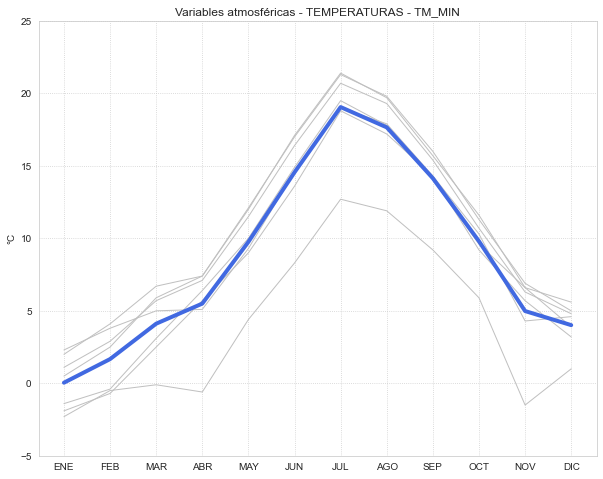

In [279]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t14 = list(temper_all.iloc[14, 2:-2])  #COLMENAR VIEJO/FAMET
t15 = list(temper_all.iloc[15, 2:-2])  #MADRID/BARAJAS
t16 = list(temper_all.iloc[16, 2:-2])  #MADRID/CUATRO VIENTOS
t17 = list(temper_all.iloc[17, 2:-2])  #MADRID/GETAFE	
t18 = list(temper_all.iloc[18, 2:-2])  #MADRID,RETIRO
t19 = list(temper_all.iloc[19, 2:-2])  #MADRID/TORREJÓN
t20 = list(temper_all.iloc[20, 2:-2])  #NAVACERRADA,PUERTO
ymedia = TM_MIN[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("°C")
ax.set_title("Variables atmosféricas - TEMPERATURAS - TM_MIN");

plt.plot(meses, t14, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t15, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t16, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t17, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t18, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, t19, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t20, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(-5,25);

#### gráfico TA_MAX

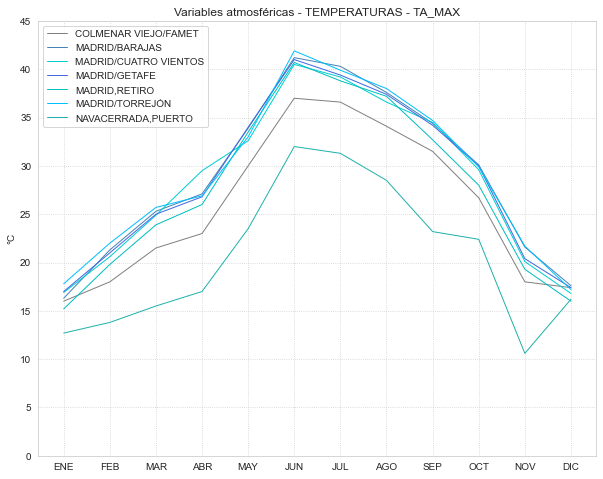

In [280]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t21 = list(temper_all.iloc[21, 2:-2])  #COLMENAR VIEJO/FAMET
t22 = list(temper_all.iloc[22, 2:-2])  #MADRID/BARAJAS
t23 = list(temper_all.iloc[23, 2:-2])  #MADRID/CUATRO VIENTOS
t24 = list(temper_all.iloc[24, 2:-2])  #MADRID/GETAFE	
t25 = list(temper_all.iloc[25, 2:-2])  #MADRID,RETIRO
t26 = list(temper_all.iloc[26, 2:-2])  #MADRID/TORREJÓN
t27 = list(temper_all.iloc[27, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("°C")
ax.set_title("Variables atmosféricas - TEMPERATURAS - TA_MAX");

plt.plot(meses, t21, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, t22, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, t23, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, t24, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, t25, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, t26, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, t27, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,45);
plt.legend(loc="upper left");

In [281]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
temp_TA_MAX = temper_all[temper_all["Tipo"]== "TA_MAX"]
TA_MAX = list(temp_TA_MAX.mean())
TA_MAX[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[15.985714285714284,
 19.5,
 23.11428571428571,
 25.185714285714283,
 31.5,
 39.185714285714276,
 37.92857142857143,
 35.62857142857143,
 32.17142857142857,
 28.1,
 18.814285714285713,
 16.942857142857143]

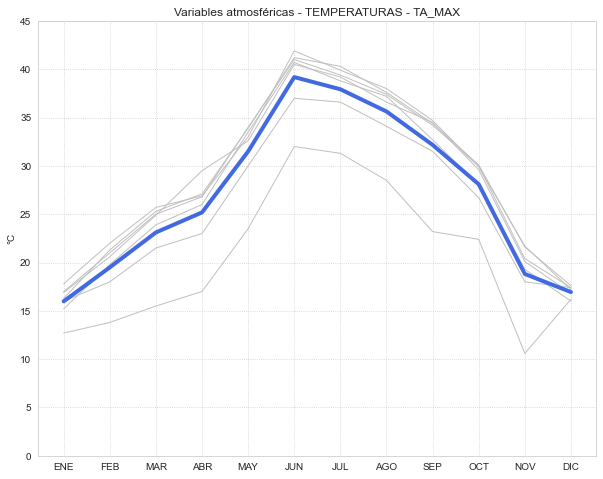

In [282]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t21 = list(temper_all.iloc[21, 2:-2])  #COLMENAR VIEJO/FAMET
t22 = list(temper_all.iloc[22, 2:-2])  #MADRID/BARAJAS
t23 = list(temper_all.iloc[23, 2:-2])  #MADRID/CUATRO VIENTOS
t24 = list(temper_all.iloc[24, 2:-2])  #MADRID/GETAFE	
t25 = list(temper_all.iloc[25, 2:-2])  #MADRID,RETIRO
t26 = list(temper_all.iloc[26, 2:-2])  #MADRID/TORREJÓN
t27 = list(temper_all.iloc[27, 2:-2])  #NAVACERRADA,PUERTO
ymedia = TA_MAX[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("°C")
ax.set_title("Variables atmosféricas - TEMPERATURAS - TA_MAX");

plt.plot(meses, t21, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t22, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t23, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t24, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t25, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, t26, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t27, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(0,45);

#### gráfico TA_MIN

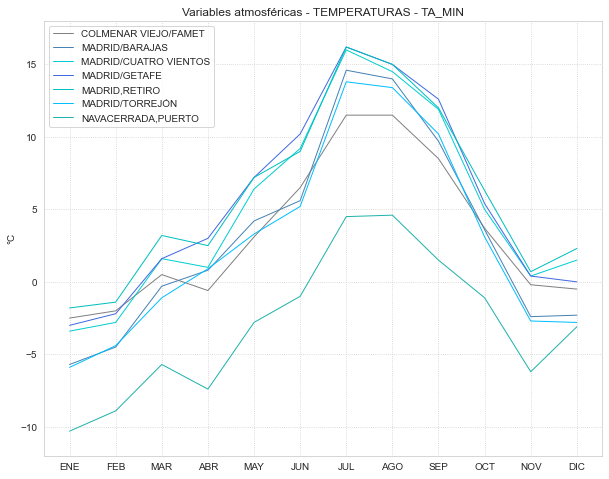

In [283]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t28 = list(temper_all.iloc[28, 2:-2])  #COLMENAR VIEJO/FAMET
t29 = list(temper_all.iloc[29, 2:-2])  #MADRID/BARAJAS
t30 = list(temper_all.iloc[30, 2:-2])  #MADRID/CUATRO VIENTOS
t31 = list(temper_all.iloc[31, 2:-2])  #MADRID/GETAFE	
t32 = list(temper_all.iloc[32, 2:-2])  #MADRID,RETIRO
t33 = list(temper_all.iloc[33, 2:-2])  #MADRID/TORREJÓN
t34 = list(temper_all.iloc[34, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("°C")
ax.set_title("Variables atmosféricas - TEMPERATURAS - TA_MIN");

plt.plot(meses, t28, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, t29, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, t30, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, t31, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, t32, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, t33, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, t34, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(-12,18);
plt.legend(loc="upper left");

In [284]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
temp_TA_MIN = temper_all[temper_all["Tipo"]== "TA_MIN"]
TA_MIN = list(temp_TA_MIN.mean())
TA_MIN[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[-4.657142857142857,
 -3.7428571428571433,
 -0.0285714285714286,
 0.0285714285714286,
 4.085714285714286,
 6.385714285714286,
 13.257142857142856,
 12.571428571428571,
 9.485714285714286,
 3.714285714285715,
 -1.4285714285714286,
 -0.7000000000000001]

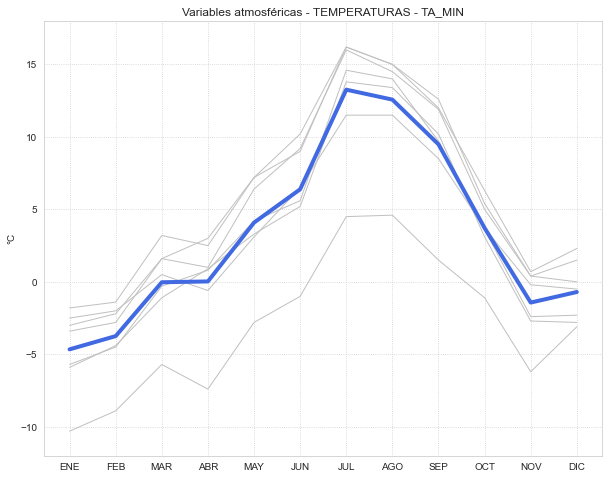

In [285]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t28 = list(temper_all.iloc[28, 2:-2])  #COLMENAR VIEJO/FAMET
t29 = list(temper_all.iloc[29, 2:-2])  #MADRID/BARAJAS
t30 = list(temper_all.iloc[30, 2:-2])  #MADRID/CUATRO VIENTOS
t31 = list(temper_all.iloc[31, 2:-2])  #MADRID/GETAFE	
t32 = list(temper_all.iloc[32, 2:-2])  #MADRID,RETIRO
t33 = list(temper_all.iloc[33, 2:-2])  #MADRID/TORREJÓN
t34 = list(temper_all.iloc[34, 2:-2])  #NAVACERRADA,PUERTO
ymedia = TA_MIN[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("°C")
ax.set_title("Variables atmosféricas - TEMPERATURAS - TA_MIN");

plt.plot(meses, t28, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t29, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t30, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t31, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t32, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, t33, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t34, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(-12,18);

#### gráfico TS_MIN

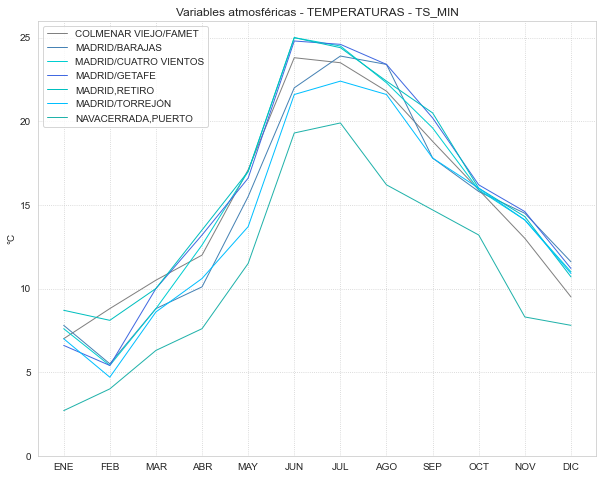

In [286]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t35 = list(temper_all.iloc[35, 2:-2])  #COLMENAR VIEJO/FAMET
t36 = list(temper_all.iloc[36, 2:-2])  #MADRID/BARAJAS
t37 = list(temper_all.iloc[37, 2:-2])  #MADRID/CUATRO VIENTOS
t38 = list(temper_all.iloc[38, 2:-2])  #MADRID/GETAFE	
t39 = list(temper_all.iloc[39, 2:-2])  #MADRID,RETIRO
t40 = list(temper_all.iloc[40, 2:-2])  #MADRID/TORREJÓN
t41 = list(temper_all.iloc[41, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("°C")
ax.set_title("Variables atmosféricas - TEMPERATURAS - TS_MIN");

plt.plot(meses, t35, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, t36, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, t37, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, t38, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, t39, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, t40, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, t41, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(0,26);
plt.legend(loc="upper left");

In [287]:
## Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
temp_TS_MIN = temper_all[temper_all["Tipo"]== "TS_MIN"]
TS_MIN = list(temp_TS_MIN.mean())
TS_MIN[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[6.771428571428572,
 5.985714285714287,
 9.0,
 11.37142857142857,
 15.485714285714286,
 23.071428571428573,
 23.314285714285717,
 21.585714285714285,
 18.485714285714288,
 15.571428571428571,
 13.27142857142857,
 10.385714285714286]

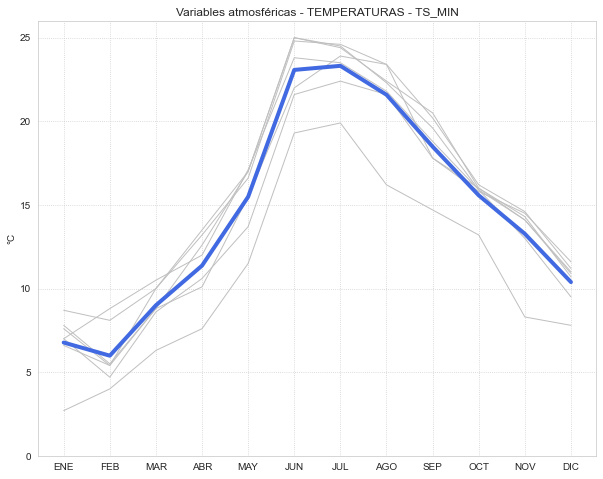

In [288]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t35 = list(temper_all.iloc[35, 2:-2])  #COLMENAR VIEJO/FAMET
t36 = list(temper_all.iloc[36, 2:-2])  #MADRID/BARAJAS
t37 = list(temper_all.iloc[37, 2:-2])  #MADRID/CUATRO VIENTOS
t38 = list(temper_all.iloc[38, 2:-2])  #MADRID/GETAFE	
t39 = list(temper_all.iloc[39, 2:-2])  #MADRID,RETIRO
t40 = list(temper_all.iloc[40, 2:-2])  #MADRID/TORREJÓN
t41 = list(temper_all.iloc[41, 2:-2])  #NAVACERRADA,PUERTO
ymedia = TS_MIN[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("°C")
ax.set_title("Variables atmosféricas - TEMPERATURAS - TS_MIN");

plt.plot(meses, t35, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t36, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t37, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t38, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t39, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, t40, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t41, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(0,26);

#### gráfico TI_MAX

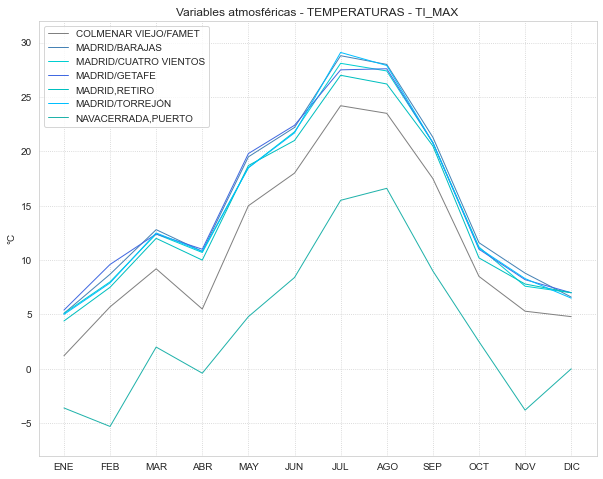

In [289]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t42 = list(temper_all.iloc[42, 2:-2])  #COLMENAR VIEJO/FAMET
t43 = list(temper_all.iloc[43, 2:-2])  #MADRID/BARAJAS
t44 = list(temper_all.iloc[44, 2:-2])  #MADRID/CUATRO VIENTOS
t45 = list(temper_all.iloc[45, 2:-2])  #MADRID/GETAFE	
t46 = list(temper_all.iloc[46, 2:-2])  #MADRID,RETIRO
t47 = list(temper_all.iloc[47, 2:-2])  #MADRID/TORREJÓN
t48 = list(temper_all.iloc[48, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("°C")
ax.set_title("Variables atmosféricas - TEMPERATURAS - TI_MAX");

plt.plot(meses, t42, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, t43, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, t44, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, t45, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, t46, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, t47, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, t48, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(-8,32);
plt.legend(loc="upper left");

In [290]:
# Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
temp_TI_MAX = temper_all[temper_all["Tipo"]== "TI_MAX"]
TI_MAX = list(temp_TI_MAX.mean())
TI_MAX[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[3.2285714285714278,
 6.014285714285714,
 10.471428571428572,
 8.342857142857143,
 16.4,
 19.357142857142858,
 25.74285714285714,
 25.314285714285713,
 18.67142857142857,
 9.442857142857141,
 6.028571428571429,
 5.557142857142857]

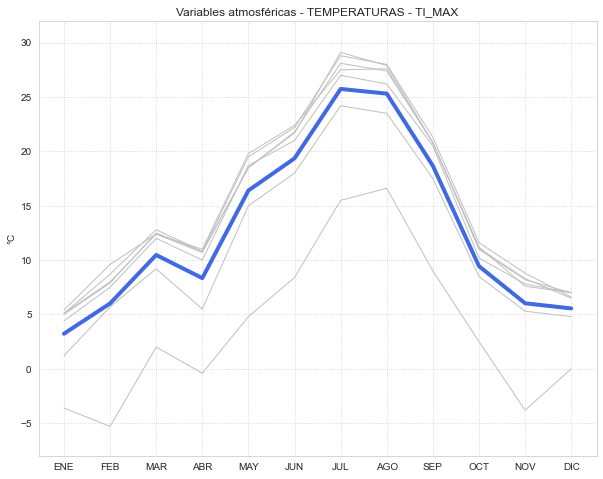

In [291]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t42 = list(temper_all.iloc[42, 2:-2])  #COLMENAR VIEJO/FAMET
t43 = list(temper_all.iloc[43, 2:-2])  #MADRID/BARAJAS
t44 = list(temper_all.iloc[44, 2:-2])  #MADRID/CUATRO VIENTOS
t45 = list(temper_all.iloc[45, 2:-2])  #MADRID/GETAFE	
t46 = list(temper_all.iloc[46, 2:-2])  #MADRID,RETIRO
t47 = list(temper_all.iloc[47, 2:-2])  #MADRID/TORREJÓN
t48 = list(temper_all.iloc[48, 2:-2])  #NAVACERRADA,PUERTO
ymedia = TI_MAX[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("°C")
ax.set_title("Variables atmosféricas - TEMPERATURAS - TI_MAX");

plt.plot(meses, t42, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t43, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t44, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t45, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t46, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, t47, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t48, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(-8,32);

#### gráfico NT_30

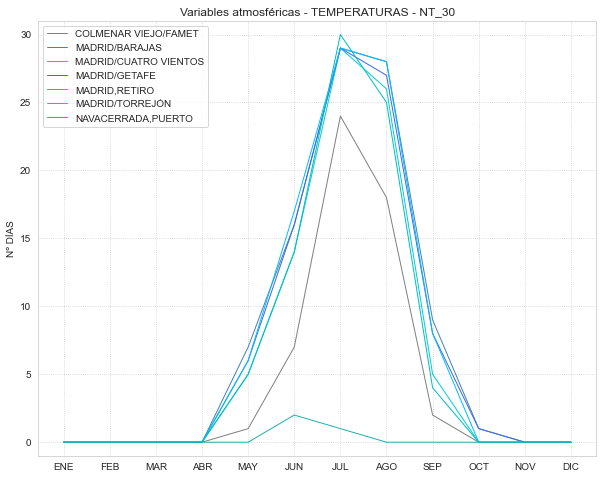

In [292]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t49 = list(temper_all.iloc[49, 2:-2])  #COLMENAR VIEJO/FAMET
t50 = list(temper_all.iloc[50, 2:-2])  #MADRID/BARAJAS
t51 = list(temper_all.iloc[51, 2:-2])  #MADRID/CUATRO VIENTOS
t52 = list(temper_all.iloc[52, 2:-2])  #MADRID/GETAFE	
t53 = list(temper_all.iloc[53, 2:-2])  #MADRID,RETIRO
t54 = list(temper_all.iloc[54, 2:-2])  #MADRID/TORREJÓN
t55 = list(temper_all.iloc[55, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - TEMPERATURAS - NT_30");

plt.plot(meses, t49, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, t50, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, t51, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, t52, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, t53, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, t54, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, t55, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(-1,31);
plt.legend(loc="upper left");

In [293]:
# Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
temp_NT_30 = temper_all[temper_all["Tipo"]== "NT_30"]
NT_30 = list(temp_NT_30.mean())
NT_30[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[0.0,
 0.0,
 0.0,
 0.0,
 4.285714285714286,
 12.285714285714286,
 24.428571428571427,
 21.714285714285715,
 5.142857142857143,
 0.2857142857142857,
 0.0,
 0.0]

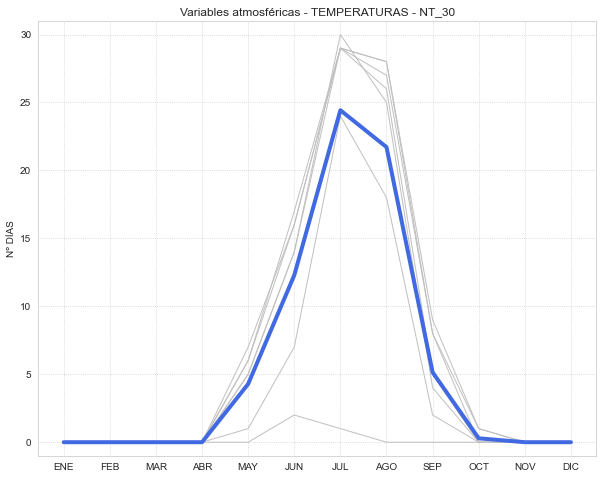

In [294]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t49 = list(temper_all.iloc[49, 2:-2])  #COLMENAR VIEJO/FAMET
t50 = list(temper_all.iloc[50, 2:-2])  #MADRID/BARAJAS
t51 = list(temper_all.iloc[51, 2:-2])  #MADRID/CUATRO VIENTOS
t52 = list(temper_all.iloc[52, 2:-2])  #MADRID/GETAFE	
t53 = list(temper_all.iloc[53, 2:-2])  #MADRID,RETIRO
t54 = list(temper_all.iloc[54, 2:-2])  #MADRID/TORREJÓN
t55 = list(temper_all.iloc[55, 2:-2])  #NAVACERRADA,PUERTO
ymedia = NT_30[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - TEMPERATURAS - NT_30");

plt.plot(meses, t49, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t50, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t51, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t52, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t53, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, t54, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t55, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(-1,31);

#### gráfico NT_00

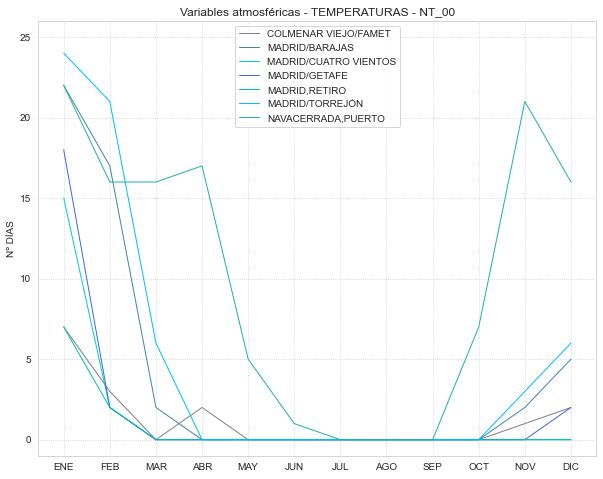

In [295]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t56 = list(temper_all.iloc[56, 2:-2])  #COLMENAR VIEJO/FAMET
t57 = list(temper_all.iloc[57, 2:-2])  #MADRID/BARAJAS
t58 = list(temper_all.iloc[58, 2:-2])  #MADRID/CUATRO VIENTOS
t59 = list(temper_all.iloc[59, 2:-2])  #MADRID/GETAFE	
t60 = list(temper_all.iloc[60, 2:-2])  #MADRID,RETIRO
t61 = list(temper_all.iloc[61, 2:-2])  #MADRID/TORREJÓN
t62 = list(temper_all.iloc[62, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - TEMPERATURAS - NT_00");

plt.plot(meses, t56, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, t57, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, t58, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, t59, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, t60, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, t61, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, t62, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(-1,26);
plt.legend(loc="upper center");

In [296]:
# Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
temp_NT_00 = temper_all[temper_all["Tipo"]== "NT_00"]
NT_00 = list(temp_NT_00.mean())
NT_00[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[16.428571428571427,
 9.0,
 3.4285714285714284,
 2.7142857142857144,
 0.7142857142857143,
 0.14285714285714285,
 0.0,
 0.0,
 0.0,
 1.0,
 3.857142857142857,
 4.428571428571429]

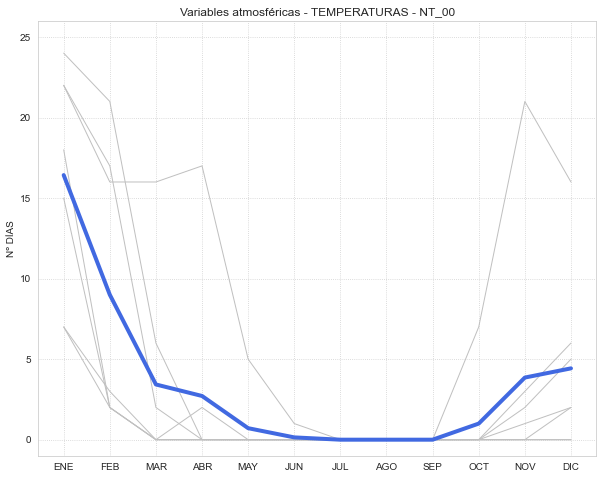

In [297]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(temper_all.columns.values)[2:-2]
t56 = list(temper_all.iloc[56, 2:-2])  #COLMENAR VIEJO/FAMET
t57 = list(temper_all.iloc[57, 2:-2])  #MADRID/BARAJAS
t58 = list(temper_all.iloc[58, 2:-2])  #MADRID/CUATRO VIENTOS
t59 = list(temper_all.iloc[59, 2:-2])  #MADRID/GETAFE	
t60 = list(temper_all.iloc[60, 2:-2])  #MADRID,RETIRO
t61 = list(temper_all.iloc[61, 2:-2])  #MADRID/TORREJÓN
t62 = list(temper_all.iloc[62, 2:-2])  #NAVACERRADA,PUERTO
ymedia = NT_00[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - TEMPERATURAS - NT_00");

plt.plot(meses, t56, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t57, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t58, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t59, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t60, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, t61, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, t62, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(-1,26);

## 2.7 Mensuales climatologico 2019 - Viento

#### Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...

In [298]:
## Mensuales climatologico 2019 - Viento
##  NW_55_   Nº de días de velocidad del viento mayor o igual a 55 Km/h en el mes/año   (Nº DIAS)

### cargo el df entero:
NW_55_2019 = pd.read_csv(csv_folder + "\\NW_55_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
NW_55_2019_mad = pd.merge(ind_mad, NW_55_2019, how= "inner", on=["Indicativo"])
NW_55_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    6.0      3.0    3.0    8.0   2.0   
1       3129         MADRID/BARAJAS    NaN      NaN    NaN    NaN   6.0   
2       3196  MADRID/CUATRO VIENTOS    6.0      2.0    1.0    7.0   3.0   
3       3200          MADRID/GETAFE    5.0      3.0    2.0    NaN   NaN   
4       3195          MADRID,RETIRO    NaN      NaN    1.0    1.0   2.0   
5       3175        MADRID/TORREJÓN    NaN      3.0    3.0    7.0   3.0   
6       2462     NAVACERRADA,PUERTO   11.0      NaN    6.0   17.0   NaN   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0    3.0    3.0     NaN         4.0      NaN        9.0        6.0    NaN  
1    7.0    7.0     NaN         NaN      NaN        NaN        6.0    NaN  
2    6.0    1.0     2.0         1.0      3.0        7.0        NaN    NaN  
3    4.0    2.0     2.0         5.0      2.0       11.0        5.0    NaN  
4    0.0    0.0     1.0         2.0      1.0        2.0        NaN    NaN  
5    6.0    5.0     5.0         4.0      NaN        8.0        NaN    NaN  
6   14.0    6.0     NaN         6.0      NaN       24.0       12.0    NaN

In [299]:
# borro la columna "anual", está llena de NaN y no me sirve
NW_55_2019_mad.drop("anual", inplace=True, axis=1)
NW_55_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    6.0      3.0    3.0    8.0   2.0   
1       3129         MADRID/BARAJAS    NaN      NaN    NaN    NaN   6.0   
2       3196  MADRID/CUATRO VIENTOS    6.0      2.0    1.0    7.0   3.0   
3       3200          MADRID/GETAFE    5.0      3.0    2.0    NaN   NaN   
4       3195          MADRID,RETIRO    NaN      NaN    1.0    1.0   2.0   
5       3175        MADRID/TORREJÓN    NaN      3.0    3.0    7.0   3.0   
6       2462     NAVACERRADA,PUERTO   11.0      NaN    6.0   17.0   NaN   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    3.0    3.0     NaN         4.0      NaN        9.0        6.0  
1    7.0    7.0     NaN         NaN      NaN        NaN        6.0  
2    6.0    1.0     2.0         1.0      3.0        7.0        NaN  
3    4.0    2.0     2.0         5.0      2.0       11.0        5.0  
4    0.0    0.0     1.0         2.0      1.0        2.0        NaN  
5    6.0    5.0     5.0         4.0      NaN        8.0        NaN  
6   14.0    6.0     NaN         6.0      NaN       24.0       12.0

In [300]:
##tengo varios NaNs, pero los puedo rellenar con los valores medios de cada columna
NW_55_2019_mad.describe()


enero  febrero     marzo      abril      mayo      junio     julio  \
count   4.000000     4.00  6.000000   5.000000  5.000000   7.000000  7.000000   
mean    7.000000     2.75  2.666667   8.000000  3.200000   5.714286  3.428571   
std     2.708013     0.50  1.861899   5.744563  1.643168   4.347961  2.636737   
min     5.000000     2.00  1.000000   1.000000  2.000000   0.000000  0.000000   
25%     5.750000     2.75  1.250000   7.000000  2.000000   3.500000  1.500000   
50%     6.000000     3.00  2.500000   7.000000  3.000000   6.000000  3.000000   
75%     7.250000     3.00  3.000000   8.000000  3.000000   6.500000  5.500000   
max    11.000000     3.00  6.000000  17.000000  6.000000  14.000000  7.000000   

         agosto  septiembre  octubre  noviembre  diciembre  
count  4.000000    6.000000      3.0   6.000000   4.000000  
mean   2.500000    3.666667      2.0  10.166667   7.250000  
std    1.732051    1.861899      1.0   7.413951   3.201562  
min    1.000000    1.000000      1.0   2.000000   5.000000  
25%    1.750000    2.500000      1.5   7.250000   5.750000  
50%    2.000000    4.000000      2.0   8.500000   6.000000  
75%    2.750000    4.750000      2.5  10.500000   7.500000  
max    5.000000    6.000000      3.0  24.000000  12.000000

In [301]:
NW_55_2019_mad["enero"].fillna(7.0, inplace=True)  
NW_55_2019_mad

NW_55_2019_mad["febrero"].fillna(2.7, inplace=True)  
NW_55_2019_mad

NW_55_2019_mad["marzo"].fillna(2.6, inplace=True)  
NW_55_2019_mad

NW_55_2019_mad["abril"].fillna(8.0, inplace=True)  
NW_55_2019_mad

NW_55_2019_mad["mayo"].fillna(3.2, inplace=True)  
NW_55_2019_mad

NW_55_2019_mad["agosto"].fillna(2.5, inplace=True)  
NW_55_2019_mad

NW_55_2019_mad["septiembre"].fillna(3.6, inplace=True)  
NW_55_2019_mad

NW_55_2019_mad["octubre"].fillna(2.0, inplace=True)  
NW_55_2019_mad

NW_55_2019_mad["noviembre"].fillna(10.1, inplace=True)  
NW_55_2019_mad

NW_55_2019_mad["diciembre"].fillna(7.2, inplace=True)  
NW_55_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    6.0      3.0    3.0    8.0   2.0   
1       3129         MADRID/BARAJAS    7.0      2.7    2.6    8.0   6.0   
2       3196  MADRID/CUATRO VIENTOS    6.0      2.0    1.0    7.0   3.0   
3       3200          MADRID/GETAFE    5.0      3.0    2.0    8.0   3.2   
4       3195          MADRID,RETIRO    7.0      2.7    1.0    1.0   2.0   
5       3175        MADRID/TORREJÓN    7.0      3.0    3.0    7.0   3.0   
6       2462     NAVACERRADA,PUERTO   11.0      2.7    6.0   17.0   3.2   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    3.0    3.0     2.5         4.0      2.0        9.0        6.0  
1    7.0    7.0     2.5         3.6      2.0       10.1        6.0  
2    6.0    1.0     2.0         1.0      3.0        7.0        7.2  
3    4.0    2.0     2.0         5.0      2.0       11.0        5.0  
4    0.0    0.0     1.0         2.0      1.0        2.0        7.2  
5    6.0    5.0     5.0         4.0      2.0        8.0        7.2  
6   14.0    6.0     2.5         6.0      2.0       24.0       12.0

In [302]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio de días al año donde la velocidad del viento fue mayor o igual a 55 Km/h

NW_55_2019_mad.loc[:,"media anual"] = round(NW_55_2019_mad.mean(axis=1), 2)  ## como son dias, los quiero redondeados enteros
NW_55_2019_mad.head()

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    6.0      3.0    3.0    8.0   2.0   
1       3129         MADRID/BARAJAS    7.0      2.7    2.6    8.0   6.0   
2       3196  MADRID/CUATRO VIENTOS    6.0      2.0    1.0    7.0   3.0   
3       3200          MADRID/GETAFE    5.0      3.0    2.0    8.0   3.2   
4       3195          MADRID,RETIRO    7.0      2.7    1.0    1.0   2.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    3.0    3.0     2.5         4.0      2.0        9.0        6.0   
1    7.0    7.0     2.5         3.6      2.0       10.1        6.0   
2    6.0    1.0     2.0         1.0      3.0        7.0        7.2   
3    4.0    2.0     2.0         5.0      2.0       11.0        5.0   
4    0.0    0.0     1.0         2.0      1.0        2.0        7.2   

   media anual  
0         4.29  
1         5.38  
2         3.85  
3         4.35  
4         2.24

In [303]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
NW_55_2019_mad["Tipo"] = "NW_55"
NW_55_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    6.0      3.0    3.0    8.0   2.0   
1       3129         MADRID/BARAJAS    7.0      2.7    2.6    8.0   6.0   
2       3196  MADRID/CUATRO VIENTOS    6.0      2.0    1.0    7.0   3.0   
3       3200          MADRID/GETAFE    5.0      3.0    2.0    8.0   3.2   
4       3195          MADRID,RETIRO    7.0      2.7    1.0    1.0   2.0   
5       3175        MADRID/TORREJÓN    7.0      3.0    3.0    7.0   3.0   
6       2462     NAVACERRADA,PUERTO   11.0      2.7    6.0   17.0   3.2   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    3.0    3.0     2.5         4.0      2.0        9.0        6.0   
1    7.0    7.0     2.5         3.6      2.0       10.1        6.0   
2    6.0    1.0     2.0         1.0      3.0        7.0        7.2   
3    4.0    2.0     2.0         5.0      2.0       11.0        5.0   
4    0.0    0.0     1.0         2.0      1.0        2.0        7.2   
5    6.0    5.0     5.0         4.0      2.0        8.0        7.2   
6   14.0    6.0     2.5         6.0      2.0       24.0       12.0   

   media anual   Tipo  
0         4.29  NW_55  
1         5.38  NW_55  
2         3.85  NW_55  
3         4.35  NW_55  
4         2.24  NW_55  
5         5.02  NW_55  
6         8.87  NW_55

In [304]:
## Renombro los meses para que salgan mejor en los gráficos
NW_55_2019_mad.columns = ["Indicativo", "NOMBRE", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC","media anual", "Tipo"]
pd.DataFrame(NW_55_2019_mad).head()

Indicativo                 NOMBRE  ENE  FEB  MAR  ABR  MAY  JUN  JUL  AGO  \
0      3191E   COLMENAR VIEJO/FAMET  6.0  3.0  3.0  8.0  2.0  3.0  3.0  2.5   
1       3129         MADRID/BARAJAS  7.0  2.7  2.6  8.0  6.0  7.0  7.0  2.5   
2       3196  MADRID/CUATRO VIENTOS  6.0  2.0  1.0  7.0  3.0  6.0  1.0  2.0   
3       3200          MADRID/GETAFE  5.0  3.0  2.0  8.0  3.2  4.0  2.0  2.0   
4       3195          MADRID,RETIRO  7.0  2.7  1.0  1.0  2.0  0.0  0.0  1.0   

   SEP  OCT   NOV  DIC  media anual   Tipo  
0  4.0  2.0   9.0  6.0         4.29  NW_55  
1  3.6  2.0  10.1  6.0         5.38  NW_55  
2  1.0  3.0   7.0  7.2         3.85  NW_55  
3  5.0  2.0  11.0  5.0         4.35  NW_55  
4  2.0  1.0   2.0  7.2         2.24  NW_55

In [305]:
NW_55_2019_mad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   7 non-null      object 
 1   NOMBRE       7 non-null      object 
 2   ENE          7 non-null      float64
 3   FEB          7 non-null      float64
 4   MAR          7 non-null      float64
 5   ABR          7 non-null      float64
 6   MAY          7 non-null      float64
 7   JUN          7 non-null      float64
 8   JUL          7 non-null      float64
 9   AGO          7 non-null      float64
 10  SEP          7 non-null      float64
 11  OCT          7 non-null      float64
 12  NOV          7 non-null      float64
 13  DIC          7 non-null      float64
 14  media anual  7 non-null      float64
 15  Tipo         7 non-null      object 
dtypes: float64(13), object(3)
memory usage: 952.0+ bytes


In [306]:
# Mensuales climatologico 2019 - Viento
##  NW_91_   Nº de días de velocidad del viento mayor o igual a 91 Km/h en el mes/año  (Nº DIAS)

### cargo el df entero:
NW_91_2019 = pd.read_csv(csv_folder + "\\NW_91_2019.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
NW_91_2019_mad = pd.merge(ind_mad, NW_91_2019, how= "inner", on=["Indicativo"])
NW_91_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0    0.0   0.0   
1       3129         MADRID/BARAJAS    NaN      NaN    NaN    NaN   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0    0.0   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0    NaN   NaN   
4       3195          MADRID,RETIRO    NaN      NaN    0.0    0.0   0.0   
5       3175        MADRID/TORREJÓN    NaN      0.0    0.0    0.0   0.0   
6       2462     NAVACERRADA,PUERTO    3.0      NaN    1.0    4.0   NaN   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  anual  
0    0.0    0.0     NaN         0.0      NaN        0.0        3.0    NaN  
1    0.0    1.0     NaN         NaN      NaN        NaN        0.0    NaN  
2    0.0    0.0     0.0         0.0      0.0        0.0        NaN    NaN  
3    0.0    0.0     0.0         0.0      1.0        0.0        1.0    NaN  
4    0.0    0.0     0.0         0.0      0.0        0.0        NaN    NaN  
5    0.0    1.0     0.0         0.0      NaN        0.0        NaN    NaN  
6    0.0    0.0     NaN         0.0      NaN        2.0        7.0    NaN

In [307]:
# borro la columna "anual", está llena de NaN y no me sirve
NW_91_2019_mad.drop("anual", inplace=True, axis=1)
NW_91_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0    0.0   0.0   
1       3129         MADRID/BARAJAS    NaN      NaN    NaN    NaN   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0    0.0   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0    NaN   NaN   
4       3195          MADRID,RETIRO    NaN      NaN    0.0    0.0   0.0   
5       3175        MADRID/TORREJÓN    NaN      0.0    0.0    0.0   0.0   
6       2462     NAVACERRADA,PUERTO    3.0      NaN    1.0    4.0   NaN   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    0.0    0.0     NaN         0.0      NaN        0.0        3.0  
1    0.0    1.0     NaN         NaN      NaN        NaN        0.0  
2    0.0    0.0     0.0         0.0      0.0        0.0        NaN  
3    0.0    0.0     0.0         0.0      1.0        0.0        1.0  
4    0.0    0.0     0.0         0.0      0.0        0.0        NaN  
5    0.0    1.0     0.0         0.0      NaN        0.0        NaN  
6    0.0    0.0     NaN         0.0      NaN        2.0        7.0

In [308]:
##tengo varios NaNs, pero los puedo rellenar con los valores medios de cada columna
NW_91_2019_mad.describe()

enero  febrero     marzo     abril  mayo  junio     julio  agosto  \
count   4.00      4.0  6.000000  5.000000   5.0    7.0  7.000000     4.0   
mean    0.75      0.0  0.166667  0.800000   0.0    0.0  0.285714     0.0   
std     1.50      0.0  0.408248  1.788854   0.0    0.0  0.487950     0.0   
min     0.00      0.0  0.000000  0.000000   0.0    0.0  0.000000     0.0   
25%     0.00      0.0  0.000000  0.000000   0.0    0.0  0.000000     0.0   
50%     0.00      0.0  0.000000  0.000000   0.0    0.0  0.000000     0.0   
75%     0.75      0.0  0.000000  0.000000   0.0    0.0  0.500000     0.0   
max     3.00      0.0  1.000000  4.000000   0.0    0.0  1.000000     0.0   

       septiembre   octubre  noviembre  diciembre  
count         6.0  3.000000   6.000000   4.000000  
mean          0.0  0.333333   0.333333   2.750000  
std           0.0  0.577350   0.816497   3.095696  
min           0.0  0.000000   0.000000   0.000000  
25%           0.0  0.000000   0.000000   0.750000  
50%           0.0  0.000000   0.000000   2.000000  
75%           0.0  0.500000   0.000000   4.000000  
max           0.0  1.000000   2.000000   7.000000

In [309]:
NW_91_2019_mad["enero"].fillna(0.7, inplace=True)  
NW_91_2019_mad

NW_91_2019_mad["febrero"].fillna(0.0, inplace=True)  
NW_91_2019_mad

NW_91_2019_mad["marzo"].fillna(0.2, inplace=True)  
NW_91_2019_mad

NW_91_2019_mad["abril"].fillna(0.8, inplace=True)  
NW_91_2019_mad

NW_91_2019_mad["mayo"].fillna(0.0, inplace=True)  
NW_91_2019_mad

NW_91_2019_mad["agosto"].fillna(0.0, inplace=True)  
NW_91_2019_mad

NW_91_2019_mad["septiembre"].fillna(0.0, inplace=True)  
NW_91_2019_mad

NW_91_2019_mad["octubre"].fillna(0.3, inplace=True)  
NW_91_2019_mad

NW_91_2019_mad["noviembre"].fillna(0.3, inplace=True)  
NW_91_2019_mad

NW_91_2019_mad["diciembre"].fillna(2.75, inplace=True)  
NW_91_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0    0.0   0.0   
1       3129         MADRID/BARAJAS    0.7      0.0    0.2    0.8   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0    0.0   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0    0.8   0.0   
4       3195          MADRID,RETIRO    0.7      0.0    0.0    0.0   0.0   
5       3175        MADRID/TORREJÓN    0.7      0.0    0.0    0.0   0.0   
6       2462     NAVACERRADA,PUERTO    3.0      0.0    1.0    4.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  
0    0.0    0.0     0.0         0.0      0.3        0.0       3.00  
1    0.0    1.0     0.0         0.0      0.3        0.3       0.00  
2    0.0    0.0     0.0         0.0      0.0        0.0       2.75  
3    0.0    0.0     0.0         0.0      1.0        0.0       1.00  
4    0.0    0.0     0.0         0.0      0.0        0.0       2.75  
5    0.0    1.0     0.0         0.0      0.3        0.0       2.75  
6    0.0    0.0     0.0         0.0      0.3        2.0       7.00

In [310]:
##Ahora ,lo que sí quiero es un valor medio de todos los meses, así que creo una columna nueva y lo tengo
## lo que obtengo es un valor medio de días al año donde la velocidad del viento fue mayor o igual a 91 Km/h

NW_91_2019_mad.loc[:,"media anual"] = round(NW_91_2019_mad.mean(axis=1), 2)  
NW_91_2019_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0    0.0   0.0   
1       3129         MADRID/BARAJAS    0.7      0.0    0.2    0.8   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0    0.0   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0    0.8   0.0   
4       3195          MADRID,RETIRO    0.7      0.0    0.0    0.0   0.0   
5       3175        MADRID/TORREJÓN    0.7      0.0    0.0    0.0   0.0   
6       2462     NAVACERRADA,PUERTO    3.0      0.0    1.0    4.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    0.0     0.0         0.0      0.3        0.0       3.00   
1    0.0    1.0     0.0         0.0      0.3        0.3       0.00   
2    0.0    0.0     0.0         0.0      0.0        0.0       2.75   
3    0.0    0.0     0.0         0.0      1.0        0.0       1.00   
4    0.0    0.0     0.0         0.0      0.0        0.0       2.75   
5    0.0    1.0     0.0         0.0      0.3        0.0       2.75   
6    0.0    0.0     0.0         0.0      0.3        2.0       7.00   

   media anual  
0         0.27  
1         0.27  
2         0.23  
3         0.23  
4         0.29  
5         0.40  
6         1.44

In [311]:
## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
NW_91_2019_mad["Tipo"] = "NW_91"
NW_91_2019_mad

Indicativo                 NOMBRE  enero  febrero  marzo  abril  mayo  \
0      3191E   COLMENAR VIEJO/FAMET    0.0      0.0    0.0    0.0   0.0   
1       3129         MADRID/BARAJAS    0.7      0.0    0.2    0.8   0.0   
2       3196  MADRID/CUATRO VIENTOS    0.0      0.0    0.0    0.0   0.0   
3       3200          MADRID/GETAFE    0.0      0.0    0.0    0.8   0.0   
4       3195          MADRID,RETIRO    0.7      0.0    0.0    0.0   0.0   
5       3175        MADRID/TORREJÓN    0.7      0.0    0.0    0.0   0.0   
6       2462     NAVACERRADA,PUERTO    3.0      0.0    1.0    4.0   0.0   

   junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0    0.0    0.0     0.0         0.0      0.3        0.0       3.00   
1    0.0    1.0     0.0         0.0      0.3        0.3       0.00   
2    0.0    0.0     0.0         0.0      0.0        0.0       2.75   
3    0.0    0.0     0.0         0.0      1.0        0.0       1.00   
4    0.0    0.0     0.0         0.0      0.0        0.0       2.75   
5    0.0    1.0     0.0         0.0      0.3        0.0       2.75   
6    0.0    0.0     0.0         0.0      0.3        2.0       7.00   

   media anual   Tipo  
0         0.27  NW_91  
1         0.27  NW_91  
2         0.23  NW_91  
3         0.23  NW_91  
4         0.29  NW_91  
5         0.40  NW_91  
6         1.44  NW_91

In [312]:
## Renombro los meses para que salgan mejor en los gráficos
NW_91_2019_mad.columns = ["Indicativo", "NOMBRE", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC", "media anual", "Tipo"]
pd.DataFrame(NW_91_2019_mad).head()

Indicativo                 NOMBRE  ENE  FEB  MAR  ABR  MAY  JUN  JUL  AGO  \
0      3191E   COLMENAR VIEJO/FAMET  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       3129         MADRID/BARAJAS  0.7  0.0  0.2  0.8  0.0  0.0  1.0  0.0   
2       3196  MADRID/CUATRO VIENTOS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3       3200          MADRID/GETAFE  0.0  0.0  0.0  0.8  0.0  0.0  0.0  0.0   
4       3195          MADRID,RETIRO  0.7  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   SEP  OCT  NOV   DIC  media anual   Tipo  
0  0.0  0.3  0.0  3.00         0.27  NW_91  
1  0.0  0.3  0.3  0.00         0.27  NW_91  
2  0.0  0.0  0.0  2.75         0.23  NW_91  
3  0.0  1.0  0.0  1.00         0.23  NW_91  
4  0.0  0.0  0.0  2.75         0.29  NW_91

In [313]:
NW_91_2019_mad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indicativo   7 non-null      object 
 1   NOMBRE       7 non-null      object 
 2   ENE          7 non-null      float64
 3   FEB          7 non-null      float64
 4   MAR          7 non-null      float64
 5   ABR          7 non-null      float64
 6   MAY          7 non-null      float64
 7   JUN          7 non-null      float64
 8   JUL          7 non-null      float64
 9   AGO          7 non-null      float64
 10  SEP          7 non-null      float64
 11  OCT          7 non-null      float64
 12  NOV          7 non-null      float64
 13  DIC          7 non-null      float64
 14  media anual  7 non-null      float64
 15  Tipo         7 non-null      object 
dtypes: float64(13), object(3)
memory usage: 952.0+ bytes


In [314]:
##ahora concateno los 2 df de viento y saco uno único
# NW_55_2019_mad  ---->nº dias
# NW_91_2019_mad ---->nº dias

viento_all = pd.concat([NW_55_2019_mad,NW_91_2019_mad])
viento_all.reset_index(drop=True)

Indicativo                 NOMBRE   ENE  FEB  MAR   ABR  MAY   JUN  JUL  \
0       3191E   COLMENAR VIEJO/FAMET   6.0  3.0  3.0   8.0  2.0   3.0  3.0   
1        3129         MADRID/BARAJAS   7.0  2.7  2.6   8.0  6.0   7.0  7.0   
2        3196  MADRID/CUATRO VIENTOS   6.0  2.0  1.0   7.0  3.0   6.0  1.0   
3        3200          MADRID/GETAFE   5.0  3.0  2.0   8.0  3.2   4.0  2.0   
4        3195          MADRID,RETIRO   7.0  2.7  1.0   1.0  2.0   0.0  0.0   
5        3175        MADRID/TORREJÓN   7.0  3.0  3.0   7.0  3.0   6.0  5.0   
6        2462     NAVACERRADA,PUERTO  11.0  2.7  6.0  17.0  3.2  14.0  6.0   
7       3191E   COLMENAR VIEJO/FAMET   0.0  0.0  0.0   0.0  0.0   0.0  0.0   
8        3129         MADRID/BARAJAS   0.7  0.0  0.2   0.8  0.0   0.0  1.0   
9        3196  MADRID/CUATRO VIENTOS   0.0  0.0  0.0   0.0  0.0   0.0  0.0   
10       3200          MADRID/GETAFE   0.0  0.0  0.0   0.8  0.0   0.0  0.0   
11       3195          MADRID,RETIRO   0.7  0.0  0.0   0.0  0.0   0.0  0.0   
12       3175        MADRID/TORREJÓN   0.7  0.0  0.0   0.0  0.0   0.0  1.0   
13       2462     NAVACERRADA,PUERTO   3.0  0.0  1.0   4.0  0.0   0.0  0.0   

    AGO  SEP  OCT   NOV    DIC  media anual   Tipo  
0   2.5  4.0  2.0   9.0   6.00         4.29  NW_55  
1   2.5  3.6  2.0  10.1   6.00         5.38  NW_55  
2   2.0  1.0  3.0   7.0   7.20         3.85  NW_55  
3   2.0  5.0  2.0  11.0   5.00         4.35  NW_55  
4   1.0  2.0  1.0   2.0   7.20         2.24  NW_55  
5   5.0  4.0  2.0   8.0   7.20         5.02  NW_55  
6   2.5  6.0  2.0  24.0  12.00         8.87  NW_55  
7   0.0  0.0  0.3   0.0   3.00         0.27  NW_91  
8   0.0  0.0  0.3   0.3   0.00         0.27  NW_91  
9   0.0  0.0  0.0   0.0   2.75         0.23  NW_91  
10  0.0  0.0  1.0   0.0   1.00         0.23  NW_91  
11  0.0  0.0  0.0   0.0   2.75         0.29  NW_91  
12  0.0  0.0  0.3   0.0   2.75         0.40  NW_91  
13  0.0  0.0  0.3   2.0   7.00         1.44  NW_91

In [315]:
##guardo el dataframe
viento_all.to_csv("viento_all.csv", index=False)

### Gráficos varios

#### gráfico NW_55

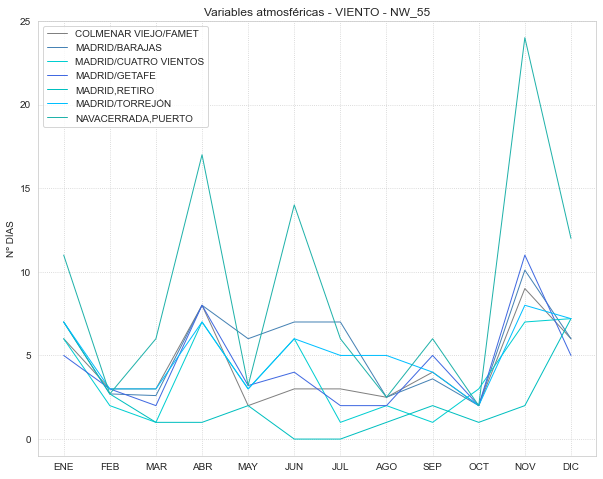

In [316]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(viento_all.columns.values)[2:-2]
w0 = list(viento_all.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
w1 = list(viento_all.iloc[1, 2:-2])  #MADRID/BARAJAS
w2 = list(viento_all.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
w3 = list(viento_all.iloc[3, 2:-2])  #MADRID/GETAFE	
w4 = list(viento_all.iloc[4, 2:-2])  #MADRID,RETIRO
w5 = list(viento_all.iloc[5, 2:-2])  #MADRID/TORREJÓN
w6 = list(viento_all.iloc[6, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - VIENTO - NW_55");

plt.plot(meses, w0, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, w1, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, w2, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, w3, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, w4, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, w5, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, w6, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(-1,25);
plt.legend(loc="upper left");

In [317]:
# Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
viento_NW_55 = viento_all[viento_all["Tipo"]== "NW_55"]
NW_55 = list(viento_NW_55.mean())
NW_55[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[7.0,
 2.728571428571428,
 2.6571428571428575,
 8.0,
 3.1999999999999997,
 5.714285714285714,
 3.4285714285714284,
 2.5,
 3.6571428571428575,
 2.0,
 10.157142857142857,
 7.228571428571429]

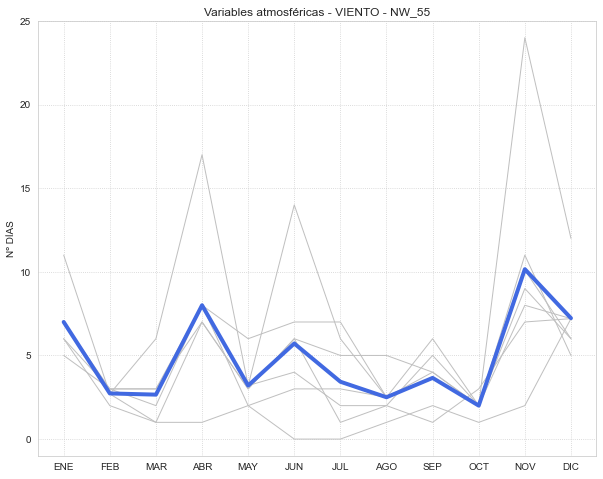

In [318]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(viento_all.columns.values)[2:-2]
w0 = list(viento_all.iloc[0, 2:-2])  #COLMENAR VIEJO/FAMET
w1 = list(viento_all.iloc[1, 2:-2])  #MADRID/BARAJAS
w2 = list(viento_all.iloc[2, 2:-2])  #MADRID/CUATRO VIENTOS
w3 = list(viento_all.iloc[3, 2:-2])  #MADRID/GETAFE	
w4 = list(viento_all.iloc[4, 2:-2])  #MADRID,RETIRO
w5 = list(viento_all.iloc[5, 2:-2])  #MADRID/TORREJÓN
w6 = list(viento_all.iloc[6, 2:-2])  #NAVACERRADA,PUERTO
ymedia = NW_55[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - VIENTO - NW_55");

plt.plot(meses, w0, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, w1, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, w2, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, w3, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, w4, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, w5, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, w6, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(-1,25);

#### gráfico NW_91

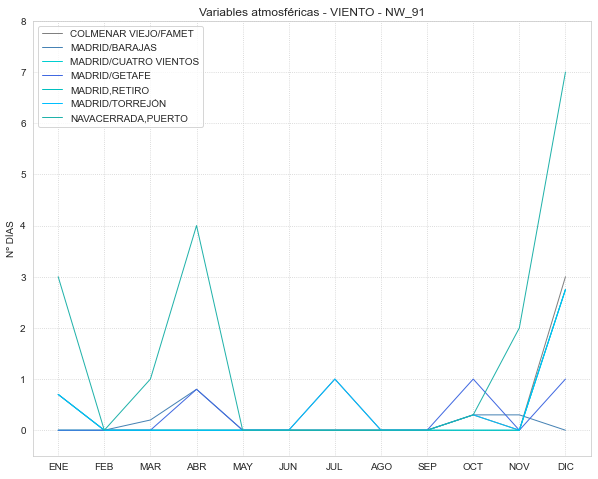

In [319]:
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(viento_all.columns.values)[2:-2]
w7 = list(viento_all.iloc[7, 2:-2])  #COLMENAR VIEJO/FAMET
w8 = list(viento_all.iloc[8, 2:-2])  #MADRID/BARAJAS
w9 = list(viento_all.iloc[9, 2:-2])  #MADRID/CUATRO VIENTOS
w10 = list(viento_all.iloc[10, 2:-2])  #MADRID/GETAFE	
w11 = list(viento_all.iloc[11, 2:-2])  #MADRID,RETIRO
w12 = list(viento_all.iloc[12, 2:-2])  #MADRID/TORREJÓN
w13 = list(viento_all.iloc[13, 2:-2])  #NAVACERRADA,PUERTO

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - VIENTO - NW_91");

plt.plot(meses, w7, color='gray', linewidth= 1,linestyle= '-', label="COLMENAR VIEJO/FAMET")
plt.plot(meses, w8, color='steelblue', linewidth= 1,linestyle= '-', label="MADRID/BARAJAS")
plt.plot(meses, w9, color='darkturquoise', linewidth= 1,linestyle= '-', label="MADRID/CUATRO VIENTOS")
plt.plot(meses, w10, color='royalblue', linewidth= 1,linestyle= '-',label="MADRID/GETAFE")
plt.plot(meses, w11, color='c',linewidth= 1,linestyle= '-', label="MADRID,RETIRO")
plt.plot(meses, w12, color='deepskyblue', linewidth= 1,linestyle= '-',label="MADRID/TORREJÓN")
plt.plot(meses, w13, color='lightseagreen', linewidth= 1,linestyle= '-', label="NAVACERRADA,PUERTO")

plt.ylim(-0.5,8);
plt.legend(loc="upper left");

In [320]:
# Esto es para sacar la media de las varias estaciones y quedarme con una única línea, ya que el estudio es para
## Madrid en general
viento_NW_91 = viento_all[viento_all["Tipo"]== "NW_91"]
NW_91 = list(viento_NW_91.mean())
NW_91[1:-1] ## esto es porque el primer valor que sacaba era un string y luego me daba error al hacer el gráfico

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


[0.7285714285714285,
 0.0,
 0.17142857142857143,
 0.7999999999999999,
 0.0,
 0.0,
 0.2857142857142857,
 0.0,
 0.0,
 0.31428571428571433,
 0.32857142857142857,
 2.75]

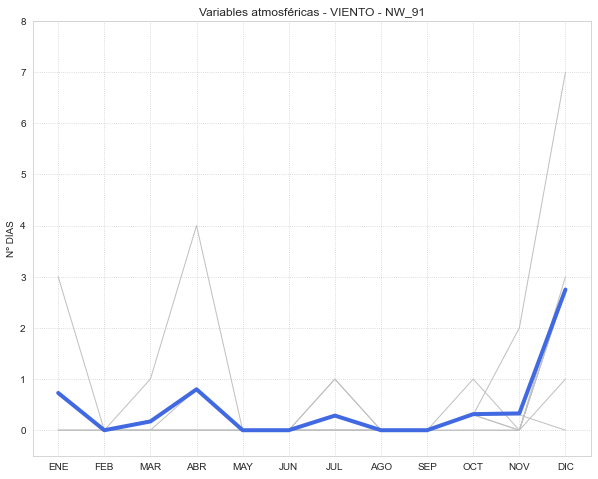

In [321]:
#### Para la presentación me quedo solo con éste gráfico con la media
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(viento_all.columns.values)[2:-2]
w7 = list(viento_all.iloc[7, 2:-2])  #COLMENAR VIEJO/FAMET
w8 = list(viento_all.iloc[8, 2:-2])  #MADRID/BARAJAS
w9 = list(viento_all.iloc[9, 2:-2])  #MADRID/CUATRO VIENTOS
w10 = list(viento_all.iloc[10, 2:-2])  #MADRID/GETAFE	
w11 = list(viento_all.iloc[11, 2:-2])  #MADRID,RETIRO
w12 = list(viento_all.iloc[12, 2:-2])  #MADRID/TORREJÓN
w13 = list(viento_all.iloc[13, 2:-2])  #NAVACERRADA,PUERTO
ymedia = NW_91[1:-1]

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("Nº DÍAS")
ax.set_title("Variables atmosféricas - VIENTO - NW_91");

plt.plot(meses, w7, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, w8, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, w9, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, w10, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, w11, color='silver',linewidth= 1,linestyle= '-')
plt.plot(meses, w12, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, w13, color='silver', linewidth= 1,linestyle= '-')
plt.plot(meses, ymedia, color='royalblue', linewidth= 4,linestyle= '-')

plt.ylim(-0.5,8);

# ----------------------------------------------------------------------------------------------------------------------------
##  3.Datos Hídricos - Embalses  --> FINALMENTE ESTE APARTADO 3 NO LO INCLUYO EN MI ESTUDIO
### Para la Cuenca del Tajo, que corresponde a los embalses de la Comunidad de Madrid, considerando el año 2019 , por semanas

#### Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...

In [322]:
### agua embalsada en la cuenca del Tajo --> relativo a Madrid. 
## unidad de medida  hm3 (hectómetros cúbicos)
embalse_tajo_2019 = pd.read_csv(csv_folder + "\\agua_embalsada_cuenca_tajo.csv", sep= ";")

## Me quedo con los valores del 2019
embalse_tajo_2019 = embalse_tajo_2019[embalse_tajo_2019["Año"] == "2019"]
print(np.shape(embalse_tajo_2019))
embalse_tajo_2019.head()

#### UNICO DATO ENCONTRADO SOBRE EMBALSES. LO AÑADO A LAS GRAFICAS -->MIRO SI PUEDO CAMBIAR EL PERIODO DE SEMANAL A MENSUAL --> escala??

(52, 3)


Año   Periodo  Agua embalsada
5  2019  Semana 1           5.764
6  2019  Semana 2           5.718
7  2019  Semana 3           5.593
8  2019  Semana 4           5.561
9  2019  Semana 5           5.628

In [323]:
embalse_tajo_2019["MES"] = "Definir"
embalse_tajo_2019.head()

Año   Periodo  Agua embalsada      MES
5  2019  Semana 1           5.764  Definir
6  2019  Semana 2           5.718  Definir
7  2019  Semana 3           5.593  Definir
8  2019  Semana 4           5.561  Definir
9  2019  Semana 5           5.628  Definir

In [324]:
## 1- Quito la palabra "Semana" de la columna "Periodo" , para quedarme solo con el número

embalse_tajo_2019 = embalse_tajo_2019.replace({r"Semana": ""}, regex=True)
embalse_tajo_2019.head()

## 2-luego lo transformo a dtype "int"  P_MAX_2019_mad = P_MAX_2019_mad.apply(pd.to_numeric, errors='ignore')
embalse_tajo_2019 = embalse_tajo_2019.apply(pd.to_numeric, errors='ignore')
embalse_tajo_2019.head()

Año  Periodo  Agua embalsada      MES
5  2019        1           5.764  Definir
6  2019        2           5.718  Definir
7  2019        3           5.593  Definir
8  2019        4           5.561  Definir
9  2019        5           5.628  Definir

In [325]:
embalse_tajo_2019.info()  ## veo que ya las semanas están expresadas simplemente en números y su dtype es int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 5 to 56
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Año             52 non-null     int64  
 1   Periodo         52 non-null     int64  
 2   Agua embalsada  52 non-null     float64
 3   MES             52 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ KB


In [326]:
embalse_tajo_2019.head()

Año  Periodo  Agua embalsada      MES
5  2019        1           5.764  Definir
6  2019        2           5.718  Definir
7  2019        3           5.593  Definir
8  2019        4           5.561  Definir
9  2019        5           5.628  Definir

In [327]:
# ## 3- Ahora asigno los valores del mes según en qué nº de semana estemos

embalse_tajo_2019.loc[embalse_tajo_2019["Periodo"]<=4, ["MES"]] = "ENE"
embalse_tajo_2019.loc[(embalse_tajo_2019["Periodo"]>=5) & (embalse_tajo_2019["Periodo"]<=8), ["MES"]] = "FEB"
embalse_tajo_2019.loc[(embalse_tajo_2019["Periodo"]>=9) & (embalse_tajo_2019["Periodo"]<=13), ["MES"]] = "MAR"
embalse_tajo_2019.loc[(embalse_tajo_2019["Periodo"]>=14) & (embalse_tajo_2019["Periodo"]<=17), ["MES"]] = "APR"
embalse_tajo_2019.loc[(embalse_tajo_2019["Periodo"]>=18) & (embalse_tajo_2019["Periodo"]<=21), ["MES"]] = "MAY"
embalse_tajo_2019.loc[(embalse_tajo_2019["Periodo"]>=22) & (embalse_tajo_2019["Periodo"]<=26), ["MES"]] = "JUN"
embalse_tajo_2019.loc[(embalse_tajo_2019["Periodo"]>=27) & (embalse_tajo_2019["Periodo"]<=30), ["MES"]] = "JUL"
embalse_tajo_2019.loc[(embalse_tajo_2019["Periodo"]>=31) & (embalse_tajo_2019["Periodo"]<=34), ["MES"]] = "AGO"
embalse_tajo_2019.loc[(embalse_tajo_2019["Periodo"]>=35) & (embalse_tajo_2019["Periodo"]<=39), ["MES"]] = "SEP"
embalse_tajo_2019.loc[(embalse_tajo_2019["Periodo"]>=40) & (embalse_tajo_2019["Periodo"]<=43), ["MES"]] = "OCT"
embalse_tajo_2019.loc[(embalse_tajo_2019["Periodo"]>=44) & (embalse_tajo_2019["Periodo"]<=47), ["MES"]] = "NOV"
embalse_tajo_2019.loc[(embalse_tajo_2019["Periodo"]>=48) & (embalse_tajo_2019["Periodo"]<=52), ["MES"]] = "DIC"

embalse_tajo_2019.head()


Año  Periodo  Agua embalsada  MES
5  2019        1           5.764  ENE
6  2019        2           5.718  ENE
7  2019        3           5.593  ENE
8  2019        4           5.561  ENE
9  2019        5           5.628  FEB

#### gráfico

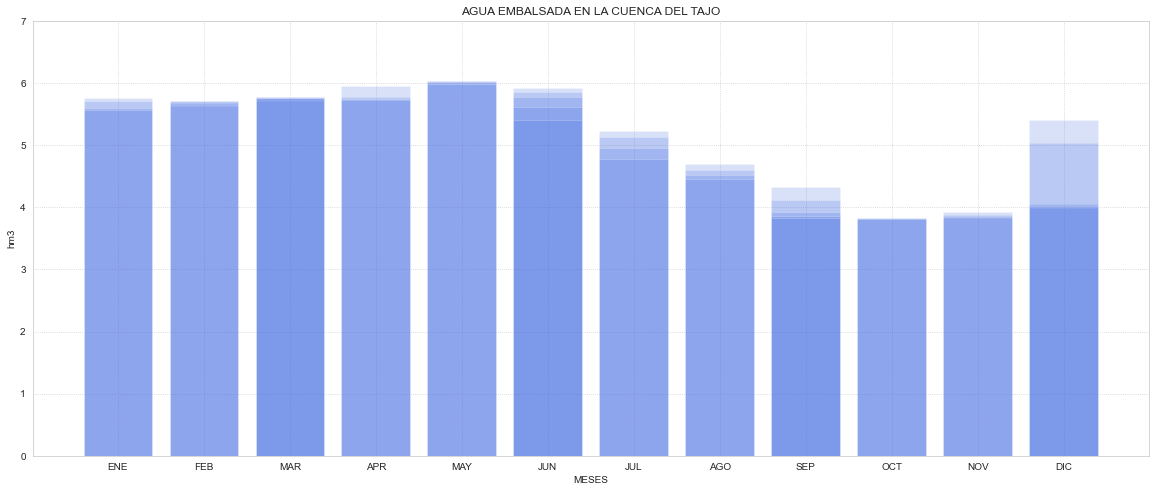

In [328]:
#####################################################################################
#### PIDO TUTORIA A CRISTINA, A VER CÓMO SEPARO LOS MESES SIN TENER QUE RENOMBRARLOS
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

# x = range(len(embalse_tajo_2019["MES"]))
x = embalse_tajo_2019["MES"]
y = embalse_tajo_2019["Agua embalsada"]


fig = plt.figure(figsize=(20,8))
ax = plt.axes()

ax.set_xlabel("MESES")
ax.set_ylabel("hm3")
ax.set_title("AGUA EMBALSADA EN LA CUENCA DEL TAJO");

# plt.plot(x, y, color='royalblue', linewidth= 4,linestyle= '-')
plt.bar(x, y, color='royalblue', alpha = 0.2)


plt.ylim(0,7);

# ----------------------------------------------------------------------------------------------------------------------------
##  4.Datos Energías (Renovables) --> las quiero correlar con factores climaticos  --> FINALMENTE ESTE APARTADO 3 NO LO INCLUYO EN MI ESTUDIO
### Para la Comunidad de Madrid, considerando el año 2019 , por meses

#### 4.1 Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...  BALANCE ELECTRICO DE LA COMUNIDAD DE MADRID EN 2019

In [329]:
## Cogeneración
## Proceso mediante el cual se obtiene simultáneamente energía eléctrica y energía térmica y/o mecánica útil.

In [330]:
### relativo a Comunidad de Madrid
### lo meteré en una gráfica que se llamará BALANCE ELECTRICO DE LA COMUNIDAD DE MADRID EN 2019
balance_electrico = pd.read_csv(csv_folder + "\\balance-electrico_01-2019_12-2019.csv", encoding="latin1", header=4)
# print(np.shape(balance_electrico))
balance_electrico
## borro líneas del 10 hacia abajo, es basura, no tiene datos
balance_electrico_tot= pd.DataFrame(balance_electrico.iloc[:7,:])
balance_electrico_tot

##pongo un título a la columna 1
renombrar = balance_electrico_tot.rename(columns={" ":"Tipo Energia"})

## borro la fila 4, no es ningun valor, es la suma de las filas anteriores
balance_electr_mad_2019 = renombrar.drop(4)
balance_electr_mad_2019


Tipo Energia     ene/19     feb/19     mar/19     abr/19  \
0              Hidráulica   7255,261   7365,365    7916,29   9552,571   
1      Solar fotovoltaica   5146,445   6551,194   9032,505   7628,735   
2        Otras renovables  13467,019  13264,394  14549,112  12888,082   
3     Residuos renovables  7623,0325   7156,996  6290,7765   7359,627   
5            Cogeneración  77809,264   60502,69  65113,937  77507,751   
6  Residuos no renovables  7623,0325   7156,996  6290,7765   7359,627   

      may/19     jun/19     jul/19     ago/19     sep/19     oct/19  \
0   8793,242   9590,487   7660,623   6305,742   4911,483   4269,331   
1   10747,47  10586,305  10375,872   9774,529   8009,285   6472,266   
2  13359,963  14537,617   12972,72  12817,951  12928,104  13460,339   
3   6292,811   6373,761   6502,889  5030,9495  7633,6745   7535,193   
5   77220,71  69670,796  63514,519  66770,413  64734,085  74346,951   
6   6292,811   6373,761   6502,889  5030,9495  7633,6745   7535,193   

      nov/19     dic/19  
0   7635,876  15735,216  
1   3916,796   3434,892  
2  13674,454  14651,851  
3   7381,181   8122,877  
5   78013,19  68978,627  
6   7381,181   8122,877

In [331]:
####Tengo que pasarle un regex a estos valores. La coma hace que python piense que es un string y no un numero.


In [332]:
###limpio los datos: transformo la coma en punto
balance_electr_mad_2019 = balance_electr_mad_2019.replace({r",": "."}, regex=True)
balance_electr_mad_2019

Tipo Energia     ene/19     feb/19     mar/19     abr/19  \
0              Hidráulica   7255.261   7365.365    7916.29   9552.571   
1      Solar fotovoltaica   5146.445   6551.194   9032.505   7628.735   
2        Otras renovables  13467.019  13264.394  14549.112  12888.082   
3     Residuos renovables  7623.0325   7156.996  6290.7765   7359.627   
5            Cogeneración  77809.264   60502.69  65113.937  77507.751   
6  Residuos no renovables  7623.0325   7156.996  6290.7765   7359.627   

      may/19     jun/19     jul/19     ago/19     sep/19     oct/19  \
0   8793.242   9590.487   7660.623   6305.742   4911.483   4269.331   
1   10747.47  10586.305  10375.872   9774.529   8009.285   6472.266   
2  13359.963  14537.617   12972.72  12817.951  12928.104  13460.339   
3   6292.811   6373.761   6502.889  5030.9495  7633.6745   7535.193   
5   77220.71  69670.796  63514.519  66770.413  64734.085  74346.951   
6   6292.811   6373.761   6502.889  5030.9495  7633.6745   7535.193   

      nov/19     dic/19  
0   7635.876  15735.216  
1   3916.796   3434.892  
2  13674.454  14651.851  
3   7381.181   8122.877  
5   78013.19  68978.627  
6   7381.181   8122.877

In [333]:
# ahora transformo los datos a numéricos
balance_electr_mad_2019 = balance_electr_mad_2019.apply(pd.to_numeric, errors='ignore')

In [334]:
balance_electr_mad_2019.info()  ## veo que los datos por fin son números (les tuve que pasar la coma a punto porque si no los seguia detectando com s tring, aunque le pasara el pod.to_numeric)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 6
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo Energia  6 non-null      object 
 1   ene/19        6 non-null      float64
 2   feb/19        6 non-null      float64
 3   mar/19        6 non-null      float64
 4   abr/19        6 non-null      float64
 5   may/19        6 non-null      float64
 6   jun/19        6 non-null      float64
 7   jul/19        6 non-null      float64
 8   ago/19        6 non-null      float64
 9   sep/19        6 non-null      float64
 10  oct/19        6 non-null      float64
 11  nov/19        6 non-null      float64
 12  dic/19        6 non-null      float64
dtypes: float64(12), object(1)
memory usage: 672.0+ bytes


In [335]:
## Renombro los meses para tenerlos iguales en los gráficos
balance_electr_mad_2019.columns = ["Tipo Energia", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC"]
pd.DataFrame(balance_electr_mad_2019)

Tipo Energia         ENE        FEB         MAR        ABR  \
0              Hidráulica   7255.2610   7365.365   7916.2900   9552.571   
1      Solar fotovoltaica   5146.4450   6551.194   9032.5050   7628.735   
2        Otras renovables  13467.0190  13264.394  14549.1120  12888.082   
3     Residuos renovables   7623.0325   7156.996   6290.7765   7359.627   
5            Cogeneración  77809.2640  60502.690  65113.9370  77507.751   
6  Residuos no renovables   7623.0325   7156.996   6290.7765   7359.627   

         MAY        JUN        JUL         AGO         SEP        OCT  \
0   8793.242   9590.487   7660.623   6305.7420   4911.4830   4269.331   
1  10747.470  10586.305  10375.872   9774.5290   8009.2850   6472.266   
2  13359.963  14537.617  12972.720  12817.9510  12928.1040  13460.339   
3   6292.811   6373.761   6502.889   5030.9495   7633.6745   7535.193   
5  77220.710  69670.796  63514.519  66770.4130  64734.0850  74346.951   
6   6292.811   6373.761   6502.889   5030.9495   7633.6745   7535.193   

         NOV        DIC  
0   7635.876  15735.216  
1   3916.796   3434.892  
2  13674.454  14651.851  
3   7381.181   8122.877  
5  78013.190  68978.627  
6   7381.181   8122.877

In [336]:
balance_electr_mad_2019.describe()

ENE           FEB           MAR           ABR           MAY  \
count      6.000000      6.000000      6.000000      6.000000      6.000000   
mean   19820.675667  16999.605833  18198.899500  20382.732167  20451.167833   
std    28544.116798  21457.921532  23184.923228  28066.339016  27942.989198   
min     5146.445000   6551.194000   6290.776500   7359.627000   6292.811000   
25%     7347.203875   7156.996000   6697.154875   7426.904000   6917.918750   
50%     7623.032500   7261.180500   8474.397500   8590.653000   9770.356000   
75%    12006.022375  11789.636750  13169.960250  12054.204250  12706.839750   
max    77809.264000  60502.690000  65113.937000  77507.751000  77220.710000   

                JUN           JUL           AGO           SEP           OCT  \
count      6.000000      6.000000      6.000000      6.000000      6.000000   
mean   19522.121167  17921.585333  17621.755667  17641.717667  18936.545500   
std    24754.715863  22477.567742  24270.784859  23216.690999  27315.815923   
min     6373.761000   6502.889000   5030.949500   4911.483000   4269.331000   
25%     7177.942500   6792.322500   5349.647625   7633.674500   6737.997750   
50%    10088.396000   9018.247500   8040.135500   7821.479750   7535.193000   
75%    13549.789000  12323.508000  12057.095500  11698.399250  11979.052500   
max    69670.796000  63514.519000  66770.413000  64734.085000  74346.951000   

                NOV           DIC  
count      6.000000      6.000000  
mean   19667.113000  19841.056667  
std    28757.218442  24503.388785  
min     3916.796000   3434.892000  
25%     7381.181000   8122.877000  
50%     7508.528500  11387.364000  
75%    12164.809500  15464.374750  
max    78013.190000  68978.627000

#### 4.1 Gráfico   BALANCE ELECTRICO DE LA COMUNIDAD DE MADRID EN 2019

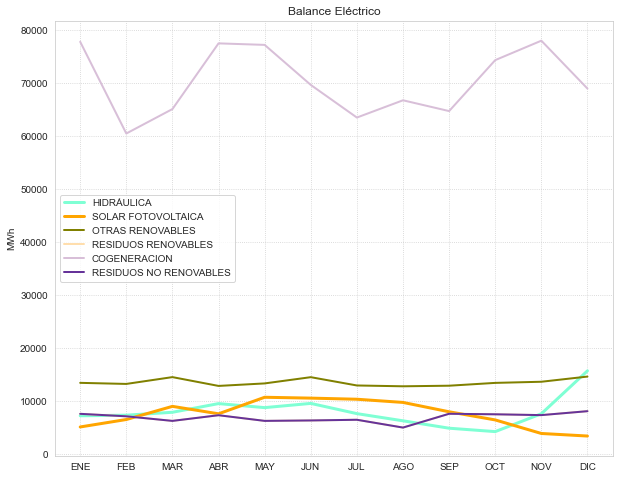

In [337]:
#### GRÁFICO1 - TODAS LAS ENERGIAS 
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(balance_electr_mad_2019.columns.values)[1:]
e0 = list(balance_electr_mad_2019.iloc[0, 1:])  #Hidráulica
e1 = list(balance_electr_mad_2019.iloc[1, 1:])  #Solar fotovoltaica
e2 = list(balance_electr_mad_2019.iloc[2, 1:])  #Otras renovables
e3 = list(balance_electr_mad_2019.iloc[3, 1:])  #Residuos renovables
e4 = list(balance_electr_mad_2019.iloc[4, 1:])  #Cogeneración
e5 = list(balance_electr_mad_2019.iloc[5, 1:])  #Residuos no renovables

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("MWh")
ax.set_title("Balance Eléctrico");

plt.plot(meses, e0, color='aquamarine', linewidth= 3,linestyle= '-', label="HIDRÁULICA")
plt.plot(meses, e1, color='orange', linewidth= 3,linestyle= '-', label="SOLAR FOTOVOLTAICA")
plt.plot(meses, e2, color='olive', linewidth= 2,linestyle= '-', label="OTRAS RENOVABLES")
plt.plot(meses, e3, color='navajowhite', linewidth= 2,linestyle= '-',label="RESIDUOS RENOVABLES")
plt.plot(meses, e4, color='thistle',linewidth= 2,linestyle= '-', label="COGENERACION")
plt.plot(meses, e5, color='rebeccapurple', linewidth= 2,linestyle= '-',label="RESIDUOS NO RENOVABLES")

plt.legend(loc="center left");

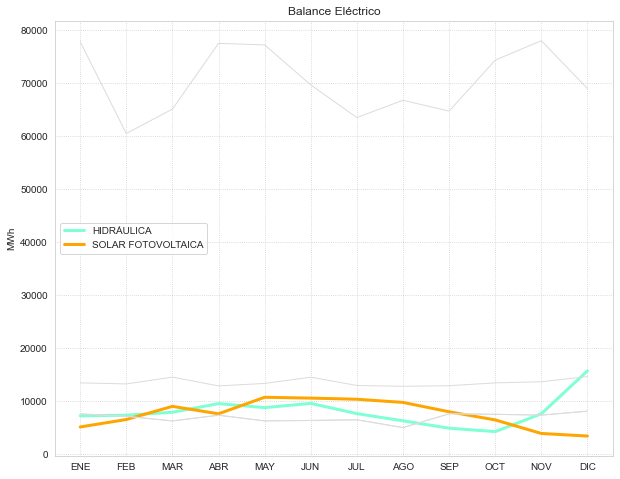

In [338]:
#### GRÁFICO2 

# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(balance_electr_mad_2019.columns.values)[1:]
e0 = list(balance_electr_mad_2019.iloc[0, 1:])  #Hidráulica
e1 = list(balance_electr_mad_2019.iloc[1, 1:])  #Solar fotovoltaica
e2 = list(balance_electr_mad_2019.iloc[2, 1:])  #Otras renovables
e3 = list(balance_electr_mad_2019.iloc[3, 1:])  #Residuos renovables
e4 = list(balance_electr_mad_2019.iloc[4, 1:])  #Cogeneración
e5 = list(balance_electr_mad_2019.iloc[5, 1:])  #Residuos no renovables


fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("MWh")
ax.set_title("Balance Eléctrico");

plt.plot(meses, e0, color='aquamarine', linewidth= 3,linestyle= '-', label="HIDRÁULICA")
plt.plot(meses, e1, color='orange', linewidth= 3,linestyle= '-', label="SOLAR FOTOVOLTAICA")
plt.plot(meses, e2, color='gainsboro', linewidth= 1,linestyle= '-')
plt.plot(meses, e3, color='gainsboro', linewidth= 1,linestyle= '-')
plt.plot(meses, e4, color='gainsboro',linewidth= 1,linestyle= '-')
plt.plot(meses, e5, color='gainsboro', linewidth= 1,linestyle= '-')

plt.legend(loc="center left");


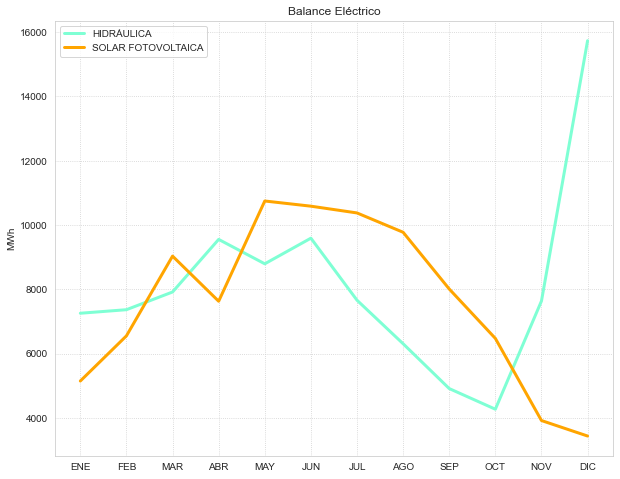

In [339]:
#### GRÁFICO3 

# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(balance_electr_mad_2019.columns.values)[1:]
e0 = list(balance_electr_mad_2019.iloc[0, 1:])  #Hidráulica
e1 = list(balance_electr_mad_2019.iloc[1, 1:])  #Solar fotovoltaica


fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("MWh")
ax.set_title("Balance Eléctrico");

plt.plot(meses, e0, color='aquamarine', linewidth= 3,linestyle= '-', label="HIDRÁULICA")
plt.plot(meses, e1, color='orange', linewidth= 3,linestyle= '-', label="SOLAR FOTOVOLTAICA")


# plt.ylim(0,80000);
plt.legend(loc="upper left");
plt.show();

#### 4.2 Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...  EVOLUCION EN MADRID 2019 DE LA ENERGIA 

In [340]:
### Evolución en 2019 de la energia Renovable y de la energia no renovable (en %)
## NOTA: Energía renovable: incluye hidráulica, hidroeólica, eólica, solar fotovoltaica, solar térmica, otras renovables y residuos renovables.

evoluc_energias = pd.read_csv(csv_folder + "\\evolucion_Renovable_y_Non_2019.csv", encoding="latin1", header=4)
evoluc_energias
## solo me quedo con las primeras 2 filas y le doy un título a la primera columna
evoluc_energias= pd.DataFrame(evoluc_energias.iloc[:2,:])
evoluc_energias_mad_2019 = evoluc_energias.rename(columns={" ":"Tipo Energia"})
evoluc_energias_mad_2019


Tipo Energia 01/2019 02/2019 03/2019 04/2019 05/2019 06/2019 07/2019  \
0     Renovable    28,2    33,7    34,6    30,6    31,9    35,1    34,9   
1  No renovable    71,8    66,3    65,4    69,4    68,1    64,9    65,1   

  08/2019 09/2019 10/2019 11/2019 12/2019  
0    32,1    31,6    27,9    27,6    35,2  
1    67,9    68,4    72,1    72,4    64,8

In [341]:
## Renombro los meses para tenerlos iguales en los gráficos
evoluc_energias_mad_2019.columns = ["Tipo Energia", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC"]
pd.DataFrame(evoluc_energias_mad_2019)

Tipo Energia   ENE   FEB   MAR   ABR   MAY   JUN   JUL   AGO   SEP   OCT  \
0     Renovable  28,2  33,7  34,6  30,6  31,9  35,1  34,9  32,1  31,6  27,9   
1  No renovable  71,8  66,3  65,4  69,4  68,1  64,9  65,1  67,9  68,4  72,1   

    NOV   DIC  
0  27,6  35,2  
1  72,4  64,8

In [342]:
## Me quedo SOLO con la línea relativa a la Renovable (ya que es la que usaré para mi analisis, como he explicado al principio)
evoluc_energias_mad_2019.drop(1, inplace=True)
evoluc_energias_mad_2019

Tipo Energia   ENE   FEB   MAR   ABR   MAY   JUN   JUL   AGO   SEP   OCT  \
0    Renovable  28,2  33,7  34,6  30,6  31,9  35,1  34,9  32,1  31,6  27,9   

    NOV   DIC  
0  27,6  35,2

In [343]:
evoluc_energias_mad_2019.info()  ####Tengo que pasarle un regex a estos valores. La coma hace que python piense que es un string y no un nume

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo Energia  1 non-null      object
 1   ENE           1 non-null      object
 2   FEB           1 non-null      object
 3   MAR           1 non-null      object
 4   ABR           1 non-null      object
 5   MAY           1 non-null      object
 6   JUN           1 non-null      object
 7   JUL           1 non-null      object
 8   AGO           1 non-null      object
 9   SEP           1 non-null      object
 10  OCT           1 non-null      object
 11  NOV           1 non-null      object
 12  DIC           1 non-null      object
dtypes: object(13)
memory usage: 112.0+ bytes


In [344]:
###limpio los datos: transformo la coma en punto
evoluc_energias_mad_2019 = evoluc_energias_mad_2019.replace({r",": "."}, regex=True)
evoluc_energias_mad_2019

Tipo Energia   ENE   FEB   MAR   ABR   MAY   JUN   JUL   AGO   SEP   OCT  \
0    Renovable  28.2  33.7  34.6  30.6  31.9  35.1  34.9  32.1  31.6  27.9   

    NOV   DIC  
0  27.6  35.2

In [345]:
# ahora transformo los datos a numéricos
evoluc_energias_mad_2019 = evoluc_energias_mad_2019.apply(pd.to_numeric, errors='ignore')

In [346]:
evoluc_energias_mad_2019.info()    ## ahora si, son números 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo Energia  1 non-null      object 
 1   ENE           1 non-null      float64
 2   FEB           1 non-null      float64
 3   MAR           1 non-null      float64
 4   ABR           1 non-null      float64
 5   MAY           1 non-null      float64
 6   JUN           1 non-null      float64
 7   JUL           1 non-null      float64
 8   AGO           1 non-null      float64
 9   SEP           1 non-null      float64
 10  OCT           1 non-null      float64
 11  NOV           1 non-null      float64
 12  DIC           1 non-null      float64
dtypes: float64(12), object(1)
memory usage: 112.0+ bytes


#### 4.2 Grafico EVOLUCION EN MADRID 2019 DE LA ENERGIA 

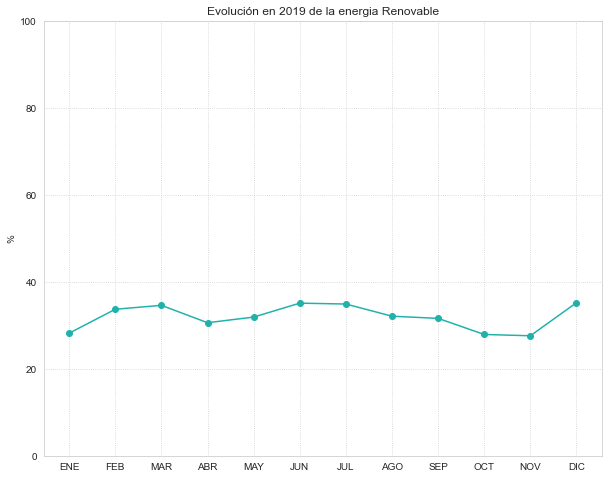

In [347]:
# (en %)
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})


meses = list(evoluc_energias_mad_2019.columns.values)[1:]
energia = list(evoluc_energias_mad_2019.iloc[0, 1:])


fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("%")
ax.set_title("Evolución en 2019 de la energia Renovable");

plt.plot(meses, energia, color='lightseagreen', marker='o');

plt.ylim(0,100);


#### 4.3 Estudios varios/cargar datos/limpiarlos/analizarlos/juntarlos/etc...  POTENCIA INSTALADA EN MADRID 2019 

In [348]:
### Potencia instalada (MW)
## Comunidad de Madrid, 2019

potencia_inst= pd.read_csv(csv_folder + "\\potencia_instalada_2019.csv", encoding="latin1", header=4)
potencia_inst
## solo me quedo con las primeras 5 filas y le doy un título a la primera columna
potencia_inst= pd.DataFrame(potencia_inst.iloc[:5,:])
potencia_inst_mad_2019 = potencia_inst.rename(columns={" ":"Nombre En"})
potencia_inst_mad_2019

Nombre En  01/2019  02/2019  03/2019  04/2019  05/2019  \
0              Hidráulica  108,517  108,517  108,517  108,517  108,517   
1      Solar fotovoltaica   63,518   63,518   63,518   63,518   63,518   
2        Otras renovables   45,084   45,084   45,084   45,084   45,084   
3            Cogeneración  211,062  211,062  211,062  211,062  211,062   
4  Residuos no renovables     14,9     14,9     14,9     14,9     14,9   

   06/2019  07/2019  08/2019  09/2019  10/2019  11/2019  12/2019  
0  108,517  108,517  108,517  108,517  108,517  108,517  108,517  
1   63,518   63,499   63,499   63,499   63,483   63,471   63,471  
2   45,084   45,084   45,084   45,084   45,084   45,084   45,084  
3  211,062  211,062  211,062  211,062  211,062  211,022  211,022  
4     14,9     14,9     14,9     14,9     14,9     14,9     14,9

In [349]:
## como he dicho al principio, solo me quedo con las 2 energias renovables principales, así qeu el resto lo borro
potencia_inst_mad_2019= pd.DataFrame(potencia_inst_mad_2019.iloc[:2,:])
potencia_inst_mad_2019

Nombre En  01/2019  02/2019  03/2019  04/2019  05/2019  06/2019  \
0          Hidráulica  108,517  108,517  108,517  108,517  108,517  108,517   
1  Solar fotovoltaica   63,518   63,518   63,518   63,518   63,518   63,518   

   07/2019  08/2019  09/2019  10/2019  11/2019  12/2019  
0  108,517  108,517  108,517  108,517  108,517  108,517  
1   63,499   63,499   63,499   63,483   63,471   63,471

In [350]:
####Tengo que pasarle un regex a estos valores. La coma hace que python piense que es un string y no un numero.
potencia_inst_mad_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Nombre En  2 non-null      object
 1   01/2019    2 non-null      object
 2   02/2019    2 non-null      object
 3   03/2019    2 non-null      object
 4   04/2019    2 non-null      object
 5   05/2019    2 non-null      object
 6   06/2019    2 non-null      object
 7   07/2019    2 non-null      object
 8   08/2019    2 non-null      object
 9   09/2019    2 non-null      object
 10  10/2019    2 non-null      object
 11  11/2019    2 non-null      object
 12  12/2019    2 non-null      object
dtypes: object(13)
memory usage: 336.0+ bytes


In [351]:
###limpio los datos: transformo la coma en punto
potencia_inst_mad_2019 = potencia_inst_mad_2019.replace({r",": "."}, regex=True)
potencia_inst_mad_2019

Nombre En  01/2019  02/2019  03/2019  04/2019  05/2019  06/2019  \
0          Hidráulica  108.517  108.517  108.517  108.517  108.517  108.517   
1  Solar fotovoltaica   63.518   63.518   63.518   63.518   63.518   63.518   

   07/2019  08/2019  09/2019  10/2019  11/2019  12/2019  
0  108.517  108.517  108.517  108.517  108.517  108.517  
1   63.499   63.499   63.499   63.483   63.471   63.471

In [352]:
# ahora transformo los datos a numéricos
potencia_inst_mad_2019 = potencia_inst_mad_2019.apply(pd.to_numeric, errors='ignore')

In [353]:
potencia_inst_mad_2019.info()   ##ahora si, son números

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nombre En  2 non-null      object 
 1   01/2019    2 non-null      float64
 2   02/2019    2 non-null      float64
 3   03/2019    2 non-null      float64
 4   04/2019    2 non-null      float64
 5   05/2019    2 non-null      float64
 6   06/2019    2 non-null      float64
 7   07/2019    2 non-null      float64
 8   08/2019    2 non-null      float64
 9   09/2019    2 non-null      float64
 10  10/2019    2 non-null      float64
 11  11/2019    2 non-null      float64
 12  12/2019    2 non-null      float64
dtypes: float64(12), object(1)
memory usage: 336.0+ bytes


In [354]:
## Renombro los meses para tenerlos iguales en los gráficos
potencia_inst_mad_2019.columns = ["Tipo Energia", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC"]
pd.DataFrame(potencia_inst_mad_2019)

Tipo Energia      ENE      FEB      MAR      ABR      MAY      JUN  \
0          Hidráulica  108.517  108.517  108.517  108.517  108.517  108.517   
1  Solar fotovoltaica   63.518   63.518   63.518   63.518   63.518   63.518   

       JUL      AGO      SEP      OCT      NOV      DIC  
0  108.517  108.517  108.517  108.517  108.517  108.517  
1   63.499   63.499   63.499   63.483   63.471   63.471

#### 4.3 Grafico  POTENCIA INSTALADA EN MADRID 2019 

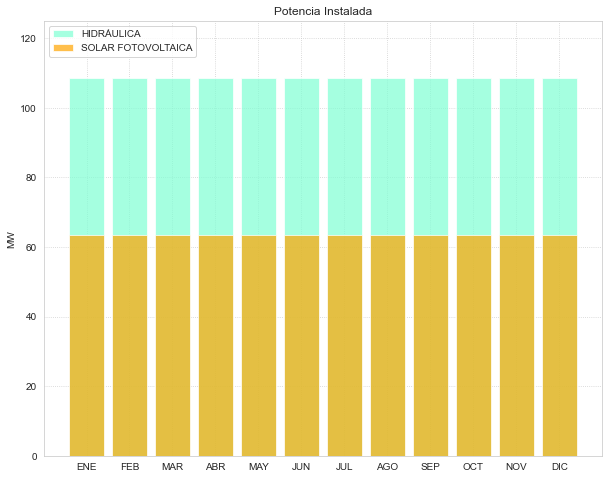

In [355]:

# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

meses = list(potencia_inst_mad_2019.columns.values)[1:]
p0 = list(potencia_inst_mad_2019.iloc[0, 1:])  #Hidráulica
p1 = list(potencia_inst_mad_2019.iloc[1, 1:])  #Solar fotovoltaica


fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("MW")
ax.set_title("Potencia Instalada");

ax.bar(meses, p0, color = "aquamarine", alpha=0.7, align='center', label="HIDRÁULICA")
ax.bar(meses, p1, color = "orange", alpha=0.7, align='center', label="SOLAR FOTOVOLTAICA")

plt.ylim(0,125);
plt.legend(loc="upper left");


# ----------------------------------------------------------------------------------------------------------------------------
##  5.Gráficos Medias  (2019)

###  5.1. PRECIPITACIONES - 2019

In [356]:
##CARGO EL DATAFRAME
### como están en la carpeta principal, tengo que subir 2 niveles (..\) para acceder a los cvs que haya creado
precip_all = pd.read_csv("precip_all.csv")
precip_all.head(10)

Indicativo                 NOMBRE    ENE   FEB   MAR    ABR  MAY  JUN   JUL  \
0      3191E   COLMENAR VIEJO/FAMET   34.7   2.2  16.3   97.0  0.8  2.1   2.0   
1       3129         MADRID/BARAJAS   18.2   0.5  12.7   81.5  0.0  2.4  17.1   
2       3196  MADRID/CUATRO VIENTOS   19.3   0.7   7.5   71.7  0.5  0.7   9.6   
3       3200          MADRID/GETAFE   14.0   1.8   9.1   70.4  1.1  1.0   2.5   
4       3195          MADRID,RETIRO   18.6   1.0   9.8   83.2  0.1  2.0   8.6   
5       3175        MADRID/TORREJÓN   14.6   0.5  10.2   75.2  0.0  2.1   9.6   
6       2462     NAVACERRADA,PUERTO  153.3  14.2  44.0  153.4  5.6  8.3  11.2   
7      3191E   COLMENAR VIEJO/FAMET   10.8   2.0  13.2   27.5  0.3  2.1   1.4   
8       3129         MADRID/BARAJAS    7.4   0.5  12.1   27.9  0.0  2.4  10.4   
9       3196  MADRID/CUATRO VIENTOS    7.2   0.7   6.9   27.9  0.5  0.7   5.0   

    AGO   SEP    OCT    NOV    DIC  media anual   Tipo  
0  13.2  42.5   30.0   60.1  112.4        34.44  P_MES  
1  44.4  37.9   33.1   30.7   57.7        28.02  P_MES  
2  52.3  47.9   39.1   38.2   81.6        30.76  P_MES  
3  33.2  31.3   40.3   39.9  101.6        28.85  P_MES  
4  58.4  33.1   42.6   44.0   90.1        32.62  P_MES  
5  15.7  45.9   26.8   29.4   52.9        23.58  P_MES  
6  45.6  71.6  103.6  313.5  229.1        96.12  P_MES  
7   9.5  20.0    9.4   21.7   70.7        15.72  P_MAX  
8  33.3  14.1   12.1    7.3   26.0        12.79  P_MAX  
9  45.9  26.2   19.0    6.0   34.5        15.04  P_MAX

In [357]:
## estas son las medias anuales de cada uno de los datos de precipitaciones
df_medias= precip_all.groupby("Tipo")["media anual"].mean()
df_medias = pd.DataFrame(df_medias)
df_medias

media anual
Tipo               
NP_001     6.691429
NP_010     4.738571
NP_100     1.167143
NP_300     0.142857
P_MAX     15.287143
P_MES     39.198571

In [358]:
#estos son los valores estadísticos de  cada uno de los datos de precipitaciones
df_statistics= precip_all.groupby("Tipo")["media anual"].describe()
df_statistics

count       mean        std    min     25%    50%    75%    max
Tipo                                                                   
NP_001    7.0   6.691429   1.520915   5.50   5.835   6.25   6.75   9.92
NP_010    7.0   4.738571   1.619212   3.67   3.875   3.92   4.79   8.25
NP_100    7.0   1.167143   1.013570   0.42   0.750   0.83   1.00   3.42
NP_300    7.0   0.142857   0.135734   0.00   0.080   0.08   0.17   0.42
P_MAX     7.0  15.287143   5.232589  11.26  12.500  13.37  15.38  26.62
P_MES     7.0  39.198571  25.341577  23.58  28.435  30.76  33.53  96.12

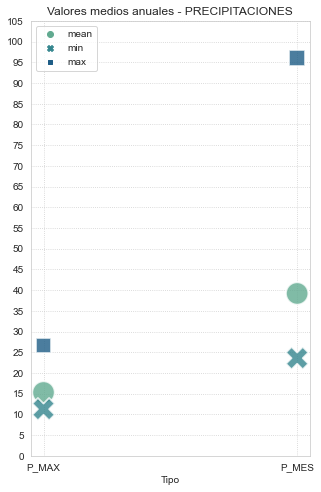

In [359]:
# scatter plot, me quedo con la media, min, max

fig = plt.figure(figsize=(5,8))
ax = plt.axes()

ax.set_title("Valores medios anuales - PRECIPITACIONES");

ticks = range(0, 110, 5)

sns.scatterplot(data=df_statistics.iloc[-2:][["mean","min","max"]], palette="crest", marker= "o", s= 500, alpha=0.8 );

plt.yticks(ticks)
plt.legend(loc="upper left");


###  5.2. OCURRENCIA DE METEOROS - 2019

In [360]:
##CARGO EL DATAFRAME
meteor_all = pd.read_csv("meteor_all.csv")
meteor_all.head(10)

Indicativo                 NOMBRE  ENE  FEB  MAR   ABR  MAY  JUN  JUL  AGO  \
0      3191E   COLMENAR VIEJO/FAMET  4.0  0.0  3.0  13.0  3.0  1.0  4.0  7.0   
1       3129         MADRID/BARAJAS  4.0  1.0  2.0  12.0  3.0  1.0  5.0  4.0   
2       3196  MADRID/CUATRO VIENTOS  5.0  1.0  2.0  12.0  1.0  1.0  6.0  3.0   
3       3200          MADRID/GETAFE  4.0  1.0  3.0  15.0  3.0  1.0  6.0  4.0   
4       3195          MADRID,RETIRO  5.0  1.0  2.0  13.0  1.0  1.0  3.0  4.0   
5       3175        MADRID/TORREJÓN  4.0  1.0  3.0  11.0  2.0  1.0  4.0  2.0   
6       2462     NAVACERRADA,PUERTO  2.0  1.0  3.0   7.0  5.0  4.0  9.0  7.0   
7      3191E   COLMENAR VIEJO/FAMET  1.0  2.0  0.0   1.0  0.0  0.0  0.0  0.0   
8       3129         MADRID/BARAJAS  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
9       3196  MADRID/CUATRO VIENTOS  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   

    SEP   OCT   NOV   DIC  media anual   Tipo  
0   7.0  10.0  21.0  13.0         7.17  N_LLU  
1   4.0   9.0  16.0  12.0         6.08  N_LLU  
2   6.0  12.0  19.0  13.0         6.75  N_LLU  
3   5.0  10.0  18.0  12.0         6.83  N_LLU  
4   5.0  10.0  17.0  12.0         6.17  N_LLU  
5   7.0  10.0  16.0  13.0         6.17  N_LLU  
6  11.0   8.0  11.0   9.0         6.42  N_LLU  
7   0.0   0.0   0.0   0.0         0.33  N_NIE  
8   0.0   0.0   0.0   0.0         0.00  N_NIE  
9   0.0   0.0   0.0   0.0         0.00  N_NIE

In [361]:
#estos son los valores estadísticos de  cada uno de los datos de precipitaciones
df_statistics_met= meteor_all.groupby("Tipo")["media anual"].describe()
df_statistics_met

count       mean       std    min     25%    50%     75%    max
Tipo                                                                  
N_CUB    7.0   5.045714  2.194143   4.00   4.075   4.17   4.500  10.00
N_DES    7.0   8.872857  1.399401   6.42   8.250   8.83   9.970  10.42
N_FOG    7.0   2.321429  3.930600   0.17   0.540   0.58   1.670  11.08
N_GRA    7.0   0.225714  0.183744   0.00   0.125   0.25   0.250   0.58
N_LLU    7.0   6.512857  0.412259   6.08   6.170   6.42   6.790   7.17
N_NIE    7.0   0.808571  1.997552   0.00   0.000   0.00   0.165   5.33
N_NUB    7.0  16.497143  1.450973  14.00  15.990  16.17  17.500  18.33
N_TOR    7.0   1.011429  0.112610   0.83   0.960   1.00   1.080   1.17

In [362]:
df_statistics_met[["mean","min","max"]]

mean    min    max
Tipo                          
N_CUB   5.045714   4.00  10.00
N_DES   8.872857   6.42  10.42
N_FOG   2.321429   0.17  11.08
N_GRA   0.225714   0.00   0.58
N_LLU   6.512857   6.08   7.17
N_NIE   0.808571   0.00   5.33
N_NUB  16.497143  14.00  18.33
N_TOR   1.011429   0.83   1.17

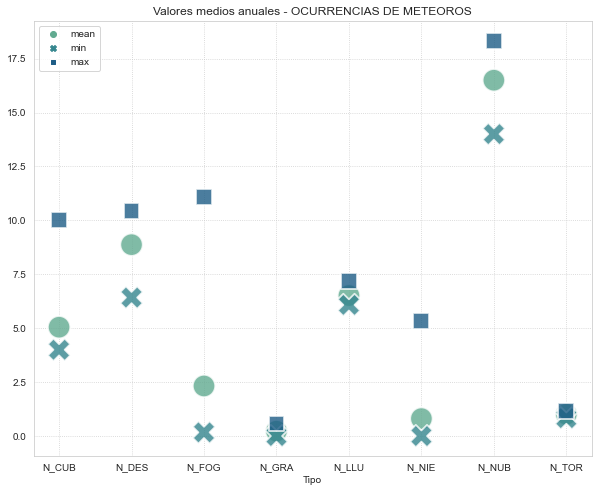

In [363]:
# scatter plot, me quedo con la media, min, max

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_title("Valores medios anuales - OCURRENCIAS DE METEOROS");

sns.scatterplot(data=df_statistics_met[["mean","min","max"]], palette="crest", marker= "o", s= 500, alpha=0.8 );

plt.legend(loc="upper left");

###  5.3. TEMPERATURAS - 2019

In [364]:
##CARGO EL DATAFRAME
temper_all = pd.read_csv("temper_all.csv")
temper_all.head(10)

Indicativo                 NOMBRE   ENE   FEB   MAR   ABR   MAY   JUN   JUL  \
0      3191E   COLMENAR VIEJO/FAMET   6.4   8.4  10.4   9.9  15.9  20.7  25.3   
1       3129         MADRID/BARAJAS   5.7   7.8  11.2  12.5  18.3  23.1  27.5   
2       3196  MADRID/CUATRO VIENTOS   6.8   9.2  12.2  12.6  18.7  23.4  27.6   
3       3200          MADRID/GETAFE   6.5   9.2  12.4  12.7  19.2  23.8  28.1   
4       3195          MADRID,RETIRO   6.5   9.4  12.4  12.6  18.9  23.7  28.0   
5       3175        MADRID/TORREJÓN   5.4   7.8  10.9  11.9  17.6  22.5  27.2   
6       2462     NAVACERRADA,PUERTO   1.2   3.4   4.7   3.3   9.8  14.0  18.7   
7      3191E   COLMENAR VIEJO/FAMET  10.5  12.9  15.7  14.6  22.5  26.8  31.4   
8       3129         MADRID/BARAJAS  12.7  16.1  19.3  18.5  26.6  31.2  35.5   
9       3196  MADRID/CUATRO VIENTOS  12.6  15.5  18.6  18.1  25.9  30.3  34.5   

    AGO   SEP   OCT   NOV   DIC  media anual    Tipo  
0  23.9  19.6  14.8   7.3   7.9         14.2  TM_MES  
1  25.8  21.1  16.1  10.2   8.5         15.7  TM_MES  
2  26.1  21.5  16.4   9.8   9.0         16.1  TM_MES  
3  26.4  21.9  16.7  10.3   9.0         16.4  TM_MES  
4  26.1  21.2  16.2   9.6   8.8         16.1  TM_MES  
5  25.5  21.2  15.8   9.8   8.1         15.3  TM_MES  
6  17.8  13.8   9.7   0.9   3.7          8.4  TM_MES  
7  29.8  24.8  19.2  10.3  11.2         19.1  TM_MAX  
8  33.7  27.9  22.6  13.8  13.0         22.6  TM_MAX  
9  32.9  27.5  22.1  13.3  13.1         22.0  TM_MAX

In [365]:
##uso todos los valores menos NT_30 y NT_00, que son en nºdias (el resto es todo en ºC)
#estos son los valores estadísticos de  cada uno de los datos de precipitaciones
df_statistics_temp= temper_all.groupby("Tipo")["media anual"].describe()
df_statistics_temp

count       mean       std    min     25%    50%     75%    max
Tipo                                                                   
NT_00     7.0   3.475714  3.304859   0.75   1.335   1.83   4.500  10.08
NT_30     7.0   5.677143  2.623279   0.25   5.415   6.58   7.290   7.50
TA_MAX    7.0  27.004286  3.051693  20.56  26.705  28.48  28.760  29.06
TA_MIN    7.0   3.247143  3.029003  -2.99   2.930   3.29   5.320   5.93
TI_MAX    7.0  12.880000  4.210922   3.81  12.945  14.88  15.115  15.35
TM_MAX    7.0  20.357143  3.582763  12.70  20.250  22.00  22.350  22.60
TM_MES    7.0  14.600000  2.829605   8.40  14.750  15.70  16.100  16.40
TM_MIN    7.0   8.785714  2.329112   4.00   8.400   9.20  10.350  10.80
TS_MIN    7.0  14.525714  1.677676  10.96  14.405  15.14  15.445  15.88

In [366]:
##para el grafico me quedo con media, min, max de todos menos NT_00 y NT_30
stats_temp = df_statistics_temp[["mean","min","max"]]
stats_temp[2:]

mean    min    max
Tipo                           
TA_MAX  27.004286  20.56  29.06
TA_MIN   3.247143  -2.99   5.93
TI_MAX  12.880000   3.81  15.35
TM_MAX  20.357143  12.70  22.60
TM_MES  14.600000   8.40  16.40
TM_MIN   8.785714   4.00  10.80
TS_MIN  14.525714  10.96  15.88

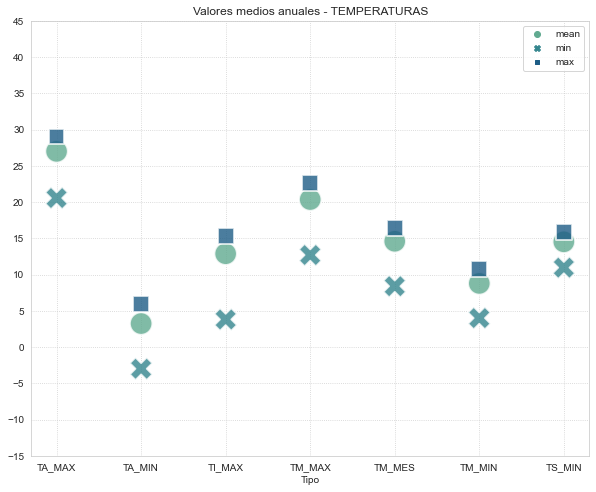

In [388]:
# voy a hacer el mismo scatter plot de las temperaturas con unidad de medida en ºC)

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_title("Valores medios anuales - TEMPERATURAS");

ticks = range(-15, 50, 5)

sns.scatterplot(data=stats_temp[2:], palette="crest", marker= "o", s= 500, alpha=0.8);
plt.yticks(ticks)
plt.legend(loc="upper right");

# ----------------------------------------------------------------------------------------------------------------------------
##  6.Valores históricos de Referencia (1981-2010)
### Saco aquí los gráficos para hacerme una idea pero no los incluyo en el powerpoint de la presentacion, sino como simple texto en las conclusiones

###  6.1. PRECIPITACIONES - Valores históricos de Referencia (1981-2010)

In [368]:
## Mensuales climatologico HISTORICOS - 1981-2010 - Precipitaciones
##  P_MES_   Precipitación total mensual/anual (mm)

### cargo el df entero:
P_MES_1981_2010 = pd.read_csv(csv_folder + "\\P_MES_1981_2010.csv", encoding="latin1", sep= ";")


### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
P_MES_1981_2010_mad = pd.merge(ind_mad, P_MES_1981_2010, how= "inner", on=["Indicativo"])

## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
P_MES_1981_2010_mad["Tipo"] = "P_MES"
P_MES_1981_2010_mad

#visualizao el dataframe
P_MES_1981_2010_mad.head(11)



Indicativo                NOMBRE parámetro   enero  febrero   marzo  \
0       3191E  COLMENAR VIEJO/FAMET         N   28.00    27.00   27.00   
1       3191E  COLMENAR VIEJO/FAMET       Min    0.00     1.00    1.20   
2       3191E  COLMENAR VIEJO/FAMET        Q1    9.80    11.70   12.90   
3       3191E  COLMENAR VIEJO/FAMET        Q2   26.70    36.30   20.60   
4       3191E  COLMENAR VIEJO/FAMET        Q3   47.80    47.90   34.60   
5       3191E  COLMENAR VIEJO/FAMET        Q4   71.50    65.30   61.00   
6       3191E  COLMENAR VIEJO/FAMET       Max  230.70    94.30  106.20   
7       3191E  COLMENAR VIEJO/FAMET        Mn   38.50    43.00   30.00   
8       3191E  COLMENAR VIEJO/FAMET        Md   51.90    40.80   35.90   
9       3191E  COLMENAR VIEJO/FAMET         S   53.18    26.77   27.87   
10      3191E  COLMENAR VIEJO/FAMET        Cv    1.02     0.66    0.78   

     abril    mayo   junio  julio  agosto  septiembre  octubre  noviembre  \
0    28.00   29.00   27.00  28.00   28.00       29.00    29.00      29.00   
1     0.20    8.40    0.20   0.00    0.00        0.00     0.30       4.30   
2    21.70   20.50    5.90   0.60    0.60       13.80    27.00      18.60   
3    37.10   35.90   16.30   4.70    6.10       21.80    42.80      50.10   
4    43.40   63.00   21.30  11.60   12.70       30.60    81.50      67.00   
5    70.50   95.90   40.70  25.00   23.70       62.00   126.20     119.80   
6   162.70  153.20  115.50  82.50  102.40      130.70   199.10     266.10   
7    40.80   39.90   18.50   5.80    8.90       26.30    58.20      60.50   
8    50.40   56.60   27.80  14.50   16.00       36.40    75.50      78.10   
9    38.53   39.04   29.01  18.77   21.61       30.56    57.88      69.33   
10    0.76    0.69    1.04   1.30    1.35        0.84     0.77       0.89   

    diciembre   anual   Tipo  
0       27.00   25.00  P_MES  
1        4.20  344.80  P_MES  
2       17.50  374.10  P_MES  
3       25.60  472.40  P_MES  
4       54.40  539.00  P_MES  
5      128.70  705.60  P_MES  
6      248.90  858.60  P_MES  
7       33.90  509.90  P_MES  
8       68.20  536.80  P_MES  
9       69.48  155.41  P_MES  
10       1.02    0.29  P_MES

In [369]:
## Mensuales climatologico HISTORICOS - 1981-2010 - Precipitaciones
##  P_MAX_   Precipitación total mensual/anual (mm)

### cargo el df entero:
P_MAX_1981_2010 = pd.read_csv(csv_folder + "\\P_MAX_1981_2010.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
P_MAX_1981_2010_mad = pd.merge(ind_mad, P_MAX_1981_2010, how= "inner", on=["Indicativo"])

## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
P_MAX_1981_2010_mad["Tipo"] = "P_MAX"
P_MAX_1981_2010_mad

P_MAX_1981_2010_mad.head(11)

Indicativo                NOMBRE parámetro  enero  febrero  marzo  abril  \
0       3191E  COLMENAR VIEJO/FAMET         N  28.00    27.00  27.00  27.00   
1       3191E  COLMENAR VIEJO/FAMET       Min   0.00     1.00   1.20   4.40   
2       3191E  COLMENAR VIEJO/FAMET        Q1   4.20     4.50   6.00   9.40   
3       3191E  COLMENAR VIEJO/FAMET        Q2  13.20    15.20  10.40  11.90   
4       3191E  COLMENAR VIEJO/FAMET        Q3  18.40    20.80  15.90  18.30   
5       3191E  COLMENAR VIEJO/FAMET        Q4  25.00    24.70  21.90  29.80   
6       3191E  COLMENAR VIEJO/FAMET       Max  45.00    29.20  29.30  45.20   
7       3191E  COLMENAR VIEJO/FAMET        Mn  16.20    16.60  14.20  14.30   
8       3191E  COLMENAR VIEJO/FAMET        Md  16.00    15.90  14.00  18.00   
9       3191E  COLMENAR VIEJO/FAMET         S  10.70     8.98   8.37  10.77   
10      3191E  COLMENAR VIEJO/FAMET        Cv   0.67     0.56   0.60   0.60   

     mayo  junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   29.00  27.00  28.00   28.00       29.00     29.0      28.00      27.00   
1    5.60   0.20   0.00    0.00        0.00      0.3       2.50       2.20   
2    9.40   5.00   0.50    0.60        7.20      8.2      10.10       6.40   
3   11.50   7.50   3.50    4.60       10.40     19.2      15.20      10.80   
4   19.50  12.30   8.90    8.40       15.10     30.4      26.30      19.20   
5   23.70  23.40  15.40   19.80       25.90     36.6      43.20      33.70   
6   40.30  45.10  29.80   86.80       59.50     47.9      65.70      50.60   
7   17.40  10.90   4.60    7.00       12.10     27.1      22.70      16.50   
8   17.40  13.40   8.00   12.00       17.20     23.1      24.10      18.70   
9    9.20  11.23   8.20   17.63       14.77     13.9      15.54      13.37   
10   0.53   0.84   1.02    1.47        0.86      0.6       0.65       0.71   

    anual   Tipo  
0   25.00  P_MAX  
1   19.20  P_MAX  
2   29.60  P_MAX  
3   35.10  P_MAX  
4   38.20  P_MAX  
5   45.20  P_MAX  
6   59.50  P_MAX  
7   36.50  P_MAX  
8   37.60  P_MAX  
9    8.97  P_MAX  
10   0.24  P_MAX

In [370]:
## junto los dos dataframes P_MES y P_MAX
# P_MES_2019_mad  ---->mm
# P_MAX_2019_mad ---->mm

precip_all_hist = pd.concat([P_MES_1981_2010_mad,P_MAX_1981_2010_mad])
precip_all_hist.reset_index(drop=True)
precip_all_hist

Indicativo                NOMBRE parámetro   enero  febrero  marzo  abril  \
0       3191E  COLMENAR VIEJO/FAMET         N   28.00    27.00  27.00  28.00   
1       3191E  COLMENAR VIEJO/FAMET       Min    0.00     1.00   1.20   0.20   
2       3191E  COLMENAR VIEJO/FAMET        Q1    9.80    11.70  12.90  21.70   
3       3191E  COLMENAR VIEJO/FAMET        Q2   26.70    36.30  20.60  37.10   
4       3191E  COLMENAR VIEJO/FAMET        Q3   47.80    47.90  34.60  43.40   
..        ...                   ...       ...     ...      ...    ...    ...   
72       2462    NAVACERRADA,PUERTO       Max  150.00    65.80  81.10  74.00   
73       2462    NAVACERRADA,PUERTO        Mn   24.30    25.50  22.40  28.30   
74       2462    NAVACERRADA,PUERTO        Md   30.70    27.30  26.50  28.90   
75       2462    NAVACERRADA,PUERTO         S   26.89    18.32  16.63  14.66   
76       2462    NAVACERRADA,PUERTO        Cv    0.88     0.67   0.63   0.51   

     mayo  junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   29.00  27.00  28.00   28.00       29.00    29.00      29.00      27.00   
1    8.40   0.20   0.00    0.00        0.00     0.30       4.30       4.20   
2   20.50   5.90   0.60    0.60       13.80    27.00      18.60      17.50   
3   35.90  16.30   4.70    6.10       21.80    42.80      50.10      25.60   
4   63.00  21.30  11.60   12.70       30.60    81.50      67.00      54.40   
..    ...    ...    ...     ...         ...      ...        ...        ...   
72  65.50  51.50  57.00   43.00       61.00    88.60     101.20     109.00   
73  26.00  24.90   7.40   11.60       21.10    40.30      38.80      38.00   
74  28.60  23.60  12.60   12.60       25.10    41.40      44.10      42.70   
75  14.81  14.95  13.36   10.39       16.28    20.85      26.83      25.83   
76   0.52   0.63   1.06    0.83        0.65     0.50       0.61       0.60   

     anual   Tipo  
0    25.00  P_MES  
1   344.80  P_MES  
2   374.10  P_MES  
3   472.40  P_MES  
4   539.00  P_MES  
..     ...    ...  
72  150.00  P_MAX  
73   66.60  P_MAX  
74   71.20  P_MAX  
75   23.32  P_MAX  
76    0.33  P_MAX  

[154 rows x 17 columns]

In [371]:
## de estos valores solo me interesa la media (Md) para compararla con los correspondientes de 2019
medias_historicas_mad = precip_all_hist[precip_all_hist["parámetro"] == "Md"]
medias_historicas_mad


Indicativo                 NOMBRE parámetro  enero  febrero  marzo  abril  \
8       3191E   COLMENAR VIEJO/FAMET        Md   51.9     40.8   35.9   50.4   
19       3129         MADRID/BARAJAS        Md   28.7     31.9   21.5   37.7   
30       3196  MADRID/CUATRO VIENTOS        Md   33.9     34.7   25.1   43.3   
41       3200          MADRID/GETAFE        Md   29.0     31.6   23.6   38.3   
52       3195          MADRID,RETIRO        Md   32.8     34.5   25.0   45.3   
63       3175        MADRID/TORREJÓN        Md   28.6     30.8   23.1   39.8   
74       2462     NAVACERRADA,PUERTO        Md  123.8     95.9   83.8  127.1   
8       3191E   COLMENAR VIEJO/FAMET        Md   16.0     15.9   14.0   18.0   
19       3129         MADRID/BARAJAS        Md    8.6     14.0    9.6   13.2   
30       3196  MADRID/CUATRO VIENTOS        Md   10.1     14.0    9.6   14.2   
41       3200          MADRID/GETAFE        Md    9.3     12.9    9.7   14.1   
52       3195          MADRID,RETIRO        Md    9.9     14.0    9.5   15.7   
63       3175        MADRID/TORREJÓN        Md    8.8     13.6    9.8   14.0   
74       2462     NAVACERRADA,PUERTO        Md   30.7     27.3   26.5   28.9   

     mayo  junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
8    56.6   27.8   14.5    16.0        36.4     75.5       78.1       68.2   
19   43.9   21.7    8.8     9.5        24.1     51.3       49.3       42.3   
30   49.5   24.5   11.8    11.3        24.0     59.7       56.7       52.9   
41   39.3   19.3    9.4     9.4        22.1     50.1       48.0       44.8   
52   50.5   20.9   11.7     9.6        22.4     59.5       57.7       51.1   
63   48.1   19.3   13.3     8.7        24.6     50.1       48.8       42.1   
74  124.5   63.5   23.2    26.0        60.2    155.7      176.4      163.1   
8    17.4   13.4    8.0    12.0        17.2     23.1       24.1       18.7   
19   14.2    9.3    5.4     5.9        13.6     16.1       17.5       12.6   
30   16.5   12.8    8.3     7.4        12.5     18.0       18.7       15.2   
41   14.8   10.4    6.1     6.4        12.1     15.0       15.1       13.2   
52   16.1    9.0    7.7     5.8        11.8     16.6       18.8       14.7   
63   15.3    9.8    8.4     4.9        12.5     15.1       16.9       10.6   
74   28.6   23.6   12.6    12.6        25.1     41.4       44.1       42.7   

     anual   Tipo  
8    536.8  P_MES  
19   370.8  P_MES  
30   427.5  P_MES  
41   364.9  P_MES  
52   420.9  P_MES  
63   385.4  P_MES  
74  1223.3  P_MES  
8     37.6  P_MAX  
19    29.4  P_MAX  
30    31.6  P_MAX  
41    28.2  P_MAX  
52    30.2  P_MAX  
63    29.1  P_MAX  
74    71.2  P_MAX

In [372]:
#borro la columna anual ya que son unas sumas, 
medias_historicas_mad.drop("anual", inplace=True, axis=1)
#luego creo otra con la media (al igual que hice con el año 2019)
medias_historicas_mad.loc[:,"media anual"] = round(medias_historicas_mad.mean(axis=1),2)
medias_historicas_mad

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Indicativo                 NOMBRE parámetro  enero  febrero  marzo  abril  \
8       3191E   COLMENAR VIEJO/FAMET        Md   51.9     40.8   35.9   50.4   
19       3129         MADRID/BARAJAS        Md   28.7     31.9   21.5   37.7   
30       3196  MADRID/CUATRO VIENTOS        Md   33.9     34.7   25.1   43.3   
41       3200          MADRID/GETAFE        Md   29.0     31.6   23.6   38.3   
52       3195          MADRID,RETIRO        Md   32.8     34.5   25.0   45.3   
63       3175        MADRID/TORREJÓN        Md   28.6     30.8   23.1   39.8   
74       2462     NAVACERRADA,PUERTO        Md  123.8     95.9   83.8  127.1   
8       3191E   COLMENAR VIEJO/FAMET        Md   16.0     15.9   14.0   18.0   
19       3129         MADRID/BARAJAS        Md    8.6     14.0    9.6   13.2   
30       3196  MADRID/CUATRO VIENTOS        Md   10.1     14.0    9.6   14.2   
41       3200          MADRID/GETAFE        Md    9.3     12.9    9.7   14.1   
52       3195          MADRID,RETIRO        Md    9.9     14.0    9.5   15.7   
63       3175        MADRID/TORREJÓN        Md    8.8     13.6    9.8   14.0   
74       2462     NAVACERRADA,PUERTO        Md   30.7     27.3   26.5   28.9   

     mayo  junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
8    56.6   27.8   14.5    16.0        36.4     75.5       78.1       68.2   
19   43.9   21.7    8.8     9.5        24.1     51.3       49.3       42.3   
30   49.5   24.5   11.8    11.3        24.0     59.7       56.7       52.9   
41   39.3   19.3    9.4     9.4        22.1     50.1       48.0       44.8   
52   50.5   20.9   11.7     9.6        22.4     59.5       57.7       51.1   
63   48.1   19.3   13.3     8.7        24.6     50.1       48.8       42.1   
74  124.5   63.5   23.2    26.0        60.2    155.7      176.4      163.1   
8    17.4   13.4    8.0    12.0        17.2     23.1       24.1       18.7   
19   14.2    9.3    5.4     5.9        13.6     16.1       17.5       12.6   
30   16.5   12.8    8.3     7.4        12.5     18.0       18.7       15.2   
41   14.8   10.4    6.1     6.4        12.1     15.0       15.1       13.2   
52   16.1    9.0    7.7     5.8        11.8     16.6       18.8       14.7   
63   15.3    9.8    8.4     4.9        12.5     15.1       16.9       10.6   
74   28.6   23.6   12.6    12.6        25.1     41.4       44.1       42.7   

     Tipo  media anual  
8   P_MES        46.01  
19  P_MES        30.89  
30  P_MES        35.62  
41  P_MES        30.41  
52  P_MES        35.08  
63  P_MES        31.44  
74  P_MES       101.93  
8   P_MAX        16.48  
19  P_MAX        11.67  
30  P_MAX        13.11  
41  P_MAX        11.59  
52  P_MAX        12.47  
63  P_MAX        11.64  
74  P_MAX        28.67

In [373]:
## me quedo con la media total, no dividida por estaciones, y la pinto en un gráfico
medias_hist_mad_total = medias_historicas_mad.groupby("Tipo")["media anual"].describe()
medias_hist_mad_total

count       mean        std    min     25%    50%     75%     max
Tipo                                                                    
P_MAX    7.0  15.090000   6.231402  11.59  11.655  12.47  14.795   28.67
P_MES    7.0  44.482857  25.892076  30.41  31.165  35.08  40.815  101.93

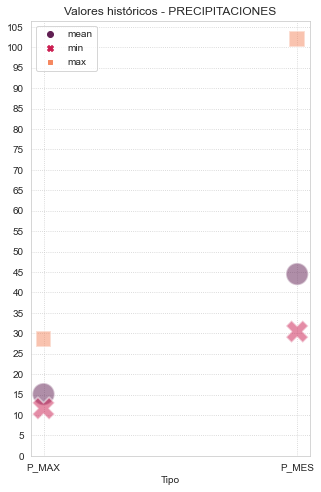

In [374]:
# scatter plot, me quedo con la media, min, max

fig = plt.figure(figsize=(5,8))
ax = plt.axes()

ax.set_title("Valores históricos - PRECIPITACIONES");

ticks = range(0, 110, 5)

sns.scatterplot(data=medias_hist_mad_total[["mean","min","max"]], palette = "rocket", marker= "o", s= 500, alpha=0.5 );

plt.yticks(ticks)
plt.legend(loc="upper left");

##me quedo con este, respecto a las precipitaciones

###  6.2. TEMPERATURAS - Valores históricos de Referencia (1981-2010)

In [375]:
## Mensuales climatologico HISTORICOS - 1981-2010 -  Temperaturas
##  TM_MES_   Temperatura media mensual/anual (°C)

### cargo el df entero:
TM_MES_1981_2010 = pd.read_csv(csv_folder + "\\TM_MES_1981_2010.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
TM_MES_1981_2010_mad = pd.merge(ind_mad, TM_MES_1981_2010, how= "inner", on=["Indicativo"])
TM_MES_1981_2010_mad

## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
TM_MES_1981_2010_mad["Tipo"] = "TM_MES"
TM_MES_1981_2010_mad

#visualizao el dataframe
TM_MES_1981_2010_mad.head(2)

Indicativo                NOMBRE parámetro  enero  febrero  marzo  abril  \
0      3191E  COLMENAR VIEJO/FAMET         N   27.0     28.0   28.0   27.0   
1      3191E  COLMENAR VIEJO/FAMET       Min    2.3      3.0    5.0    6.2   

   mayo  junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0  28.0   28.0   27.0    29.0        28.0     28.0       28.0       23.0   
1   8.8   16.0   21.3    20.7        16.2      9.2        6.5        3.6   

   anual    Tipo  
0   18.0  TM_MES  
1   12.1  TM_MES

In [376]:
## Mensuales climatologico HISTORICOS - 1981-2010 -  Temperaturas
##  TM_MAX_  Temperatura media mensual/anual de las máximas (°C)

### cargo el df entero:
TM_MAX_1981_2010 = pd.read_csv(csv_folder + "\\TM_MAX_1981_2010.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
TM_MAX_1981_2010_mad = pd.merge(ind_mad, TM_MAX_1981_2010, how= "inner", on=["Indicativo"])
TM_MAX_1981_2010_mad

## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
TM_MAX_1981_2010_mad["Tipo"] = "TM_MAX"
TM_MAX_1981_2010_mad

#visualizao el dataframe
TM_MAX_1981_2010_mad.head(2)

Indicativo                NOMBRE parámetro  enero  febrero  marzo  abril  \
0      3191E  COLMENAR VIEJO/FAMET         N   27.0     28.0   28.0   27.0   
1      3191E  COLMENAR VIEJO/FAMET       Min    5.6      6.3    9.5   10.3   

   mayo  junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0  28.0   28.0   27.0    29.0        28.0     28.0       28.0       23.0   
1  12.9   20.8   27.2    26.7        21.0     12.5        9.9        7.0   

   anual    Tipo  
0   18.0  TM_MAX  
1   16.7  TM_MAX

In [377]:
## Mensuales climatologico HISTORICOS - 1981-2010 -  Temperaturas
##  TM_MIN_  Temperatura media mensual/anual de las mínimas (°C)

### cargo el df entero:
TM_MIN_1981_2010 = pd.read_csv(csv_folder + "\\TM_MIN_1981_2010.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
TM_MIN_1981_2010_mad = pd.merge(ind_mad, TM_MIN_1981_2010, how= "inner", on=["Indicativo"])
TM_MIN_1981_2010_mad

## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
TM_MIN_1981_2010_mad["Tipo"] = "TM_MIN"
TM_MIN_1981_2010_mad

#visualizao el dataframe
TM_MIN_1981_2010_mad.head(2)

Indicativo                NOMBRE parámetro  enero  febrero  marzo  abril  \
0      3191E  COLMENAR VIEJO/FAMET         N   27.0     28.0   28.0   27.0   
1      3191E  COLMENAR VIEJO/FAMET       Min   -1.0     -1.0    0.5    2.1   

   mayo  junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0  28.0   28.0   27.0    29.0        28.0     28.0       28.0       23.0   
1   4.7   11.1   15.3    14.7        11.1      5.9        2.9        0.1   

   anual    Tipo  
0   18.0  TM_MIN  
1    7.5  TM_MIN

In [378]:
# Mensuales climatologico HISTORICOS - 1981-2010 -  Temperaturas
##  TA_MAX_  Temperatura máxima absoluta del mes/año y fecha (°C)

### cargo el df entero:
TA_MAX_1981_2010 = pd.read_csv(csv_folder + "\\TA_MAX_1981_2010.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
TA_MAX_1981_2010_mad = pd.merge(ind_mad, TA_MAX_1981_2010, how= "inner", on=["Indicativo"])
TA_MAX_1981_2010_mad

## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
TA_MAX_1981_2010_mad["Tipo"] = "TA_MAX"
TA_MAX_1981_2010_mad

#visualizao el dataframe
TA_MAX_1981_2010_mad.head(2)

Indicativo                NOMBRE parámetro  enero  febrero  marzo  abril  \
0      3191E  COLMENAR VIEJO/FAMET         N   27.0     28.0   28.0   27.0   
1      3191E  COLMENAR VIEJO/FAMET       Min   10.1     11.0   17.3   17.4   

   mayo  junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0  28.0   28.0   27.0    29.0        28.0     28.0       28.0       23.0   
1  19.8   28.5   32.2    31.5        27.1     20.5       14.5       11.6   

   anual    Tipo  
0   18.0  TA_MAX  
1   33.4  TA_MAX

In [379]:
# Mensuales climatologico HISTORICOS - 1981-2010 -  Temperaturas
##  TA_MIN_  Temperatura mínima absoluta del mes/año y fecha (°C)

### cargo el df entero:
TA_MIN_1981_2010 = pd.read_csv(csv_folder + "\\TA_MIN_1981_2010.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
TA_MIN_1981_2010_mad = pd.merge(ind_mad, TA_MIN_1981_2010, how= "inner", on=["Indicativo"])
TA_MIN_1981_2010_mad

## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
TA_MIN_1981_2010_mad["Tipo"] = "TA_MIN"
TA_MIN_1981_2010_mad

#visualizao el dataframe
TA_MIN_1981_2010_mad.head(2)

Indicativo                NOMBRE parámetro  enero  febrero  marzo  abril  \
0      3191E  COLMENAR VIEJO/FAMET         N   27.0     28.0   28.0   27.0   
1      3191E  COLMENAR VIEJO/FAMET       Min   -9.8     -8.1   -7.0   -4.0   

   mayo  junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0  28.0   28.0   27.0    29.0        28.0     28.0       28.0       23.0   
1  -0.9    3.6    7.0     6.9         3.6      0.0       -6.0       -9.0   

   anual    Tipo  
0   18.0  TA_MIN  
1   -9.0  TA_MIN

In [380]:
# Mensuales climatologico HISTORICOS - 1981-2010 -  Temperaturas
##  TS_MIN_  Temperatura mínima más alta del mes/año  (°C)

### cargo el df entero:
TS_MIN_1981_2010 = pd.read_csv(csv_folder + "\\TS_MIN_1981_2010.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
TS_MIN_1981_2010_mad = pd.merge(ind_mad, TS_MIN_1981_2010, how= "inner", on=["Indicativo"])
TS_MIN_1981_2010_mad

## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
TS_MIN_1981_2010_mad["Tipo"] = "TS_MIN"
TS_MIN_1981_2010_mad

#visualizao el dataframe
TS_MIN_1981_2010_mad.head(2)

Indicativo                NOMBRE parámetro  enero  febrero  marzo  abril  \
0      3191E  COLMENAR VIEJO/FAMET         N   25.0     26.0   26.0   26.0   
1      3191E  COLMENAR VIEJO/FAMET       Min    3.0      4.4    6.5    7.6   

   mayo  junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0  25.0   25.0   25.0    26.0        25.0     25.0       25.0       20.0   
1  12.7   15.8   20.7    19.8        16.2     11.8        7.7        5.6   

   anual    Tipo  
0   17.0  TS_MIN  
1   21.3  TS_MIN

In [381]:
# Mensuales climatologico HISTORICOS - 1981-2010 -  Temperaturas
##  TI_MAX_  Temperatura máxima más baja del mes/año (°C)

### cargo el df entero:
TI_MAX_1981_2010 = pd.read_csv(csv_folder + "\\TI_MAX_1981_2010.csv", encoding="latin1", sep= ";")

### me quedo SOLO con los indicativos de MADRID (mergeo el df entero con él de los indicativos de madrid con un inner join
TI_MAX_1981_2010_mad = pd.merge(ind_mad, TI_MAX_1981_2010, how= "inner", on=["Indicativo"])
TI_MAX_1981_2010_mad

## agrego la columna tipo para añadir el tipo de fenómeno climático es, para distinguirlo cuando junte los varios dataframes
TI_MAX_1981_2010_mad["Tipo"] = "TI_MAX"
TI_MAX_1981_2010_mad

#visualizao el dataframe
TI_MAX_1981_2010_mad.head(2)

Indicativo                NOMBRE parámetro  enero  febrero  marzo  abril  \
0      3191E  COLMENAR VIEJO/FAMET         N   25.0     26.0   26.0   26.0   
1      3191E  COLMENAR VIEJO/FAMET       Min   -2.1     -1.2    2.0    2.0   

   mayo  junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0  25.0   25.0   25.0    26.0        25.0     25.0       25.0       20.0   
1   7.0   12.0   14.0    17.6        11.4      5.8        1.3       -0.6   

   anual    Tipo  
0   17.0  TI_MAX  
1   -2.1  TI_MAX

In [382]:
## junto los  dataframes 
# - TM_MES_   
# - TM_MAX_   
# - TM_MIN_   
# - TA_MAX_  
# - TA_MIN_  
# - TS_MIN_   
# - TI_MAX_ 

temp_all_hist = pd.concat([TM_MES_1981_2010_mad,TM_MAX_1981_2010_mad,TM_MIN_1981_2010_mad,TA_MAX_1981_2010_mad,TA_MIN_1981_2010_mad,TS_MIN_1981_2010_mad,TI_MAX_1981_2010_mad])
temp_all_hist.reset_index(drop=True)
temp_all_hist.head(11)

Indicativo                NOMBRE parámetro  enero  febrero  marzo  abril  \
0       3191E  COLMENAR VIEJO/FAMET         N  27.00    28.00  28.00  27.00   
1       3191E  COLMENAR VIEJO/FAMET       Min   2.30     3.00   5.00   6.20   
2       3191E  COLMENAR VIEJO/FAMET        Q1   3.70     4.40   7.90   9.20   
3       3191E  COLMENAR VIEJO/FAMET        Q2   4.60     5.60   8.80  10.50   
4       3191E  COLMENAR VIEJO/FAMET        Q3   5.10     6.90   9.70  11.30   
5       3191E  COLMENAR VIEJO/FAMET        Q4   5.70     7.40  10.60  12.00   
6       3191E  COLMENAR VIEJO/FAMET       Max   7.50     9.80  13.40  14.00   
7       3191E  COLMENAR VIEJO/FAMET        Mn   5.00     6.30   9.20  10.90   
8       3191E  COLMENAR VIEJO/FAMET        Md   4.80     6.20   9.20  10.60   
9       3191E  COLMENAR VIEJO/FAMET         S   1.15     1.82   1.77   1.75   
10      3191E  COLMENAR VIEJO/FAMET        Cv   0.24     0.29   0.19   0.16   

     mayo  junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
0   28.00  28.00  27.00   29.00       28.00    28.00      28.00      23.00   
1    8.80  16.00  21.30   20.70       16.20     9.20       6.50       3.60   
2   13.20  18.80  22.60   22.10       17.80    12.80       7.10       5.00   
3   14.00  20.00  23.40   23.30       18.50    13.30       8.10       5.40   
4   15.60  20.70  24.30   23.80       19.40    13.90       8.80       5.70   
5   16.40  21.30  24.60   24.80       20.40    15.60       9.80       6.00   
6   17.20  23.40  25.80   26.00       23.30    17.90      10.80       7.10   
7   14.50  20.30  24.10   23.70       18.90    13.60       8.40       5.40   
8   14.50  20.10  23.70   23.40       19.10    13.80       8.40       5.50   
9    1.96   1.63   1.10    1.35        1.83     1.87       1.26       0.81   
10   0.13   0.08   0.05    0.06        0.10     0.14       0.15       0.15   

    anual    Tipo  
0   18.00  TM_MES  
1   12.10  TM_MES  
2   12.80  TM_MES  
3   13.10  TM_MES  
4   13.40  TM_MES  
5   13.70  TM_MES  
6   13.90  TM_MES  
7   13.20  TM_MES  
8   13.20  TM_MES  
9    0.49  TM_MES  
10   0.04  TM_MES

In [383]:
## de estos valores solo me interesa la media (Md) para compararla con los correspondientes de 2019
temp_all_hist_mad = temp_all_hist[temp_all_hist["parámetro"] == "Md"]
temp_all_hist_mad.head(11)

##esta vez no borro la columna "anual" ya que en este caso no son sumas sino sí son medias

Indicativo                 NOMBRE parámetro  enero  febrero  marzo  abril  \
8       3191E   COLMENAR VIEJO/FAMET        Md    4.8      6.2    9.2   10.6   
19       3129         MADRID/BARAJAS        Md    5.5      7.1   10.2   12.2   
30       3196  MADRID/CUATRO VIENTOS        Md    6.0      7.6   10.8   12.6   
41       3200          MADRID/GETAFE        Md    5.9      7.5   10.8   12.7   
52       3195          MADRID,RETIRO        Md    6.3      7.9   11.2   12.9   
63       3175        MADRID/TORREJÓN        Md    5.6      7.3   10.5   12.4   
74       2462     NAVACERRADA,PUERTO        Md   -0.4      0.1    2.3    3.4   
8       3191E   COLMENAR VIEJO/FAMET        Md    8.0     10.0   13.8   15.3   
19       3129         MADRID/BARAJAS        Md   10.7     13.0   17.0   18.6   
30       3196  MADRID/CUATRO VIENTOS        Md   10.4     12.5   16.5   18.3   
41       3200          MADRID/GETAFE        Md   10.5     12.7   16.8   18.6   

    mayo  junio  julio  agosto  septiembre  octubre  noviembre  diciembre  \
8   14.5   20.1   23.7    23.4        19.1     13.8        8.4        5.5   
19  16.2   21.7   25.2    24.7        20.5     14.8        9.4        6.2   
30  16.5   22.2   25.6    25.1        21.0     15.2        9.8        6.7   
41  16.8   22.4   25.9    25.4        21.1     15.3        9.8        6.5   
52  16.7   22.2   25.6    25.1        20.9     15.1        9.9        6.9   
63  16.4   21.9   25.2    24.8        20.6     15.0        9.6        6.4   
74   7.4   13.2   17.0    16.8        12.7      7.3        2.8        0.7   
8   19.7   26.1   30.0    29.5        24.4     17.9       11.8        8.6   
19  23.1   29.5   33.5    32.8        27.9     20.9       14.8       10.9   
30  22.6   28.9   32.8    32.2        27.3     20.4       14.3       10.7   
41  23.0   29.3   33.2    32.5        27.5     20.6       14.5       10.7   

    anual    Tipo  
8    13.2  TM_MES  
19   14.4  TM_MES  
30   14.9  TM_MES  
41   15.0  TM_MES  
52   15.0  TM_MES  
63   14.7  TM_MES  
74    6.9  TM_MES  
8    17.8  TM_MAX  
19   21.0  TM_MAX  
30   20.6  TM_MAX  
41   20.8  TM_MAX

In [384]:
## me quedo con la media total, no dividida por estaciones, y la pinto en un gráfico
medias_temp_hist_mad_total = temp_all_hist_mad.groupby("Tipo")["anual"].describe()
medias_temp_hist_mad_total

count       mean       std   min    25%   50%    75%   max
Tipo                                                              
TA_MAX    7.0  36.928571  3.644500  29.3  36.50  38.7  39.05  39.4
TA_MIN    7.0  -6.300000  2.913188 -12.2  -6.85  -5.5  -4.80  -3.1
TI_MAX    7.0   1.471429  3.945341  -7.3   2.20   3.2   3.30   3.4
TM_MAX    7.0  18.857143  3.777944  10.7  18.85  20.6  20.90  21.2
TM_MES    7.0  13.442857  2.953448   6.9  13.80  14.7  14.95  15.0
TM_MIN    7.0   8.028571  2.299793   3.1   8.00   8.6   9.20  10.1
TS_MIN    7.0  22.514286  1.834329  18.6  22.35  23.2  23.60  23.9

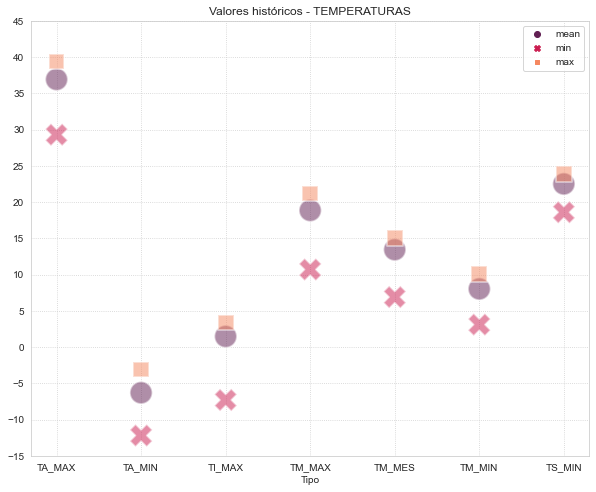

In [387]:
# scatter plot, me quedo con la media, min, max

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_title("Valores históricos - TEMPERATURAS");

ticks = range(-15, 50, 5)

sns.scatterplot(data=medias_temp_hist_mad_total[["mean","min","max"]], palette = "rocket", marker= "o", s= 500, alpha=0.5 );
plt.yticks(ticks)
plt.legend(loc="upper right");

##me quedo con este, respecto a las temperaturas